In [1]:
import os
import numpy as np
import collections
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
os.getcwd()

'/Users/luizaadelinaciucu/Work/ATLAS/TrackML'

In [3]:
def p(name,nparray):
    print(nparray)
    print(name,nparray.shape,type(nparray))
# done function

In [4]:
outputFolder="/Users/luizaadelinaciucu/Work/ATLAS/TrackMLtest/output2"

In [5]:
nparray_InputTrain=np.load(outputFolder+"/NN_2_data_Input_Train_000000099.npy")
nparray_InputTest=np.load(outputFolder+"/NN_2_data_Input_Test_000000099.npy")
nparray_OutputTrain=np.load(outputFolder+"/NN_2_data_Output_Train_000000099.npy")
nparray_OutputTest=np.load(outputFolder+"/NN_2_data_Output_Test_000000099.npy")

In [6]:
p("InputTrain",nparray_InputTrain)

[[[-2.91408e+01]
  [-1.34121e+01]
  [-4.53283e+02]
  ...
  [-8.72973e+01]
  [-3.56456e+01]
  [-1.30200e+03]]

 [[-3.08955e+01]
  [-8.39350e+00]
  [-4.47112e+02]
  ...
  [-5.31951e+01]
  [-1.57277e+01]
  [-8.18000e+02]]

 [[-3.32453e+01]
  [-1.67252e+00]
  [-4.57583e+02]
  ...
  [-7.46899e+01]
  [-2.94418e+00]
  [-9.62500e+02]]

 ...

 [[-3.13739e+01]
  [ 2.04705e+00]
  [ 4.87235e+02]
  ...
  [-6.26886e+01]
  [ 6.31295e+00]
  [ 9.57500e+02]]

 [[-3.09550e+01]
  [ 9.47315e+00]
  [ 4.64051e+02]
  ...
  [-4.04887e+01]
  [ 1.09354e+01]
  [ 5.97500e+02]]

 [[-3.31662e+01]
  [-3.98620e-01]
  [ 4.46810e+02]
  ...
  [-7.94153e+01]
  [ 2.56644e-01]
  [ 1.09750e+03]]]
InputTrain (5326, 60, 1) <class 'numpy.ndarray'>


In [7]:
p("InputTest",nparray_InputTest)

[[[  -31.7481 ]
  [   -5.95475]
  [ -421.849  ]
  ...
  [  -46.7051 ]
  [   -6.50951]
  [ -602.5    ]]

 [[  -29.6028 ]
  [  -12.0905 ]
  [ -454.858  ]
  ...
  [  -59.3583 ]
  [  -22.7831 ]
  [ -962.     ]]

 [[  -31.4036 ]
  [   -6.94024]
  [ -471.316  ]
  ...
  [  -70.2689 ]
  [  -20.7523 ]
  [-1098.     ]]

 ...

 [[  -31.0072 ]
  [    8.54729]
  [  490.278  ]
  ...
  [  -57.7747 ]
  [   15.953  ]
  [  962.     ]]

 [[  -31.2786 ]
  [    3.73645]
  [  479.993  ]
  ...
  [  -59.8624 ]
  [    7.09361]
  [  957.5    ]]

 [[  -31.2528 ]
  [    4.19333]
  [  450.675  ]
  ...
  [  -67.8425 ]
  [   11.5825 ]
  [  962.     ]]]
InputTest (5326, 60, 1) <class 'numpy.ndarray'>


In [8]:
p ("OutputTrain", nparray_OutputTrain)


[[-1 -1 -1 ... -1 -1  1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 ...
 [-1 -1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
OutputTrain (5326, 20) <class 'numpy.ndarray'>


In [9]:
p ("OutputTest",nparray_OutputTest)

[[-1 -1  1 ...  1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ...  1  1  1]
 ...
 [-1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
OutputTest (5326, 20) <class 'numpy.ndarray'>


Acum vom pregati un NN

Create the model

In [10]:
np.random.seed(98383822)
import keras
nrNodesInputLayer=nparray_InputTrain.shape[1] # three inputs (x, y, z) for each hit in the batch
nrNodesOutputLayer=nparray_OutputTrain.shape[1] # one output for each hit in the batch


Using TensorFlow backend.


In [11]:
def get_model_01():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 




In [12]:
def get_model_02():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [13]:
def get_model_03():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [14]:
def get_model_04():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [15]:
def get_model_05():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [16]:
def get_model_06():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [17]:
def get_model_07():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [18]:
def get_model_08():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))
    #model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='elu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [19]:
model_01=get_model_01()
model_02=get_model_02()
model_03=get_model_03()
model_04=get_model_04()
model_05=get_model_05()
model_06=get_model_06()
model_07=get_model_07()
model_08=get_model_08()

In [20]:
numberOfEpochs=3000
batchSize=500

In [21]:
def train_model(model,modelName,numberOfEpochs,batchSize):
    print("*** Start trian_model for modeName",modelName,"***")
    history=model.fit(
            nparray_InputTrain,
            nparray_OutputTrain,
            batchSize,numberOfEpochs,
            validation_data=(nparray_InputTest,nparray_OutputTest),
            shuffle=False
            )
    nparray_accuracy_Train=history.history["accuracy"]
    nparray_accuracy_Test=history.history["val_accuracy"]
    nparray_loss_Train=history.history["loss"]
    nparray_loss_Test=history.history["val_loss"]
    # save the weights + biases of the trained model to a file
    outputFileName=outputFolder+"/NN_3_"+modelName+"_"+str(numberOfEpochs)+"_"+str(batchSize)+".hdf5"
    model.save_weights(outputFileName)

    # ready to return
    return (model,nparray_accuracy_Train,nparray_accuracy_Test,nparray_loss_Train,nparray_loss_Test)
# done function

In [22]:
model_01,nparray_accuracy_Train_01,nparray_accuracy_Test_01,nparray_loss_Train_01,nparray_loss_Test_01=train_model(model_01,"Model_01",numberOfEpochs,batchSize)
model_02,nparray_accuracy_Train_02,nparray_accuracy_Test_02,nparray_loss_Train_02,nparray_loss_Test_02=train_model(model_02,"Model_02",numberOfEpochs,batchSize)
model_03,nparray_accuracy_Train_03,nparray_accuracy_Test_03,nparray_loss_Train_03,nparray_loss_Test_03=train_model(model_03,"Model_03",numberOfEpochs,batchSize)
model_04,nparray_accuracy_Train_04,nparray_accuracy_Test_04,nparray_loss_Train_04,nparray_loss_Test_04=train_model(model_04,"Model_04",numberOfEpochs,batchSize)
model_05,nparray_accuracy_Train_05,nparray_accuracy_Test_05,nparray_loss_Train_05,nparray_loss_Test_05=train_model(model_05,"Model_05",numberOfEpochs,batchSize)
model_06,nparray_accuracy_Train_06,nparray_accuracy_Test_06,nparray_loss_Train_06,nparray_loss_Test_06=train_model(model_06,"Model_06",numberOfEpochs,batchSize)
model_07,nparray_accuracy_Train_07,nparray_accuracy_Test_07,nparray_loss_Train_07,nparray_loss_Test_07=train_model(model_07,"Model_07",numberOfEpochs,batchSize)
model_08,nparray_accuracy_Train_08,nparray_accuracy_Test_08,nparray_loss_Train_08,nparray_loss_Test_08=train_model(model_08,"Model_08",numberOfEpochs,batchSize)


*** Start trian_model for modeName Model_01 ***
Train on 5326 samples, validate on 5326 samples
Epoch 1/3000
5326/5326 [==============================] - 1s 116us/step - loss: 0.9154 - accuracy: 0.1587 - val_loss: 0.8770 - val_accuracy: 0.1632
Epoch 2/3000
5326/5326 [==============================] - 0s 75us/step - loss: 0.8750 - accuracy: 0.1543 - val_loss: 0.8385 - val_accuracy: 0.1677
Epoch 3/3000
5326/5326 [==============================] - 0s 77us/step - loss: 0.8389 - accuracy: 0.1829 - val_loss: 0.8561 - val_accuracy: 0.1926
Epoch 4/3000
5326/5326 [==============================] - 0s 75us/step - loss: 0.8285 - accuracy: 0.1955 - val_loss: 0.8037 - val_accuracy: 0.1915
Epoch 5/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.8010 - accuracy: 0.1878 - val_loss: 0.7816 - val_accuracy: 0.1581
Epoch 6/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.7869 - accuracy: 0.1461 - val_loss: 0.7730 - val_accuracy: 0.1307
Epoch 7/3000
5326/532

Epoch 56/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7486 - accuracy: 0.1265 - val_loss: 0.7408 - val_accuracy: 0.1241
Epoch 57/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7425 - accuracy: 0.1281 - val_loss: 0.7388 - val_accuracy: 0.1267
Epoch 58/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7413 - accuracy: 0.1281 - val_loss: 0.7383 - val_accuracy: 0.1247
Epoch 59/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7436 - accuracy: 0.1264 - val_loss: 0.7396 - val_accuracy: 0.1260
Epoch 60/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7448 - accuracy: 0.1258 - val_loss: 0.7445 - val_accuracy: 0.1254
Epoch 61/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.7484 - accuracy: 0.1267 - val_loss: 0.7384 - val_accuracy: 0.1260
Epoch 62/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7431 - accuracy: 0.1267 - val_

5326/5326 [==============================] - 0s 52us/step - loss: 0.7346 - accuracy: 0.1185 - val_loss: 0.7266 - val_accuracy: 0.1194
Epoch 112/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7310 - accuracy: 0.1170 - val_loss: 0.7252 - val_accuracy: 0.1168
Epoch 113/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.7333 - accuracy: 0.1166 - val_loss: 0.7298 - val_accuracy: 0.1207
Epoch 114/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7352 - accuracy: 0.1190 - val_loss: 0.7269 - val_accuracy: 0.1166
Epoch 115/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7343 - accuracy: 0.1112 - val_loss: 0.7257 - val_accuracy: 0.1046
Epoch 116/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7337 - accuracy: 0.1044 - val_loss: 0.7271 - val_accuracy: 0.1005
Epoch 117/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7327 - accuracy: 0.1044 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.7215 - accuracy: 0.1089 - val_loss: 0.7177 - val_accuracy: 0.1053
Epoch 167/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7265 - accuracy: 0.1087 - val_loss: 0.7218 - val_accuracy: 0.1021
Epoch 168/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7285 - accuracy: 0.1057 - val_loss: 0.7192 - val_accuracy: 0.1029
Epoch 169/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7270 - accuracy: 0.1021 - val_loss: 0.7181 - val_accuracy: 0.1025
Epoch 170/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7249 - accuracy: 0.1036 - val_loss: 0.7176 - val_accuracy: 0.1035
Epoch 171/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7230 - accuracy: 0.1031 - val_loss: 0.7160 - val_accuracy: 0.1038
Epoch 172/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7226 - accuracy: 0.1050 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.7112 - accuracy: 0.1095 - val_loss: 0.7071 - val_accuracy: 0.1029
Epoch 222/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7113 - accuracy: 0.1048 - val_loss: 0.7066 - val_accuracy: 0.0950
Epoch 223/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.7105 - accuracy: 0.1065 - val_loss: 0.7074 - val_accuracy: 0.0961
Epoch 224/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7140 - accuracy: 0.1025 - val_loss: 0.7135 - val_accuracy: 0.0875
Epoch 225/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7158 - accuracy: 0.0974 - val_loss: 0.7079 - val_accuracy: 0.0877
Epoch 226/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7124 - accuracy: 0.0974 - val_loss: 0.7093 - val_accuracy: 0.0866
Epoch 227/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7139 - accuracy: 0.0952 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.7073 - accuracy: 0.1083 - val_loss: 0.7081 - val_accuracy: 0.1059
Epoch 277/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7088 - accuracy: 0.1085 - val_loss: 0.7036 - val_accuracy: 0.1010
Epoch 278/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7044 - accuracy: 0.1087 - val_loss: 0.7024 - val_accuracy: 0.1025
Epoch 279/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7068 - accuracy: 0.1083 - val_loss: 0.7034 - val_accuracy: 0.1044
Epoch 280/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7078 - accuracy: 0.1018 - val_loss: 0.7039 - val_accuracy: 0.0993
Epoch 281/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7061 - accuracy: 0.1072 - val_loss: 0.7108 - val_accuracy: 0.0943
Epoch 282/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7123 - accuracy: 0.1035 - val_loss: 0.

5326/5326 [==============================] - 0s 51us/step - loss: 0.7085 - accuracy: 0.1087 - val_loss: 0.7034 - val_accuracy: 0.0991
Epoch 332/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7091 - accuracy: 0.1100 - val_loss: 0.7069 - val_accuracy: 0.1020
Epoch 333/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7120 - accuracy: 0.1106 - val_loss: 0.7062 - val_accuracy: 0.1016
Epoch 334/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7080 - accuracy: 0.1072 - val_loss: 0.7027 - val_accuracy: 0.1001
Epoch 335/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7043 - accuracy: 0.1102 - val_loss: 0.7012 - val_accuracy: 0.1021
Epoch 336/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7052 - accuracy: 0.1076 - val_loss: 0.7023 - val_accuracy: 0.0993
Epoch 337/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7057 - accuracy: 0.1100 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.6988 - accuracy: 0.1070 - val_loss: 0.6973 - val_accuracy: 0.1010
Epoch 387/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7002 - accuracy: 0.1089 - val_loss: 0.6971 - val_accuracy: 0.0969
Epoch 388/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.7012 - accuracy: 0.1095 - val_loss: 0.6996 - val_accuracy: 0.0969
Epoch 389/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7026 - accuracy: 0.1102 - val_loss: 0.7020 - val_accuracy: 0.0956
Epoch 390/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7051 - accuracy: 0.1083 - val_loss: 0.7057 - val_accuracy: 0.0943
Epoch 391/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7065 - accuracy: 0.1070 - val_loss: 0.7081 - val_accuracy: 0.0980
Epoch 392/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7096 - accuracy: 0.1080 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.7067 - accuracy: 0.1190 - val_loss: 0.7035 - val_accuracy: 0.1085
Epoch 442/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7036 - accuracy: 0.1175 - val_loss: 0.7030 - val_accuracy: 0.1074
Epoch 443/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7047 - accuracy: 0.1168 - val_loss: 0.7043 - val_accuracy: 0.1085
Epoch 444/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7043 - accuracy: 0.1192 - val_loss: 0.7041 - val_accuracy: 0.1087
Epoch 445/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7042 - accuracy: 0.1189 - val_loss: 0.7023 - val_accuracy: 0.1083
Epoch 446/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7021 - accuracy: 0.1211 - val_loss: 0.7008 - val_accuracy: 0.1016
Epoch 447/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7027 - accuracy: 0.1145 - val_loss: 0.

5326/5326 [==============================] - 0s 53us/step - loss: 0.6942 - accuracy: 0.1091 - val_loss: 0.6919 - val_accuracy: 0.0995
Epoch 497/3000
5326/5326 [==============================] - 0s 58us/step - loss: 0.6922 - accuracy: 0.1127 - val_loss: 0.6912 - val_accuracy: 0.1035
Epoch 498/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6946 - accuracy: 0.1175 - val_loss: 0.6944 - val_accuracy: 0.1061
Epoch 499/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6939 - accuracy: 0.1189 - val_loss: 0.6918 - val_accuracy: 0.1070
Epoch 500/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6947 - accuracy: 0.1185 - val_loss: 0.6905 - val_accuracy: 0.1083
Epoch 501/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6912 - accuracy: 0.1142 - val_loss: 0.6903 - val_accuracy: 0.0997
Epoch 502/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6915 - accuracy: 0.1102 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.6899 - accuracy: 0.1185 - val_loss: 0.6894 - val_accuracy: 0.1112
Epoch 552/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6901 - accuracy: 0.1226 - val_loss: 0.6891 - val_accuracy: 0.1158
Epoch 553/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6878 - accuracy: 0.1230 - val_loss: 0.6852 - val_accuracy: 0.1110
Epoch 554/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6866 - accuracy: 0.1226 - val_loss: 0.6869 - val_accuracy: 0.1145
Epoch 555/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6870 - accuracy: 0.1249 - val_loss: 0.6875 - val_accuracy: 0.1158
Epoch 556/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6865 - accuracy: 0.1220 - val_loss: 0.6865 - val_accuracy: 0.1080
Epoch 557/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6838 - accuracy: 0.1230 - val_loss: 0.

5326/5326 [==============================] - 0s 53us/step - loss: 0.6939 - accuracy: 0.1078 - val_loss: 0.6895 - val_accuracy: 0.0952
Epoch 607/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6919 - accuracy: 0.1038 - val_loss: 0.6903 - val_accuracy: 0.0929
Epoch 608/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6935 - accuracy: 0.1035 - val_loss: 0.6889 - val_accuracy: 0.0946
Epoch 609/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6919 - accuracy: 0.1070 - val_loss: 0.6885 - val_accuracy: 0.0986
Epoch 610/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6902 - accuracy: 0.1104 - val_loss: 0.6893 - val_accuracy: 0.0963
Epoch 611/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6935 - accuracy: 0.1113 - val_loss: 0.6904 - val_accuracy: 0.1031
Epoch 612/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6917 - accuracy: 0.1083 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.6927 - accuracy: 0.1098 - val_loss: 0.6883 - val_accuracy: 0.0993
Epoch 662/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6935 - accuracy: 0.1112 - val_loss: 0.6853 - val_accuracy: 0.1046
Epoch 663/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6894 - accuracy: 0.1128 - val_loss: 0.6864 - val_accuracy: 0.1098
Epoch 664/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6886 - accuracy: 0.1168 - val_loss: 0.6835 - val_accuracy: 0.1098
Epoch 665/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6845 - accuracy: 0.1160 - val_loss: 0.6831 - val_accuracy: 0.1021
Epoch 666/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6854 - accuracy: 0.1164 - val_loss: 0.6821 - val_accuracy: 0.1023
Epoch 667/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6842 - accuracy: 0.1157 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.6869 - accuracy: 0.1097 - val_loss: 0.6826 - val_accuracy: 0.1089
Epoch 717/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6840 - accuracy: 0.1127 - val_loss: 0.6836 - val_accuracy: 0.1087
Epoch 718/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6851 - accuracy: 0.1127 - val_loss: 0.6891 - val_accuracy: 0.1065
Epoch 719/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6893 - accuracy: 0.1142 - val_loss: 0.6887 - val_accuracy: 0.1046
Epoch 720/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6895 - accuracy: 0.1121 - val_loss: 0.6882 - val_accuracy: 0.1025
Epoch 721/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6874 - accuracy: 0.1117 - val_loss: 0.6829 - val_accuracy: 0.1036
Epoch 722/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6875 - accuracy: 0.1121 - val_loss: 0.

5326/5326 [==============================] - 0s 53us/step - loss: 0.6823 - accuracy: 0.1294 - val_loss: 0.6850 - val_accuracy: 0.1190
Epoch 772/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6820 - accuracy: 0.1296 - val_loss: 0.6848 - val_accuracy: 0.1164
Epoch 773/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6812 - accuracy: 0.1275 - val_loss: 0.6844 - val_accuracy: 0.1130
Epoch 774/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6842 - accuracy: 0.1273 - val_loss: 0.6887 - val_accuracy: 0.1130
Epoch 775/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6855 - accuracy: 0.1312 - val_loss: 0.6850 - val_accuracy: 0.1140
Epoch 776/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6836 - accuracy: 0.1294 - val_loss: 0.6826 - val_accuracy: 0.1157
Epoch 777/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6840 - accuracy: 0.1305 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.6814 - accuracy: 0.1316 - val_loss: 0.6828 - val_accuracy: 0.1256
Epoch 827/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6813 - accuracy: 0.1322 - val_loss: 0.6844 - val_accuracy: 0.1250
Epoch 828/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6825 - accuracy: 0.1329 - val_loss: 0.6862 - val_accuracy: 0.1232
Epoch 829/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6854 - accuracy: 0.1320 - val_loss: 0.6882 - val_accuracy: 0.1207
Epoch 830/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6878 - accuracy: 0.1290 - val_loss: 0.6888 - val_accuracy: 0.1209
Epoch 831/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6861 - accuracy: 0.1299 - val_loss: 0.6842 - val_accuracy: 0.1213
Epoch 832/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6831 - accuracy: 0.1301 - val_loss: 0.

5326/5326 [==============================] - 0s 57us/step - loss: 0.6817 - accuracy: 0.1286 - val_loss: 0.6792 - val_accuracy: 0.1200
Epoch 882/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6759 - accuracy: 0.1312 - val_loss: 0.6774 - val_accuracy: 0.1222
Epoch 883/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6771 - accuracy: 0.1301 - val_loss: 0.6784 - val_accuracy: 0.1219
Epoch 884/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6794 - accuracy: 0.1282 - val_loss: 0.6794 - val_accuracy: 0.1226
Epoch 885/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6814 - accuracy: 0.1292 - val_loss: 0.6807 - val_accuracy: 0.1222
Epoch 886/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6836 - accuracy: 0.1286 - val_loss: 0.6808 - val_accuracy: 0.1243
Epoch 887/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6800 - accuracy: 0.1320 - val_loss: 0.

5326/5326 [==============================] - 0s 53us/step - loss: 0.6860 - accuracy: 0.1166 - val_loss: 0.6864 - val_accuracy: 0.1050
Epoch 937/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6852 - accuracy: 0.1181 - val_loss: 0.6858 - val_accuracy: 0.1093
Epoch 938/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6849 - accuracy: 0.1196 - val_loss: 0.6842 - val_accuracy: 0.1113
Epoch 939/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.6872 - accuracy: 0.1187 - val_loss: 0.6909 - val_accuracy: 0.1059
Epoch 940/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6896 - accuracy: 0.1217 - val_loss: 0.6846 - val_accuracy: 0.1160
Epoch 941/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6837 - accuracy: 0.1234 - val_loss: 0.6849 - val_accuracy: 0.1134
Epoch 942/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6822 - accuracy: 0.1234 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.6772 - accuracy: 0.1337 - val_loss: 0.6762 - val_accuracy: 0.1303
Epoch 992/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6762 - accuracy: 0.1352 - val_loss: 0.6778 - val_accuracy: 0.1288
Epoch 993/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6759 - accuracy: 0.1348 - val_loss: 0.6802 - val_accuracy: 0.1294
Epoch 994/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6776 - accuracy: 0.1324 - val_loss: 0.6808 - val_accuracy: 0.1207
Epoch 995/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6795 - accuracy: 0.1273 - val_loss: 0.6779 - val_accuracy: 0.1217
Epoch 996/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6758 - accuracy: 0.1307 - val_loss: 0.6768 - val_accuracy: 0.1205
Epoch 997/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6745 - accuracy: 0.1294 - val_loss: 0.

Epoch 1046/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6770 - accuracy: 0.1395 - val_loss: 0.6812 - val_accuracy: 0.1282
Epoch 1047/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6792 - accuracy: 0.1380 - val_loss: 0.6841 - val_accuracy: 0.1262
Epoch 1048/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6786 - accuracy: 0.1378 - val_loss: 0.6798 - val_accuracy: 0.1271
Epoch 1049/3000
5326/5326 [==============================] - 0s 57us/step - loss: 0.6755 - accuracy: 0.1363 - val_loss: 0.6812 - val_accuracy: 0.1235
Epoch 1050/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6753 - accuracy: 0.1363 - val_loss: 0.6763 - val_accuracy: 0.1282
Epoch 1051/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.6729 - accuracy: 0.1416 - val_loss: 0.6760 - val_accuracy: 0.1341
Epoch 1052/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6732 - accuracy:

5326/5326 [==============================] - 0s 53us/step - loss: 0.6757 - accuracy: 0.1316 - val_loss: 0.6793 - val_accuracy: 0.1243
Epoch 1101/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6782 - accuracy: 0.1352 - val_loss: 0.6810 - val_accuracy: 0.1271
Epoch 1102/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6807 - accuracy: 0.1356 - val_loss: 0.6811 - val_accuracy: 0.1234
Epoch 1103/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6826 - accuracy: 0.1320 - val_loss: 0.6821 - val_accuracy: 0.1228
Epoch 1104/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6787 - accuracy: 0.1329 - val_loss: 0.6792 - val_accuracy: 0.1204
Epoch 1105/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6761 - accuracy: 0.1331 - val_loss: 0.6823 - val_accuracy: 0.1185
Epoch 1106/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6759 - accuracy: 0.1314 - val_lo

Epoch 1155/3000
5326/5326 [==============================] - 0s 94us/step - loss: 0.6707 - accuracy: 0.1359 - val_loss: 0.6727 - val_accuracy: 0.1249
Epoch 1156/3000
5326/5326 [==============================] - 0s 72us/step - loss: 0.6706 - accuracy: 0.1348 - val_loss: 0.6721 - val_accuracy: 0.1256
Epoch 1157/3000
5326/5326 [==============================] - 1s 102us/step - loss: 0.6690 - accuracy: 0.1344 - val_loss: 0.6713 - val_accuracy: 0.1269
Epoch 1158/3000
5326/5326 [==============================] - 0s 87us/step - loss: 0.6713 - accuracy: 0.1380 - val_loss: 0.6732 - val_accuracy: 0.1262
Epoch 1159/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6704 - accuracy: 0.1365 - val_loss: 0.6727 - val_accuracy: 0.1267
Epoch 1160/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6701 - accuracy: 0.1356 - val_loss: 0.6743 - val_accuracy: 0.1260
Epoch 1161/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6706 - accuracy

5326/5326 [==============================] - 0s 46us/step - loss: 0.6678 - accuracy: 0.1357 - val_loss: 0.6742 - val_accuracy: 0.1309
Epoch 1210/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6695 - accuracy: 0.1363 - val_loss: 0.6785 - val_accuracy: 0.1247
Epoch 1211/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6721 - accuracy: 0.1371 - val_loss: 0.6752 - val_accuracy: 0.1260
Epoch 1212/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6694 - accuracy: 0.1367 - val_loss: 0.6730 - val_accuracy: 0.1279
Epoch 1213/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6682 - accuracy: 0.1404 - val_loss: 0.6737 - val_accuracy: 0.1311
Epoch 1214/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6687 - accuracy: 0.1408 - val_loss: 0.6755 - val_accuracy: 0.1281
Epoch 1215/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6698 - accuracy: 0.1395 - val_lo

Epoch 1264/3000
5326/5326 [==============================] - 0s 45us/step - loss: 0.6696 - accuracy: 0.1378 - val_loss: 0.6754 - val_accuracy: 0.1213
Epoch 1265/3000
5326/5326 [==============================] - 0s 58us/step - loss: 0.6714 - accuracy: 0.1373 - val_loss: 0.6756 - val_accuracy: 0.1282
Epoch 1266/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6720 - accuracy: 0.1380 - val_loss: 0.6748 - val_accuracy: 0.1265
Epoch 1267/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6713 - accuracy: 0.1389 - val_loss: 0.6764 - val_accuracy: 0.1219
Epoch 1268/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6711 - accuracy: 0.1359 - val_loss: 0.6762 - val_accuracy: 0.1264
Epoch 1269/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.6731 - accuracy: 0.1348 - val_loss: 0.6831 - val_accuracy: 0.1234
Epoch 1270/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6787 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 0.6661 - accuracy: 0.1410 - val_loss: 0.6713 - val_accuracy: 0.1348
Epoch 1319/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6705 - accuracy: 0.1373 - val_loss: 0.6766 - val_accuracy: 0.1335
Epoch 1320/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6717 - accuracy: 0.1341 - val_loss: 0.6775 - val_accuracy: 0.1305
Epoch 1321/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6683 - accuracy: 0.1378 - val_loss: 0.6747 - val_accuracy: 0.1307
Epoch 1322/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6693 - accuracy: 0.1371 - val_loss: 0.6777 - val_accuracy: 0.1277
Epoch 1323/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6702 - accuracy: 0.1361 - val_loss: 0.6790 - val_accuracy: 0.1292
Epoch 1324/3000
5326/5326 [==============================] - 0s 80us/step - loss: 0.6742 - accuracy: 0.1378 - val_lo

Epoch 1373/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6696 - accuracy: 0.1404 - val_loss: 0.6788 - val_accuracy: 0.1279
Epoch 1374/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6707 - accuracy: 0.1418 - val_loss: 0.6768 - val_accuracy: 0.1284
Epoch 1375/3000
5326/5326 [==============================] - 0s 78us/step - loss: 0.6706 - accuracy: 0.1395 - val_loss: 0.6760 - val_accuracy: 0.1311
Epoch 1376/3000
5326/5326 [==============================] - 0s 81us/step - loss: 0.6674 - accuracy: 0.1384 - val_loss: 0.6746 - val_accuracy: 0.1299
Epoch 1377/3000
5326/5326 [==============================] - 0s 68us/step - loss: 0.6668 - accuracy: 0.1425 - val_loss: 0.6757 - val_accuracy: 0.1314
Epoch 1378/3000
5326/5326 [==============================] - 0s 60us/step - loss: 0.6682 - accuracy: 0.1427 - val_loss: 0.6749 - val_accuracy: 0.1316
Epoch 1379/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6676 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 0.6658 - accuracy: 0.1382 - val_loss: 0.6720 - val_accuracy: 0.1232
Epoch 1428/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6674 - accuracy: 0.1386 - val_loss: 0.6709 - val_accuracy: 0.1271
Epoch 1429/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6642 - accuracy: 0.1382 - val_loss: 0.6709 - val_accuracy: 0.1235
Epoch 1430/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6636 - accuracy: 0.1378 - val_loss: 0.6703 - val_accuracy: 0.1286
Epoch 1431/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6614 - accuracy: 0.1382 - val_loss: 0.6688 - val_accuracy: 0.1281
Epoch 1432/3000
5326/5326 [==============================] - 0s 46us/step - loss: 0.6611 - accuracy: 0.1418 - val_loss: 0.6696 - val_accuracy: 0.1292
Epoch 1433/3000
5326/5326 [==============================] - 0s 46us/step - loss: 0.6649 - accuracy: 0.1448 - val_lo

Epoch 1482/3000
5326/5326 [==============================] - 0s 70us/step - loss: 0.6667 - accuracy: 0.1476 - val_loss: 0.6717 - val_accuracy: 0.1359
Epoch 1483/3000
5326/5326 [==============================] - 0s 61us/step - loss: 0.6631 - accuracy: 0.1500 - val_loss: 0.6690 - val_accuracy: 0.1376
Epoch 1484/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6622 - accuracy: 0.1532 - val_loss: 0.6688 - val_accuracy: 0.1371
Epoch 1485/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6625 - accuracy: 0.1504 - val_loss: 0.6684 - val_accuracy: 0.1397
Epoch 1486/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6624 - accuracy: 0.1530 - val_loss: 0.6725 - val_accuracy: 0.1376
Epoch 1487/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6692 - accuracy: 0.1472 - val_loss: 0.6761 - val_accuracy: 0.1373
Epoch 1488/3000
5326/5326 [==============================] - 0s 46us/step - loss: 0.6700 - accuracy:

5326/5326 [==============================] - 0s 56us/step - loss: 0.6624 - accuracy: 0.1461 - val_loss: 0.6679 - val_accuracy: 0.1408
Epoch 1537/3000
5326/5326 [==============================] - 0s 74us/step - loss: 0.6615 - accuracy: 0.1523 - val_loss: 0.6678 - val_accuracy: 0.1406
Epoch 1538/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6626 - accuracy: 0.1474 - val_loss: 0.6682 - val_accuracy: 0.1404
Epoch 1539/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6640 - accuracy: 0.1453 - val_loss: 0.6693 - val_accuracy: 0.1378
Epoch 1540/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6640 - accuracy: 0.1461 - val_loss: 0.6704 - val_accuracy: 0.1388
Epoch 1541/3000
5326/5326 [==============================] - 0s 69us/step - loss: 0.6682 - accuracy: 0.1474 - val_loss: 0.6729 - val_accuracy: 0.1365
Epoch 1542/3000
5326/5326 [==============================] - 0s 68us/step - loss: 0.6669 - accuracy: 0.1480 - val_lo

5326/5326 [==============================] - 0s 76us/step - loss: 0.6688 - accuracy: 0.1382 - val_loss: 0.6748 - val_accuracy: 0.1324
Epoch 1591/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.6696 - accuracy: 0.1359 - val_loss: 0.6765 - val_accuracy: 0.1294
Epoch 1592/3000
5326/5326 [==============================] - 0s 60us/step - loss: 0.6686 - accuracy: 0.1356 - val_loss: 0.6775 - val_accuracy: 0.1271
Epoch 1593/3000
5326/5326 [==============================] - 0s 70us/step - loss: 0.6712 - accuracy: 0.1388 - val_loss: 0.6762 - val_accuracy: 0.1326
Epoch 1594/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6665 - accuracy: 0.1421 - val_loss: 0.6727 - val_accuracy: 0.1322
Epoch 1595/3000
5326/5326 [==============================] - 0s 58us/step - loss: 0.6646 - accuracy: 0.1412 - val_loss: 0.6737 - val_accuracy: 0.1311
Epoch 1596/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6662 - accuracy: 0.1414 - val_lo

5326/5326 [==============================] - 1s 120us/step - loss: 0.6624 - accuracy: 0.1474 - val_loss: 0.6700 - val_accuracy: 0.1344
Epoch 1645/3000
5326/5326 [==============================] - 1s 145us/step - loss: 0.6657 - accuracy: 0.1466 - val_loss: 0.6665 - val_accuracy: 0.1357
Epoch 1646/3000
5326/5326 [==============================] - 1s 129us/step - loss: 0.6603 - accuracy: 0.1455 - val_loss: 0.6666 - val_accuracy: 0.1384
Epoch 1647/3000
5326/5326 [==============================] - 1s 107us/step - loss: 0.6582 - accuracy: 0.1485 - val_loss: 0.6658 - val_accuracy: 0.1403
Epoch 1648/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.6580 - accuracy: 0.1506 - val_loss: 0.6694 - val_accuracy: 0.1384
Epoch 1649/3000
5326/5326 [==============================] - 1s 102us/step - loss: 0.6598 - accuracy: 0.1495 - val_loss: 0.6696 - val_accuracy: 0.1374
Epoch 1650/3000
5326/5326 [==============================] - 1s 127us/step - loss: 0.6609 - accuracy: 0.1504 - 

5326/5326 [==============================] - 0s 82us/step - loss: 0.6564 - accuracy: 0.1496 - val_loss: 0.6643 - val_accuracy: 0.1373
Epoch 1699/3000
5326/5326 [==============================] - 1s 138us/step - loss: 0.6587 - accuracy: 0.1474 - val_loss: 0.6657 - val_accuracy: 0.1363
Epoch 1700/3000
5326/5326 [==============================] - 1s 124us/step - loss: 0.6607 - accuracy: 0.1510 - val_loss: 0.6669 - val_accuracy: 0.1371
Epoch 1701/3000
5326/5326 [==============================] - 1s 138us/step - loss: 0.6610 - accuracy: 0.1474 - val_loss: 0.6673 - val_accuracy: 0.1391
Epoch 1702/3000
5326/5326 [==============================] - 1s 119us/step - loss: 0.6611 - accuracy: 0.1489 - val_loss: 0.6664 - val_accuracy: 0.1367
Epoch 1703/3000
5326/5326 [==============================] - 1s 98us/step - loss: 0.6595 - accuracy: 0.1489 - val_loss: 0.6669 - val_accuracy: 0.1348
Epoch 1704/3000
5326/5326 [==============================] - 0s 87us/step - loss: 0.6584 - accuracy: 0.1519 - va

5326/5326 [==============================] - 1s 126us/step - loss: 0.6620 - accuracy: 0.1511 - val_loss: 0.6692 - val_accuracy: 0.1346
Epoch 1753/3000
5326/5326 [==============================] - 0s 74us/step - loss: 0.6616 - accuracy: 0.1517 - val_loss: 0.6692 - val_accuracy: 0.1367
Epoch 1754/3000
5326/5326 [==============================] - 0s 77us/step - loss: 0.6619 - accuracy: 0.1506 - val_loss: 0.6665 - val_accuracy: 0.1388
Epoch 1755/3000
5326/5326 [==============================] - 0s 84us/step - loss: 0.6612 - accuracy: 0.1495 - val_loss: 0.6686 - val_accuracy: 0.1382
Epoch 1756/3000
5326/5326 [==============================] - 1s 102us/step - loss: 0.6646 - accuracy: 0.1496 - val_loss: 0.6702 - val_accuracy: 0.1378
Epoch 1757/3000
5326/5326 [==============================] - 0s 74us/step - loss: 0.6647 - accuracy: 0.1510 - val_loss: 0.6719 - val_accuracy: 0.1380
Epoch 1758/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6638 - accuracy: 0.1496 - val_

Epoch 1807/3000
5326/5326 [==============================] - 0s 73us/step - loss: 0.6665 - accuracy: 0.1511 - val_loss: 0.6695 - val_accuracy: 0.1395
Epoch 1808/3000
5326/5326 [==============================] - 0s 60us/step - loss: 0.6621 - accuracy: 0.1526 - val_loss: 0.6697 - val_accuracy: 0.1401
Epoch 1809/3000
5326/5326 [==============================] - 0s 59us/step - loss: 0.6614 - accuracy: 0.1577 - val_loss: 0.6685 - val_accuracy: 0.1401
Epoch 1810/3000
5326/5326 [==============================] - 0s 81us/step - loss: 0.6610 - accuracy: 0.1523 - val_loss: 0.6690 - val_accuracy: 0.1416
Epoch 1811/3000
5326/5326 [==============================] - 0s 57us/step - loss: 0.6590 - accuracy: 0.1592 - val_loss: 0.6648 - val_accuracy: 0.1436
Epoch 1812/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6557 - accuracy: 0.1592 - val_loss: 0.6650 - val_accuracy: 0.1404
Epoch 1813/3000
5326/5326 [==============================] - 0s 85us/step - loss: 0.6546 - accuracy:

5326/5326 [==============================] - 0s 47us/step - loss: 0.6629 - accuracy: 0.1466 - val_loss: 0.6669 - val_accuracy: 0.1397
Epoch 1862/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6632 - accuracy: 0.1496 - val_loss: 0.6669 - val_accuracy: 0.1395
Epoch 1863/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6623 - accuracy: 0.1543 - val_loss: 0.6701 - val_accuracy: 0.1403
Epoch 1864/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6625 - accuracy: 0.1506 - val_loss: 0.6668 - val_accuracy: 0.1380
Epoch 1865/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6622 - accuracy: 0.1538 - val_loss: 0.6703 - val_accuracy: 0.1350
Epoch 1866/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6653 - accuracy: 0.1474 - val_loss: 0.6689 - val_accuracy: 0.1329
Epoch 1867/3000
5326/5326 [==============================] - 0s 46us/step - loss: 0.6627 - accuracy: 0.1498 - val_lo

Epoch 1916/3000
5326/5326 [==============================] - 0s 61us/step - loss: 0.6535 - accuracy: 0.1555 - val_loss: 0.6605 - val_accuracy: 0.1406
Epoch 1917/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6532 - accuracy: 0.1555 - val_loss: 0.6625 - val_accuracy: 0.1416
Epoch 1918/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6550 - accuracy: 0.1564 - val_loss: 0.6628 - val_accuracy: 0.1412
Epoch 1919/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6541 - accuracy: 0.1564 - val_loss: 0.6624 - val_accuracy: 0.1367
Epoch 1920/3000
5326/5326 [==============================] - 0s 57us/step - loss: 0.6537 - accuracy: 0.1543 - val_loss: 0.6627 - val_accuracy: 0.1395
Epoch 1921/3000
5326/5326 [==============================] - 0s 74us/step - loss: 0.6541 - accuracy: 0.1575 - val_loss: 0.6635 - val_accuracy: 0.1403
Epoch 1922/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.6550 - accuracy:

5326/5326 [==============================] - 0s 74us/step - loss: 0.6573 - accuracy: 0.1504 - val_loss: 0.6669 - val_accuracy: 0.1384
Epoch 1971/3000
5326/5326 [==============================] - 0s 61us/step - loss: 0.6583 - accuracy: 0.1545 - val_loss: 0.6656 - val_accuracy: 0.1404
Epoch 1972/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6551 - accuracy: 0.1558 - val_loss: 0.6649 - val_accuracy: 0.1344
Epoch 1973/3000
5326/5326 [==============================] - 0s 72us/step - loss: 0.6546 - accuracy: 0.1506 - val_loss: 0.6644 - val_accuracy: 0.1352
Epoch 1974/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6547 - accuracy: 0.1521 - val_loss: 0.6651 - val_accuracy: 0.1350
Epoch 1975/3000
5326/5326 [==============================] - 0s 61us/step - loss: 0.6559 - accuracy: 0.1491 - val_loss: 0.6643 - val_accuracy: 0.1341
Epoch 1976/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6537 - accuracy: 0.1528 - val_lo

Epoch 2025/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6506 - accuracy: 0.1594 - val_loss: 0.6628 - val_accuracy: 0.1393
Epoch 2026/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6492 - accuracy: 0.1600 - val_loss: 0.6609 - val_accuracy: 0.1438
Epoch 2027/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6514 - accuracy: 0.1572 - val_loss: 0.6629 - val_accuracy: 0.1436
Epoch 2028/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6515 - accuracy: 0.1587 - val_loss: 0.6626 - val_accuracy: 0.1433
Epoch 2029/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6522 - accuracy: 0.1592 - val_loss: 0.6622 - val_accuracy: 0.1455
Epoch 2030/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6533 - accuracy: 0.1573 - val_loss: 0.6620 - val_accuracy: 0.1448
Epoch 2031/3000
5326/5326 [==============================] - 0s 57us/step - loss: 0.6529 - accuracy:

5326/5326 [==============================] - 0s 57us/step - loss: 0.6530 - accuracy: 0.1600 - val_loss: 0.6639 - val_accuracy: 0.1444
Epoch 2080/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.6561 - accuracy: 0.1628 - val_loss: 0.6668 - val_accuracy: 0.1412
Epoch 2081/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6595 - accuracy: 0.1611 - val_loss: 0.6662 - val_accuracy: 0.1397
Epoch 2082/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6543 - accuracy: 0.1592 - val_loss: 0.6647 - val_accuracy: 0.1434
Epoch 2083/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6562 - accuracy: 0.1611 - val_loss: 0.6663 - val_accuracy: 0.1404
Epoch 2084/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6572 - accuracy: 0.1607 - val_loss: 0.6656 - val_accuracy: 0.1416
Epoch 2085/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6556 - accuracy: 0.1607 - val_lo

Epoch 2134/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6586 - accuracy: 0.1611 - val_loss: 0.6681 - val_accuracy: 0.1440
Epoch 2135/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6577 - accuracy: 0.1609 - val_loss: 0.6690 - val_accuracy: 0.1438
Epoch 2136/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.6577 - accuracy: 0.1585 - val_loss: 0.6673 - val_accuracy: 0.1440
Epoch 2137/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6598 - accuracy: 0.1570 - val_loss: 0.6740 - val_accuracy: 0.1418
Epoch 2138/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.6624 - accuracy: 0.1587 - val_loss: 0.6742 - val_accuracy: 0.1393
Epoch 2139/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6628 - accuracy: 0.1525 - val_loss: 0.6744 - val_accuracy: 0.1386
Epoch 2140/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6630 - accuracy:

5326/5326 [==============================] - 0s 55us/step - loss: 0.6593 - accuracy: 0.1605 - val_loss: 0.6713 - val_accuracy: 0.1474
Epoch 2189/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6603 - accuracy: 0.1607 - val_loss: 0.6684 - val_accuracy: 0.1481
Epoch 2190/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6568 - accuracy: 0.1639 - val_loss: 0.6678 - val_accuracy: 0.1504
Epoch 2191/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.6586 - accuracy: 0.1605 - val_loss: 0.6704 - val_accuracy: 0.1489
Epoch 2192/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6606 - accuracy: 0.1603 - val_loss: 0.6737 - val_accuracy: 0.1468
Epoch 2193/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6660 - accuracy: 0.1598 - val_loss: 0.6774 - val_accuracy: 0.1508
Epoch 2194/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6688 - accuracy: 0.1611 - val_lo

Epoch 2243/3000
5326/5326 [==============================] - 0s 58us/step - loss: 0.6507 - accuracy: 0.1585 - val_loss: 0.6620 - val_accuracy: 0.1465
Epoch 2244/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6538 - accuracy: 0.1588 - val_loss: 0.6633 - val_accuracy: 0.1461
Epoch 2245/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6563 - accuracy: 0.1613 - val_loss: 0.6641 - val_accuracy: 0.1451
Epoch 2246/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6556 - accuracy: 0.1572 - val_loss: 0.6649 - val_accuracy: 0.1476
Epoch 2247/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6563 - accuracy: 0.1564 - val_loss: 0.6651 - val_accuracy: 0.1472
Epoch 2248/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6560 - accuracy: 0.1581 - val_loss: 0.6641 - val_accuracy: 0.1500
Epoch 2249/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6544 - accuracy:

5326/5326 [==============================] - 0s 60us/step - loss: 0.6514 - accuracy: 0.1607 - val_loss: 0.6601 - val_accuracy: 0.1466
Epoch 2298/3000
5326/5326 [==============================] - 0s 57us/step - loss: 0.6518 - accuracy: 0.1613 - val_loss: 0.6606 - val_accuracy: 0.1466
Epoch 2299/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6509 - accuracy: 0.1630 - val_loss: 0.6609 - val_accuracy: 0.1480
Epoch 2300/3000
5326/5326 [==============================] - 0s 75us/step - loss: 0.6518 - accuracy: 0.1618 - val_loss: 0.6624 - val_accuracy: 0.1498
Epoch 2301/3000
5326/5326 [==============================] - 0s 71us/step - loss: 0.6515 - accuracy: 0.1641 - val_loss: 0.6629 - val_accuracy: 0.1476
Epoch 2302/3000
5326/5326 [==============================] - 0s 72us/step - loss: 0.6521 - accuracy: 0.1652 - val_loss: 0.6624 - val_accuracy: 0.1478
Epoch 2303/3000
5326/5326 [==============================] - 0s 76us/step - loss: 0.6531 - accuracy: 0.1632 - val_lo

Epoch 2352/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6465 - accuracy: 0.1680 - val_loss: 0.6582 - val_accuracy: 0.1530
Epoch 2353/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6488 - accuracy: 0.1697 - val_loss: 0.6603 - val_accuracy: 0.1491
Epoch 2354/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6489 - accuracy: 0.1667 - val_loss: 0.6590 - val_accuracy: 0.1500
Epoch 2355/3000
5326/5326 [==============================] - 0s 59us/step - loss: 0.6505 - accuracy: 0.1673 - val_loss: 0.6629 - val_accuracy: 0.1504
Epoch 2356/3000
5326/5326 [==============================] - 0s 60us/step - loss: 0.6517 - accuracy: 0.1682 - val_loss: 0.6621 - val_accuracy: 0.1480
Epoch 2357/3000
5326/5326 [==============================] - 0s 85us/step - loss: 0.6512 - accuracy: 0.1664 - val_loss: 0.6615 - val_accuracy: 0.1421
Epoch 2358/3000
5326/5326 [==============================] - 0s 82us/step - loss: 0.6506 - accuracy:

5326/5326 [==============================] - 1s 139us/step - loss: 0.6569 - accuracy: 0.1643 - val_loss: 0.6663 - val_accuracy: 0.1423
Epoch 2407/3000
5326/5326 [==============================] - 1s 104us/step - loss: 0.6561 - accuracy: 0.1656 - val_loss: 0.6656 - val_accuracy: 0.1463
Epoch 2408/3000
5326/5326 [==============================] - 1s 140us/step - loss: 0.6554 - accuracy: 0.1677 - val_loss: 0.6663 - val_accuracy: 0.1485
Epoch 2409/3000
5326/5326 [==============================] - 1s 115us/step - loss: 0.6556 - accuracy: 0.1699 - val_loss: 0.6645 - val_accuracy: 0.1491
Epoch 2410/3000
5326/5326 [==============================] - 0s 89us/step - loss: 0.6536 - accuracy: 0.1677 - val_loss: 0.6646 - val_accuracy: 0.1429
Epoch 2411/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6552 - accuracy: 0.1624 - val_loss: 0.6651 - val_accuracy: 0.1421
Epoch 2412/3000
5326/5326 [==============================] - 0s 78us/step - loss: 0.6582 - accuracy: 0.1600 - va

5326/5326 [==============================] - 0s 82us/step - loss: 0.6514 - accuracy: 0.1645 - val_loss: 0.6633 - val_accuracy: 0.1465
Epoch 2461/3000
5326/5326 [==============================] - 0s 69us/step - loss: 0.6491 - accuracy: 0.1643 - val_loss: 0.6622 - val_accuracy: 0.1480
Epoch 2462/3000
5326/5326 [==============================] - 0s 72us/step - loss: 0.6494 - accuracy: 0.1658 - val_loss: 0.6634 - val_accuracy: 0.1491
Epoch 2463/3000
5326/5326 [==============================] - 1s 110us/step - loss: 0.6504 - accuracy: 0.1652 - val_loss: 0.6626 - val_accuracy: 0.1436
Epoch 2464/3000
5326/5326 [==============================] - 0s 80us/step - loss: 0.6516 - accuracy: 0.1633 - val_loss: 0.6618 - val_accuracy: 0.1468
Epoch 2465/3000
5326/5326 [==============================] - 0s 79us/step - loss: 0.6534 - accuracy: 0.1609 - val_loss: 0.6632 - val_accuracy: 0.1474
Epoch 2466/3000
5326/5326 [==============================] - 0s 83us/step - loss: 0.6544 - accuracy: 0.1620 - val_l

Epoch 2515/3000
5326/5326 [==============================] - 0s 83us/step - loss: 0.6471 - accuracy: 0.1667 - val_loss: 0.6570 - val_accuracy: 0.1508
Epoch 2516/3000
5326/5326 [==============================] - 0s 86us/step - loss: 0.6449 - accuracy: 0.1680 - val_loss: 0.6572 - val_accuracy: 0.1466
Epoch 2517/3000
5326/5326 [==============================] - 0s 71us/step - loss: 0.6466 - accuracy: 0.1660 - val_loss: 0.6596 - val_accuracy: 0.1455
Epoch 2518/3000
5326/5326 [==============================] - 0s 80us/step - loss: 0.6504 - accuracy: 0.1637 - val_loss: 0.6583 - val_accuracy: 0.1489
Epoch 2519/3000
5326/5326 [==============================] - 0s 74us/step - loss: 0.6502 - accuracy: 0.1664 - val_loss: 0.6600 - val_accuracy: 0.1480
Epoch 2520/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.6517 - accuracy: 0.1654 - val_loss: 0.6621 - val_accuracy: 0.1472
Epoch 2521/3000
5326/5326 [==============================] - 0s 82us/step - loss: 0.6538 - accuracy:

5326/5326 [==============================] - 0s 66us/step - loss: 0.6545 - accuracy: 0.1617 - val_loss: 0.6587 - val_accuracy: 0.1540
Epoch 2570/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6538 - accuracy: 0.1618 - val_loss: 0.6593 - val_accuracy: 0.1540
Epoch 2571/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6517 - accuracy: 0.1637 - val_loss: 0.6580 - val_accuracy: 0.1560
Epoch 2572/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6496 - accuracy: 0.1630 - val_loss: 0.6570 - val_accuracy: 0.1553
Epoch 2573/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6490 - accuracy: 0.1637 - val_loss: 0.6571 - val_accuracy: 0.1553
Epoch 2574/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6488 - accuracy: 0.1628 - val_loss: 0.6585 - val_accuracy: 0.1506
Epoch 2575/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.6501 - accuracy: 0.1581 - val_lo

5326/5326 [==============================] - 1s 113us/step - loss: 0.6650 - accuracy: 0.1607 - val_loss: 0.6662 - val_accuracy: 0.1474
Epoch 2624/3000
5326/5326 [==============================] - 1s 100us/step - loss: 0.6623 - accuracy: 0.1555 - val_loss: 0.6698 - val_accuracy: 0.1449
Epoch 2625/3000
5326/5326 [==============================] - 1s 95us/step - loss: 0.6636 - accuracy: 0.1489 - val_loss: 0.6636 - val_accuracy: 0.1468
Epoch 2626/3000
5326/5326 [==============================] - 0s 94us/step - loss: 0.6580 - accuracy: 0.1553 - val_loss: 0.6611 - val_accuracy: 0.1513
Epoch 2627/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.6557 - accuracy: 0.1602 - val_loss: 0.6610 - val_accuracy: 0.1491
Epoch 2628/3000
5326/5326 [==============================] - 1s 136us/step - loss: 0.6559 - accuracy: 0.1585 - val_loss: 0.6618 - val_accuracy: 0.1487
Epoch 2629/3000
5326/5326 [==============================] - 0s 90us/step - loss: 0.6561 - accuracy: 0.1594 - val

5326/5326 [==============================] - 1s 94us/step - loss: 0.6495 - accuracy: 0.1665 - val_loss: 0.6582 - val_accuracy: 0.1517
Epoch 2678/3000
5326/5326 [==============================] - 0s 84us/step - loss: 0.6481 - accuracy: 0.1624 - val_loss: 0.6586 - val_accuracy: 0.1493
Epoch 2679/3000
5326/5326 [==============================] - 0s 86us/step - loss: 0.6495 - accuracy: 0.1643 - val_loss: 0.6608 - val_accuracy: 0.1438
Epoch 2680/3000
5326/5326 [==============================] - 0s 84us/step - loss: 0.6502 - accuracy: 0.1624 - val_loss: 0.6614 - val_accuracy: 0.1448
Epoch 2681/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.6476 - accuracy: 0.1680 - val_loss: 0.6560 - val_accuracy: 0.1515
Epoch 2682/3000
5326/5326 [==============================] - 0s 86us/step - loss: 0.6446 - accuracy: 0.1724 - val_loss: 0.6580 - val_accuracy: 0.1521
Epoch 2683/3000
5326/5326 [==============================] - 0s 89us/step - loss: 0.6457 - accuracy: 0.1695 - val_lo

5326/5326 [==============================] - 1s 112us/step - loss: 0.6565 - accuracy: 0.1577 - val_loss: 0.6645 - val_accuracy: 0.1427
Epoch 2732/3000
5326/5326 [==============================] - 1s 97us/step - loss: 0.6574 - accuracy: 0.1566 - val_loss: 0.6649 - val_accuracy: 0.1427
Epoch 2733/3000
5326/5326 [==============================] - 1s 99us/step - loss: 0.6580 - accuracy: 0.1562 - val_loss: 0.6665 - val_accuracy: 0.1423
Epoch 2734/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6576 - accuracy: 0.1587 - val_loss: 0.6658 - val_accuracy: 0.1429
Epoch 2735/3000
5326/5326 [==============================] - 0s 82us/step - loss: 0.6565 - accuracy: 0.1590 - val_loss: 0.6672 - val_accuracy: 0.1404
Epoch 2736/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.6596 - accuracy: 0.1572 - val_loss: 0.6655 - val_accuracy: 0.1440
Epoch 2737/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.6576 - accuracy: 0.1605 - val_l

5326/5326 [==============================] - 0s 91us/step - loss: 0.6487 - accuracy: 0.1710 - val_loss: 0.6587 - val_accuracy: 0.1515
Epoch 2786/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.6472 - accuracy: 0.1710 - val_loss: 0.6576 - val_accuracy: 0.1521
Epoch 2787/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.6464 - accuracy: 0.1718 - val_loss: 0.6582 - val_accuracy: 0.1517
Epoch 2788/3000
5326/5326 [==============================] - 1s 113us/step - loss: 0.6465 - accuracy: 0.1692 - val_loss: 0.6575 - val_accuracy: 0.1510
Epoch 2789/3000
5326/5326 [==============================] - 1s 115us/step - loss: 0.6464 - accuracy: 0.1720 - val_loss: 0.6569 - val_accuracy: 0.1508
Epoch 2790/3000
5326/5326 [==============================] - 1s 101us/step - loss: 0.6454 - accuracy: 0.1718 - val_loss: 0.6574 - val_accuracy: 0.1549
Epoch 2791/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6465 - accuracy: 0.1731 - val

5326/5326 [==============================] - 1s 112us/step - loss: 0.6551 - accuracy: 0.1739 - val_loss: 0.6631 - val_accuracy: 0.1517
Epoch 2840/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.6551 - accuracy: 0.1707 - val_loss: 0.6630 - val_accuracy: 0.1515
Epoch 2841/3000
5326/5326 [==============================] - 0s 87us/step - loss: 0.6498 - accuracy: 0.1741 - val_loss: 0.6605 - val_accuracy: 0.1536
Epoch 2842/3000
5326/5326 [==============================] - 0s 94us/step - loss: 0.6480 - accuracy: 0.1716 - val_loss: 0.6598 - val_accuracy: 0.1536
Epoch 2843/3000
5326/5326 [==============================] - 0s 91us/step - loss: 0.6486 - accuracy: 0.1703 - val_loss: 0.6599 - val_accuracy: 0.1547
Epoch 2844/3000
5326/5326 [==============================] - 1s 98us/step - loss: 0.6498 - accuracy: 0.1701 - val_loss: 0.6609 - val_accuracy: 0.1558
Epoch 2845/3000
5326/5326 [==============================] - 1s 142us/step - loss: 0.6503 - accuracy: 0.1694 - val_

5326/5326 [==============================] - 1s 116us/step - loss: 0.6515 - accuracy: 0.1664 - val_loss: 0.6612 - val_accuracy: 0.1496
Epoch 2894/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.6551 - accuracy: 0.1630 - val_loss: 0.6601 - val_accuracy: 0.1487
Epoch 2895/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6533 - accuracy: 0.1667 - val_loss: 0.6608 - val_accuracy: 0.1480
Epoch 2896/3000
5326/5326 [==============================] - 0s 90us/step - loss: 0.6534 - accuracy: 0.1633 - val_loss: 0.6574 - val_accuracy: 0.1541
Epoch 2897/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.6496 - accuracy: 0.1686 - val_loss: 0.6581 - val_accuracy: 0.1540
Epoch 2898/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.6475 - accuracy: 0.1720 - val_loss: 0.6571 - val_accuracy: 0.1568
Epoch 2899/3000
5326/5326 [==============================] - 0s 91us/step - loss: 0.6482 - accuracy: 0.1701 - val_l

5326/5326 [==============================] - 1s 95us/step - loss: 0.6469 - accuracy: 0.1757 - val_loss: 0.6588 - val_accuracy: 0.1519
Epoch 2948/3000
5326/5326 [==============================] - 1s 98us/step - loss: 0.6468 - accuracy: 0.1741 - val_loss: 0.6562 - val_accuracy: 0.1577
Epoch 2949/3000
5326/5326 [==============================] - 1s 133us/step - loss: 0.6458 - accuracy: 0.1746 - val_loss: 0.6555 - val_accuracy: 0.1562
Epoch 2950/3000
5326/5326 [==============================] - 1s 94us/step - loss: 0.6464 - accuracy: 0.1769 - val_loss: 0.6553 - val_accuracy: 0.1579
Epoch 2951/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6450 - accuracy: 0.1776 - val_loss: 0.6549 - val_accuracy: 0.1585
Epoch 2952/3000
5326/5326 [==============================] - 1s 97us/step - loss: 0.6454 - accuracy: 0.1763 - val_loss: 0.6565 - val_accuracy: 0.1543
Epoch 2953/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6453 - accuracy: 0.1746 - val_l

5326/5326 [==============================] - 1s 179us/step - loss: 0.8783 - accuracy: 0.1975 - val_loss: 0.8235 - val_accuracy: 0.1936
Epoch 2/3000
5326/5326 [==============================] - 1s 97us/step - loss: 0.8289 - accuracy: 0.2392 - val_loss: 0.8131 - val_accuracy: 0.2409
Epoch 3/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.8103 - accuracy: 0.2368 - val_loss: 0.8050 - val_accuracy: 0.2003
Epoch 4/3000
5326/5326 [==============================] - 0s 91us/step - loss: 0.8027 - accuracy: 0.1956 - val_loss: 0.7953 - val_accuracy: 0.1769
Epoch 5/3000
5326/5326 [==============================] - 0s 94us/step - loss: 0.7928 - accuracy: 0.1940 - val_loss: 0.7926 - val_accuracy: 0.1834
Epoch 6/3000
5326/5326 [==============================] - 0s 89us/step - loss: 0.7945 - accuracy: 0.1910 - val_loss: 0.7876 - val_accuracy: 0.1712
Epoch 7/3000
5326/5326 [==============================] - 1s 117us/step - loss: 0.7813 - accuracy: 0.1782 - val_loss: 0.7632 - val

5326/5326 [==============================] - 1s 107us/step - loss: 0.7445 - accuracy: 0.0800 - val_loss: 0.7374 - val_accuracy: 0.0691
Epoch 57/3000
5326/5326 [==============================] - 1s 102us/step - loss: 0.7434 - accuracy: 0.0787 - val_loss: 0.7357 - val_accuracy: 0.0721
Epoch 58/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.7412 - accuracy: 0.0811 - val_loss: 0.7344 - val_accuracy: 0.0744
Epoch 59/3000
5326/5326 [==============================] - 1s 133us/step - loss: 0.7368 - accuracy: 0.0822 - val_loss: 0.7309 - val_accuracy: 0.0693
Epoch 60/3000
5326/5326 [==============================] - 1s 107us/step - loss: 0.7336 - accuracy: 0.0775 - val_loss: 0.7313 - val_accuracy: 0.0704
Epoch 61/3000
5326/5326 [==============================] - 1s 108us/step - loss: 0.7450 - accuracy: 0.0683 - val_loss: 0.7372 - val_accuracy: 0.0612
Epoch 62/3000
5326/5326 [==============================] - 0s 86us/step - loss: 0.7405 - accuracy: 0.0725 - val_loss: 0.7

Epoch 111/3000
5326/5326 [==============================] - 1s 103us/step - loss: 0.7446 - accuracy: 0.0839 - val_loss: 0.7326 - val_accuracy: 0.0807
Epoch 112/3000
5326/5326 [==============================] - 1s 101us/step - loss: 0.7411 - accuracy: 0.0899 - val_loss: 0.7315 - val_accuracy: 0.0933
Epoch 113/3000
5326/5326 [==============================] - 1s 102us/step - loss: 0.7412 - accuracy: 0.0967 - val_loss: 0.7305 - val_accuracy: 0.0824
Epoch 114/3000
5326/5326 [==============================] - 1s 94us/step - loss: 0.7389 - accuracy: 0.0864 - val_loss: 0.7312 - val_accuracy: 0.0742
Epoch 115/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.7407 - accuracy: 0.0772 - val_loss: 0.7315 - val_accuracy: 0.0682
Epoch 116/3000
5326/5326 [==============================] - 1s 102us/step - loss: 0.7384 - accuracy: 0.0837 - val_loss: 0.7314 - val_accuracy: 0.0854
Epoch 117/3000
5326/5326 [==============================] - 1s 138us/step - loss: 0.7407 - accuracy: 0

Epoch 166/3000
5326/5326 [==============================] - 1s 107us/step - loss: 0.7290 - accuracy: 0.0648 - val_loss: 0.7222 - val_accuracy: 0.0571
Epoch 167/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.7306 - accuracy: 0.0682 - val_loss: 0.7188 - val_accuracy: 0.0710
Epoch 168/3000
5326/5326 [==============================] - 0s 83us/step - loss: 0.7226 - accuracy: 0.0772 - val_loss: 0.7171 - val_accuracy: 0.0774
Epoch 169/3000
5326/5326 [==============================] - 0s 91us/step - loss: 0.7242 - accuracy: 0.0854 - val_loss: 0.7140 - val_accuracy: 0.0774
Epoch 170/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.7242 - accuracy: 0.0772 - val_loss: 0.7168 - val_accuracy: 0.0678
Epoch 171/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.7245 - accuracy: 0.0715 - val_loss: 0.7157 - val_accuracy: 0.0723
Epoch 172/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.7234 - accuracy: 0.075

Epoch 221/3000
5326/5326 [==============================] - 0s 91us/step - loss: 0.7068 - accuracy: 0.0933 - val_loss: 0.7014 - val_accuracy: 0.0922
Epoch 222/3000
5326/5326 [==============================] - 0s 91us/step - loss: 0.7095 - accuracy: 0.0946 - val_loss: 0.7007 - val_accuracy: 0.0924
Epoch 223/3000
5326/5326 [==============================] - 1s 99us/step - loss: 0.7100 - accuracy: 0.0961 - val_loss: 0.7056 - val_accuracy: 0.0941
Epoch 224/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.7114 - accuracy: 0.0918 - val_loss: 0.7037 - val_accuracy: 0.0886
Epoch 225/3000
5326/5326 [==============================] - 0s 91us/step - loss: 0.7097 - accuracy: 0.0905 - val_loss: 0.7013 - val_accuracy: 0.0867
Epoch 226/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.7115 - accuracy: 0.0881 - val_loss: 0.7033 - val_accuracy: 0.0879
Epoch 227/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.7073 - accuracy: 0.0926

Epoch 276/3000
5326/5326 [==============================] - 0s 90us/step - loss: 0.6997 - accuracy: 0.0907 - val_loss: 0.6919 - val_accuracy: 0.0884
Epoch 277/3000
5326/5326 [==============================] - 1s 144us/step - loss: 0.6982 - accuracy: 0.0899 - val_loss: 0.6915 - val_accuracy: 0.0937
Epoch 278/3000
5326/5326 [==============================] - 1s 104us/step - loss: 0.7000 - accuracy: 0.0937 - val_loss: 0.6922 - val_accuracy: 0.0879
Epoch 279/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.6992 - accuracy: 0.0843 - val_loss: 0.6878 - val_accuracy: 0.0875
Epoch 280/3000
5326/5326 [==============================] - 1s 94us/step - loss: 0.6947 - accuracy: 0.0903 - val_loss: 0.6902 - val_accuracy: 0.0884
Epoch 281/3000
5326/5326 [==============================] - 0s 86us/step - loss: 0.6971 - accuracy: 0.0916 - val_loss: 0.6929 - val_accuracy: 0.0836
Epoch 282/3000
5326/5326 [==============================] - 0s 85us/step - loss: 0.7021 - accuracy: 0.08

Epoch 331/3000
5326/5326 [==============================] - 1s 95us/step - loss: 0.6941 - accuracy: 0.0879 - val_loss: 0.6915 - val_accuracy: 0.0894
Epoch 332/3000
5326/5326 [==============================] - 1s 118us/step - loss: 0.6976 - accuracy: 0.0875 - val_loss: 0.6957 - val_accuracy: 0.0841
Epoch 333/3000
5326/5326 [==============================] - 1s 123us/step - loss: 0.6995 - accuracy: 0.0879 - val_loss: 0.6931 - val_accuracy: 0.0914
Epoch 334/3000
5326/5326 [==============================] - 1s 97us/step - loss: 0.6961 - accuracy: 0.0952 - val_loss: 0.6900 - val_accuracy: 0.0916
Epoch 335/3000
5326/5326 [==============================] - 0s 87us/step - loss: 0.6940 - accuracy: 0.0914 - val_loss: 0.6895 - val_accuracy: 0.0890
Epoch 336/3000
5326/5326 [==============================] - 1s 102us/step - loss: 0.6919 - accuracy: 0.0926 - val_loss: 0.6897 - val_accuracy: 0.0909
Epoch 337/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.6939 - accuracy: 0.0

Epoch 386/3000
5326/5326 [==============================] - 0s 85us/step - loss: 0.6920 - accuracy: 0.0725 - val_loss: 0.6888 - val_accuracy: 0.0695
Epoch 387/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.6906 - accuracy: 0.0725 - val_loss: 0.6840 - val_accuracy: 0.0729
Epoch 388/3000
5326/5326 [==============================] - 0s 86us/step - loss: 0.6881 - accuracy: 0.0717 - val_loss: 0.6871 - val_accuracy: 0.0734
Epoch 389/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.6898 - accuracy: 0.0755 - val_loss: 0.6867 - val_accuracy: 0.0738
Epoch 390/3000
5326/5326 [==============================] - 1s 111us/step - loss: 0.6883 - accuracy: 0.0747 - val_loss: 0.6850 - val_accuracy: 0.0715
Epoch 391/3000
5326/5326 [==============================] - 1s 109us/step - loss: 0.6879 - accuracy: 0.0745 - val_loss: 0.6828 - val_accuracy: 0.0710
Epoch 392/3000
5326/5326 [==============================] - 1s 108us/step - loss: 0.6879 - accuracy: 0.0

Epoch 441/3000
5326/5326 [==============================] - 0s 90us/step - loss: 0.6766 - accuracy: 0.0969 - val_loss: 0.6768 - val_accuracy: 0.0911
Epoch 442/3000
5326/5326 [==============================] - 1s 124us/step - loss: 0.6781 - accuracy: 0.0948 - val_loss: 0.6740 - val_accuracy: 0.0882
Epoch 443/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.6761 - accuracy: 0.0941 - val_loss: 0.6755 - val_accuracy: 0.0871
Epoch 444/3000
5326/5326 [==============================] - 0s 94us/step - loss: 0.6788 - accuracy: 0.0950 - val_loss: 0.6752 - val_accuracy: 0.0890
Epoch 445/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.6746 - accuracy: 0.0928 - val_loss: 0.6719 - val_accuracy: 0.0873
Epoch 446/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6755 - accuracy: 0.0899 - val_loss: 0.6725 - val_accuracy: 0.0811
Epoch 447/3000
5326/5326 [==============================] - 0s 89us/step - loss: 0.6747 - accuracy: 0.086

Epoch 496/3000
5326/5326 [==============================] - 1s 111us/step - loss: 0.6751 - accuracy: 0.0903 - val_loss: 0.6764 - val_accuracy: 0.0770
Epoch 497/3000
5326/5326 [==============================] - 1s 134us/step - loss: 0.6754 - accuracy: 0.0849 - val_loss: 0.6770 - val_accuracy: 0.0822
Epoch 498/3000
5326/5326 [==============================] - 1s 102us/step - loss: 0.6761 - accuracy: 0.0888 - val_loss: 0.6760 - val_accuracy: 0.0813
Epoch 499/3000
5326/5326 [==============================] - 1s 99us/step - loss: 0.6760 - accuracy: 0.0894 - val_loss: 0.6760 - val_accuracy: 0.0789
Epoch 500/3000
5326/5326 [==============================] - 1s 99us/step - loss: 0.6763 - accuracy: 0.0805 - val_loss: 0.6789 - val_accuracy: 0.0764
Epoch 501/3000
5326/5326 [==============================] - 1s 95us/step - loss: 0.6818 - accuracy: 0.0792 - val_loss: 0.6848 - val_accuracy: 0.0725
Epoch 502/3000
5326/5326 [==============================] - 1s 105us/step - loss: 0.6848 - accuracy: 0.

Epoch 551/3000
5326/5326 [==============================] - 0s 94us/step - loss: 0.6798 - accuracy: 0.0798 - val_loss: 0.6787 - val_accuracy: 0.0796
Epoch 552/3000
5326/5326 [==============================] - 1s 94us/step - loss: 0.6796 - accuracy: 0.0830 - val_loss: 0.6821 - val_accuracy: 0.0783
Epoch 553/3000
5326/5326 [==============================] - 1s 137us/step - loss: 0.6852 - accuracy: 0.0783 - val_loss: 0.6846 - val_accuracy: 0.0781
Epoch 554/3000
5326/5326 [==============================] - 1s 117us/step - loss: 0.6854 - accuracy: 0.0851 - val_loss: 0.6751 - val_accuracy: 0.0834
Epoch 555/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6777 - accuracy: 0.0851 - val_loss: 0.6740 - val_accuracy: 0.0845
Epoch 556/3000
5326/5326 [==============================] - 0s 91us/step - loss: 0.6773 - accuracy: 0.0866 - val_loss: 0.6739 - val_accuracy: 0.0901
Epoch 557/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.6789 - accuracy: 0.08

5326/5326 [==============================] - 1s 110us/step - loss: 0.6812 - accuracy: 0.1070 - val_loss: 0.6779 - val_accuracy: 0.1008
Epoch 606/3000
5326/5326 [==============================] - 1s 107us/step - loss: 0.6752 - accuracy: 0.1014 - val_loss: 0.6734 - val_accuracy: 0.0952
Epoch 607/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6713 - accuracy: 0.1006 - val_loss: 0.6725 - val_accuracy: 0.0924
Epoch 608/3000
5326/5326 [==============================] - 1s 140us/step - loss: 0.6713 - accuracy: 0.0961 - val_loss: 0.6732 - val_accuracy: 0.0897
Epoch 609/3000
5326/5326 [==============================] - 1s 118us/step - loss: 0.6724 - accuracy: 0.0969 - val_loss: 0.6735 - val_accuracy: 0.0847
Epoch 610/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.6726 - accuracy: 0.0941 - val_loss: 0.6747 - val_accuracy: 0.0826
Epoch 611/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.6757 - accuracy: 0.0920 - val_loss

Epoch 660/3000
5326/5326 [==============================] - 0s 82us/step - loss: 0.6779 - accuracy: 0.0877 - val_loss: 0.6789 - val_accuracy: 0.0875
Epoch 661/3000
5326/5326 [==============================] - 1s 95us/step - loss: 0.6746 - accuracy: 0.0877 - val_loss: 0.6775 - val_accuracy: 0.0867
Epoch 662/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.6741 - accuracy: 0.0899 - val_loss: 0.6759 - val_accuracy: 0.0911
Epoch 663/3000
5326/5326 [==============================] - 1s 100us/step - loss: 0.6730 - accuracy: 0.0901 - val_loss: 0.6740 - val_accuracy: 0.0928
Epoch 664/3000
5326/5326 [==============================] - 1s 94us/step - loss: 0.6732 - accuracy: 0.0852 - val_loss: 0.6760 - val_accuracy: 0.0830
Epoch 665/3000
5326/5326 [==============================] - 0s 91us/step - loss: 0.6755 - accuracy: 0.0873 - val_loss: 0.6769 - val_accuracy: 0.0817
Epoch 666/3000
5326/5326 [==============================] - 1s 131us/step - loss: 0.6760 - accuracy: 0.08

Epoch 715/3000
5326/5326 [==============================] - 1s 110us/step - loss: 0.6674 - accuracy: 0.0967 - val_loss: 0.6684 - val_accuracy: 0.0881
Epoch 716/3000
5326/5326 [==============================] - 1s 109us/step - loss: 0.6679 - accuracy: 0.0935 - val_loss: 0.6691 - val_accuracy: 0.0877
Epoch 717/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.6664 - accuracy: 0.0973 - val_loss: 0.6696 - val_accuracy: 0.0909
Epoch 718/3000
5326/5326 [==============================] - 0s 94us/step - loss: 0.6686 - accuracy: 0.0958 - val_loss: 0.6717 - val_accuracy: 0.0909
Epoch 719/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.6739 - accuracy: 0.0903 - val_loss: 0.6765 - val_accuracy: 0.0807
Epoch 720/3000
5326/5326 [==============================] - 1s 112us/step - loss: 0.6776 - accuracy: 0.0913 - val_loss: 0.6763 - val_accuracy: 0.0792
Epoch 721/3000
5326/5326 [==============================] - 1s 104us/step - loss: 0.6755 - accuracy: 0.

Epoch 770/3000
5326/5326 [==============================] - 1s 94us/step - loss: 0.6798 - accuracy: 0.1038 - val_loss: 0.6800 - val_accuracy: 0.1010
Epoch 771/3000
5326/5326 [==============================] - 1s 101us/step - loss: 0.6747 - accuracy: 0.1083 - val_loss: 0.6785 - val_accuracy: 0.1001
Epoch 772/3000
5326/5326 [==============================] - 1s 95us/step - loss: 0.6759 - accuracy: 0.1065 - val_loss: 0.6772 - val_accuracy: 0.1008
Epoch 773/3000
5326/5326 [==============================] - 1s 127us/step - loss: 0.6721 - accuracy: 0.1051 - val_loss: 0.6758 - val_accuracy: 0.0973
Epoch 774/3000
5326/5326 [==============================] - 1s 98us/step - loss: 0.6720 - accuracy: 0.1012 - val_loss: 0.6737 - val_accuracy: 0.0965
Epoch 775/3000
5326/5326 [==============================] - 1s 100us/step - loss: 0.6695 - accuracy: 0.1040 - val_loss: 0.6756 - val_accuracy: 0.1001
Epoch 776/3000
5326/5326 [==============================] - 1s 96us/step - loss: 0.6705 - accuracy: 0.1

5326/5326 [==============================] - 0s 88us/step - loss: 0.6848 - accuracy: 0.1005 - val_loss: 0.6817 - val_accuracy: 0.0982
Epoch 825/3000
5326/5326 [==============================] - 0s 80us/step - loss: 0.6833 - accuracy: 0.1044 - val_loss: 0.6770 - val_accuracy: 0.0924
Epoch 826/3000
5326/5326 [==============================] - 0s 89us/step - loss: 0.6784 - accuracy: 0.1029 - val_loss: 0.6756 - val_accuracy: 0.0881
Epoch 827/3000
5326/5326 [==============================] - 1s 94us/step - loss: 0.6777 - accuracy: 0.0959 - val_loss: 0.6780 - val_accuracy: 0.0869
Epoch 828/3000
5326/5326 [==============================] - 1s 116us/step - loss: 0.6790 - accuracy: 0.0881 - val_loss: 0.6770 - val_accuracy: 0.0764
Epoch 829/3000
5326/5326 [==============================] - 1s 110us/step - loss: 0.6783 - accuracy: 0.0862 - val_loss: 0.6821 - val_accuracy: 0.0772
Epoch 830/3000
5326/5326 [==============================] - 0s 90us/step - loss: 0.6795 - accuracy: 0.0907 - val_loss: 

Epoch 879/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6773 - accuracy: 0.1053 - val_loss: 0.6812 - val_accuracy: 0.0867
Epoch 880/3000
5326/5326 [==============================] - 1s 95us/step - loss: 0.6798 - accuracy: 0.0982 - val_loss: 0.6855 - val_accuracy: 0.0875
Epoch 881/3000
5326/5326 [==============================] - 1s 95us/step - loss: 0.6857 - accuracy: 0.0978 - val_loss: 0.6891 - val_accuracy: 0.0858
Epoch 882/3000
5326/5326 [==============================] - 1s 127us/step - loss: 0.6814 - accuracy: 0.1006 - val_loss: 0.6794 - val_accuracy: 0.0836
Epoch 883/3000
5326/5326 [==============================] - 1s 99us/step - loss: 0.6726 - accuracy: 0.0984 - val_loss: 0.6780 - val_accuracy: 0.0828
Epoch 884/3000
5326/5326 [==============================] - 1s 103us/step - loss: 0.6742 - accuracy: 0.0909 - val_loss: 0.6750 - val_accuracy: 0.0815
Epoch 885/3000
5326/5326 [==============================] - 1s 98us/step - loss: 0.6741 - accuracy: 0.08

Epoch 934/3000
5326/5326 [==============================] - 0s 89us/step - loss: 0.6703 - accuracy: 0.1183 - val_loss: 0.6773 - val_accuracy: 0.1098
Epoch 935/3000
5326/5326 [==============================] - 0s 89us/step - loss: 0.6742 - accuracy: 0.1160 - val_loss: 0.6774 - val_accuracy: 0.1104
Epoch 936/3000
5326/5326 [==============================] - 0s 93us/step - loss: 0.6740 - accuracy: 0.1230 - val_loss: 0.6793 - val_accuracy: 0.1200
Epoch 937/3000
5326/5326 [==============================] - 0s 87us/step - loss: 0.6732 - accuracy: 0.1217 - val_loss: 0.6751 - val_accuracy: 0.1083
Epoch 938/3000
5326/5326 [==============================] - 0s 88us/step - loss: 0.6701 - accuracy: 0.1175 - val_loss: 0.6766 - val_accuracy: 0.1125
Epoch 939/3000
5326/5326 [==============================] - 0s 85us/step - loss: 0.6697 - accuracy: 0.1194 - val_loss: 0.6737 - val_accuracy: 0.1102
Epoch 940/3000
5326/5326 [==============================] - 0s 84us/step - loss: 0.6670 - accuracy: 0.1162

Epoch 989/3000
5326/5326 [==============================] - 1s 129us/step - loss: 0.6775 - accuracy: 0.0894 - val_loss: 0.6859 - val_accuracy: 0.0794
Epoch 990/3000
5326/5326 [==============================] - 1s 97us/step - loss: 0.6803 - accuracy: 0.0877 - val_loss: 0.6863 - val_accuracy: 0.0774
Epoch 991/3000
5326/5326 [==============================] - 1s 113us/step - loss: 0.6801 - accuracy: 0.0858 - val_loss: 0.6885 - val_accuracy: 0.0753
Epoch 992/3000
5326/5326 [==============================] - 1s 101us/step - loss: 0.6813 - accuracy: 0.0854 - val_loss: 0.6854 - val_accuracy: 0.0800
Epoch 993/3000
5326/5326 [==============================] - 1s 121us/step - loss: 0.6791 - accuracy: 0.0958 - val_loss: 0.6854 - val_accuracy: 0.0873
Epoch 994/3000
5326/5326 [==============================] - 0s 89us/step - loss: 0.6780 - accuracy: 0.0939 - val_loss: 0.6851 - val_accuracy: 0.0824
Epoch 995/3000
5326/5326 [==============================] - 1s 100us/step - loss: 0.6818 - accuracy: 0

5326/5326 [==============================] - 1s 112us/step - loss: 0.6796 - accuracy: 0.1301 - val_loss: 0.6811 - val_accuracy: 0.1239
Epoch 1044/3000
5326/5326 [==============================] - 1s 136us/step - loss: 0.6824 - accuracy: 0.1309 - val_loss: 0.6816 - val_accuracy: 0.1138
Epoch 1045/3000
5326/5326 [==============================] - 1s 156us/step - loss: 0.6825 - accuracy: 0.1299 - val_loss: 0.6806 - val_accuracy: 0.1179
Epoch 1046/3000
5326/5326 [==============================] - 1s 99us/step - loss: 0.6783 - accuracy: 0.1303 - val_loss: 0.6766 - val_accuracy: 0.1202
Epoch 1047/3000
5326/5326 [==============================] - 1s 95us/step - loss: 0.6752 - accuracy: 0.1252 - val_loss: 0.6711 - val_accuracy: 0.1128
Epoch 1048/3000
5326/5326 [==============================] - 1s 98us/step - loss: 0.6693 - accuracy: 0.1232 - val_loss: 0.6752 - val_accuracy: 0.1125
Epoch 1049/3000
5326/5326 [==============================] - 1s 118us/step - loss: 0.6775 - accuracy: 0.1175 - va

5326/5326 [==============================] - 1s 101us/step - loss: 0.6748 - accuracy: 0.1001 - val_loss: 0.6805 - val_accuracy: 0.0899
Epoch 1098/3000
5326/5326 [==============================] - 1s 131us/step - loss: 0.6732 - accuracy: 0.1014 - val_loss: 0.6772 - val_accuracy: 0.0909
Epoch 1099/3000
5326/5326 [==============================] - 1s 101us/step - loss: 0.6723 - accuracy: 0.1014 - val_loss: 0.6755 - val_accuracy: 0.0946
Epoch 1100/3000
5326/5326 [==============================] - 1s 114us/step - loss: 0.6704 - accuracy: 0.1029 - val_loss: 0.6718 - val_accuracy: 0.1078
Epoch 1101/3000
5326/5326 [==============================] - 1s 108us/step - loss: 0.6661 - accuracy: 0.1136 - val_loss: 0.6718 - val_accuracy: 0.1044
Epoch 1102/3000
5326/5326 [==============================] - 1s 123us/step - loss: 0.6649 - accuracy: 0.1147 - val_loss: 0.6717 - val_accuracy: 0.1020
Epoch 1103/3000
5326/5326 [==============================] - 1s 119us/step - loss: 0.6689 - accuracy: 0.1089 -

5326/5326 [==============================] - 0s 70us/step - loss: 0.6837 - accuracy: 0.1367 - val_loss: 0.6877 - val_accuracy: 0.1256
Epoch 1152/3000
5326/5326 [==============================] - 0s 90us/step - loss: 0.6799 - accuracy: 0.1314 - val_loss: 0.6845 - val_accuracy: 0.1172
Epoch 1153/3000
5326/5326 [==============================] - 1s 119us/step - loss: 0.6782 - accuracy: 0.1264 - val_loss: 0.6863 - val_accuracy: 0.1198
Epoch 1154/3000
5326/5326 [==============================] - 1s 111us/step - loss: 0.6843 - accuracy: 0.1247 - val_loss: 0.6849 - val_accuracy: 0.1215
Epoch 1155/3000
5326/5326 [==============================] - 0s 92us/step - loss: 0.6794 - accuracy: 0.1301 - val_loss: 0.6833 - val_accuracy: 0.1220
Epoch 1156/3000
5326/5326 [==============================] - 0s 77us/step - loss: 0.6782 - accuracy: 0.1284 - val_loss: 0.6894 - val_accuracy: 0.1160
Epoch 1157/3000
5326/5326 [==============================] - 1s 102us/step - loss: 0.6843 - accuracy: 0.1290 - val

Epoch 1206/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6776 - accuracy: 0.1312 - val_loss: 0.6793 - val_accuracy: 0.1155
Epoch 1207/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6761 - accuracy: 0.1252 - val_loss: 0.6777 - val_accuracy: 0.1123
Epoch 1208/3000
5326/5326 [==============================] - 0s 75us/step - loss: 0.6738 - accuracy: 0.1247 - val_loss: 0.6741 - val_accuracy: 0.1232
Epoch 1209/3000
5326/5326 [==============================] - 0s 77us/step - loss: 0.6701 - accuracy: 0.1326 - val_loss: 0.6717 - val_accuracy: 0.1209
Epoch 1210/3000
5326/5326 [==============================] - 0s 77us/step - loss: 0.6669 - accuracy: 0.1305 - val_loss: 0.6727 - val_accuracy: 0.1205
Epoch 1211/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6668 - accuracy: 0.1301 - val_loss: 0.6704 - val_accuracy: 0.1219
Epoch 1212/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6652 - accuracy:

5326/5326 [==============================] - 0s 72us/step - loss: 0.6653 - accuracy: 0.1367 - val_loss: 0.6765 - val_accuracy: 0.1247
Epoch 1261/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6624 - accuracy: 0.1419 - val_loss: 0.6739 - val_accuracy: 0.1202
Epoch 1262/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6628 - accuracy: 0.1335 - val_loss: 0.6743 - val_accuracy: 0.1190
Epoch 1263/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6642 - accuracy: 0.1357 - val_loss: 0.6753 - val_accuracy: 0.1205
Epoch 1264/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6665 - accuracy: 0.1380 - val_loss: 0.6802 - val_accuracy: 0.1226
Epoch 1265/3000
5326/5326 [==============================] - 0s 76us/step - loss: 0.6706 - accuracy: 0.1305 - val_loss: 0.6817 - val_accuracy: 0.1173
Epoch 1266/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6716 - accuracy: 0.1322 - val_lo

Epoch 1315/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6618 - accuracy: 0.1433 - val_loss: 0.6710 - val_accuracy: 0.1318
Epoch 1316/3000
5326/5326 [==============================] - 0s 77us/step - loss: 0.6614 - accuracy: 0.1448 - val_loss: 0.6699 - val_accuracy: 0.1303
Epoch 1317/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6621 - accuracy: 0.1363 - val_loss: 0.6708 - val_accuracy: 0.1162
Epoch 1318/3000
5326/5326 [==============================] - 0s 77us/step - loss: 0.6636 - accuracy: 0.1267 - val_loss: 0.6703 - val_accuracy: 0.1166
Epoch 1319/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6617 - accuracy: 0.1267 - val_loss: 0.6696 - val_accuracy: 0.1145
Epoch 1320/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6626 - accuracy: 0.1224 - val_loss: 0.6691 - val_accuracy: 0.1098
Epoch 1321/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6629 - accuracy:

5326/5326 [==============================] - 0s 63us/step - loss: 0.6726 - accuracy: 0.1243 - val_loss: 0.6753 - val_accuracy: 0.1194
Epoch 1370/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6757 - accuracy: 0.1247 - val_loss: 0.6750 - val_accuracy: 0.1249
Epoch 1371/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6747 - accuracy: 0.1303 - val_loss: 0.6774 - val_accuracy: 0.1309
Epoch 1372/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6780 - accuracy: 0.1339 - val_loss: 0.6743 - val_accuracy: 0.1292
Epoch 1373/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6734 - accuracy: 0.1297 - val_loss: 0.6735 - val_accuracy: 0.1296
Epoch 1374/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6716 - accuracy: 0.1309 - val_loss: 0.6707 - val_accuracy: 0.1273
Epoch 1375/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6675 - accuracy: 0.1264 - val_lo

Epoch 1424/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6718 - accuracy: 0.1170 - val_loss: 0.6758 - val_accuracy: 0.1115
Epoch 1425/3000
5326/5326 [==============================] - 0s 81us/step - loss: 0.6714 - accuracy: 0.1262 - val_loss: 0.6833 - val_accuracy: 0.1046
Epoch 1426/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6763 - accuracy: 0.1220 - val_loss: 0.6800 - val_accuracy: 0.1102
Epoch 1427/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6737 - accuracy: 0.1305 - val_loss: 0.6826 - val_accuracy: 0.1183
Epoch 1428/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6768 - accuracy: 0.1296 - val_loss: 0.6827 - val_accuracy: 0.1202
Epoch 1429/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6791 - accuracy: 0.1273 - val_loss: 0.6859 - val_accuracy: 0.1194
Epoch 1430/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6787 - accuracy:

5326/5326 [==============================] - 0s 64us/step - loss: 0.6589 - accuracy: 0.1378 - val_loss: 0.6687 - val_accuracy: 0.1277
Epoch 1479/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6577 - accuracy: 0.1425 - val_loss: 0.6666 - val_accuracy: 0.1265
Epoch 1480/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6595 - accuracy: 0.1453 - val_loss: 0.6708 - val_accuracy: 0.1326
Epoch 1481/3000
5326/5326 [==============================] - 0s 71us/step - loss: 0.6601 - accuracy: 0.1476 - val_loss: 0.6682 - val_accuracy: 0.1290
Epoch 1482/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6579 - accuracy: 0.1434 - val_loss: 0.6663 - val_accuracy: 0.1258
Epoch 1483/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6572 - accuracy: 0.1326 - val_loss: 0.6663 - val_accuracy: 0.1166
Epoch 1484/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6605 - accuracy: 0.1187 - val_lo

Epoch 1533/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6574 - accuracy: 0.1404 - val_loss: 0.6642 - val_accuracy: 0.1371
Epoch 1534/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6591 - accuracy: 0.1463 - val_loss: 0.6637 - val_accuracy: 0.1346
Epoch 1535/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6573 - accuracy: 0.1412 - val_loss: 0.6654 - val_accuracy: 0.1346
Epoch 1536/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6586 - accuracy: 0.1480 - val_loss: 0.6675 - val_accuracy: 0.1386
Epoch 1537/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6597 - accuracy: 0.1440 - val_loss: 0.6668 - val_accuracy: 0.1354
Epoch 1538/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6576 - accuracy: 0.1382 - val_loss: 0.6656 - val_accuracy: 0.1222
Epoch 1539/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6595 - accuracy:

5326/5326 [==============================] - 0s 65us/step - loss: 0.6641 - accuracy: 0.1314 - val_loss: 0.6688 - val_accuracy: 0.1200
Epoch 1588/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6618 - accuracy: 0.1382 - val_loss: 0.6673 - val_accuracy: 0.1286
Epoch 1589/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6591 - accuracy: 0.1344 - val_loss: 0.6691 - val_accuracy: 0.1140
Epoch 1590/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6643 - accuracy: 0.1260 - val_loss: 0.6696 - val_accuracy: 0.1189
Epoch 1591/3000
5326/5326 [==============================] - 0s 77us/step - loss: 0.6639 - accuracy: 0.1311 - val_loss: 0.6711 - val_accuracy: 0.1245
Epoch 1592/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6692 - accuracy: 0.1322 - val_loss: 0.6837 - val_accuracy: 0.1134
Epoch 1593/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6738 - accuracy: 0.1322 - val_lo

Epoch 1642/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6653 - accuracy: 0.1429 - val_loss: 0.6724 - val_accuracy: 0.1367
Epoch 1643/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6645 - accuracy: 0.1440 - val_loss: 0.6728 - val_accuracy: 0.1335
Epoch 1644/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6635 - accuracy: 0.1453 - val_loss: 0.6714 - val_accuracy: 0.1401
Epoch 1645/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6645 - accuracy: 0.1489 - val_loss: 0.6713 - val_accuracy: 0.1401
Epoch 1646/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6668 - accuracy: 0.1442 - val_loss: 0.6784 - val_accuracy: 0.1391
Epoch 1647/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6671 - accuracy: 0.1457 - val_loss: 0.6741 - val_accuracy: 0.1404
Epoch 1648/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6624 - accuracy:

5326/5326 [==============================] - 0s 64us/step - loss: 0.6584 - accuracy: 0.1419 - val_loss: 0.6699 - val_accuracy: 0.1339
Epoch 1697/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6594 - accuracy: 0.1459 - val_loss: 0.6688 - val_accuracy: 0.1329
Epoch 1698/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6592 - accuracy: 0.1483 - val_loss: 0.6683 - val_accuracy: 0.1303
Epoch 1699/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6595 - accuracy: 0.1470 - val_loss: 0.6698 - val_accuracy: 0.1406
Epoch 1700/3000
5326/5326 [==============================] - 0s 72us/step - loss: 0.6608 - accuracy: 0.1536 - val_loss: 0.6704 - val_accuracy: 0.1451
Epoch 1701/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6599 - accuracy: 0.1585 - val_loss: 0.6693 - val_accuracy: 0.1406
Epoch 1702/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6581 - accuracy: 0.1555 - val_lo

Epoch 1751/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6685 - accuracy: 0.1449 - val_loss: 0.6746 - val_accuracy: 0.1333
Epoch 1752/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6635 - accuracy: 0.1448 - val_loss: 0.6735 - val_accuracy: 0.1331
Epoch 1753/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6611 - accuracy: 0.1476 - val_loss: 0.6730 - val_accuracy: 0.1357
Epoch 1754/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6608 - accuracy: 0.1463 - val_loss: 0.6725 - val_accuracy: 0.1367
Epoch 1755/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6600 - accuracy: 0.1442 - val_loss: 0.6710 - val_accuracy: 0.1350
Epoch 1756/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6589 - accuracy: 0.1500 - val_loss: 0.6722 - val_accuracy: 0.1350
Epoch 1757/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6589 - accuracy:

5326/5326 [==============================] - 0s 63us/step - loss: 0.6676 - accuracy: 0.1506 - val_loss: 0.6742 - val_accuracy: 0.1369
Epoch 1806/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6661 - accuracy: 0.1453 - val_loss: 0.6750 - val_accuracy: 0.1421
Epoch 1807/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6625 - accuracy: 0.1487 - val_loss: 0.6731 - val_accuracy: 0.1399
Epoch 1808/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6618 - accuracy: 0.1403 - val_loss: 0.6730 - val_accuracy: 0.1279
Epoch 1809/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6630 - accuracy: 0.1397 - val_loss: 0.6698 - val_accuracy: 0.1341
Epoch 1810/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6626 - accuracy: 0.1416 - val_loss: 0.6699 - val_accuracy: 0.1327
Epoch 1811/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6625 - accuracy: 0.1393 - val_lo

Epoch 1860/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6597 - accuracy: 0.1249 - val_loss: 0.6713 - val_accuracy: 0.1149
Epoch 1861/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6618 - accuracy: 0.1256 - val_loss: 0.6739 - val_accuracy: 0.1145
Epoch 1862/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6615 - accuracy: 0.1264 - val_loss: 0.6716 - val_accuracy: 0.1228
Epoch 1863/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6609 - accuracy: 0.1284 - val_loss: 0.6719 - val_accuracy: 0.1217
Epoch 1864/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6626 - accuracy: 0.1318 - val_loss: 0.6720 - val_accuracy: 0.1243
Epoch 1865/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6614 - accuracy: 0.1318 - val_loss: 0.6736 - val_accuracy: 0.1177
Epoch 1866/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6619 - accuracy:

5326/5326 [==============================] - 0s 64us/step - loss: 0.6688 - accuracy: 0.1406 - val_loss: 0.6863 - val_accuracy: 0.1250
Epoch 1915/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6803 - accuracy: 0.1314 - val_loss: 0.6846 - val_accuracy: 0.1211
Epoch 1916/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6749 - accuracy: 0.1301 - val_loss: 0.6808 - val_accuracy: 0.1207
Epoch 1917/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6728 - accuracy: 0.1282 - val_loss: 0.6839 - val_accuracy: 0.1196
Epoch 1918/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6755 - accuracy: 0.1267 - val_loss: 0.6856 - val_accuracy: 0.1215
Epoch 1919/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6727 - accuracy: 0.1416 - val_loss: 0.6765 - val_accuracy: 0.1350
Epoch 1920/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6653 - accuracy: 0.1487 - val_lo

Epoch 1969/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6637 - accuracy: 0.1265 - val_loss: 0.6762 - val_accuracy: 0.1091
Epoch 1970/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6669 - accuracy: 0.1173 - val_loss: 0.6750 - val_accuracy: 0.1057
Epoch 1971/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6666 - accuracy: 0.1160 - val_loss: 0.6741 - val_accuracy: 0.1157
Epoch 1972/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6638 - accuracy: 0.1279 - val_loss: 0.6727 - val_accuracy: 0.1204
Epoch 1973/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6637 - accuracy: 0.1292 - val_loss: 0.6744 - val_accuracy: 0.1179
Epoch 1974/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6679 - accuracy: 0.1179 - val_loss: 0.6744 - val_accuracy: 0.1093
Epoch 1975/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6651 - accuracy:

5326/5326 [==============================] - 0s 67us/step - loss: 0.6594 - accuracy: 0.1528 - val_loss: 0.6665 - val_accuracy: 0.1391
Epoch 2024/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6571 - accuracy: 0.1513 - val_loss: 0.6678 - val_accuracy: 0.1436
Epoch 2025/3000
5326/5326 [==============================] - 0s 68us/step - loss: 0.6576 - accuracy: 0.1523 - val_loss: 0.6694 - val_accuracy: 0.1399
Epoch 2026/3000
5326/5326 [==============================] - 0s 68us/step - loss: 0.6595 - accuracy: 0.1528 - val_loss: 0.6696 - val_accuracy: 0.1414
Epoch 2027/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6598 - accuracy: 0.1536 - val_loss: 0.6697 - val_accuracy: 0.1427
Epoch 2028/3000
5326/5326 [==============================] - 0s 68us/step - loss: 0.6573 - accuracy: 0.1538 - val_loss: 0.6682 - val_accuracy: 0.1380
Epoch 2029/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6589 - accuracy: 0.1502 - val_lo

Epoch 2078/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6631 - accuracy: 0.1155 - val_loss: 0.6663 - val_accuracy: 0.1057
Epoch 2079/3000
5326/5326 [==============================] - 0s 79us/step - loss: 0.6615 - accuracy: 0.1183 - val_loss: 0.6651 - val_accuracy: 0.1128
Epoch 2080/3000
5326/5326 [==============================] - 0s 68us/step - loss: 0.6593 - accuracy: 0.1196 - val_loss: 0.6666 - val_accuracy: 0.0999
Epoch 2081/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6620 - accuracy: 0.1115 - val_loss: 0.6665 - val_accuracy: 0.1029
Epoch 2082/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6613 - accuracy: 0.1123 - val_loss: 0.6657 - val_accuracy: 0.1066
Epoch 2083/3000
5326/5326 [==============================] - 0s 68us/step - loss: 0.6589 - accuracy: 0.1183 - val_loss: 0.6648 - val_accuracy: 0.1130
Epoch 2084/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6579 - accuracy:

5326/5326 [==============================] - 0s 65us/step - loss: 0.6609 - accuracy: 0.1562 - val_loss: 0.6715 - val_accuracy: 0.1485
Epoch 2133/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6620 - accuracy: 0.1558 - val_loss: 0.6719 - val_accuracy: 0.1451
Epoch 2134/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6603 - accuracy: 0.1519 - val_loss: 0.6717 - val_accuracy: 0.1395
Epoch 2135/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6618 - accuracy: 0.1493 - val_loss: 0.6746 - val_accuracy: 0.1401
Epoch 2136/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6629 - accuracy: 0.1510 - val_loss: 0.6745 - val_accuracy: 0.1373
Epoch 2137/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6650 - accuracy: 0.1459 - val_loss: 0.6744 - val_accuracy: 0.1350
Epoch 2138/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6643 - accuracy: 0.1476 - val_lo

Epoch 2187/3000
5326/5326 [==============================] - 0s 68us/step - loss: 0.6597 - accuracy: 0.1282 - val_loss: 0.6656 - val_accuracy: 0.1151
Epoch 2188/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6587 - accuracy: 0.1281 - val_loss: 0.6657 - val_accuracy: 0.1181
Epoch 2189/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6588 - accuracy: 0.1292 - val_loss: 0.6658 - val_accuracy: 0.1108
Epoch 2190/3000
5326/5326 [==============================] - 0s 69us/step - loss: 0.6591 - accuracy: 0.1239 - val_loss: 0.6687 - val_accuracy: 0.1194
Epoch 2191/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6590 - accuracy: 0.1284 - val_loss: 0.6668 - val_accuracy: 0.1228
Epoch 2192/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6581 - accuracy: 0.1346 - val_loss: 0.6681 - val_accuracy: 0.1249
Epoch 2193/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6567 - accuracy:

5326/5326 [==============================] - 0s 64us/step - loss: 0.6630 - accuracy: 0.1433 - val_loss: 0.6740 - val_accuracy: 0.1378
Epoch 2242/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6683 - accuracy: 0.1459 - val_loss: 0.6772 - val_accuracy: 0.1408
Epoch 2243/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6703 - accuracy: 0.1455 - val_loss: 0.6753 - val_accuracy: 0.1382
Epoch 2244/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6639 - accuracy: 0.1404 - val_loss: 0.6742 - val_accuracy: 0.1356
Epoch 2245/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6655 - accuracy: 0.1408 - val_loss: 0.6740 - val_accuracy: 0.1301
Epoch 2246/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6652 - accuracy: 0.1414 - val_loss: 0.6739 - val_accuracy: 0.1357
Epoch 2247/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6641 - accuracy: 0.1395 - val_lo

Epoch 2296/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6608 - accuracy: 0.1442 - val_loss: 0.6683 - val_accuracy: 0.1245
Epoch 2297/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6613 - accuracy: 0.1395 - val_loss: 0.6706 - val_accuracy: 0.1232
Epoch 2298/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6630 - accuracy: 0.1438 - val_loss: 0.6719 - val_accuracy: 0.1256
Epoch 2299/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6653 - accuracy: 0.1433 - val_loss: 0.6754 - val_accuracy: 0.1277
Epoch 2300/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6672 - accuracy: 0.1399 - val_loss: 0.6764 - val_accuracy: 0.1239
Epoch 2301/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6696 - accuracy: 0.1344 - val_loss: 0.6767 - val_accuracy: 0.1153
Epoch 2302/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6746 - accuracy:

5326/5326 [==============================] - 0s 66us/step - loss: 0.6570 - accuracy: 0.1357 - val_loss: 0.6672 - val_accuracy: 0.1271
Epoch 2351/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6605 - accuracy: 0.1301 - val_loss: 0.6678 - val_accuracy: 0.1219
Epoch 2352/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6606 - accuracy: 0.1314 - val_loss: 0.6668 - val_accuracy: 0.1256
Epoch 2353/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6570 - accuracy: 0.1312 - val_loss: 0.6650 - val_accuracy: 0.1220
Epoch 2354/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6549 - accuracy: 0.1357 - val_loss: 0.6654 - val_accuracy: 0.1282
Epoch 2355/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6554 - accuracy: 0.1342 - val_loss: 0.6659 - val_accuracy: 0.1331
Epoch 2356/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6556 - accuracy: 0.1393 - val_lo

5326/5326 [==============================] - 0s 65us/step - loss: 0.6517 - accuracy: 0.1421 - val_loss: 0.6640 - val_accuracy: 0.1352
Epoch 2405/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6502 - accuracy: 0.1530 - val_loss: 0.6640 - val_accuracy: 0.1378
Epoch 2406/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6519 - accuracy: 0.1478 - val_loss: 0.6663 - val_accuracy: 0.1365
Epoch 2407/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6529 - accuracy: 0.1476 - val_loss: 0.6659 - val_accuracy: 0.1391
Epoch 2408/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6510 - accuracy: 0.1493 - val_loss: 0.6658 - val_accuracy: 0.1365
Epoch 2409/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6513 - accuracy: 0.1530 - val_loss: 0.6679 - val_accuracy: 0.1384
Epoch 2410/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6525 - accuracy: 0.1480 - val_lo

Epoch 2459/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6519 - accuracy: 0.1558 - val_loss: 0.6653 - val_accuracy: 0.1446
Epoch 2460/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6517 - accuracy: 0.1570 - val_loss: 0.6643 - val_accuracy: 0.1357
Epoch 2461/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6515 - accuracy: 0.1558 - val_loss: 0.6677 - val_accuracy: 0.1425
Epoch 2462/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6561 - accuracy: 0.1573 - val_loss: 0.6701 - val_accuracy: 0.1449
Epoch 2463/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6572 - accuracy: 0.1587 - val_loss: 0.6716 - val_accuracy: 0.1465
Epoch 2464/3000
5326/5326 [==============================] - 0s 69us/step - loss: 0.6611 - accuracy: 0.1581 - val_loss: 0.6769 - val_accuracy: 0.1504
Epoch 2465/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6640 - accuracy:

5326/5326 [==============================] - 0s 63us/step - loss: 0.6588 - accuracy: 0.1530 - val_loss: 0.6653 - val_accuracy: 0.1510
Epoch 2514/3000
5326/5326 [==============================] - 0s 83us/step - loss: 0.6583 - accuracy: 0.1570 - val_loss: 0.6673 - val_accuracy: 0.1496
Epoch 2515/3000
5326/5326 [==============================] - 0s 78us/step - loss: 0.6596 - accuracy: 0.1564 - val_loss: 0.6691 - val_accuracy: 0.1555
Epoch 2516/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6609 - accuracy: 0.1588 - val_loss: 0.6705 - val_accuracy: 0.1534
Epoch 2517/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6616 - accuracy: 0.1590 - val_loss: 0.6674 - val_accuracy: 0.1528
Epoch 2518/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6586 - accuracy: 0.1555 - val_loss: 0.6642 - val_accuracy: 0.1434
Epoch 2519/3000
5326/5326 [==============================] - 0s 60us/step - loss: 0.6550 - accuracy: 0.1534 - val_lo

Epoch 2568/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6514 - accuracy: 0.1444 - val_loss: 0.6665 - val_accuracy: 0.1273
Epoch 2569/3000
5326/5326 [==============================] - 0s 61us/step - loss: 0.6509 - accuracy: 0.1459 - val_loss: 0.6624 - val_accuracy: 0.1378
Epoch 2570/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6509 - accuracy: 0.1463 - val_loss: 0.6657 - val_accuracy: 0.1431
Epoch 2571/3000
5326/5326 [==============================] - 0s 84us/step - loss: 0.6561 - accuracy: 0.1530 - val_loss: 0.6692 - val_accuracy: 0.1449
Epoch 2572/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6599 - accuracy: 0.1504 - val_loss: 0.6681 - val_accuracy: 0.1453
Epoch 2573/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6599 - accuracy: 0.1513 - val_loss: 0.6689 - val_accuracy: 0.1465
Epoch 2574/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6606 - accuracy:

5326/5326 [==============================] - 0s 65us/step - loss: 0.6550 - accuracy: 0.1427 - val_loss: 0.6619 - val_accuracy: 0.1344
Epoch 2623/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6525 - accuracy: 0.1403 - val_loss: 0.6624 - val_accuracy: 0.1267
Epoch 2624/3000
5326/5326 [==============================] - 0s 69us/step - loss: 0.6526 - accuracy: 0.1444 - val_loss: 0.6648 - val_accuracy: 0.1346
Epoch 2625/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6567 - accuracy: 0.1440 - val_loss: 0.6690 - val_accuracy: 0.1296
Epoch 2626/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6596 - accuracy: 0.1389 - val_loss: 0.6671 - val_accuracy: 0.1220
Epoch 2627/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6566 - accuracy: 0.1371 - val_loss: 0.6659 - val_accuracy: 0.1296
Epoch 2628/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6576 - accuracy: 0.1369 - val_lo

Epoch 2677/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6576 - accuracy: 0.1344 - val_loss: 0.6687 - val_accuracy: 0.1245
Epoch 2678/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6608 - accuracy: 0.1354 - val_loss: 0.6682 - val_accuracy: 0.1232
Epoch 2679/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6620 - accuracy: 0.1378 - val_loss: 0.6720 - val_accuracy: 0.1228
Epoch 2680/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6651 - accuracy: 0.1361 - val_loss: 0.6716 - val_accuracy: 0.1241
Epoch 2681/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6613 - accuracy: 0.1371 - val_loss: 0.6690 - val_accuracy: 0.1209
Epoch 2682/3000
5326/5326 [==============================] - 0s 68us/step - loss: 0.6581 - accuracy: 0.1410 - val_loss: 0.6658 - val_accuracy: 0.1303
Epoch 2683/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6566 - accuracy:

5326/5326 [==============================] - 0s 64us/step - loss: 0.6606 - accuracy: 0.1322 - val_loss: 0.6639 - val_accuracy: 0.1185
Epoch 2732/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6584 - accuracy: 0.1356 - val_loss: 0.6638 - val_accuracy: 0.1147
Epoch 2733/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6584 - accuracy: 0.1331 - val_loss: 0.6661 - val_accuracy: 0.1160
Epoch 2734/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6615 - accuracy: 0.1307 - val_loss: 0.6641 - val_accuracy: 0.1104
Epoch 2735/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6565 - accuracy: 0.1329 - val_loss: 0.6639 - val_accuracy: 0.1113
Epoch 2736/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6563 - accuracy: 0.1346 - val_loss: 0.6624 - val_accuracy: 0.1102
Epoch 2737/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6561 - accuracy: 0.1297 - val_lo

Epoch 2786/3000
5326/5326 [==============================] - 0s 79us/step - loss: 0.6592 - accuracy: 0.1312 - val_loss: 0.6688 - val_accuracy: 0.1087
Epoch 2787/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6604 - accuracy: 0.1277 - val_loss: 0.6667 - val_accuracy: 0.1138
Epoch 2788/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6608 - accuracy: 0.1303 - val_loss: 0.6684 - val_accuracy: 0.1151
Epoch 2789/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6591 - accuracy: 0.1288 - val_loss: 0.6672 - val_accuracy: 0.1147
Epoch 2790/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6590 - accuracy: 0.1262 - val_loss: 0.6659 - val_accuracy: 0.1127
Epoch 2791/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6589 - accuracy: 0.1237 - val_loss: 0.6675 - val_accuracy: 0.1087
Epoch 2792/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6592 - accuracy:

5326/5326 [==============================] - 0s 65us/step - loss: 0.6672 - accuracy: 0.1170 - val_loss: 0.6675 - val_accuracy: 0.1046
Epoch 2841/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6647 - accuracy: 0.1179 - val_loss: 0.6692 - val_accuracy: 0.0997
Epoch 2842/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6622 - accuracy: 0.1205 - val_loss: 0.6676 - val_accuracy: 0.1061
Epoch 2843/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6587 - accuracy: 0.1256 - val_loss: 0.6667 - val_accuracy: 0.1068
Epoch 2844/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6570 - accuracy: 0.1241 - val_loss: 0.6662 - val_accuracy: 0.1066
Epoch 2845/3000
5326/5326 [==============================] - 0s 72us/step - loss: 0.6565 - accuracy: 0.1260 - val_loss: 0.6657 - val_accuracy: 0.1089
Epoch 2846/3000
5326/5326 [==============================] - 0s 69us/step - loss: 0.6577 - accuracy: 0.1245 - val_lo

5326/5326 [==============================] - 0s 64us/step - loss: 0.6493 - accuracy: 0.1440 - val_loss: 0.6604 - val_accuracy: 0.1418
Epoch 2895/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6484 - accuracy: 0.1510 - val_loss: 0.6606 - val_accuracy: 0.1389
Epoch 2896/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6472 - accuracy: 0.1495 - val_loss: 0.6604 - val_accuracy: 0.1369
Epoch 2897/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6510 - accuracy: 0.1425 - val_loss: 0.6633 - val_accuracy: 0.1341
Epoch 2898/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6516 - accuracy: 0.1453 - val_loss: 0.6625 - val_accuracy: 0.1419
Epoch 2899/3000
5326/5326 [==============================] - 0s 64us/step - loss: 0.6527 - accuracy: 0.1491 - val_loss: 0.6634 - val_accuracy: 0.1449
Epoch 2900/3000
5326/5326 [==============================] - 0s 63us/step - loss: 0.6542 - accuracy: 0.1540 - val_lo

Epoch 2949/3000
5326/5326 [==============================] - 0s 69us/step - loss: 0.6517 - accuracy: 0.1434 - val_loss: 0.6566 - val_accuracy: 0.1292
Epoch 2950/3000
5326/5326 [==============================] - 0s 67us/step - loss: 0.6501 - accuracy: 0.1431 - val_loss: 0.6546 - val_accuracy: 0.1301
Epoch 2951/3000
5326/5326 [==============================] - 0s 68us/step - loss: 0.6494 - accuracy: 0.1412 - val_loss: 0.6556 - val_accuracy: 0.1294
Epoch 2952/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6489 - accuracy: 0.1395 - val_loss: 0.6563 - val_accuracy: 0.1279
Epoch 2953/3000
5326/5326 [==============================] - 0s 69us/step - loss: 0.6483 - accuracy: 0.1436 - val_loss: 0.6558 - val_accuracy: 0.1252
Epoch 2954/3000
5326/5326 [==============================] - 0s 65us/step - loss: 0.6502 - accuracy: 0.1395 - val_loss: 0.6558 - val_accuracy: 0.1241
Epoch 2955/3000
5326/5326 [==============================] - 0s 66us/step - loss: 0.6517 - accuracy:

5326/5326 [==============================] - 0s 76us/step - loss: 1.7014 - accuracy: 0.1722 - val_loss: 1.6819 - val_accuracy: 0.1720
Epoch 4/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.6768 - accuracy: 0.1733 - val_loss: 1.6719 - val_accuracy: 0.1543
Epoch 5/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.6702 - accuracy: 0.1679 - val_loss: 1.6457 - val_accuracy: 0.1592
Epoch 6/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.6533 - accuracy: 0.1741 - val_loss: 1.6653 - val_accuracy: 0.1579
Epoch 7/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.6576 - accuracy: 0.1500 - val_loss: 1.6343 - val_accuracy: 0.1301
Epoch 8/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.6317 - accuracy: 0.1337 - val_loss: 1.6105 - val_accuracy: 0.1119
Epoch 9/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.6162 - accuracy: 0.1160 - val_loss: 1.5974 - val_a

5326/5326 [==============================] - 0s 62us/step - loss: 1.4846 - accuracy: 0.0640 - val_loss: 1.4737 - val_accuracy: 0.0620
Epoch 59/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4926 - accuracy: 0.0633 - val_loss: 1.4733 - val_accuracy: 0.0603
Epoch 60/3000
5326/5326 [==============================] - 0s 83us/step - loss: 1.4942 - accuracy: 0.0618 - val_loss: 1.4768 - val_accuracy: 0.0678
Epoch 61/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4914 - accuracy: 0.0680 - val_loss: 1.4753 - val_accuracy: 0.0606
Epoch 62/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4863 - accuracy: 0.0618 - val_loss: 1.4755 - val_accuracy: 0.0560
Epoch 63/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4964 - accuracy: 0.0605 - val_loss: 1.4904 - val_accuracy: 0.0488
Epoch 64/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.5022 - accuracy: 0.0590 - val_loss: 1.4911 -

5326/5326 [==============================] - 0s 63us/step - loss: 1.4681 - accuracy: 0.0674 - val_loss: 1.4591 - val_accuracy: 0.0612
Epoch 114/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4724 - accuracy: 0.0672 - val_loss: 1.4571 - val_accuracy: 0.0638
Epoch 115/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4763 - accuracy: 0.0580 - val_loss: 1.4711 - val_accuracy: 0.0533
Epoch 116/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4849 - accuracy: 0.0571 - val_loss: 1.4745 - val_accuracy: 0.0513
Epoch 117/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4868 - accuracy: 0.0614 - val_loss: 1.4674 - val_accuracy: 0.0584
Epoch 118/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4790 - accuracy: 0.0638 - val_loss: 1.4582 - val_accuracy: 0.0665
Epoch 119/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4727 - accuracy: 0.0744 - val_loss: 1.

5326/5326 [==============================] - 0s 65us/step - loss: 1.4551 - accuracy: 0.0629 - val_loss: 1.4483 - val_accuracy: 0.0633
Epoch 169/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.4623 - accuracy: 0.0676 - val_loss: 1.4343 - val_accuracy: 0.0652
Epoch 170/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4583 - accuracy: 0.0652 - val_loss: 1.4512 - val_accuracy: 0.0603
Epoch 171/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4719 - accuracy: 0.0667 - val_loss: 1.4673 - val_accuracy: 0.0526
Epoch 172/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4705 - accuracy: 0.0678 - val_loss: 1.4399 - val_accuracy: 0.0644
Epoch 173/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4606 - accuracy: 0.0689 - val_loss: 1.4375 - val_accuracy: 0.0655
Epoch 174/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4614 - accuracy: 0.0678 - val_loss: 1.

5326/5326 [==============================] - 0s 64us/step - loss: 1.4509 - accuracy: 0.0847 - val_loss: 1.4341 - val_accuracy: 0.0867
Epoch 224/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4472 - accuracy: 0.0828 - val_loss: 1.4212 - val_accuracy: 0.0822
Epoch 225/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4364 - accuracy: 0.0826 - val_loss: 1.4237 - val_accuracy: 0.0790
Epoch 226/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4422 - accuracy: 0.0798 - val_loss: 1.4252 - val_accuracy: 0.0809
Epoch 227/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4439 - accuracy: 0.0796 - val_loss: 1.4364 - val_accuracy: 0.0775
Epoch 228/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4539 - accuracy: 0.0772 - val_loss: 1.4315 - val_accuracy: 0.0708
Epoch 229/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4498 - accuracy: 0.0745 - val_loss: 1.

5326/5326 [==============================] - 0s 62us/step - loss: 1.4306 - accuracy: 0.0871 - val_loss: 1.4187 - val_accuracy: 0.0745
Epoch 279/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4337 - accuracy: 0.0811 - val_loss: 1.4177 - val_accuracy: 0.0785
Epoch 280/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4370 - accuracy: 0.0849 - val_loss: 1.4229 - val_accuracy: 0.0798
Epoch 281/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4440 - accuracy: 0.0843 - val_loss: 1.4227 - val_accuracy: 0.0777
Epoch 282/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4427 - accuracy: 0.0841 - val_loss: 1.4198 - val_accuracy: 0.0811
Epoch 283/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4387 - accuracy: 0.0862 - val_loss: 1.4197 - val_accuracy: 0.0824
Epoch 284/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4388 - accuracy: 0.0841 - val_loss: 1.

5326/5326 [==============================] - 0s 62us/step - loss: 1.4330 - accuracy: 0.1006 - val_loss: 1.4163 - val_accuracy: 0.0939
Epoch 334/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4294 - accuracy: 0.1042 - val_loss: 1.4175 - val_accuracy: 0.0881
Epoch 335/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4283 - accuracy: 0.0935 - val_loss: 1.4161 - val_accuracy: 0.0822
Epoch 336/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4265 - accuracy: 0.0839 - val_loss: 1.4181 - val_accuracy: 0.0729
Epoch 337/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4305 - accuracy: 0.0792 - val_loss: 1.4224 - val_accuracy: 0.0712
Epoch 338/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4439 - accuracy: 0.0725 - val_loss: 1.4361 - val_accuracy: 0.0670
Epoch 339/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4479 - accuracy: 0.0717 - val_loss: 1.

5326/5326 [==============================] - 0s 62us/step - loss: 1.4395 - accuracy: 0.0734 - val_loss: 1.4231 - val_accuracy: 0.0742
Epoch 389/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4334 - accuracy: 0.0759 - val_loss: 1.4231 - val_accuracy: 0.0757
Epoch 390/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4342 - accuracy: 0.0749 - val_loss: 1.4245 - val_accuracy: 0.0721
Epoch 391/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4369 - accuracy: 0.0757 - val_loss: 1.4239 - val_accuracy: 0.0745
Epoch 392/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4357 - accuracy: 0.0766 - val_loss: 1.4172 - val_accuracy: 0.0744
Epoch 393/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4322 - accuracy: 0.0772 - val_loss: 1.4194 - val_accuracy: 0.0719
Epoch 394/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4314 - accuracy: 0.0800 - val_loss: 1.

5326/5326 [==============================] - 0s 67us/step - loss: 1.4291 - accuracy: 0.1125 - val_loss: 1.4358 - val_accuracy: 0.1192
Epoch 444/3000
5326/5326 [==============================] - 0s 71us/step - loss: 1.4407 - accuracy: 0.1252 - val_loss: 1.4338 - val_accuracy: 0.1157
Epoch 445/3000
5326/5326 [==============================] - 0s 70us/step - loss: 1.4387 - accuracy: 0.1217 - val_loss: 1.4320 - val_accuracy: 0.1093
Epoch 446/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4380 - accuracy: 0.1145 - val_loss: 1.4361 - val_accuracy: 0.1121
Epoch 447/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4428 - accuracy: 0.1183 - val_loss: 1.4311 - val_accuracy: 0.1072
Epoch 448/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.4391 - accuracy: 0.1125 - val_loss: 1.4257 - val_accuracy: 0.0869
Epoch 449/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4369 - accuracy: 0.1020 - val_loss: 1.

5326/5326 [==============================] - 0s 64us/step - loss: 1.4233 - accuracy: 0.0982 - val_loss: 1.4142 - val_accuracy: 0.0866
Epoch 499/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4247 - accuracy: 0.0997 - val_loss: 1.4111 - val_accuracy: 0.1006
Epoch 500/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4224 - accuracy: 0.1068 - val_loss: 1.4104 - val_accuracy: 0.0944
Epoch 501/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4235 - accuracy: 0.1061 - val_loss: 1.4139 - val_accuracy: 0.1083
Epoch 502/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4239 - accuracy: 0.1226 - val_loss: 1.4171 - val_accuracy: 0.1198
Epoch 503/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4212 - accuracy: 0.1305 - val_loss: 1.4157 - val_accuracy: 0.1204
Epoch 504/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4210 - accuracy: 0.1350 - val_loss: 1.

5326/5326 [==============================] - 0s 63us/step - loss: 1.4312 - accuracy: 0.1008 - val_loss: 1.4166 - val_accuracy: 0.1014
Epoch 554/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4335 - accuracy: 0.0969 - val_loss: 1.4200 - val_accuracy: 0.0894
Epoch 555/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4330 - accuracy: 0.0946 - val_loss: 1.4159 - val_accuracy: 0.0911
Epoch 556/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4276 - accuracy: 0.0978 - val_loss: 1.4135 - val_accuracy: 0.0956
Epoch 557/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4256 - accuracy: 0.1091 - val_loss: 1.4156 - val_accuracy: 0.0937
Epoch 558/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4248 - accuracy: 0.1027 - val_loss: 1.4156 - val_accuracy: 0.0935
Epoch 559/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4258 - accuracy: 0.1021 - val_loss: 1.

5326/5326 [==============================] - 0s 63us/step - loss: 1.4213 - accuracy: 0.1127 - val_loss: 1.4141 - val_accuracy: 0.1040
Epoch 609/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4195 - accuracy: 0.1106 - val_loss: 1.4121 - val_accuracy: 0.1055
Epoch 610/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4188 - accuracy: 0.1145 - val_loss: 1.4180 - val_accuracy: 0.1042
Epoch 611/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4242 - accuracy: 0.1051 - val_loss: 1.4201 - val_accuracy: 0.0896
Epoch 612/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4251 - accuracy: 0.0978 - val_loss: 1.4169 - val_accuracy: 0.0834
Epoch 613/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4248 - accuracy: 0.0931 - val_loss: 1.4187 - val_accuracy: 0.0832
Epoch 614/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4250 - accuracy: 0.0944 - val_loss: 1.

5326/5326 [==============================] - 0s 77us/step - loss: 1.4047 - accuracy: 0.1053 - val_loss: 1.4009 - val_accuracy: 0.1089
Epoch 664/3000
5326/5326 [==============================] - 1s 94us/step - loss: 1.4098 - accuracy: 0.1112 - val_loss: 1.4006 - val_accuracy: 0.1100
Epoch 665/3000
5326/5326 [==============================] - 0s 92us/step - loss: 1.4071 - accuracy: 0.1185 - val_loss: 1.4064 - val_accuracy: 0.1112
Epoch 666/3000
5326/5326 [==============================] - 0s 82us/step - loss: 1.4132 - accuracy: 0.1222 - val_loss: 1.4265 - val_accuracy: 0.1207
Epoch 667/3000
5326/5326 [==============================] - 0s 72us/step - loss: 1.4325 - accuracy: 0.1277 - val_loss: 1.4296 - val_accuracy: 0.1213
Epoch 668/3000
5326/5326 [==============================] - 0s 70us/step - loss: 1.4346 - accuracy: 0.1256 - val_loss: 1.4208 - val_accuracy: 0.1187
Epoch 669/3000
5326/5326 [==============================] - 0s 72us/step - loss: 1.4204 - accuracy: 0.1282 - val_loss: 1.

5326/5326 [==============================] - 0s 71us/step - loss: 1.4019 - accuracy: 0.1271 - val_loss: 1.4022 - val_accuracy: 0.1222
Epoch 719/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4055 - accuracy: 0.1342 - val_loss: 1.4095 - val_accuracy: 0.1279
Epoch 720/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4084 - accuracy: 0.1376 - val_loss: 1.4015 - val_accuracy: 0.1269
Epoch 721/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4021 - accuracy: 0.1352 - val_loss: 1.3966 - val_accuracy: 0.1196
Epoch 722/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4033 - accuracy: 0.1241 - val_loss: 1.3957 - val_accuracy: 0.1136
Epoch 723/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4026 - accuracy: 0.1205 - val_loss: 1.4010 - val_accuracy: 0.1128
Epoch 724/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4042 - accuracy: 0.1245 - val_loss: 1.

5326/5326 [==============================] - 0s 63us/step - loss: 1.4120 - accuracy: 0.1001 - val_loss: 1.4015 - val_accuracy: 0.0931
Epoch 774/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4080 - accuracy: 0.1036 - val_loss: 1.4032 - val_accuracy: 0.0973
Epoch 775/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4097 - accuracy: 0.1036 - val_loss: 1.4013 - val_accuracy: 0.0941
Epoch 776/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4092 - accuracy: 0.1040 - val_loss: 1.4023 - val_accuracy: 0.0929
Epoch 777/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4140 - accuracy: 0.1025 - val_loss: 1.4040 - val_accuracy: 0.0969
Epoch 778/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4084 - accuracy: 0.1063 - val_loss: 1.3988 - val_accuracy: 0.1001
Epoch 779/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4057 - accuracy: 0.1051 - val_loss: 1.

5326/5326 [==============================] - 0s 71us/step - loss: 1.4057 - accuracy: 0.1136 - val_loss: 1.4140 - val_accuracy: 0.1074
Epoch 829/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4210 - accuracy: 0.1160 - val_loss: 1.4216 - val_accuracy: 0.1055
Epoch 830/3000
5326/5326 [==============================] - 0s 68us/step - loss: 1.4273 - accuracy: 0.1162 - val_loss: 1.4172 - val_accuracy: 0.1074
Epoch 831/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4177 - accuracy: 0.1183 - val_loss: 1.4190 - val_accuracy: 0.1057
Epoch 832/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4174 - accuracy: 0.1175 - val_loss: 1.4128 - val_accuracy: 0.1083
Epoch 833/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4156 - accuracy: 0.1232 - val_loss: 1.4125 - val_accuracy: 0.1121
Epoch 834/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4163 - accuracy: 0.1220 - val_loss: 1.

5326/5326 [==============================] - 0s 73us/step - loss: 1.3930 - accuracy: 0.1318 - val_loss: 1.3949 - val_accuracy: 0.1232
Epoch 884/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3917 - accuracy: 0.1344 - val_loss: 1.3986 - val_accuracy: 0.1312
Epoch 885/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3963 - accuracy: 0.1425 - val_loss: 1.3974 - val_accuracy: 0.1322
Epoch 886/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3941 - accuracy: 0.1401 - val_loss: 1.3952 - val_accuracy: 0.1327
Epoch 887/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3947 - accuracy: 0.1429 - val_loss: 1.3922 - val_accuracy: 0.1303
Epoch 888/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3931 - accuracy: 0.1427 - val_loss: 1.3949 - val_accuracy: 0.1324
Epoch 889/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3930 - accuracy: 0.1427 - val_loss: 1.

5326/5326 [==============================] - 0s 63us/step - loss: 1.4126 - accuracy: 0.0939 - val_loss: 1.4074 - val_accuracy: 0.0826
Epoch 939/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4110 - accuracy: 0.1008 - val_loss: 1.4081 - val_accuracy: 0.0851
Epoch 940/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4090 - accuracy: 0.0999 - val_loss: 1.4063 - val_accuracy: 0.0845
Epoch 941/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4092 - accuracy: 0.1021 - val_loss: 1.4015 - val_accuracy: 0.0914
Epoch 942/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4028 - accuracy: 0.1044 - val_loss: 1.4013 - val_accuracy: 0.0948
Epoch 943/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3998 - accuracy: 0.1055 - val_loss: 1.4014 - val_accuracy: 0.0918
Epoch 944/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3992 - accuracy: 0.1080 - val_loss: 1.

5326/5326 [==============================] - 0s 73us/step - loss: 1.4097 - accuracy: 0.1097 - val_loss: 1.4032 - val_accuracy: 0.1025
Epoch 994/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4067 - accuracy: 0.1113 - val_loss: 1.3993 - val_accuracy: 0.1021
Epoch 995/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4029 - accuracy: 0.1104 - val_loss: 1.3998 - val_accuracy: 0.1014
Epoch 996/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4022 - accuracy: 0.1123 - val_loss: 1.3965 - val_accuracy: 0.1027
Epoch 997/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4004 - accuracy: 0.1128 - val_loss: 1.3959 - val_accuracy: 0.1048
Epoch 998/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3997 - accuracy: 0.1121 - val_loss: 1.3954 - val_accuracy: 0.1035
Epoch 999/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.3988 - accuracy: 0.1125 - val_loss: 1.

Epoch 1048/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3952 - accuracy: 0.1173 - val_loss: 1.3921 - val_accuracy: 0.1091
Epoch 1049/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3934 - accuracy: 0.1217 - val_loss: 1.3909 - val_accuracy: 0.1076
Epoch 1050/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3946 - accuracy: 0.1220 - val_loss: 1.3932 - val_accuracy: 0.1217
Epoch 1051/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3959 - accuracy: 0.1284 - val_loss: 1.3925 - val_accuracy: 0.1211
Epoch 1052/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3965 - accuracy: 0.1265 - val_loss: 1.3928 - val_accuracy: 0.1179
Epoch 1053/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3979 - accuracy: 0.1224 - val_loss: 1.3943 - val_accuracy: 0.1128
Epoch 1054/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3946 - accuracy:

5326/5326 [==============================] - 0s 63us/step - loss: 1.3892 - accuracy: 0.1440 - val_loss: 1.3933 - val_accuracy: 0.1329
Epoch 1103/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3885 - accuracy: 0.1457 - val_loss: 1.3903 - val_accuracy: 0.1365
Epoch 1104/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3878 - accuracy: 0.1493 - val_loss: 1.3898 - val_accuracy: 0.1384
Epoch 1105/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3887 - accuracy: 0.1476 - val_loss: 1.3935 - val_accuracy: 0.1352
Epoch 1106/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3906 - accuracy: 0.1472 - val_loss: 1.3996 - val_accuracy: 0.1386
Epoch 1107/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3937 - accuracy: 0.1493 - val_loss: 1.4028 - val_accuracy: 0.1399
Epoch 1108/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3996 - accuracy: 0.1478 - val_lo

Epoch 1157/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.3858 - accuracy: 0.1356 - val_loss: 1.3886 - val_accuracy: 0.1243
Epoch 1158/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3906 - accuracy: 0.1356 - val_loss: 1.3884 - val_accuracy: 0.1348
Epoch 1159/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3874 - accuracy: 0.1431 - val_loss: 1.3870 - val_accuracy: 0.1324
Epoch 1160/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3885 - accuracy: 0.1414 - val_loss: 1.3905 - val_accuracy: 0.1352
Epoch 1161/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3916 - accuracy: 0.1468 - val_loss: 1.3960 - val_accuracy: 0.1359
Epoch 1162/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3980 - accuracy: 0.1455 - val_loss: 1.3977 - val_accuracy: 0.1294
Epoch 1163/3000
5326/5326 [==============================] - 0s 74us/step - loss: 1.3954 - accuracy:

5326/5326 [==============================] - 0s 64us/step - loss: 1.3987 - accuracy: 0.1478 - val_loss: 1.4024 - val_accuracy: 0.1384
Epoch 1212/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3942 - accuracy: 0.1480 - val_loss: 1.3999 - val_accuracy: 0.1395
Epoch 1213/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3960 - accuracy: 0.1493 - val_loss: 1.4076 - val_accuracy: 0.1408
Epoch 1214/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4013 - accuracy: 0.1504 - val_loss: 1.4044 - val_accuracy: 0.1433
Epoch 1215/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4012 - accuracy: 0.1534 - val_loss: 1.4087 - val_accuracy: 0.1442
Epoch 1216/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4048 - accuracy: 0.1543 - val_loss: 1.4083 - val_accuracy: 0.1468
Epoch 1217/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4006 - accuracy: 0.1543 - val_lo

Epoch 1266/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3810 - accuracy: 0.1401 - val_loss: 1.3797 - val_accuracy: 0.1363
Epoch 1267/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3804 - accuracy: 0.1397 - val_loss: 1.3767 - val_accuracy: 0.1344
Epoch 1268/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3787 - accuracy: 0.1401 - val_loss: 1.3771 - val_accuracy: 0.1337
Epoch 1269/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3795 - accuracy: 0.1393 - val_loss: 1.3800 - val_accuracy: 0.1333
Epoch 1270/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3796 - accuracy: 0.1429 - val_loss: 1.3795 - val_accuracy: 0.1371
Epoch 1271/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3820 - accuracy: 0.1425 - val_loss: 1.3743 - val_accuracy: 0.1354
Epoch 1272/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3779 - accuracy:

5326/5326 [==============================] - 0s 64us/step - loss: 1.3844 - accuracy: 0.1288 - val_loss: 1.3798 - val_accuracy: 0.1286
Epoch 1321/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3821 - accuracy: 0.1297 - val_loss: 1.3842 - val_accuracy: 0.1260
Epoch 1322/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3872 - accuracy: 0.1305 - val_loss: 1.3865 - val_accuracy: 0.1189
Epoch 1323/3000
5326/5326 [==============================] - 0s 78us/step - loss: 1.3914 - accuracy: 0.1262 - val_loss: 1.3894 - val_accuracy: 0.1219
Epoch 1324/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3880 - accuracy: 0.1269 - val_loss: 1.3837 - val_accuracy: 0.1189
Epoch 1325/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3883 - accuracy: 0.1222 - val_loss: 1.3863 - val_accuracy: 0.1187
Epoch 1326/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3890 - accuracy: 0.1254 - val_lo

Epoch 1375/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3884 - accuracy: 0.1342 - val_loss: 1.3908 - val_accuracy: 0.1267
Epoch 1376/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3876 - accuracy: 0.1316 - val_loss: 1.3985 - val_accuracy: 0.1213
Epoch 1377/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3981 - accuracy: 0.1294 - val_loss: 1.3966 - val_accuracy: 0.1177
Epoch 1378/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3959 - accuracy: 0.1273 - val_loss: 1.4055 - val_accuracy: 0.1145
Epoch 1379/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4048 - accuracy: 0.1230 - val_loss: 1.4016 - val_accuracy: 0.1108
Epoch 1380/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3990 - accuracy: 0.1254 - val_loss: 1.3940 - val_accuracy: 0.1222
Epoch 1381/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3921 - accuracy:

5326/5326 [==============================] - 0s 66us/step - loss: 1.3762 - accuracy: 0.1311 - val_loss: 1.3796 - val_accuracy: 0.1155
Epoch 1430/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3776 - accuracy: 0.1337 - val_loss: 1.3797 - val_accuracy: 0.1189
Epoch 1431/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3821 - accuracy: 0.1318 - val_loss: 1.3806 - val_accuracy: 0.1130
Epoch 1432/3000
5326/5326 [==============================] - 0s 73us/step - loss: 1.3838 - accuracy: 0.1296 - val_loss: 1.3791 - val_accuracy: 0.1140
Epoch 1433/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3837 - accuracy: 0.1267 - val_loss: 1.3778 - val_accuracy: 0.1162
Epoch 1434/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3814 - accuracy: 0.1243 - val_loss: 1.3791 - val_accuracy: 0.1110
Epoch 1435/3000
5326/5326 [==============================] - 0s 71us/step - loss: 1.3828 - accuracy: 0.1254 - val_lo

5326/5326 [==============================] - 0s 61us/step - loss: 1.3831 - accuracy: 0.1560 - val_loss: 1.3859 - val_accuracy: 0.1373
Epoch 1484/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3778 - accuracy: 0.1562 - val_loss: 1.3844 - val_accuracy: 0.1466
Epoch 1485/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3774 - accuracy: 0.1635 - val_loss: 1.3838 - val_accuracy: 0.1476
Epoch 1486/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3803 - accuracy: 0.1602 - val_loss: 1.3844 - val_accuracy: 0.1419
Epoch 1487/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3814 - accuracy: 0.1577 - val_loss: 1.3841 - val_accuracy: 0.1425
Epoch 1488/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3788 - accuracy: 0.1605 - val_loss: 1.3855 - val_accuracy: 0.1395
Epoch 1489/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3772 - accuracy: 0.1536 - val_lo

Epoch 1538/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3834 - accuracy: 0.1320 - val_loss: 1.3830 - val_accuracy: 0.1102
Epoch 1539/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3868 - accuracy: 0.1273 - val_loss: 1.3833 - val_accuracy: 0.1134
Epoch 1540/3000
5326/5326 [==============================] - 0s 73us/step - loss: 1.3869 - accuracy: 0.1271 - val_loss: 1.3808 - val_accuracy: 0.1157
Epoch 1541/3000
5326/5326 [==============================] - 0s 77us/step - loss: 1.3995 - accuracy: 0.1275 - val_loss: 1.3937 - val_accuracy: 0.1128
Epoch 1542/3000
5326/5326 [==============================] - 0s 73us/step - loss: 1.4090 - accuracy: 0.1226 - val_loss: 1.4014 - val_accuracy: 0.1145
Epoch 1543/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4174 - accuracy: 0.1249 - val_loss: 1.4045 - val_accuracy: 0.1132
Epoch 1544/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4164 - accuracy:

5326/5326 [==============================] - 0s 62us/step - loss: 1.3790 - accuracy: 0.1500 - val_loss: 1.3797 - val_accuracy: 0.1341
Epoch 1593/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3817 - accuracy: 0.1506 - val_loss: 1.3823 - val_accuracy: 0.1367
Epoch 1594/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3816 - accuracy: 0.1498 - val_loss: 1.3834 - val_accuracy: 0.1339
Epoch 1595/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3814 - accuracy: 0.1489 - val_loss: 1.3806 - val_accuracy: 0.1350
Epoch 1596/3000
5326/5326 [==============================] - 0s 79us/step - loss: 1.3796 - accuracy: 0.1474 - val_loss: 1.3818 - val_accuracy: 0.1357
Epoch 1597/3000
5326/5326 [==============================] - 0s 70us/step - loss: 1.3824 - accuracy: 0.1466 - val_loss: 1.3827 - val_accuracy: 0.1297
Epoch 1598/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3867 - accuracy: 0.1416 - val_lo

Epoch 1647/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.3704 - accuracy: 0.1480 - val_loss: 1.3724 - val_accuracy: 0.1273
Epoch 1648/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3695 - accuracy: 0.1508 - val_loss: 1.3745 - val_accuracy: 0.1341
Epoch 1649/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3711 - accuracy: 0.1472 - val_loss: 1.3785 - val_accuracy: 0.1318
Epoch 1650/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3699 - accuracy: 0.1498 - val_loss: 1.3776 - val_accuracy: 0.1414
Epoch 1651/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3729 - accuracy: 0.1575 - val_loss: 1.3824 - val_accuracy: 0.1393
Epoch 1652/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3768 - accuracy: 0.1525 - val_loss: 1.3811 - val_accuracy: 0.1354
Epoch 1653/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3758 - accuracy:

5326/5326 [==============================] - 0s 65us/step - loss: 1.3738 - accuracy: 0.1697 - val_loss: 1.3788 - val_accuracy: 0.1564
Epoch 1702/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3787 - accuracy: 0.1684 - val_loss: 1.3862 - val_accuracy: 0.1540
Epoch 1703/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3870 - accuracy: 0.1654 - val_loss: 1.3917 - val_accuracy: 0.1478
Epoch 1704/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3837 - accuracy: 0.1650 - val_loss: 1.3858 - val_accuracy: 0.1523
Epoch 1705/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3773 - accuracy: 0.1649 - val_loss: 1.3823 - val_accuracy: 0.1485
Epoch 1706/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3707 - accuracy: 0.1639 - val_loss: 1.3778 - val_accuracy: 0.1448
Epoch 1707/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3654 - accuracy: 0.1613 - val_lo

Epoch 1756/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3908 - accuracy: 0.1784 - val_loss: 1.3970 - val_accuracy: 0.1635
Epoch 1757/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3869 - accuracy: 0.1802 - val_loss: 1.3954 - val_accuracy: 0.1635
Epoch 1758/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3905 - accuracy: 0.1750 - val_loss: 1.3903 - val_accuracy: 0.1645
Epoch 1759/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3859 - accuracy: 0.1774 - val_loss: 1.3991 - val_accuracy: 0.1643
Epoch 1760/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.3908 - accuracy: 0.1765 - val_loss: 1.3966 - val_accuracy: 0.1637
Epoch 1761/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3899 - accuracy: 0.1778 - val_loss: 1.3933 - val_accuracy: 0.1617
Epoch 1762/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3903 - accuracy:

5326/5326 [==============================] - 0s 62us/step - loss: 1.3795 - accuracy: 0.1635 - val_loss: 1.3928 - val_accuracy: 0.1517
Epoch 1811/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3804 - accuracy: 0.1694 - val_loss: 1.3869 - val_accuracy: 0.1570
Epoch 1812/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3739 - accuracy: 0.1750 - val_loss: 1.3854 - val_accuracy: 0.1598
Epoch 1813/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3744 - accuracy: 0.1695 - val_loss: 1.3823 - val_accuracy: 0.1540
Epoch 1814/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3719 - accuracy: 0.1716 - val_loss: 1.3829 - val_accuracy: 0.1560
Epoch 1815/3000
5326/5326 [==============================] - 0s 71us/step - loss: 1.3744 - accuracy: 0.1675 - val_loss: 1.3797 - val_accuracy: 0.1476
Epoch 1816/3000
5326/5326 [==============================] - 0s 71us/step - loss: 1.3732 - accuracy: 0.1618 - val_lo

Epoch 1865/3000
5326/5326 [==============================] - 0s 69us/step - loss: 1.3917 - accuracy: 0.1607 - val_loss: 1.3897 - val_accuracy: 0.1465
Epoch 1866/3000
5326/5326 [==============================] - 0s 70us/step - loss: 1.3899 - accuracy: 0.1579 - val_loss: 1.3899 - val_accuracy: 0.1448
Epoch 1867/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3846 - accuracy: 0.1581 - val_loss: 1.3861 - val_accuracy: 0.1491
Epoch 1868/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.3904 - accuracy: 0.1523 - val_loss: 1.3956 - val_accuracy: 0.1371
Epoch 1869/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.3924 - accuracy: 0.1498 - val_loss: 1.3905 - val_accuracy: 0.1408
Epoch 1870/3000
5326/5326 [==============================] - 0s 70us/step - loss: 1.3880 - accuracy: 0.1557 - val_loss: 1.3866 - val_accuracy: 0.1442
Epoch 1871/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3859 - accuracy:

5326/5326 [==============================] - 0s 69us/step - loss: 1.3686 - accuracy: 0.1541 - val_loss: 1.3683 - val_accuracy: 0.1382
Epoch 1920/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3693 - accuracy: 0.1558 - val_loss: 1.3694 - val_accuracy: 0.1444
Epoch 1921/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3679 - accuracy: 0.1617 - val_loss: 1.3690 - val_accuracy: 0.1418
Epoch 1922/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3656 - accuracy: 0.1626 - val_loss: 1.3697 - val_accuracy: 0.1438
Epoch 1923/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3667 - accuracy: 0.1675 - val_loss: 1.3714 - val_accuracy: 0.1487
Epoch 1924/3000
5326/5326 [==============================] - 0s 75us/step - loss: 1.3682 - accuracy: 0.1667 - val_loss: 1.3724 - val_accuracy: 0.1440
Epoch 1925/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.3668 - accuracy: 0.1677 - val_lo

Epoch 1974/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3786 - accuracy: 0.1303 - val_loss: 1.3833 - val_accuracy: 0.1097
Epoch 1975/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3795 - accuracy: 0.1269 - val_loss: 1.3875 - val_accuracy: 0.1057
Epoch 1976/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3802 - accuracy: 0.1273 - val_loss: 1.3825 - val_accuracy: 0.1100
Epoch 1977/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.3744 - accuracy: 0.1294 - val_loss: 1.3817 - val_accuracy: 0.1145
Epoch 1978/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3752 - accuracy: 0.1344 - val_loss: 1.3894 - val_accuracy: 0.1162
Epoch 1979/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3825 - accuracy: 0.1339 - val_loss: 1.3903 - val_accuracy: 0.1142
Epoch 1980/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3819 - accuracy:

5326/5326 [==============================] - 0s 65us/step - loss: 1.3830 - accuracy: 0.1679 - val_loss: 1.3815 - val_accuracy: 0.1588
Epoch 2029/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3801 - accuracy: 0.1725 - val_loss: 1.3772 - val_accuracy: 0.1633
Epoch 2030/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3801 - accuracy: 0.1801 - val_loss: 1.3881 - val_accuracy: 0.1662
Epoch 2031/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3763 - accuracy: 0.1840 - val_loss: 1.3735 - val_accuracy: 0.1664
Epoch 2032/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3707 - accuracy: 0.1780 - val_loss: 1.3786 - val_accuracy: 0.1624
Epoch 2033/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3696 - accuracy: 0.1752 - val_loss: 1.3678 - val_accuracy: 0.1618
Epoch 2034/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3610 - accuracy: 0.1746 - val_lo

Epoch 2083/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3779 - accuracy: 0.1393 - val_loss: 1.3760 - val_accuracy: 0.1260
Epoch 2084/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3707 - accuracy: 0.1436 - val_loss: 1.3758 - val_accuracy: 0.1269
Epoch 2085/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3736 - accuracy: 0.1451 - val_loss: 1.3740 - val_accuracy: 0.1314
Epoch 2086/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3768 - accuracy: 0.1449 - val_loss: 1.3771 - val_accuracy: 0.1275
Epoch 2087/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3734 - accuracy: 0.1459 - val_loss: 1.3724 - val_accuracy: 0.1365
Epoch 2088/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3744 - accuracy: 0.1457 - val_loss: 1.3773 - val_accuracy: 0.1399
Epoch 2089/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3738 - accuracy:

5326/5326 [==============================] - 0s 64us/step - loss: 1.3584 - accuracy: 0.1782 - val_loss: 1.3633 - val_accuracy: 0.1592
Epoch 2138/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3589 - accuracy: 0.1774 - val_loss: 1.3603 - val_accuracy: 0.1594
Epoch 2139/3000
5326/5326 [==============================] - 0s 74us/step - loss: 1.3569 - accuracy: 0.1765 - val_loss: 1.3635 - val_accuracy: 0.1525
Epoch 2140/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3604 - accuracy: 0.1707 - val_loss: 1.3626 - val_accuracy: 0.1545
Epoch 2141/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3614 - accuracy: 0.1701 - val_loss: 1.3624 - val_accuracy: 0.1630
Epoch 2142/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3620 - accuracy: 0.1741 - val_loss: 1.3611 - val_accuracy: 0.1592
Epoch 2143/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3592 - accuracy: 0.1778 - val_lo

Epoch 2192/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3704 - accuracy: 0.1729 - val_loss: 1.3750 - val_accuracy: 0.1566
Epoch 2193/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3724 - accuracy: 0.1735 - val_loss: 1.3775 - val_accuracy: 0.1605
Epoch 2194/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3726 - accuracy: 0.1729 - val_loss: 1.3733 - val_accuracy: 0.1607
Epoch 2195/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3638 - accuracy: 0.1757 - val_loss: 1.3755 - val_accuracy: 0.1630
Epoch 2196/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3679 - accuracy: 0.1769 - val_loss: 1.3713 - val_accuracy: 0.1570
Epoch 2197/3000
5326/5326 [==============================] - 0s 72us/step - loss: 1.3677 - accuracy: 0.1729 - val_loss: 1.3665 - val_accuracy: 0.1560
Epoch 2198/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3649 - accuracy:

5326/5326 [==============================] - 0s 64us/step - loss: 1.3580 - accuracy: 0.1821 - val_loss: 1.3694 - val_accuracy: 0.1664
Epoch 2247/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3605 - accuracy: 0.1795 - val_loss: 1.3698 - val_accuracy: 0.1645
Epoch 2248/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3610 - accuracy: 0.1797 - val_loss: 1.3684 - val_accuracy: 0.1598
Epoch 2249/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3586 - accuracy: 0.1814 - val_loss: 1.3675 - val_accuracy: 0.1624
Epoch 2250/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3589 - accuracy: 0.1782 - val_loss: 1.3644 - val_accuracy: 0.1637
Epoch 2251/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3662 - accuracy: 0.1771 - val_loss: 1.3686 - val_accuracy: 0.1662
Epoch 2252/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3635 - accuracy: 0.1834 - val_lo

Epoch 2301/3000
5326/5326 [==============================] - 0s 72us/step - loss: 1.3532 - accuracy: 0.1620 - val_loss: 1.3643 - val_accuracy: 0.1489
Epoch 2302/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.3576 - accuracy: 0.1622 - val_loss: 1.3644 - val_accuracy: 0.1474
Epoch 2303/3000
5326/5326 [==============================] - 0s 72us/step - loss: 1.3584 - accuracy: 0.1611 - val_loss: 1.3675 - val_accuracy: 0.1487
Epoch 2304/3000
5326/5326 [==============================] - 0s 81us/step - loss: 1.3580 - accuracy: 0.1620 - val_loss: 1.3648 - val_accuracy: 0.1455
Epoch 2305/3000
5326/5326 [==============================] - 0s 73us/step - loss: 1.3595 - accuracy: 0.1600 - val_loss: 1.3610 - val_accuracy: 0.1538
Epoch 2306/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3556 - accuracy: 0.1682 - val_loss: 1.3647 - val_accuracy: 0.1481
Epoch 2307/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3568 - accuracy:

5326/5326 [==============================] - 0s 62us/step - loss: 1.3593 - accuracy: 0.1684 - val_loss: 1.3646 - val_accuracy: 0.1577
Epoch 2356/3000
5326/5326 [==============================] - 0s 77us/step - loss: 1.3569 - accuracy: 0.1731 - val_loss: 1.3647 - val_accuracy: 0.1596
Epoch 2357/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3575 - accuracy: 0.1754 - val_loss: 1.3661 - val_accuracy: 0.1613
Epoch 2358/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3594 - accuracy: 0.1705 - val_loss: 1.3664 - val_accuracy: 0.1541
Epoch 2359/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3559 - accuracy: 0.1692 - val_loss: 1.3648 - val_accuracy: 0.1555
Epoch 2360/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3577 - accuracy: 0.1705 - val_loss: 1.3668 - val_accuracy: 0.1577
Epoch 2361/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3551 - accuracy: 0.1731 - val_lo

Epoch 2410/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3612 - accuracy: 0.1695 - val_loss: 1.3720 - val_accuracy: 0.1528
Epoch 2411/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3616 - accuracy: 0.1665 - val_loss: 1.3687 - val_accuracy: 0.1491
Epoch 2412/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3557 - accuracy: 0.1649 - val_loss: 1.3639 - val_accuracy: 0.1463
Epoch 2413/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3551 - accuracy: 0.1630 - val_loss: 1.3636 - val_accuracy: 0.1549
Epoch 2414/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3556 - accuracy: 0.1665 - val_loss: 1.3609 - val_accuracy: 0.1526
Epoch 2415/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3548 - accuracy: 0.1677 - val_loss: 1.3618 - val_accuracy: 0.1498
Epoch 2416/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3524 - accuracy:

5326/5326 [==============================] - 0s 65us/step - loss: 1.3624 - accuracy: 0.1806 - val_loss: 1.3686 - val_accuracy: 0.1682
Epoch 2465/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.3606 - accuracy: 0.1791 - val_loss: 1.3644 - val_accuracy: 0.1682
Epoch 2466/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.3537 - accuracy: 0.1795 - val_loss: 1.3632 - val_accuracy: 0.1665
Epoch 2467/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3507 - accuracy: 0.1802 - val_loss: 1.3619 - val_accuracy: 0.1568
Epoch 2468/3000
5326/5326 [==============================] - 0s 69us/step - loss: 1.3498 - accuracy: 0.1739 - val_loss: 1.3619 - val_accuracy: 0.1532
Epoch 2469/3000
5326/5326 [==============================] - 0s 75us/step - loss: 1.3542 - accuracy: 0.1677 - val_loss: 1.3629 - val_accuracy: 0.1511
Epoch 2470/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3550 - accuracy: 0.1694 - val_lo

5326/5326 [==============================] - 0s 65us/step - loss: 1.3482 - accuracy: 0.1776 - val_loss: 1.3606 - val_accuracy: 0.1652
Epoch 2519/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3483 - accuracy: 0.1769 - val_loss: 1.3600 - val_accuracy: 0.1658
Epoch 2520/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3496 - accuracy: 0.1791 - val_loss: 1.3672 - val_accuracy: 0.1660
Epoch 2521/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3520 - accuracy: 0.1799 - val_loss: 1.3694 - val_accuracy: 0.1649
Epoch 2522/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3528 - accuracy: 0.1787 - val_loss: 1.3662 - val_accuracy: 0.1688
Epoch 2523/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3532 - accuracy: 0.1812 - val_loss: 1.3723 - val_accuracy: 0.1684
Epoch 2524/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3599 - accuracy: 0.1808 - val_lo

Epoch 2573/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3659 - accuracy: 0.1863 - val_loss: 1.3721 - val_accuracy: 0.1731
Epoch 2574/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3631 - accuracy: 0.1844 - val_loss: 1.3709 - val_accuracy: 0.1756
Epoch 2575/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3633 - accuracy: 0.1876 - val_loss: 1.3691 - val_accuracy: 0.1714
Epoch 2576/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3641 - accuracy: 0.1904 - val_loss: 1.3676 - val_accuracy: 0.1695
Epoch 2577/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3602 - accuracy: 0.1863 - val_loss: 1.3652 - val_accuracy: 0.1705
Epoch 2578/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3581 - accuracy: 0.1808 - val_loss: 1.3637 - val_accuracy: 0.1658
Epoch 2579/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3548 - accuracy:

5326/5326 [==============================] - 0s 62us/step - loss: 1.3505 - accuracy: 0.1677 - val_loss: 1.3608 - val_accuracy: 0.1603
Epoch 2628/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3486 - accuracy: 0.1671 - val_loss: 1.3601 - val_accuracy: 0.1603
Epoch 2629/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3488 - accuracy: 0.1716 - val_loss: 1.3594 - val_accuracy: 0.1618
Epoch 2630/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3518 - accuracy: 0.1712 - val_loss: 1.3630 - val_accuracy: 0.1587
Epoch 2631/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3526 - accuracy: 0.1677 - val_loss: 1.3658 - val_accuracy: 0.1579
Epoch 2632/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3550 - accuracy: 0.1680 - val_loss: 1.3592 - val_accuracy: 0.1615
Epoch 2633/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3547 - accuracy: 0.1712 - val_lo

Epoch 2682/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3500 - accuracy: 0.1814 - val_loss: 1.3649 - val_accuracy: 0.1632
Epoch 2683/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3507 - accuracy: 0.1814 - val_loss: 1.3642 - val_accuracy: 0.1641
Epoch 2684/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3486 - accuracy: 0.1808 - val_loss: 1.3599 - val_accuracy: 0.1633
Epoch 2685/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3469 - accuracy: 0.1765 - val_loss: 1.3587 - val_accuracy: 0.1611
Epoch 2686/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3438 - accuracy: 0.1778 - val_loss: 1.3578 - val_accuracy: 0.1609
Epoch 2687/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3437 - accuracy: 0.1774 - val_loss: 1.3597 - val_accuracy: 0.1652
Epoch 2688/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3501 - accuracy:

5326/5326 [==============================] - 0s 66us/step - loss: 1.3612 - accuracy: 0.1725 - val_loss: 1.3725 - val_accuracy: 0.1521
Epoch 2737/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.3582 - accuracy: 0.1741 - val_loss: 1.3711 - val_accuracy: 0.1536
Epoch 2738/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3579 - accuracy: 0.1750 - val_loss: 1.3713 - val_accuracy: 0.1570
Epoch 2739/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3565 - accuracy: 0.1735 - val_loss: 1.3690 - val_accuracy: 0.1594
Epoch 2740/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3532 - accuracy: 0.1767 - val_loss: 1.3705 - val_accuracy: 0.1583
Epoch 2741/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3552 - accuracy: 0.1765 - val_loss: 1.3726 - val_accuracy: 0.1624
Epoch 2742/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3602 - accuracy: 0.1763 - val_lo

Epoch 2791/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3501 - accuracy: 0.1671 - val_loss: 1.3603 - val_accuracy: 0.1545
Epoch 2792/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3511 - accuracy: 0.1686 - val_loss: 1.3627 - val_accuracy: 0.1525
Epoch 2793/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3558 - accuracy: 0.1654 - val_loss: 1.3635 - val_accuracy: 0.1523
Epoch 2794/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3554 - accuracy: 0.1667 - val_loss: 1.3629 - val_accuracy: 0.1543
Epoch 2795/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.3568 - accuracy: 0.1652 - val_loss: 1.3658 - val_accuracy: 0.1573
Epoch 2796/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3564 - accuracy: 0.1692 - val_loss: 1.3668 - val_accuracy: 0.1547
Epoch 2797/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.3581 - accuracy:

5326/5326 [==============================] - 0s 66us/step - loss: 1.3609 - accuracy: 0.1772 - val_loss: 1.3665 - val_accuracy: 0.1566
Epoch 2846/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3552 - accuracy: 0.1778 - val_loss: 1.3671 - val_accuracy: 0.1632
Epoch 2847/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3545 - accuracy: 0.1795 - val_loss: 1.3666 - val_accuracy: 0.1641
Epoch 2848/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.3495 - accuracy: 0.1810 - val_loss: 1.3629 - val_accuracy: 0.1626
Epoch 2849/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3483 - accuracy: 0.1791 - val_loss: 1.3617 - val_accuracy: 0.1598
Epoch 2850/3000
5326/5326 [==============================] - 0s 77us/step - loss: 1.3463 - accuracy: 0.1806 - val_loss: 1.3619 - val_accuracy: 0.1626
Epoch 2851/3000
5326/5326 [==============================] - 0s 85us/step - loss: 1.3487 - accuracy: 0.1797 - val_lo

Epoch 2900/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3558 - accuracy: 0.1699 - val_loss: 1.3691 - val_accuracy: 0.1620
Epoch 2901/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3543 - accuracy: 0.1756 - val_loss: 1.3670 - val_accuracy: 0.1656
Epoch 2902/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.3549 - accuracy: 0.1772 - val_loss: 1.3682 - val_accuracy: 0.1695
Epoch 2903/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.3507 - accuracy: 0.1797 - val_loss: 1.3664 - val_accuracy: 0.1682
Epoch 2904/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3517 - accuracy: 0.1799 - val_loss: 1.3694 - val_accuracy: 0.1690
Epoch 2905/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3556 - accuracy: 0.1787 - val_loss: 1.3667 - val_accuracy: 0.1707
Epoch 2906/3000
5326/5326 [==============================] - 0s 72us/step - loss: 1.3541 - accuracy:

5326/5326 [==============================] - 0s 64us/step - loss: 1.3495 - accuracy: 0.1866 - val_loss: 1.3638 - val_accuracy: 0.1673
Epoch 2955/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.3523 - accuracy: 0.1846 - val_loss: 1.3619 - val_accuracy: 0.1707
Epoch 2956/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3527 - accuracy: 0.1844 - val_loss: 1.3631 - val_accuracy: 0.1744
Epoch 2957/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3560 - accuracy: 0.1838 - val_loss: 1.3683 - val_accuracy: 0.1722
Epoch 2958/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3587 - accuracy: 0.1848 - val_loss: 1.3675 - val_accuracy: 0.1699
Epoch 2959/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3595 - accuracy: 0.1849 - val_loss: 1.3684 - val_accuracy: 0.1744
Epoch 2960/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.3580 - accuracy: 0.1878 - val_lo

5326/5326 [==============================] - 0s 68us/step - loss: 1.5706 - accuracy: 0.1072 - val_loss: 1.5410 - val_accuracy: 0.0982
Epoch 9/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.5667 - accuracy: 0.0946 - val_loss: 1.5311 - val_accuracy: 0.0888
Epoch 10/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.5410 - accuracy: 0.0937 - val_loss: 1.5147 - val_accuracy: 0.0909
Epoch 11/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.5239 - accuracy: 0.0907 - val_loss: 1.5325 - val_accuracy: 0.1119
Epoch 12/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.5256 - accuracy: 0.1031 - val_loss: 1.5437 - val_accuracy: 0.0974
Epoch 13/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.5455 - accuracy: 0.0907 - val_loss: 1.5269 - val_accuracy: 0.0991
Epoch 14/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.5430 - accuracy: 0.0963 - val_loss: 1.5259 - 

5326/5326 [==============================] - 0s 67us/step - loss: 1.4673 - accuracy: 0.0894 - val_loss: 1.4387 - val_accuracy: 0.1020
Epoch 64/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4584 - accuracy: 0.1036 - val_loss: 1.4322 - val_accuracy: 0.1038
Epoch 65/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4491 - accuracy: 0.1076 - val_loss: 1.4443 - val_accuracy: 0.1102
Epoch 66/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4475 - accuracy: 0.1130 - val_loss: 1.4341 - val_accuracy: 0.1087
Epoch 67/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4408 - accuracy: 0.1115 - val_loss: 1.4467 - val_accuracy: 0.1143
Epoch 68/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4481 - accuracy: 0.1080 - val_loss: 1.4393 - val_accuracy: 0.1014
Epoch 69/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4510 - accuracy: 0.0967 - val_loss: 1.4495 -

5326/5326 [==============================] - 0s 66us/step - loss: 1.4655 - accuracy: 0.0914 - val_loss: 1.4521 - val_accuracy: 0.0875
Epoch 119/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4662 - accuracy: 0.0899 - val_loss: 1.4419 - val_accuracy: 0.0869
Epoch 120/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4572 - accuracy: 0.0909 - val_loss: 1.4477 - val_accuracy: 0.0866
Epoch 121/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4581 - accuracy: 0.0914 - val_loss: 1.4269 - val_accuracy: 0.0922
Epoch 122/3000
5326/5326 [==============================] - 0s 75us/step - loss: 1.4390 - accuracy: 0.0931 - val_loss: 1.4267 - val_accuracy: 0.0948
Epoch 123/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4363 - accuracy: 0.0935 - val_loss: 1.4321 - val_accuracy: 0.0997
Epoch 124/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4417 - accuracy: 0.0963 - val_loss: 1.

5326/5326 [==============================] - 0s 65us/step - loss: 1.4266 - accuracy: 0.0924 - val_loss: 1.4065 - val_accuracy: 0.0963
Epoch 174/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4227 - accuracy: 0.0922 - val_loss: 1.4111 - val_accuracy: 0.0969
Epoch 175/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4258 - accuracy: 0.0913 - val_loss: 1.4097 - val_accuracy: 0.0959
Epoch 176/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4231 - accuracy: 0.0924 - val_loss: 1.4135 - val_accuracy: 0.1003
Epoch 177/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4263 - accuracy: 0.0929 - val_loss: 1.4134 - val_accuracy: 0.0993
Epoch 178/3000
5326/5326 [==============================] - 0s 68us/step - loss: 1.4218 - accuracy: 0.0941 - val_loss: 1.4181 - val_accuracy: 0.0997
Epoch 179/3000
5326/5326 [==============================] - 0s 82us/step - loss: 1.4302 - accuracy: 0.0952 - val_loss: 1.

5326/5326 [==============================] - 0s 64us/step - loss: 1.4250 - accuracy: 0.0903 - val_loss: 1.4146 - val_accuracy: 0.0989
Epoch 229/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4322 - accuracy: 0.0914 - val_loss: 1.4102 - val_accuracy: 0.1006
Epoch 230/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4248 - accuracy: 0.0931 - val_loss: 1.4096 - val_accuracy: 0.1012
Epoch 231/3000
5326/5326 [==============================] - 0s 70us/step - loss: 1.4228 - accuracy: 0.0922 - val_loss: 1.4152 - val_accuracy: 0.1031
Epoch 232/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4277 - accuracy: 0.0943 - val_loss: 1.4163 - val_accuracy: 0.0961
Epoch 233/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4305 - accuracy: 0.0943 - val_loss: 1.4142 - val_accuracy: 0.0980
Epoch 234/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4305 - accuracy: 0.0963 - val_loss: 1.

5326/5326 [==============================] - 0s 63us/step - loss: 1.4288 - accuracy: 0.0928 - val_loss: 1.4271 - val_accuracy: 0.0976
Epoch 284/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4326 - accuracy: 0.0941 - val_loss: 1.4284 - val_accuracy: 0.0986
Epoch 285/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4378 - accuracy: 0.0901 - val_loss: 1.4327 - val_accuracy: 0.0941
Epoch 286/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4372 - accuracy: 0.0879 - val_loss: 1.4293 - val_accuracy: 0.0999
Epoch 287/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4320 - accuracy: 0.0926 - val_loss: 1.4245 - val_accuracy: 0.1003
Epoch 288/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4283 - accuracy: 0.0922 - val_loss: 1.4231 - val_accuracy: 0.0995
Epoch 289/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4240 - accuracy: 0.0933 - val_loss: 1.

5326/5326 [==============================] - 0s 66us/step - loss: 1.4164 - accuracy: 0.0952 - val_loss: 1.4059 - val_accuracy: 0.0986
Epoch 339/3000
5326/5326 [==============================] - 0s 68us/step - loss: 1.4189 - accuracy: 0.0959 - val_loss: 1.4141 - val_accuracy: 0.1003
Epoch 340/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4250 - accuracy: 0.0952 - val_loss: 1.4029 - val_accuracy: 0.1003
Epoch 341/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4173 - accuracy: 0.0958 - val_loss: 1.4078 - val_accuracy: 0.1008
Epoch 342/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4159 - accuracy: 0.0944 - val_loss: 1.4103 - val_accuracy: 0.1012
Epoch 343/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4187 - accuracy: 0.0946 - val_loss: 1.4066 - val_accuracy: 0.1005
Epoch 344/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4176 - accuracy: 0.0958 - val_loss: 1.

5326/5326 [==============================] - 0s 67us/step - loss: 1.4143 - accuracy: 0.0909 - val_loss: 1.4056 - val_accuracy: 0.0984
Epoch 394/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4224 - accuracy: 0.0907 - val_loss: 1.4103 - val_accuracy: 0.0976
Epoch 395/3000
5326/5326 [==============================] - 0s 66us/step - loss: 1.4278 - accuracy: 0.0916 - val_loss: 1.4124 - val_accuracy: 0.0954
Epoch 396/3000
5326/5326 [==============================] - 0s 81us/step - loss: 1.4259 - accuracy: 0.0892 - val_loss: 1.4031 - val_accuracy: 0.0980
Epoch 397/3000
5326/5326 [==============================] - 0s 83us/step - loss: 1.4218 - accuracy: 0.0928 - val_loss: 1.4037 - val_accuracy: 0.0995
Epoch 398/3000
5326/5326 [==============================] - 0s 67us/step - loss: 1.4206 - accuracy: 0.0929 - val_loss: 1.4050 - val_accuracy: 0.0997
Epoch 399/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4225 - accuracy: 0.0937 - val_loss: 1.

5326/5326 [==============================] - 0s 65us/step - loss: 1.4105 - accuracy: 0.1005 - val_loss: 1.4070 - val_accuracy: 0.1001
Epoch 449/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4146 - accuracy: 0.1005 - val_loss: 1.4077 - val_accuracy: 0.0989
Epoch 450/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4196 - accuracy: 0.0995 - val_loss: 1.4080 - val_accuracy: 0.0991
Epoch 451/3000
5326/5326 [==============================] - 0s 79us/step - loss: 1.4209 - accuracy: 0.0982 - val_loss: 1.4176 - val_accuracy: 0.1031
Epoch 452/3000
5326/5326 [==============================] - 0s 64us/step - loss: 1.4240 - accuracy: 0.0986 - val_loss: 1.4110 - val_accuracy: 0.1014
Epoch 453/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4166 - accuracy: 0.0978 - val_loss: 1.4030 - val_accuracy: 0.1025
Epoch 454/3000
5326/5326 [==============================] - 0s 65us/step - loss: 1.4135 - accuracy: 0.0967 - val_loss: 1.

5326/5326 [==============================] - 0s 52us/step - loss: 1.4102 - accuracy: 0.0952 - val_loss: 1.3994 - val_accuracy: 0.1031
Epoch 504/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.4075 - accuracy: 0.0954 - val_loss: 1.3994 - val_accuracy: 0.1050
Epoch 505/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4070 - accuracy: 0.0986 - val_loss: 1.3982 - val_accuracy: 0.1021
Epoch 506/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4040 - accuracy: 0.0956 - val_loss: 1.3982 - val_accuracy: 0.1023
Epoch 507/3000
5326/5326 [==============================] - 0s 56us/step - loss: 1.4039 - accuracy: 0.0973 - val_loss: 1.4029 - val_accuracy: 0.1038
Epoch 508/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4056 - accuracy: 0.0988 - val_loss: 1.3960 - val_accuracy: 0.1040
Epoch 509/3000
5326/5326 [==============================] - 0s 74us/step - loss: 1.4028 - accuracy: 0.0989 - val_loss: 1.

5326/5326 [==============================] - 0s 53us/step - loss: 1.4076 - accuracy: 0.0976 - val_loss: 1.3948 - val_accuracy: 0.1006
Epoch 559/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4036 - accuracy: 0.0961 - val_loss: 1.3932 - val_accuracy: 0.1033
Epoch 560/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4015 - accuracy: 0.0993 - val_loss: 1.3948 - val_accuracy: 0.1012
Epoch 561/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4095 - accuracy: 0.0982 - val_loss: 1.3959 - val_accuracy: 0.1027
Epoch 562/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4109 - accuracy: 0.1003 - val_loss: 1.3961 - val_accuracy: 0.1016
Epoch 563/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4113 - accuracy: 0.0993 - val_loss: 1.4008 - val_accuracy: 0.1027
Epoch 564/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4112 - accuracy: 0.0997 - val_loss: 1.

5326/5326 [==============================] - 0s 52us/step - loss: 1.4013 - accuracy: 0.1003 - val_loss: 1.3991 - val_accuracy: 0.1051
Epoch 614/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4029 - accuracy: 0.1023 - val_loss: 1.4028 - val_accuracy: 0.1068
Epoch 615/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4045 - accuracy: 0.1048 - val_loss: 1.4049 - val_accuracy: 0.1053
Epoch 616/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4104 - accuracy: 0.0993 - val_loss: 1.4051 - val_accuracy: 0.1063
Epoch 617/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4093 - accuracy: 0.1021 - val_loss: 1.4038 - val_accuracy: 0.1055
Epoch 618/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4078 - accuracy: 0.1016 - val_loss: 1.4057 - val_accuracy: 0.1059
Epoch 619/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4075 - accuracy: 0.1010 - val_loss: 1.

5326/5326 [==============================] - 0s 53us/step - loss: 1.4116 - accuracy: 0.1001 - val_loss: 1.4068 - val_accuracy: 0.0997
Epoch 669/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.4117 - accuracy: 0.0978 - val_loss: 1.4079 - val_accuracy: 0.1018
Epoch 670/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4106 - accuracy: 0.0993 - val_loss: 1.3997 - val_accuracy: 0.1031
Epoch 671/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4070 - accuracy: 0.0991 - val_loss: 1.4009 - val_accuracy: 0.1025
Epoch 672/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4061 - accuracy: 0.0988 - val_loss: 1.4036 - val_accuracy: 0.1001
Epoch 673/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4107 - accuracy: 0.0976 - val_loss: 1.3997 - val_accuracy: 0.1023
Epoch 674/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4068 - accuracy: 0.0995 - val_loss: 1.

5326/5326 [==============================] - 0s 52us/step - loss: 1.4193 - accuracy: 0.1016 - val_loss: 1.4066 - val_accuracy: 0.1061
Epoch 724/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4153 - accuracy: 0.1025 - val_loss: 1.4059 - val_accuracy: 0.1051
Epoch 725/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4128 - accuracy: 0.1016 - val_loss: 1.4068 - val_accuracy: 0.1066
Epoch 726/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4143 - accuracy: 0.1006 - val_loss: 1.4078 - val_accuracy: 0.1061
Epoch 727/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4164 - accuracy: 0.1014 - val_loss: 1.4031 - val_accuracy: 0.1063
Epoch 728/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4107 - accuracy: 0.1021 - val_loss: 1.4045 - val_accuracy: 0.1057
Epoch 729/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4128 - accuracy: 0.1033 - val_loss: 1.

5326/5326 [==============================] - 0s 51us/step - loss: 1.3988 - accuracy: 0.1051 - val_loss: 1.3960 - val_accuracy: 0.1059
Epoch 779/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3994 - accuracy: 0.1021 - val_loss: 1.4005 - val_accuracy: 0.1074
Epoch 780/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4075 - accuracy: 0.1006 - val_loss: 1.3976 - val_accuracy: 0.1070
Epoch 781/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3969 - accuracy: 0.1065 - val_loss: 1.3945 - val_accuracy: 0.1068
Epoch 782/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3955 - accuracy: 0.1072 - val_loss: 1.3902 - val_accuracy: 0.1061
Epoch 783/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3938 - accuracy: 0.1036 - val_loss: 1.3946 - val_accuracy: 0.1048
Epoch 784/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3992 - accuracy: 0.1001 - val_loss: 1.

5326/5326 [==============================] - 0s 53us/step - loss: 1.3952 - accuracy: 0.0978 - val_loss: 1.3948 - val_accuracy: 0.0922
Epoch 834/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3917 - accuracy: 0.1010 - val_loss: 1.3861 - val_accuracy: 0.1005
Epoch 835/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3876 - accuracy: 0.1020 - val_loss: 1.3847 - val_accuracy: 0.1025
Epoch 836/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3877 - accuracy: 0.1050 - val_loss: 1.3843 - val_accuracy: 0.0986
Epoch 837/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3924 - accuracy: 0.1001 - val_loss: 1.3885 - val_accuracy: 0.0950
Epoch 838/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3924 - accuracy: 0.1006 - val_loss: 1.3911 - val_accuracy: 0.0948
Epoch 839/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3955 - accuracy: 0.1012 - val_loss: 1.

5326/5326 [==============================] - 0s 52us/step - loss: 1.3813 - accuracy: 0.1014 - val_loss: 1.3735 - val_accuracy: 0.1005
Epoch 889/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3795 - accuracy: 0.1033 - val_loss: 1.3717 - val_accuracy: 0.0989
Epoch 890/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3789 - accuracy: 0.1008 - val_loss: 1.3730 - val_accuracy: 0.1016
Epoch 891/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3811 - accuracy: 0.1018 - val_loss: 1.3783 - val_accuracy: 0.1005
Epoch 892/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3834 - accuracy: 0.0978 - val_loss: 1.3817 - val_accuracy: 0.1020
Epoch 893/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3852 - accuracy: 0.1010 - val_loss: 1.3783 - val_accuracy: 0.1006
Epoch 894/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3852 - accuracy: 0.0982 - val_loss: 1.

5326/5326 [==============================] - 0s 52us/step - loss: 1.3736 - accuracy: 0.0969 - val_loss: 1.3772 - val_accuracy: 0.0973
Epoch 944/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3793 - accuracy: 0.0991 - val_loss: 1.3761 - val_accuracy: 0.0941
Epoch 945/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3804 - accuracy: 0.0995 - val_loss: 1.3718 - val_accuracy: 0.0961
Epoch 946/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3792 - accuracy: 0.1001 - val_loss: 1.3735 - val_accuracy: 0.0971
Epoch 947/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3774 - accuracy: 0.1001 - val_loss: 1.3773 - val_accuracy: 0.0929
Epoch 948/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3826 - accuracy: 0.1001 - val_loss: 1.3806 - val_accuracy: 0.0980
Epoch 949/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3866 - accuracy: 0.1020 - val_loss: 1.

Epoch 998/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3813 - accuracy: 0.0944 - val_loss: 1.3796 - val_accuracy: 0.0969
Epoch 999/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3870 - accuracy: 0.0922 - val_loss: 1.3839 - val_accuracy: 0.0976
Epoch 1000/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3857 - accuracy: 0.0969 - val_loss: 1.3784 - val_accuracy: 0.0967
Epoch 1001/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3793 - accuracy: 0.0991 - val_loss: 1.3745 - val_accuracy: 0.0961
Epoch 1002/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3721 - accuracy: 0.0997 - val_loss: 1.3710 - val_accuracy: 0.0978
Epoch 1003/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3708 - accuracy: 0.0995 - val_loss: 1.3738 - val_accuracy: 0.0973
Epoch 1004/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3738 - accuracy: 0

5326/5326 [==============================] - 0s 54us/step - loss: 1.3841 - accuracy: 0.0984 - val_loss: 1.3683 - val_accuracy: 0.0914
Epoch 1053/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3746 - accuracy: 0.0952 - val_loss: 1.3688 - val_accuracy: 0.0913
Epoch 1054/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3736 - accuracy: 0.0984 - val_loss: 1.3694 - val_accuracy: 0.0920
Epoch 1055/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3719 - accuracy: 0.1005 - val_loss: 1.3670 - val_accuracy: 0.0956
Epoch 1056/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3740 - accuracy: 0.0950 - val_loss: 1.3745 - val_accuracy: 0.0832
Epoch 1057/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3782 - accuracy: 0.0961 - val_loss: 1.3672 - val_accuracy: 0.0901
Epoch 1058/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3723 - accuracy: 0.1008 - val_lo

Epoch 1107/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3826 - accuracy: 0.1046 - val_loss: 1.3770 - val_accuracy: 0.1038
Epoch 1108/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3810 - accuracy: 0.0999 - val_loss: 1.3796 - val_accuracy: 0.1016
Epoch 1109/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3830 - accuracy: 0.1040 - val_loss: 1.3851 - val_accuracy: 0.1035
Epoch 1110/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3802 - accuracy: 0.1057 - val_loss: 1.3795 - val_accuracy: 0.1014
Epoch 1111/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3756 - accuracy: 0.1055 - val_loss: 1.3722 - val_accuracy: 0.1046
Epoch 1112/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3726 - accuracy: 0.1051 - val_loss: 1.3750 - val_accuracy: 0.1025
Epoch 1113/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3756 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.3819 - accuracy: 0.1038 - val_loss: 1.3771 - val_accuracy: 0.0952
Epoch 1162/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3859 - accuracy: 0.1021 - val_loss: 1.3803 - val_accuracy: 0.0943
Epoch 1163/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3900 - accuracy: 0.1006 - val_loss: 1.3785 - val_accuracy: 0.0959
Epoch 1164/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3869 - accuracy: 0.1033 - val_loss: 1.3785 - val_accuracy: 0.0926
Epoch 1165/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3841 - accuracy: 0.1053 - val_loss: 1.3843 - val_accuracy: 0.0967
Epoch 1166/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3929 - accuracy: 0.1008 - val_loss: 1.3849 - val_accuracy: 0.0956
Epoch 1167/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3931 - accuracy: 0.0978 - val_lo

Epoch 1216/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3835 - accuracy: 0.1008 - val_loss: 1.3667 - val_accuracy: 0.0982
Epoch 1217/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3745 - accuracy: 0.1042 - val_loss: 1.3659 - val_accuracy: 0.0980
Epoch 1218/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3741 - accuracy: 0.1044 - val_loss: 1.3680 - val_accuracy: 0.0965
Epoch 1219/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3766 - accuracy: 0.1048 - val_loss: 1.3696 - val_accuracy: 0.0939
Epoch 1220/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3763 - accuracy: 0.1023 - val_loss: 1.3718 - val_accuracy: 0.0943
Epoch 1221/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3795 - accuracy: 0.1055 - val_loss: 1.3675 - val_accuracy: 0.1012
Epoch 1222/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3758 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 1.3764 - accuracy: 0.1085 - val_loss: 1.3671 - val_accuracy: 0.1021
Epoch 1271/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3678 - accuracy: 0.1068 - val_loss: 1.3680 - val_accuracy: 0.1027
Epoch 1272/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3708 - accuracy: 0.1072 - val_loss: 1.3704 - val_accuracy: 0.0986
Epoch 1273/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3698 - accuracy: 0.1068 - val_loss: 1.3612 - val_accuracy: 0.1093
Epoch 1274/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3616 - accuracy: 0.1089 - val_loss: 1.3607 - val_accuracy: 0.1085
Epoch 1275/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3612 - accuracy: 0.1078 - val_loss: 1.3584 - val_accuracy: 0.1080
Epoch 1276/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3578 - accuracy: 0.1059 - val_lo

Epoch 1325/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3649 - accuracy: 0.1083 - val_loss: 1.3593 - val_accuracy: 0.1044
Epoch 1326/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3634 - accuracy: 0.1061 - val_loss: 1.3590 - val_accuracy: 0.1031
Epoch 1327/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3626 - accuracy: 0.1065 - val_loss: 1.3635 - val_accuracy: 0.1080
Epoch 1328/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3701 - accuracy: 0.1053 - val_loss: 1.3670 - val_accuracy: 0.1061
Epoch 1329/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3713 - accuracy: 0.1038 - val_loss: 1.3651 - val_accuracy: 0.1059
Epoch 1330/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3732 - accuracy: 0.1023 - val_loss: 1.3725 - val_accuracy: 0.1040
Epoch 1331/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3722 - accuracy:

5326/5326 [==============================] - 0s 53us/step - loss: 1.3620 - accuracy: 0.1108 - val_loss: 1.3593 - val_accuracy: 0.1051
Epoch 1380/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3634 - accuracy: 0.1080 - val_loss: 1.3633 - val_accuracy: 0.1081
Epoch 1381/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3642 - accuracy: 0.1089 - val_loss: 1.3619 - val_accuracy: 0.1074
Epoch 1382/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3600 - accuracy: 0.1093 - val_loss: 1.3610 - val_accuracy: 0.1078
Epoch 1383/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3576 - accuracy: 0.1087 - val_loss: 1.3604 - val_accuracy: 0.1072
Epoch 1384/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3616 - accuracy: 0.1093 - val_loss: 1.3622 - val_accuracy: 0.1076
Epoch 1385/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3603 - accuracy: 0.1104 - val_lo

Epoch 1434/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3580 - accuracy: 0.1121 - val_loss: 1.3593 - val_accuracy: 0.1113
Epoch 1435/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3634 - accuracy: 0.1074 - val_loss: 1.3680 - val_accuracy: 0.1106
Epoch 1436/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3644 - accuracy: 0.1078 - val_loss: 1.3631 - val_accuracy: 0.1095
Epoch 1437/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3650 - accuracy: 0.1081 - val_loss: 1.3605 - val_accuracy: 0.1108
Epoch 1438/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3637 - accuracy: 0.1046 - val_loss: 1.3614 - val_accuracy: 0.1113
Epoch 1439/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3628 - accuracy: 0.1057 - val_loss: 1.3601 - val_accuracy: 0.1106
Epoch 1440/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3648 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 1.3553 - accuracy: 0.1128 - val_loss: 1.3546 - val_accuracy: 0.1085
Epoch 1489/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3537 - accuracy: 0.1132 - val_loss: 1.3521 - val_accuracy: 0.1110
Epoch 1490/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3552 - accuracy: 0.1147 - val_loss: 1.3511 - val_accuracy: 0.1093
Epoch 1491/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3543 - accuracy: 0.1145 - val_loss: 1.3545 - val_accuracy: 0.1102
Epoch 1492/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3575 - accuracy: 0.1128 - val_loss: 1.3572 - val_accuracy: 0.1089
Epoch 1493/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3624 - accuracy: 0.1147 - val_loss: 1.3601 - val_accuracy: 0.1068
Epoch 1494/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3624 - accuracy: 0.1125 - val_lo

Epoch 1543/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3601 - accuracy: 0.1128 - val_loss: 1.3624 - val_accuracy: 0.1108
Epoch 1544/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3656 - accuracy: 0.1121 - val_loss: 1.3606 - val_accuracy: 0.1119
Epoch 1545/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3636 - accuracy: 0.1100 - val_loss: 1.3638 - val_accuracy: 0.1119
Epoch 1546/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3657 - accuracy: 0.1104 - val_loss: 1.3679 - val_accuracy: 0.1083
Epoch 1547/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3713 - accuracy: 0.1081 - val_loss: 1.3757 - val_accuracy: 0.1110
Epoch 1548/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3823 - accuracy: 0.1029 - val_loss: 1.3800 - val_accuracy: 0.1068
Epoch 1549/3000
5326/5326 [==============================] - 0s 58us/step - loss: 1.3828 - accuracy:

5326/5326 [==============================] - 0s 53us/step - loss: 1.3550 - accuracy: 0.1160 - val_loss: 1.3542 - val_accuracy: 0.1128
Epoch 1598/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3591 - accuracy: 0.1168 - val_loss: 1.3538 - val_accuracy: 0.1115
Epoch 1599/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3580 - accuracy: 0.1112 - val_loss: 1.3508 - val_accuracy: 0.1130
Epoch 1600/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3538 - accuracy: 0.1166 - val_loss: 1.3514 - val_accuracy: 0.1132
Epoch 1601/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3577 - accuracy: 0.1104 - val_loss: 1.3549 - val_accuracy: 0.1130
Epoch 1602/3000
5326/5326 [==============================] - 0s 55us/step - loss: 1.3595 - accuracy: 0.1164 - val_loss: 1.3537 - val_accuracy: 0.1132
Epoch 1603/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3565 - accuracy: 0.1155 - val_lo

Epoch 1652/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3523 - accuracy: 0.1119 - val_loss: 1.3529 - val_accuracy: 0.1100
Epoch 1653/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3512 - accuracy: 0.1102 - val_loss: 1.3504 - val_accuracy: 0.1104
Epoch 1654/3000
5326/5326 [==============================] - 0s 57us/step - loss: 1.3539 - accuracy: 0.1093 - val_loss: 1.3599 - val_accuracy: 0.1076
Epoch 1655/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3646 - accuracy: 0.1050 - val_loss: 1.3642 - val_accuracy: 0.1061
Epoch 1656/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3681 - accuracy: 0.1059 - val_loss: 1.3614 - val_accuracy: 0.1050
Epoch 1657/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3652 - accuracy: 0.1063 - val_loss: 1.3663 - val_accuracy: 0.0999
Epoch 1658/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3714 - accuracy:

5326/5326 [==============================] - 0s 55us/step - loss: 1.3512 - accuracy: 0.1142 - val_loss: 1.3579 - val_accuracy: 0.1121
Epoch 1707/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3567 - accuracy: 0.1125 - val_loss: 1.3580 - val_accuracy: 0.1158
Epoch 1708/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3571 - accuracy: 0.1125 - val_loss: 1.3599 - val_accuracy: 0.1138
Epoch 1709/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3534 - accuracy: 0.1112 - val_loss: 1.3488 - val_accuracy: 0.1130
Epoch 1710/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3531 - accuracy: 0.1076 - val_loss: 1.3492 - val_accuracy: 0.1119
Epoch 1711/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3566 - accuracy: 0.1127 - val_loss: 1.3522 - val_accuracy: 0.1095
Epoch 1712/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3697 - accuracy: 0.1121 - val_lo

Epoch 1761/3000
5326/5326 [==============================] - 0s 56us/step - loss: 1.3493 - accuracy: 0.1113 - val_loss: 1.3518 - val_accuracy: 0.1095
Epoch 1762/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3465 - accuracy: 0.1134 - val_loss: 1.3505 - val_accuracy: 0.1089
Epoch 1763/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3485 - accuracy: 0.1087 - val_loss: 1.3508 - val_accuracy: 0.1113
Epoch 1764/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3506 - accuracy: 0.1070 - val_loss: 1.3591 - val_accuracy: 0.1080
Epoch 1765/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3595 - accuracy: 0.1053 - val_loss: 1.3521 - val_accuracy: 0.1076
Epoch 1766/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3582 - accuracy: 0.1070 - val_loss: 1.3571 - val_accuracy: 0.1068
Epoch 1767/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3597 - accuracy:

5326/5326 [==============================] - 0s 53us/step - loss: 1.3534 - accuracy: 0.1125 - val_loss: 1.3541 - val_accuracy: 0.1192
Epoch 1816/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3529 - accuracy: 0.1145 - val_loss: 1.3518 - val_accuracy: 0.1164
Epoch 1817/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3513 - accuracy: 0.1151 - val_loss: 1.3515 - val_accuracy: 0.1172
Epoch 1818/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3546 - accuracy: 0.1155 - val_loss: 1.3525 - val_accuracy: 0.1189
Epoch 1819/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3549 - accuracy: 0.1151 - val_loss: 1.3533 - val_accuracy: 0.1189
Epoch 1820/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3563 - accuracy: 0.1147 - val_loss: 1.3529 - val_accuracy: 0.1194
Epoch 1821/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3560 - accuracy: 0.1147 - val_lo

Epoch 1870/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3543 - accuracy: 0.1142 - val_loss: 1.3537 - val_accuracy: 0.1155
Epoch 1871/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3571 - accuracy: 0.1130 - val_loss: 1.3578 - val_accuracy: 0.1143
Epoch 1872/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3624 - accuracy: 0.1081 - val_loss: 1.3621 - val_accuracy: 0.1068
Epoch 1873/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3677 - accuracy: 0.1070 - val_loss: 1.3624 - val_accuracy: 0.1119
Epoch 1874/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3687 - accuracy: 0.1070 - val_loss: 1.3586 - val_accuracy: 0.1138
Epoch 1875/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3645 - accuracy: 0.1110 - val_loss: 1.3598 - val_accuracy: 0.1138
Epoch 1876/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3620 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 1.3463 - accuracy: 0.1093 - val_loss: 1.3487 - val_accuracy: 0.1102
Epoch 1925/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3445 - accuracy: 0.1106 - val_loss: 1.3500 - val_accuracy: 0.1104
Epoch 1926/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3451 - accuracy: 0.1115 - val_loss: 1.3480 - val_accuracy: 0.1068
Epoch 1927/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3421 - accuracy: 0.1093 - val_loss: 1.3468 - val_accuracy: 0.1053
Epoch 1928/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3442 - accuracy: 0.1074 - val_loss: 1.3514 - val_accuracy: 0.1063
Epoch 1929/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3506 - accuracy: 0.1025 - val_loss: 1.3590 - val_accuracy: 0.1036
Epoch 1930/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3534 - accuracy: 0.1080 - val_lo

Epoch 1979/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.3475 - accuracy: 0.1076 - val_loss: 1.3462 - val_accuracy: 0.1098
Epoch 1980/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3479 - accuracy: 0.1076 - val_loss: 1.3481 - val_accuracy: 0.1085
Epoch 1981/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3526 - accuracy: 0.1078 - val_loss: 1.3507 - val_accuracy: 0.1068
Epoch 1982/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3536 - accuracy: 0.1085 - val_loss: 1.3523 - val_accuracy: 0.1053
Epoch 1983/3000
5326/5326 [==============================] - 0s 55us/step - loss: 1.3576 - accuracy: 0.1031 - val_loss: 1.3580 - val_accuracy: 0.1074
Epoch 1984/3000
5326/5326 [==============================] - 0s 57us/step - loss: 1.3605 - accuracy: 0.1053 - val_loss: 1.3525 - val_accuracy: 0.1020
Epoch 1985/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3513 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 1.3486 - accuracy: 0.1110 - val_loss: 1.3534 - val_accuracy: 0.1051
Epoch 2034/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3538 - accuracy: 0.1083 - val_loss: 1.3535 - val_accuracy: 0.1038
Epoch 2035/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3521 - accuracy: 0.1130 - val_loss: 1.3540 - val_accuracy: 0.1076
Epoch 2036/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3521 - accuracy: 0.1140 - val_loss: 1.3544 - val_accuracy: 0.1083
Epoch 2037/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3521 - accuracy: 0.1117 - val_loss: 1.3562 - val_accuracy: 0.1081
Epoch 2038/3000
5326/5326 [==============================] - 0s 56us/step - loss: 1.3575 - accuracy: 0.1100 - val_loss: 1.3554 - val_accuracy: 0.1076
Epoch 2039/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3575 - accuracy: 0.1115 - val_lo

Epoch 2088/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3556 - accuracy: 0.1123 - val_loss: 1.3455 - val_accuracy: 0.1128
Epoch 2089/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3475 - accuracy: 0.1158 - val_loss: 1.3440 - val_accuracy: 0.1128
Epoch 2090/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3428 - accuracy: 0.1151 - val_loss: 1.3409 - val_accuracy: 0.1140
Epoch 2091/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3394 - accuracy: 0.1164 - val_loss: 1.3453 - val_accuracy: 0.1125
Epoch 2092/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3445 - accuracy: 0.1125 - val_loss: 1.3457 - val_accuracy: 0.1132
Epoch 2093/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3420 - accuracy: 0.1143 - val_loss: 1.3437 - val_accuracy: 0.1142
Epoch 2094/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3404 - accuracy:

5326/5326 [==============================] - 0s 53us/step - loss: 1.3536 - accuracy: 0.1097 - val_loss: 1.3481 - val_accuracy: 0.1145
Epoch 2143/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3519 - accuracy: 0.1083 - val_loss: 1.3444 - val_accuracy: 0.1140
Epoch 2144/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3455 - accuracy: 0.1130 - val_loss: 1.3440 - val_accuracy: 0.1145
Epoch 2145/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3439 - accuracy: 0.1128 - val_loss: 1.3454 - val_accuracy: 0.1158
Epoch 2146/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3446 - accuracy: 0.1121 - val_loss: 1.3454 - val_accuracy: 0.1147
Epoch 2147/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3457 - accuracy: 0.1128 - val_loss: 1.3473 - val_accuracy: 0.1166
Epoch 2148/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3482 - accuracy: 0.1127 - val_lo

5326/5326 [==============================] - 0s 53us/step - loss: 1.3712 - accuracy: 0.1006 - val_loss: 1.3658 - val_accuracy: 0.1055
Epoch 2197/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3670 - accuracy: 0.1068 - val_loss: 1.3546 - val_accuracy: 0.1112
Epoch 2198/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3588 - accuracy: 0.1091 - val_loss: 1.3475 - val_accuracy: 0.1083
Epoch 2199/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3547 - accuracy: 0.1029 - val_loss: 1.3505 - val_accuracy: 0.1050
Epoch 2200/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3560 - accuracy: 0.1042 - val_loss: 1.3462 - val_accuracy: 0.1051
Epoch 2201/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3476 - accuracy: 0.1068 - val_loss: 1.3456 - val_accuracy: 0.1029
Epoch 2202/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3487 - accuracy: 0.1089 - val_lo

Epoch 2251/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3399 - accuracy: 0.1187 - val_loss: 1.3521 - val_accuracy: 0.1112
Epoch 2252/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3478 - accuracy: 0.1157 - val_loss: 1.3530 - val_accuracy: 0.1097
Epoch 2253/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3448 - accuracy: 0.1164 - val_loss: 1.3491 - val_accuracy: 0.1100
Epoch 2254/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3434 - accuracy: 0.1172 - val_loss: 1.3506 - val_accuracy: 0.1076
Epoch 2255/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3438 - accuracy: 0.1121 - val_loss: 1.3515 - val_accuracy: 0.1059
Epoch 2256/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3467 - accuracy: 0.1117 - val_loss: 1.3519 - val_accuracy: 0.1046
Epoch 2257/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3498 - accuracy:

5326/5326 [==============================] - 0s 53us/step - loss: 1.3431 - accuracy: 0.1132 - val_loss: 1.3414 - val_accuracy: 0.1115
Epoch 2306/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3406 - accuracy: 0.1132 - val_loss: 1.3401 - val_accuracy: 0.1112
Epoch 2307/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3417 - accuracy: 0.1112 - val_loss: 1.3395 - val_accuracy: 0.1125
Epoch 2308/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3406 - accuracy: 0.1130 - val_loss: 1.3417 - val_accuracy: 0.1123
Epoch 2309/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3439 - accuracy: 0.1119 - val_loss: 1.3387 - val_accuracy: 0.1140
Epoch 2310/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3395 - accuracy: 0.1157 - val_loss: 1.3417 - val_accuracy: 0.1110
Epoch 2311/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3389 - accuracy: 0.1166 - val_lo

Epoch 2360/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3271 - accuracy: 0.1134 - val_loss: 1.3326 - val_accuracy: 0.1123
Epoch 2361/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3290 - accuracy: 0.1157 - val_loss: 1.3401 - val_accuracy: 0.1162
Epoch 2362/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3292 - accuracy: 0.1112 - val_loss: 1.3351 - val_accuracy: 0.1123
Epoch 2363/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3281 - accuracy: 0.1136 - val_loss: 1.3319 - val_accuracy: 0.1125
Epoch 2364/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3268 - accuracy: 0.1134 - val_loss: 1.3353 - val_accuracy: 0.1175
Epoch 2365/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3298 - accuracy: 0.1128 - val_loss: 1.3360 - val_accuracy: 0.1177
Epoch 2366/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3310 - accuracy:

5326/5326 [==============================] - 0s 55us/step - loss: 1.3310 - accuracy: 0.1097 - val_loss: 1.3363 - val_accuracy: 0.1083
Epoch 2415/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3270 - accuracy: 0.1110 - val_loss: 1.3360 - val_accuracy: 0.1074
Epoch 2416/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3239 - accuracy: 0.1119 - val_loss: 1.3362 - val_accuracy: 0.1108
Epoch 2417/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3217 - accuracy: 0.1145 - val_loss: 1.3370 - val_accuracy: 0.1136
Epoch 2418/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3279 - accuracy: 0.1151 - val_loss: 1.3349 - val_accuracy: 0.1147
Epoch 2419/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3263 - accuracy: 0.1149 - val_loss: 1.3368 - val_accuracy: 0.1157
Epoch 2420/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3296 - accuracy: 0.1121 - val_lo

Epoch 2469/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3420 - accuracy: 0.1121 - val_loss: 1.3515 - val_accuracy: 0.1098
Epoch 2470/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3440 - accuracy: 0.1113 - val_loss: 1.3484 - val_accuracy: 0.1149
Epoch 2471/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3397 - accuracy: 0.1127 - val_loss: 1.3473 - val_accuracy: 0.1138
Epoch 2472/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3434 - accuracy: 0.1147 - val_loss: 1.3472 - val_accuracy: 0.1136
Epoch 2473/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3394 - accuracy: 0.1127 - val_loss: 1.3489 - val_accuracy: 0.1072
Epoch 2474/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3414 - accuracy: 0.1089 - val_loss: 1.3501 - val_accuracy: 0.1061
Epoch 2475/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3436 - accuracy:

5326/5326 [==============================] - 0s 54us/step - loss: 1.3274 - accuracy: 0.1127 - val_loss: 1.3394 - val_accuracy: 0.1128
Epoch 2524/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3254 - accuracy: 0.1127 - val_loss: 1.3356 - val_accuracy: 0.1119
Epoch 2525/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3240 - accuracy: 0.1132 - val_loss: 1.3374 - val_accuracy: 0.1091
Epoch 2526/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3261 - accuracy: 0.1134 - val_loss: 1.3404 - val_accuracy: 0.1055
Epoch 2527/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3295 - accuracy: 0.1117 - val_loss: 1.3426 - val_accuracy: 0.1110
Epoch 2528/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3280 - accuracy: 0.1121 - val_loss: 1.3412 - val_accuracy: 0.1110
Epoch 2529/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3286 - accuracy: 0.1123 - val_lo

Epoch 2578/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3311 - accuracy: 0.1097 - val_loss: 1.3466 - val_accuracy: 0.1113
Epoch 2579/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3335 - accuracy: 0.1093 - val_loss: 1.3441 - val_accuracy: 0.1098
Epoch 2580/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3331 - accuracy: 0.1102 - val_loss: 1.3442 - val_accuracy: 0.1076
Epoch 2581/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3304 - accuracy: 0.1108 - val_loss: 1.3405 - val_accuracy: 0.1104
Epoch 2582/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3268 - accuracy: 0.1102 - val_loss: 1.3390 - val_accuracy: 0.1112
Epoch 2583/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3275 - accuracy: 0.1051 - val_loss: 1.3380 - val_accuracy: 0.1115
Epoch 2584/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3290 - accuracy:

5326/5326 [==============================] - 0s 54us/step - loss: 1.3298 - accuracy: 0.1091 - val_loss: 1.3399 - val_accuracy: 0.1059
Epoch 2633/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3311 - accuracy: 0.1098 - val_loss: 1.3414 - val_accuracy: 0.1078
Epoch 2634/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3333 - accuracy: 0.1059 - val_loss: 1.3405 - val_accuracy: 0.1074
Epoch 2635/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3330 - accuracy: 0.1076 - val_loss: 1.3360 - val_accuracy: 0.1076
Epoch 2636/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3265 - accuracy: 0.1098 - val_loss: 1.3359 - val_accuracy: 0.1089
Epoch 2637/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3288 - accuracy: 0.1076 - val_loss: 1.3396 - val_accuracy: 0.1098
Epoch 2638/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3359 - accuracy: 0.1081 - val_lo

Epoch 2687/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3270 - accuracy: 0.1093 - val_loss: 1.3428 - val_accuracy: 0.1100
Epoch 2688/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3309 - accuracy: 0.1110 - val_loss: 1.3498 - val_accuracy: 0.1072
Epoch 2689/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3296 - accuracy: 0.1097 - val_loss: 1.3399 - val_accuracy: 0.1106
Epoch 2690/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3264 - accuracy: 0.1121 - val_loss: 1.3399 - val_accuracy: 0.1104
Epoch 2691/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3285 - accuracy: 0.1127 - val_loss: 1.3431 - val_accuracy: 0.1100
Epoch 2692/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3286 - accuracy: 0.1104 - val_loss: 1.3405 - val_accuracy: 0.1083
Epoch 2693/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3279 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 1.3049 - accuracy: 0.1187 - val_loss: 1.3237 - val_accuracy: 0.1128
Epoch 2742/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3055 - accuracy: 0.1166 - val_loss: 1.3228 - val_accuracy: 0.1130
Epoch 2743/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3058 - accuracy: 0.1160 - val_loss: 1.3213 - val_accuracy: 0.1127
Epoch 2744/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3080 - accuracy: 0.1143 - val_loss: 1.3228 - val_accuracy: 0.1125
Epoch 2745/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3120 - accuracy: 0.1153 - val_loss: 1.3229 - val_accuracy: 0.1128
Epoch 2746/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3110 - accuracy: 0.1172 - val_loss: 1.3219 - val_accuracy: 0.1140
Epoch 2747/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3067 - accuracy: 0.1190 - val_lo

Epoch 2796/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3070 - accuracy: 0.1138 - val_loss: 1.3221 - val_accuracy: 0.1128
Epoch 2797/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3049 - accuracy: 0.1132 - val_loss: 1.3196 - val_accuracy: 0.1121
Epoch 2798/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3044 - accuracy: 0.1151 - val_loss: 1.3257 - val_accuracy: 0.1151
Epoch 2799/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3106 - accuracy: 0.1119 - val_loss: 1.3253 - val_accuracy: 0.1138
Epoch 2800/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3101 - accuracy: 0.1095 - val_loss: 1.3220 - val_accuracy: 0.1110
Epoch 2801/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3126 - accuracy: 0.1119 - val_loss: 1.3257 - val_accuracy: 0.1112
Epoch 2802/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3123 - accuracy:

5326/5326 [==============================] - 0s 53us/step - loss: 1.3239 - accuracy: 0.1089 - val_loss: 1.3273 - val_accuracy: 0.1106
Epoch 2851/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3190 - accuracy: 0.1098 - val_loss: 1.3276 - val_accuracy: 0.1125
Epoch 2852/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3174 - accuracy: 0.1115 - val_loss: 1.3267 - val_accuracy: 0.1136
Epoch 2853/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3195 - accuracy: 0.1112 - val_loss: 1.3323 - val_accuracy: 0.1147
Epoch 2854/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3224 - accuracy: 0.1113 - val_loss: 1.3259 - val_accuracy: 0.1149
Epoch 2855/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3140 - accuracy: 0.1097 - val_loss: 1.3224 - val_accuracy: 0.1155
Epoch 2856/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3132 - accuracy: 0.1098 - val_lo

Epoch 2905/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3231 - accuracy: 0.1080 - val_loss: 1.3304 - val_accuracy: 0.1074
Epoch 2906/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3200 - accuracy: 0.1061 - val_loss: 1.3303 - val_accuracy: 0.1055
Epoch 2907/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3230 - accuracy: 0.1055 - val_loss: 1.3379 - val_accuracy: 0.1048
Epoch 2908/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3269 - accuracy: 0.1053 - val_loss: 1.3302 - val_accuracy: 0.1110
Epoch 2909/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3227 - accuracy: 0.1053 - val_loss: 1.3337 - val_accuracy: 0.1068
Epoch 2910/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3189 - accuracy: 0.1048 - val_loss: 1.3259 - val_accuracy: 0.1068
Epoch 2911/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3215 - accuracy:

5326/5326 [==============================] - 0s 54us/step - loss: 1.3085 - accuracy: 0.1145 - val_loss: 1.3201 - val_accuracy: 0.1145
Epoch 2960/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3100 - accuracy: 0.1134 - val_loss: 1.3257 - val_accuracy: 0.1048
Epoch 2961/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3174 - accuracy: 0.1085 - val_loss: 1.3255 - val_accuracy: 0.1091
Epoch 2962/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3148 - accuracy: 0.1108 - val_loss: 1.3246 - val_accuracy: 0.1072
Epoch 2963/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3203 - accuracy: 0.1029 - val_loss: 1.3263 - val_accuracy: 0.1051
Epoch 2964/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3200 - accuracy: 0.1051 - val_loss: 1.3291 - val_accuracy: 0.1046
Epoch 2965/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3295 - accuracy: 0.0963 - val_lo

5326/5326 [==============================] - 0s 51us/step - loss: 0.7610 - accuracy: 0.0747 - val_loss: 0.7505 - val_accuracy: 0.0916
Epoch 14/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7643 - accuracy: 0.0991 - val_loss: 0.7629 - val_accuracy: 0.1222
Epoch 15/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7628 - accuracy: 0.0959 - val_loss: 0.7505 - val_accuracy: 0.0809
Epoch 16/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.7581 - accuracy: 0.0819 - val_loss: 0.7440 - val_accuracy: 0.0901
Epoch 17/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7547 - accuracy: 0.0747 - val_loss: 0.7469 - val_accuracy: 0.0956
Epoch 18/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7533 - accuracy: 0.0747 - val_loss: 0.7499 - val_accuracy: 0.0881
Epoch 19/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7619 - accuracy: 0.0729 - val_loss: 0.7503 -

5326/5326 [==============================] - 0s 54us/step - loss: 0.7304 - accuracy: 0.0836 - val_loss: 0.7249 - val_accuracy: 0.0911
Epoch 69/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7320 - accuracy: 0.0903 - val_loss: 0.7241 - val_accuracy: 0.0954
Epoch 70/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.7335 - accuracy: 0.0903 - val_loss: 0.7239 - val_accuracy: 0.0903
Epoch 71/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7281 - accuracy: 0.0854 - val_loss: 0.7180 - val_accuracy: 0.0914
Epoch 72/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7250 - accuracy: 0.0873 - val_loss: 0.7217 - val_accuracy: 0.0929
Epoch 73/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7275 - accuracy: 0.0877 - val_loss: 0.7215 - val_accuracy: 0.0971
Epoch 74/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7267 - accuracy: 0.0867 - val_loss: 0.7163 -

5326/5326 [==============================] - 0s 52us/step - loss: 0.7109 - accuracy: 0.0864 - val_loss: 0.7109 - val_accuracy: 0.0800
Epoch 124/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.7121 - accuracy: 0.0792 - val_loss: 0.7103 - val_accuracy: 0.0836
Epoch 125/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7135 - accuracy: 0.0821 - val_loss: 0.7092 - val_accuracy: 0.0822
Epoch 126/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7125 - accuracy: 0.0789 - val_loss: 0.7107 - val_accuracy: 0.0918
Epoch 127/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7097 - accuracy: 0.0866 - val_loss: 0.7119 - val_accuracy: 0.0873
Epoch 128/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7159 - accuracy: 0.0836 - val_loss: 0.7081 - val_accuracy: 0.0852
Epoch 129/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7130 - accuracy: 0.0836 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.7030 - accuracy: 0.0935 - val_loss: 0.6999 - val_accuracy: 0.0867
Epoch 179/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7102 - accuracy: 0.0890 - val_loss: 0.7070 - val_accuracy: 0.0882
Epoch 180/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7104 - accuracy: 0.0903 - val_loss: 0.7040 - val_accuracy: 0.0884
Epoch 181/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7147 - accuracy: 0.0937 - val_loss: 0.7034 - val_accuracy: 0.0903
Epoch 182/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7140 - accuracy: 0.0924 - val_loss: 0.7066 - val_accuracy: 0.0809
Epoch 183/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7194 - accuracy: 0.0824 - val_loss: 0.7091 - val_accuracy: 0.0777
Epoch 184/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7180 - accuracy: 0.0775 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.7017 - accuracy: 0.0905 - val_loss: 0.7006 - val_accuracy: 0.0922
Epoch 234/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7018 - accuracy: 0.0916 - val_loss: 0.6938 - val_accuracy: 0.0933
Epoch 235/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6992 - accuracy: 0.0890 - val_loss: 0.6925 - val_accuracy: 0.0937
Epoch 236/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6956 - accuracy: 0.0909 - val_loss: 0.6913 - val_accuracy: 0.0931
Epoch 237/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6968 - accuracy: 0.0926 - val_loss: 0.6927 - val_accuracy: 0.0933
Epoch 238/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6971 - accuracy: 0.0903 - val_loss: 0.6921 - val_accuracy: 0.0973
Epoch 239/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7013 - accuracy: 0.0969 - val_loss: 0.

Epoch 288/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6949 - accuracy: 0.0974 - val_loss: 0.6915 - val_accuracy: 0.0963
Epoch 289/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6924 - accuracy: 0.0993 - val_loss: 0.6907 - val_accuracy: 0.0995
Epoch 290/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6900 - accuracy: 0.0991 - val_loss: 0.6920 - val_accuracy: 0.0978
Epoch 291/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6926 - accuracy: 0.0984 - val_loss: 0.6881 - val_accuracy: 0.0933
Epoch 292/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6906 - accuracy: 0.0920 - val_loss: 0.6917 - val_accuracy: 0.0959
Epoch 293/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6944 - accuracy: 0.0943 - val_loss: 0.6909 - val_accuracy: 0.0965
Epoch 294/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6942 - accuracy: 0.0924

Epoch 343/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6827 - accuracy: 0.0997 - val_loss: 0.6834 - val_accuracy: 0.1003
Epoch 344/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6839 - accuracy: 0.1006 - val_loss: 0.6824 - val_accuracy: 0.0963
Epoch 345/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6836 - accuracy: 0.0995 - val_loss: 0.6885 - val_accuracy: 0.0854
Epoch 346/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6936 - accuracy: 0.0918 - val_loss: 0.6942 - val_accuracy: 0.0824
Epoch 347/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6957 - accuracy: 0.0924 - val_loss: 0.6971 - val_accuracy: 0.0805
Epoch 348/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6955 - accuracy: 0.0909 - val_loss: 0.6923 - val_accuracy: 0.0854
Epoch 349/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6888 - accuracy: 0.0916

Epoch 398/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6901 - accuracy: 0.1055 - val_loss: 0.6917 - val_accuracy: 0.1068
Epoch 399/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6891 - accuracy: 0.1065 - val_loss: 0.6891 - val_accuracy: 0.1066
Epoch 400/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6888 - accuracy: 0.1055 - val_loss: 0.6887 - val_accuracy: 0.1076
Epoch 401/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6880 - accuracy: 0.1068 - val_loss: 0.6876 - val_accuracy: 0.1085
Epoch 402/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6844 - accuracy: 0.1097 - val_loss: 0.6862 - val_accuracy: 0.1063
Epoch 403/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6824 - accuracy: 0.1113 - val_loss: 0.6859 - val_accuracy: 0.1065
Epoch 404/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6809 - accuracy: 0.1110

Epoch 453/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6837 - accuracy: 0.0950 - val_loss: 0.6846 - val_accuracy: 0.0916
Epoch 454/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6870 - accuracy: 0.0916 - val_loss: 0.6887 - val_accuracy: 0.0896
Epoch 455/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6858 - accuracy: 0.0988 - val_loss: 0.6836 - val_accuracy: 0.0948
Epoch 456/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6847 - accuracy: 0.0986 - val_loss: 0.6830 - val_accuracy: 0.0946
Epoch 457/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.6828 - accuracy: 0.1005 - val_loss: 0.6834 - val_accuracy: 0.0971
Epoch 458/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6843 - accuracy: 0.1008 - val_loss: 0.6871 - val_accuracy: 0.0965
Epoch 459/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6865 - accuracy: 0.0993

Epoch 508/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6822 - accuracy: 0.1040 - val_loss: 0.6847 - val_accuracy: 0.0946
Epoch 509/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6838 - accuracy: 0.1042 - val_loss: 0.6856 - val_accuracy: 0.0984
Epoch 510/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6845 - accuracy: 0.1089 - val_loss: 0.6827 - val_accuracy: 0.0995
Epoch 511/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6805 - accuracy: 0.1093 - val_loss: 0.6827 - val_accuracy: 0.1029
Epoch 512/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6809 - accuracy: 0.1089 - val_loss: 0.6823 - val_accuracy: 0.1025
Epoch 513/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6805 - accuracy: 0.1134 - val_loss: 0.6824 - val_accuracy: 0.1012
Epoch 514/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6807 - accuracy: 0.1151

Epoch 563/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6812 - accuracy: 0.1070 - val_loss: 0.6809 - val_accuracy: 0.1042
Epoch 564/3000
5326/5326 [==============================] - 0s 56us/step - loss: 0.6807 - accuracy: 0.1072 - val_loss: 0.6825 - val_accuracy: 0.1051
Epoch 565/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6805 - accuracy: 0.1125 - val_loss: 0.6803 - val_accuracy: 0.1097
Epoch 566/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6810 - accuracy: 0.1095 - val_loss: 0.6814 - val_accuracy: 0.1123
Epoch 567/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6801 - accuracy: 0.1080 - val_loss: 0.6820 - val_accuracy: 0.1095
Epoch 568/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6819 - accuracy: 0.1085 - val_loss: 0.6808 - val_accuracy: 0.1130
Epoch 569/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6812 - accuracy: 0.1093

Epoch 618/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6801 - accuracy: 0.1196 - val_loss: 0.6807 - val_accuracy: 0.1226
Epoch 619/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6803 - accuracy: 0.1196 - val_loss: 0.6816 - val_accuracy: 0.1239
Epoch 620/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6781 - accuracy: 0.1205 - val_loss: 0.6790 - val_accuracy: 0.1247
Epoch 621/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6766 - accuracy: 0.1264 - val_loss: 0.6782 - val_accuracy: 0.1211
Epoch 622/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6762 - accuracy: 0.1279 - val_loss: 0.6763 - val_accuracy: 0.1185
Epoch 623/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6739 - accuracy: 0.1230 - val_loss: 0.6786 - val_accuracy: 0.1226
Epoch 624/3000
5326/5326 [==============================] - 0s 60us/step - loss: 0.6757 - accuracy: 0.1269

Epoch 673/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6684 - accuracy: 0.1173 - val_loss: 0.6744 - val_accuracy: 0.1164
Epoch 674/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6707 - accuracy: 0.1181 - val_loss: 0.6781 - val_accuracy: 0.1127
Epoch 675/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6716 - accuracy: 0.1170 - val_loss: 0.6765 - val_accuracy: 0.1125
Epoch 676/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6717 - accuracy: 0.1151 - val_loss: 0.6782 - val_accuracy: 0.1102
Epoch 677/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6717 - accuracy: 0.1142 - val_loss: 0.6779 - val_accuracy: 0.1108
Epoch 678/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6712 - accuracy: 0.1158 - val_loss: 0.6756 - val_accuracy: 0.1121
Epoch 679/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6730 - accuracy: 0.1162

Epoch 728/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6679 - accuracy: 0.1314 - val_loss: 0.6727 - val_accuracy: 0.1175
Epoch 729/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6655 - accuracy: 0.1292 - val_loss: 0.6701 - val_accuracy: 0.1226
Epoch 730/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6671 - accuracy: 0.1309 - val_loss: 0.6718 - val_accuracy: 0.1183
Epoch 731/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6690 - accuracy: 0.1265 - val_loss: 0.6733 - val_accuracy: 0.1196
Epoch 732/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6688 - accuracy: 0.1275 - val_loss: 0.6711 - val_accuracy: 0.1237
Epoch 733/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6684 - accuracy: 0.1346 - val_loss: 0.6736 - val_accuracy: 0.1234
Epoch 734/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6696 - accuracy: 0.1275

Epoch 783/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6736 - accuracy: 0.1273 - val_loss: 0.6769 - val_accuracy: 0.1224
Epoch 784/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6738 - accuracy: 0.1260 - val_loss: 0.6780 - val_accuracy: 0.1205
Epoch 785/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6746 - accuracy: 0.1249 - val_loss: 0.6751 - val_accuracy: 0.1204
Epoch 786/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6687 - accuracy: 0.1262 - val_loss: 0.6738 - val_accuracy: 0.1192
Epoch 787/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6673 - accuracy: 0.1245 - val_loss: 0.6721 - val_accuracy: 0.1160
Epoch 788/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6648 - accuracy: 0.1273 - val_loss: 0.6709 - val_accuracy: 0.1219
Epoch 789/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6644 - accuracy: 0.1316

Epoch 838/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6654 - accuracy: 0.1331 - val_loss: 0.6727 - val_accuracy: 0.1286
Epoch 839/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6647 - accuracy: 0.1346 - val_loss: 0.6718 - val_accuracy: 0.1290
Epoch 840/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6651 - accuracy: 0.1320 - val_loss: 0.6734 - val_accuracy: 0.1239
Epoch 841/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6644 - accuracy: 0.1337 - val_loss: 0.6723 - val_accuracy: 0.1286
Epoch 842/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6655 - accuracy: 0.1348 - val_loss: 0.6728 - val_accuracy: 0.1250
Epoch 843/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6658 - accuracy: 0.1297 - val_loss: 0.6748 - val_accuracy: 0.1254
Epoch 844/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6675 - accuracy: 0.1305

Epoch 893/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6642 - accuracy: 0.1205 - val_loss: 0.6719 - val_accuracy: 0.1190
Epoch 894/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6638 - accuracy: 0.1260 - val_loss: 0.6684 - val_accuracy: 0.1239
Epoch 895/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6621 - accuracy: 0.1286 - val_loss: 0.6668 - val_accuracy: 0.1258
Epoch 896/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6614 - accuracy: 0.1333 - val_loss: 0.6683 - val_accuracy: 0.1264
Epoch 897/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6627 - accuracy: 0.1316 - val_loss: 0.6670 - val_accuracy: 0.1264
Epoch 898/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6605 - accuracy: 0.1314 - val_loss: 0.6651 - val_accuracy: 0.1256
Epoch 899/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6589 - accuracy: 0.1294

Epoch 948/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6581 - accuracy: 0.1305 - val_loss: 0.6678 - val_accuracy: 0.1277
Epoch 949/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6624 - accuracy: 0.1335 - val_loss: 0.6673 - val_accuracy: 0.1314
Epoch 950/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6597 - accuracy: 0.1380 - val_loss: 0.6668 - val_accuracy: 0.1273
Epoch 951/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6571 - accuracy: 0.1341 - val_loss: 0.6650 - val_accuracy: 0.1271
Epoch 952/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6605 - accuracy: 0.1380 - val_loss: 0.6715 - val_accuracy: 0.1286
Epoch 953/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6636 - accuracy: 0.1337 - val_loss: 0.6677 - val_accuracy: 0.1329
Epoch 954/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6607 - accuracy: 0.1382

Epoch 1003/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6615 - accuracy: 0.1327 - val_loss: 0.6678 - val_accuracy: 0.1288
Epoch 1004/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6610 - accuracy: 0.1344 - val_loss: 0.6698 - val_accuracy: 0.1252
Epoch 1005/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6619 - accuracy: 0.1301 - val_loss: 0.6704 - val_accuracy: 0.1243
Epoch 1006/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6650 - accuracy: 0.1296 - val_loss: 0.6724 - val_accuracy: 0.1311
Epoch 1007/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6648 - accuracy: 0.1324 - val_loss: 0.6716 - val_accuracy: 0.1294
Epoch 1008/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6661 - accuracy: 0.1350 - val_loss: 0.6746 - val_accuracy: 0.1281
Epoch 1009/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6665 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 0.6563 - accuracy: 0.1294 - val_loss: 0.6664 - val_accuracy: 0.1292
Epoch 1058/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6597 - accuracy: 0.1296 - val_loss: 0.6627 - val_accuracy: 0.1277
Epoch 1059/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6542 - accuracy: 0.1344 - val_loss: 0.6612 - val_accuracy: 0.1348
Epoch 1060/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6543 - accuracy: 0.1378 - val_loss: 0.6637 - val_accuracy: 0.1356
Epoch 1061/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6563 - accuracy: 0.1393 - val_loss: 0.6627 - val_accuracy: 0.1369
Epoch 1062/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6582 - accuracy: 0.1395 - val_loss: 0.6640 - val_accuracy: 0.1354
Epoch 1063/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6576 - accuracy: 0.1369 - val_lo

5326/5326 [==============================] - 0s 51us/step - loss: 0.6569 - accuracy: 0.1397 - val_loss: 0.6663 - val_accuracy: 0.1294
Epoch 1112/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6585 - accuracy: 0.1395 - val_loss: 0.6663 - val_accuracy: 0.1281
Epoch 1113/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6577 - accuracy: 0.1369 - val_loss: 0.6642 - val_accuracy: 0.1273
Epoch 1114/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6595 - accuracy: 0.1341 - val_loss: 0.6694 - val_accuracy: 0.1279
Epoch 1115/3000
5326/5326 [==============================] - 0s 62us/step - loss: 0.6619 - accuracy: 0.1350 - val_loss: 0.6655 - val_accuracy: 0.1286
Epoch 1116/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.6596 - accuracy: 0.1314 - val_loss: 0.6650 - val_accuracy: 0.1267
Epoch 1117/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6582 - accuracy: 0.1333 - val_lo

Epoch 1166/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6534 - accuracy: 0.1393 - val_loss: 0.6631 - val_accuracy: 0.1301
Epoch 1167/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6536 - accuracy: 0.1388 - val_loss: 0.6622 - val_accuracy: 0.1341
Epoch 1168/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6535 - accuracy: 0.1408 - val_loss: 0.6627 - val_accuracy: 0.1369
Epoch 1169/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6555 - accuracy: 0.1461 - val_loss: 0.6654 - val_accuracy: 0.1418
Epoch 1170/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6555 - accuracy: 0.1491 - val_loss: 0.6649 - val_accuracy: 0.1414
Epoch 1171/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6564 - accuracy: 0.1476 - val_loss: 0.6652 - val_accuracy: 0.1389
Epoch 1172/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6574 - accuracy:

5326/5326 [==============================] - 0s 53us/step - loss: 0.6604 - accuracy: 0.1312 - val_loss: 0.6677 - val_accuracy: 0.1252
Epoch 1221/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6612 - accuracy: 0.1275 - val_loss: 0.6678 - val_accuracy: 0.1252
Epoch 1222/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6596 - accuracy: 0.1324 - val_loss: 0.6663 - val_accuracy: 0.1339
Epoch 1223/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6581 - accuracy: 0.1406 - val_loss: 0.6669 - val_accuracy: 0.1333
Epoch 1224/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6589 - accuracy: 0.1406 - val_loss: 0.6668 - val_accuracy: 0.1316
Epoch 1225/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6585 - accuracy: 0.1389 - val_loss: 0.6656 - val_accuracy: 0.1318
Epoch 1226/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6594 - accuracy: 0.1404 - val_lo

5326/5326 [==============================] - 0s 51us/step - loss: 0.6560 - accuracy: 0.1513 - val_loss: 0.6680 - val_accuracy: 0.1380
Epoch 1275/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6560 - accuracy: 0.1513 - val_loss: 0.6667 - val_accuracy: 0.1397
Epoch 1276/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6567 - accuracy: 0.1538 - val_loss: 0.6687 - val_accuracy: 0.1380
Epoch 1277/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6576 - accuracy: 0.1528 - val_loss: 0.6683 - val_accuracy: 0.1391
Epoch 1278/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6573 - accuracy: 0.1506 - val_loss: 0.6647 - val_accuracy: 0.1397
Epoch 1279/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6544 - accuracy: 0.1538 - val_loss: 0.6643 - val_accuracy: 0.1421
Epoch 1280/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6542 - accuracy: 0.1562 - val_lo

Epoch 1329/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6515 - accuracy: 0.1513 - val_loss: 0.6594 - val_accuracy: 0.1485
Epoch 1330/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6502 - accuracy: 0.1530 - val_loss: 0.6586 - val_accuracy: 0.1487
Epoch 1331/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6511 - accuracy: 0.1572 - val_loss: 0.6582 - val_accuracy: 0.1493
Epoch 1332/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6517 - accuracy: 0.1551 - val_loss: 0.6613 - val_accuracy: 0.1519
Epoch 1333/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6531 - accuracy: 0.1564 - val_loss: 0.6586 - val_accuracy: 0.1506
Epoch 1334/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6522 - accuracy: 0.1560 - val_loss: 0.6609 - val_accuracy: 0.1478
Epoch 1335/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6513 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 0.6505 - accuracy: 0.1521 - val_loss: 0.6613 - val_accuracy: 0.1408
Epoch 1384/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6503 - accuracy: 0.1560 - val_loss: 0.6630 - val_accuracy: 0.1446
Epoch 1385/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6500 - accuracy: 0.1592 - val_loss: 0.6643 - val_accuracy: 0.1463
Epoch 1386/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6529 - accuracy: 0.1603 - val_loss: 0.6648 - val_accuracy: 0.1476
Epoch 1387/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6531 - accuracy: 0.1615 - val_loss: 0.6644 - val_accuracy: 0.1472
Epoch 1388/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6543 - accuracy: 0.1545 - val_loss: 0.6638 - val_accuracy: 0.1440
Epoch 1389/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6533 - accuracy: 0.1530 - val_lo

Epoch 1438/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6515 - accuracy: 0.1326 - val_loss: 0.6610 - val_accuracy: 0.1288
Epoch 1439/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6491 - accuracy: 0.1365 - val_loss: 0.6600 - val_accuracy: 0.1318
Epoch 1440/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6487 - accuracy: 0.1378 - val_loss: 0.6590 - val_accuracy: 0.1331
Epoch 1441/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6481 - accuracy: 0.1399 - val_loss: 0.6597 - val_accuracy: 0.1356
Epoch 1442/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6505 - accuracy: 0.1350 - val_loss: 0.6599 - val_accuracy: 0.1341
Epoch 1443/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6502 - accuracy: 0.1369 - val_loss: 0.6603 - val_accuracy: 0.1342
Epoch 1444/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6504 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 0.6519 - accuracy: 0.1393 - val_loss: 0.6575 - val_accuracy: 0.1331
Epoch 1493/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6479 - accuracy: 0.1403 - val_loss: 0.6591 - val_accuracy: 0.1344
Epoch 1494/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6491 - accuracy: 0.1418 - val_loss: 0.6595 - val_accuracy: 0.1326
Epoch 1495/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6486 - accuracy: 0.1416 - val_loss: 0.6591 - val_accuracy: 0.1329
Epoch 1496/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6489 - accuracy: 0.1410 - val_loss: 0.6600 - val_accuracy: 0.1297
Epoch 1497/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6522 - accuracy: 0.1373 - val_loss: 0.6621 - val_accuracy: 0.1316
Epoch 1498/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6530 - accuracy: 0.1397 - val_lo

Epoch 1547/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6555 - accuracy: 0.1427 - val_loss: 0.6661 - val_accuracy: 0.1386
Epoch 1548/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6584 - accuracy: 0.1466 - val_loss: 0.6675 - val_accuracy: 0.1393
Epoch 1549/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6594 - accuracy: 0.1408 - val_loss: 0.6648 - val_accuracy: 0.1397
Epoch 1550/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6540 - accuracy: 0.1429 - val_loss: 0.6649 - val_accuracy: 0.1361
Epoch 1551/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6550 - accuracy: 0.1455 - val_loss: 0.6657 - val_accuracy: 0.1363
Epoch 1552/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6552 - accuracy: 0.1468 - val_loss: 0.6629 - val_accuracy: 0.1378
Epoch 1553/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6517 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 0.6528 - accuracy: 0.1613 - val_loss: 0.6630 - val_accuracy: 0.1461
Epoch 1602/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6539 - accuracy: 0.1572 - val_loss: 0.6643 - val_accuracy: 0.1436
Epoch 1603/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6531 - accuracy: 0.1598 - val_loss: 0.6636 - val_accuracy: 0.1455
Epoch 1604/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6526 - accuracy: 0.1596 - val_loss: 0.6639 - val_accuracy: 0.1425
Epoch 1605/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6497 - accuracy: 0.1613 - val_loss: 0.6594 - val_accuracy: 0.1515
Epoch 1606/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6467 - accuracy: 0.1692 - val_loss: 0.6605 - val_accuracy: 0.1493
Epoch 1607/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6454 - accuracy: 0.1652 - val_lo

Epoch 1656/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.6526 - accuracy: 0.1555 - val_loss: 0.6603 - val_accuracy: 0.1470
Epoch 1657/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6496 - accuracy: 0.1558 - val_loss: 0.6594 - val_accuracy: 0.1438
Epoch 1658/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6502 - accuracy: 0.1523 - val_loss: 0.6594 - val_accuracy: 0.1425
Epoch 1659/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6486 - accuracy: 0.1551 - val_loss: 0.6564 - val_accuracy: 0.1463
Epoch 1660/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6465 - accuracy: 0.1555 - val_loss: 0.6583 - val_accuracy: 0.1476
Epoch 1661/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6489 - accuracy: 0.1596 - val_loss: 0.6595 - val_accuracy: 0.1498
Epoch 1662/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6457 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 0.6534 - accuracy: 0.1344 - val_loss: 0.6592 - val_accuracy: 0.1309
Epoch 1711/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6503 - accuracy: 0.1410 - val_loss: 0.6597 - val_accuracy: 0.1320
Epoch 1712/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6511 - accuracy: 0.1410 - val_loss: 0.6586 - val_accuracy: 0.1307
Epoch 1713/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6487 - accuracy: 0.1438 - val_loss: 0.6602 - val_accuracy: 0.1327
Epoch 1714/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6519 - accuracy: 0.1431 - val_loss: 0.6606 - val_accuracy: 0.1339
Epoch 1715/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6529 - accuracy: 0.1438 - val_loss: 0.6610 - val_accuracy: 0.1329
Epoch 1716/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6522 - accuracy: 0.1436 - val_lo

Epoch 1765/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6506 - accuracy: 0.1470 - val_loss: 0.6604 - val_accuracy: 0.1352
Epoch 1766/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6497 - accuracy: 0.1457 - val_loss: 0.6580 - val_accuracy: 0.1416
Epoch 1767/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.6467 - accuracy: 0.1547 - val_loss: 0.6586 - val_accuracy: 0.1412
Epoch 1768/3000
5326/5326 [==============================] - 0s 69us/step - loss: 0.6488 - accuracy: 0.1506 - val_loss: 0.6601 - val_accuracy: 0.1399
Epoch 1769/3000
5326/5326 [==============================] - 0s 71us/step - loss: 0.6500 - accuracy: 0.1506 - val_loss: 0.6577 - val_accuracy: 0.1423
Epoch 1770/3000
5326/5326 [==============================] - 0s 71us/step - loss: 0.6484 - accuracy: 0.1521 - val_loss: 0.6581 - val_accuracy: 0.1406
Epoch 1771/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6438 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 0.6522 - accuracy: 0.1540 - val_loss: 0.6599 - val_accuracy: 0.1406
Epoch 1820/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6526 - accuracy: 0.1468 - val_loss: 0.6603 - val_accuracy: 0.1339
Epoch 1821/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6527 - accuracy: 0.1434 - val_loss: 0.6613 - val_accuracy: 0.1331
Epoch 1822/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6535 - accuracy: 0.1448 - val_loss: 0.6598 - val_accuracy: 0.1393
Epoch 1823/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6525 - accuracy: 0.1493 - val_loss: 0.6601 - val_accuracy: 0.1380
Epoch 1824/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6519 - accuracy: 0.1489 - val_loss: 0.6571 - val_accuracy: 0.1416
Epoch 1825/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6508 - accuracy: 0.1521 - val_lo

Epoch 1874/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6501 - accuracy: 0.1577 - val_loss: 0.6578 - val_accuracy: 0.1485
Epoch 1875/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6481 - accuracy: 0.1607 - val_loss: 0.6600 - val_accuracy: 0.1433
Epoch 1876/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6517 - accuracy: 0.1487 - val_loss: 0.6649 - val_accuracy: 0.1416
Epoch 1877/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6536 - accuracy: 0.1532 - val_loss: 0.6607 - val_accuracy: 0.1446
Epoch 1878/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6501 - accuracy: 0.1557 - val_loss: 0.6620 - val_accuracy: 0.1495
Epoch 1879/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6505 - accuracy: 0.1617 - val_loss: 0.6617 - val_accuracy: 0.1478
Epoch 1880/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6500 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 0.6478 - accuracy: 0.1573 - val_loss: 0.6586 - val_accuracy: 0.1455
Epoch 1929/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6500 - accuracy: 0.1541 - val_loss: 0.6632 - val_accuracy: 0.1448
Epoch 1930/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6542 - accuracy: 0.1530 - val_loss: 0.6616 - val_accuracy: 0.1465
Epoch 1931/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6545 - accuracy: 0.1526 - val_loss: 0.6619 - val_accuracy: 0.1466
Epoch 1932/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6545 - accuracy: 0.1540 - val_loss: 0.6629 - val_accuracy: 0.1436
Epoch 1933/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6569 - accuracy: 0.1444 - val_loss: 0.6669 - val_accuracy: 0.1378
Epoch 1934/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6581 - accuracy: 0.1427 - val_lo

Epoch 1983/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6390 - accuracy: 0.1712 - val_loss: 0.6515 - val_accuracy: 0.1572
Epoch 1984/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6388 - accuracy: 0.1684 - val_loss: 0.6523 - val_accuracy: 0.1553
Epoch 1985/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6391 - accuracy: 0.1690 - val_loss: 0.6526 - val_accuracy: 0.1560
Epoch 1986/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6398 - accuracy: 0.1662 - val_loss: 0.6542 - val_accuracy: 0.1536
Epoch 1987/3000
5326/5326 [==============================] - 0s 59us/step - loss: 0.6407 - accuracy: 0.1662 - val_loss: 0.6539 - val_accuracy: 0.1553
Epoch 1988/3000
5326/5326 [==============================] - 0s 58us/step - loss: 0.6398 - accuracy: 0.1647 - val_loss: 0.6531 - val_accuracy: 0.1528
Epoch 1989/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6401 - accuracy:

5326/5326 [==============================] - 0s 49us/step - loss: 0.6446 - accuracy: 0.1628 - val_loss: 0.6555 - val_accuracy: 0.1540
Epoch 2038/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6446 - accuracy: 0.1637 - val_loss: 0.6543 - val_accuracy: 0.1528
Epoch 2039/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6435 - accuracy: 0.1615 - val_loss: 0.6546 - val_accuracy: 0.1570
Epoch 2040/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6427 - accuracy: 0.1664 - val_loss: 0.6560 - val_accuracy: 0.1570
Epoch 2041/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6437 - accuracy: 0.1660 - val_loss: 0.6553 - val_accuracy: 0.1562
Epoch 2042/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6437 - accuracy: 0.1664 - val_loss: 0.6568 - val_accuracy: 0.1577
Epoch 2043/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6460 - accuracy: 0.1686 - val_lo

Epoch 2092/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6465 - accuracy: 0.1600 - val_loss: 0.6602 - val_accuracy: 0.1489
Epoch 2093/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6517 - accuracy: 0.1568 - val_loss: 0.6604 - val_accuracy: 0.1510
Epoch 2094/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6534 - accuracy: 0.1609 - val_loss: 0.6622 - val_accuracy: 0.1555
Epoch 2095/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6534 - accuracy: 0.1690 - val_loss: 0.6588 - val_accuracy: 0.1560
Epoch 2096/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6479 - accuracy: 0.1682 - val_loss: 0.6561 - val_accuracy: 0.1532
Epoch 2097/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6448 - accuracy: 0.1667 - val_loss: 0.6574 - val_accuracy: 0.1547
Epoch 2098/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6469 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 0.6484 - accuracy: 0.1628 - val_loss: 0.6608 - val_accuracy: 0.1528
Epoch 2147/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6468 - accuracy: 0.1622 - val_loss: 0.6585 - val_accuracy: 0.1581
Epoch 2148/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6466 - accuracy: 0.1690 - val_loss: 0.6592 - val_accuracy: 0.1585
Epoch 2149/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6460 - accuracy: 0.1686 - val_loss: 0.6590 - val_accuracy: 0.1575
Epoch 2150/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6447 - accuracy: 0.1669 - val_loss: 0.6561 - val_accuracy: 0.1581
Epoch 2151/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6439 - accuracy: 0.1667 - val_loss: 0.6567 - val_accuracy: 0.1525
Epoch 2152/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6454 - accuracy: 0.1622 - val_lo

Epoch 2201/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6465 - accuracy: 0.1624 - val_loss: 0.6600 - val_accuracy: 0.1476
Epoch 2202/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6473 - accuracy: 0.1649 - val_loss: 0.6606 - val_accuracy: 0.1455
Epoch 2203/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6484 - accuracy: 0.1639 - val_loss: 0.6570 - val_accuracy: 0.1448
Epoch 2204/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6450 - accuracy: 0.1607 - val_loss: 0.6582 - val_accuracy: 0.1487
Epoch 2205/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6489 - accuracy: 0.1611 - val_loss: 0.6620 - val_accuracy: 0.1483
Epoch 2206/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6517 - accuracy: 0.1585 - val_loss: 0.6607 - val_accuracy: 0.1478
Epoch 2207/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6511 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 0.6408 - accuracy: 0.1658 - val_loss: 0.6549 - val_accuracy: 0.1573
Epoch 2256/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6449 - accuracy: 0.1679 - val_loss: 0.6563 - val_accuracy: 0.1549
Epoch 2257/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6445 - accuracy: 0.1697 - val_loss: 0.6548 - val_accuracy: 0.1587
Epoch 2258/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6416 - accuracy: 0.1697 - val_loss: 0.6553 - val_accuracy: 0.1596
Epoch 2259/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6431 - accuracy: 0.1664 - val_loss: 0.6571 - val_accuracy: 0.1555
Epoch 2260/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6439 - accuracy: 0.1662 - val_loss: 0.6565 - val_accuracy: 0.1568
Epoch 2261/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6429 - accuracy: 0.1714 - val_lo

Epoch 2310/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6472 - accuracy: 0.1664 - val_loss: 0.6562 - val_accuracy: 0.1585
Epoch 2311/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6482 - accuracy: 0.1630 - val_loss: 0.6552 - val_accuracy: 0.1590
Epoch 2312/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6479 - accuracy: 0.1647 - val_loss: 0.6561 - val_accuracy: 0.1575
Epoch 2313/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6479 - accuracy: 0.1622 - val_loss: 0.6547 - val_accuracy: 0.1560
Epoch 2314/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.6477 - accuracy: 0.1630 - val_loss: 0.6532 - val_accuracy: 0.1557
Epoch 2315/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6459 - accuracy: 0.1654 - val_loss: 0.6531 - val_accuracy: 0.1557
Epoch 2316/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6449 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 0.6478 - accuracy: 0.1682 - val_loss: 0.6583 - val_accuracy: 0.1605
Epoch 2365/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6498 - accuracy: 0.1699 - val_loss: 0.6563 - val_accuracy: 0.1618
Epoch 2366/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6451 - accuracy: 0.1718 - val_loss: 0.6575 - val_accuracy: 0.1622
Epoch 2367/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6466 - accuracy: 0.1772 - val_loss: 0.6586 - val_accuracy: 0.1673
Epoch 2368/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6470 - accuracy: 0.1780 - val_loss: 0.6584 - val_accuracy: 0.1669
Epoch 2369/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6467 - accuracy: 0.1789 - val_loss: 0.6594 - val_accuracy: 0.1620
Epoch 2370/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6467 - accuracy: 0.1725 - val_lo

Epoch 2419/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6422 - accuracy: 0.1774 - val_loss: 0.6527 - val_accuracy: 0.1660
Epoch 2420/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6435 - accuracy: 0.1725 - val_loss: 0.6548 - val_accuracy: 0.1590
Epoch 2421/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6449 - accuracy: 0.1754 - val_loss: 0.6544 - val_accuracy: 0.1609
Epoch 2422/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6440 - accuracy: 0.1756 - val_loss: 0.6533 - val_accuracy: 0.1607
Epoch 2423/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6459 - accuracy: 0.1756 - val_loss: 0.6552 - val_accuracy: 0.1573
Epoch 2424/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6449 - accuracy: 0.1761 - val_loss: 0.6533 - val_accuracy: 0.1590
Epoch 2425/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6472 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 0.6463 - accuracy: 0.1607 - val_loss: 0.6619 - val_accuracy: 0.1502
Epoch 2474/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6499 - accuracy: 0.1564 - val_loss: 0.6603 - val_accuracy: 0.1510
Epoch 2475/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6490 - accuracy: 0.1530 - val_loss: 0.6613 - val_accuracy: 0.1448
Epoch 2476/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6490 - accuracy: 0.1581 - val_loss: 0.6573 - val_accuracy: 0.1483
Epoch 2477/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6434 - accuracy: 0.1626 - val_loss: 0.6542 - val_accuracy: 0.1515
Epoch 2478/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6406 - accuracy: 0.1684 - val_loss: 0.6524 - val_accuracy: 0.1532
Epoch 2479/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6397 - accuracy: 0.1695 - val_lo

Epoch 2528/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6462 - accuracy: 0.1577 - val_loss: 0.6550 - val_accuracy: 0.1502
Epoch 2529/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6452 - accuracy: 0.1575 - val_loss: 0.6574 - val_accuracy: 0.1485
Epoch 2530/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6499 - accuracy: 0.1594 - val_loss: 0.6606 - val_accuracy: 0.1502
Epoch 2531/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6506 - accuracy: 0.1536 - val_loss: 0.6579 - val_accuracy: 0.1493
Epoch 2532/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6457 - accuracy: 0.1549 - val_loss: 0.6545 - val_accuracy: 0.1511
Epoch 2533/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6432 - accuracy: 0.1615 - val_loss: 0.6529 - val_accuracy: 0.1500
Epoch 2534/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6453 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 0.6424 - accuracy: 0.1682 - val_loss: 0.6560 - val_accuracy: 0.1549
Epoch 2583/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6426 - accuracy: 0.1654 - val_loss: 0.6542 - val_accuracy: 0.1560
Epoch 2584/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6421 - accuracy: 0.1660 - val_loss: 0.6535 - val_accuracy: 0.1566
Epoch 2585/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6401 - accuracy: 0.1694 - val_loss: 0.6537 - val_accuracy: 0.1598
Epoch 2586/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6402 - accuracy: 0.1772 - val_loss: 0.6534 - val_accuracy: 0.1607
Epoch 2587/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6399 - accuracy: 0.1737 - val_loss: 0.6533 - val_accuracy: 0.1592
Epoch 2588/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6396 - accuracy: 0.1694 - val_lo

Epoch 2637/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6434 - accuracy: 0.1645 - val_loss: 0.6521 - val_accuracy: 0.1611
Epoch 2638/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6390 - accuracy: 0.1695 - val_loss: 0.6525 - val_accuracy: 0.1581
Epoch 2639/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6383 - accuracy: 0.1709 - val_loss: 0.6528 - val_accuracy: 0.1588
Epoch 2640/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6390 - accuracy: 0.1690 - val_loss: 0.6516 - val_accuracy: 0.1605
Epoch 2641/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6391 - accuracy: 0.1690 - val_loss: 0.6513 - val_accuracy: 0.1630
Epoch 2642/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6392 - accuracy: 0.1707 - val_loss: 0.6526 - val_accuracy: 0.1630
Epoch 2643/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6402 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 0.6460 - accuracy: 0.1633 - val_loss: 0.6583 - val_accuracy: 0.1446
Epoch 2692/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6456 - accuracy: 0.1632 - val_loss: 0.6572 - val_accuracy: 0.1474
Epoch 2693/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6448 - accuracy: 0.1645 - val_loss: 0.6569 - val_accuracy: 0.1478
Epoch 2694/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6449 - accuracy: 0.1652 - val_loss: 0.6577 - val_accuracy: 0.1474
Epoch 2695/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6449 - accuracy: 0.1667 - val_loss: 0.6580 - val_accuracy: 0.1557
Epoch 2696/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6449 - accuracy: 0.1724 - val_loss: 0.6579 - val_accuracy: 0.1549
Epoch 2697/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6468 - accuracy: 0.1733 - val_lo

Epoch 2746/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6453 - accuracy: 0.1626 - val_loss: 0.6560 - val_accuracy: 0.1511
Epoch 2747/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6424 - accuracy: 0.1628 - val_loss: 0.6587 - val_accuracy: 0.1500
Epoch 2748/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6455 - accuracy: 0.1649 - val_loss: 0.6584 - val_accuracy: 0.1474
Epoch 2749/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6436 - accuracy: 0.1637 - val_loss: 0.6564 - val_accuracy: 0.1493
Epoch 2750/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6417 - accuracy: 0.1643 - val_loss: 0.6574 - val_accuracy: 0.1480
Epoch 2751/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6434 - accuracy: 0.1637 - val_loss: 0.6590 - val_accuracy: 0.1455
Epoch 2752/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6428 - accuracy:

5326/5326 [==============================] - 0s 49us/step - loss: 0.6451 - accuracy: 0.1718 - val_loss: 0.6579 - val_accuracy: 0.1547
Epoch 2801/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6432 - accuracy: 0.1733 - val_loss: 0.6572 - val_accuracy: 0.1643
Epoch 2802/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6438 - accuracy: 0.1771 - val_loss: 0.6574 - val_accuracy: 0.1639
Epoch 2803/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6430 - accuracy: 0.1786 - val_loss: 0.6573 - val_accuracy: 0.1660
Epoch 2804/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.6439 - accuracy: 0.1769 - val_loss: 0.6581 - val_accuracy: 0.1626
Epoch 2805/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6436 - accuracy: 0.1769 - val_loss: 0.6591 - val_accuracy: 0.1618
Epoch 2806/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6415 - accuracy: 0.1780 - val_lo

Epoch 2855/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6382 - accuracy: 0.1774 - val_loss: 0.6545 - val_accuracy: 0.1600
Epoch 2856/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6375 - accuracy: 0.1737 - val_loss: 0.6549 - val_accuracy: 0.1620
Epoch 2857/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6368 - accuracy: 0.1797 - val_loss: 0.6544 - val_accuracy: 0.1671
Epoch 2858/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6383 - accuracy: 0.1823 - val_loss: 0.6582 - val_accuracy: 0.1671
Epoch 2859/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6416 - accuracy: 0.1814 - val_loss: 0.6583 - val_accuracy: 0.1669
Epoch 2860/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6420 - accuracy: 0.1829 - val_loss: 0.6595 - val_accuracy: 0.1645
Epoch 2861/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6413 - accuracy:

5326/5326 [==============================] - 0s 49us/step - loss: 0.6397 - accuracy: 0.1709 - val_loss: 0.6558 - val_accuracy: 0.1658
Epoch 2910/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6412 - accuracy: 0.1754 - val_loss: 0.6564 - val_accuracy: 0.1611
Epoch 2911/3000
5326/5326 [==============================] - 0s 59us/step - loss: 0.6407 - accuracy: 0.1722 - val_loss: 0.6563 - val_accuracy: 0.1620
Epoch 2912/3000
5326/5326 [==============================] - 0s 58us/step - loss: 0.6421 - accuracy: 0.1752 - val_loss: 0.6577 - val_accuracy: 0.1609
Epoch 2913/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6433 - accuracy: 0.1712 - val_loss: 0.6577 - val_accuracy: 0.1626
Epoch 2914/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6432 - accuracy: 0.1722 - val_loss: 0.6551 - val_accuracy: 0.1637
Epoch 2915/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6421 - accuracy: 0.1710 - val_lo

Epoch 2964/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6387 - accuracy: 0.1757 - val_loss: 0.6526 - val_accuracy: 0.1572
Epoch 2965/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6392 - accuracy: 0.1737 - val_loss: 0.6536 - val_accuracy: 0.1558
Epoch 2966/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.6408 - accuracy: 0.1718 - val_loss: 0.6548 - val_accuracy: 0.1474
Epoch 2967/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6418 - accuracy: 0.1647 - val_loss: 0.6549 - val_accuracy: 0.1470
Epoch 2968/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.6412 - accuracy: 0.1637 - val_loss: 0.6544 - val_accuracy: 0.1457
Epoch 2969/3000
5326/5326 [==============================] - 0s 47us/step - loss: 0.6410 - accuracy: 0.1611 - val_loss: 0.6555 - val_accuracy: 0.1446
Epoch 2970/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.6414 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 0.8186 - accuracy: 0.0567 - val_loss: 0.8077 - val_accuracy: 0.0526
Epoch 19/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.8176 - accuracy: 0.0535 - val_loss: 0.8110 - val_accuracy: 0.0543
Epoch 20/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.8204 - accuracy: 0.0569 - val_loss: 0.8141 - val_accuracy: 0.0935
Epoch 21/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.8210 - accuracy: 0.0875 - val_loss: 0.8152 - val_accuracy: 0.0931
Epoch 22/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.8191 - accuracy: 0.0712 - val_loss: 0.8088 - val_accuracy: 0.0616
Epoch 23/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.8174 - accuracy: 0.0584 - val_loss: 0.8089 - val_accuracy: 0.0514
Epoch 24/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.8192 - accuracy: 0.0518 - val_loss: 0.8093 -

5326/5326 [==============================] - 0s 51us/step - loss: 0.8099 - accuracy: 0.0513 - val_loss: 0.8018 - val_accuracy: 0.0443
Epoch 74/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.8101 - accuracy: 0.0479 - val_loss: 0.8012 - val_accuracy: 0.0484
Epoch 75/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.8072 - accuracy: 0.0507 - val_loss: 0.7969 - val_accuracy: 0.0469
Epoch 76/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.8023 - accuracy: 0.0501 - val_loss: 0.7962 - val_accuracy: 0.0505
Epoch 77/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.8011 - accuracy: 0.0546 - val_loss: 0.7968 - val_accuracy: 0.0582
Epoch 78/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.8014 - accuracy: 0.0595 - val_loss: 0.7930 - val_accuracy: 0.0507
Epoch 79/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7990 - accuracy: 0.0550 - val_loss: 0.7957 -

5326/5326 [==============================] - 0s 50us/step - loss: 0.7976 - accuracy: 0.0749 - val_loss: 0.7889 - val_accuracy: 0.0867
Epoch 129/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7925 - accuracy: 0.0860 - val_loss: 0.7872 - val_accuracy: 0.0884
Epoch 130/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7883 - accuracy: 0.0819 - val_loss: 0.7846 - val_accuracy: 0.0862
Epoch 131/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.7883 - accuracy: 0.0755 - val_loss: 0.7835 - val_accuracy: 0.0558
Epoch 132/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7905 - accuracy: 0.0590 - val_loss: 0.7830 - val_accuracy: 0.0593
Epoch 133/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7914 - accuracy: 0.0550 - val_loss: 0.7866 - val_accuracy: 0.0507
Epoch 134/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7909 - accuracy: 0.0578 - val_loss: 0.

5326/5326 [==============================] - 0s 52us/step - loss: 0.7963 - accuracy: 0.0511 - val_loss: 0.7892 - val_accuracy: 0.0520
Epoch 184/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7938 - accuracy: 0.0548 - val_loss: 0.7870 - val_accuracy: 0.0499
Epoch 185/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7932 - accuracy: 0.0535 - val_loss: 0.7897 - val_accuracy: 0.0473
Epoch 186/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7960 - accuracy: 0.0501 - val_loss: 0.7864 - val_accuracy: 0.0488
Epoch 187/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7922 - accuracy: 0.0516 - val_loss: 0.7873 - val_accuracy: 0.0481
Epoch 188/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7941 - accuracy: 0.0503 - val_loss: 0.7898 - val_accuracy: 0.0490
Epoch 189/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7953 - accuracy: 0.0484 - val_loss: 0.

5326/5326 [==============================] - 0s 51us/step - loss: 0.7920 - accuracy: 0.0578 - val_loss: 0.7866 - val_accuracy: 0.0546
Epoch 239/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7921 - accuracy: 0.0565 - val_loss: 0.7858 - val_accuracy: 0.0558
Epoch 240/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7895 - accuracy: 0.0601 - val_loss: 0.7831 - val_accuracy: 0.0627
Epoch 241/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7884 - accuracy: 0.0678 - val_loss: 0.7829 - val_accuracy: 0.0554
Epoch 242/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7878 - accuracy: 0.0565 - val_loss: 0.7841 - val_accuracy: 0.0554
Epoch 243/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7886 - accuracy: 0.0516 - val_loss: 0.7860 - val_accuracy: 0.0486
Epoch 244/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7900 - accuracy: 0.0490 - val_loss: 0.

5326/5326 [==============================] - 0s 50us/step - loss: 0.7873 - accuracy: 0.0593 - val_loss: 0.7806 - val_accuracy: 0.0595
Epoch 294/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7862 - accuracy: 0.0588 - val_loss: 0.7828 - val_accuracy: 0.0558
Epoch 295/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7887 - accuracy: 0.0567 - val_loss: 0.7823 - val_accuracy: 0.0558
Epoch 296/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7864 - accuracy: 0.0586 - val_loss: 0.7821 - val_accuracy: 0.0614
Epoch 297/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7865 - accuracy: 0.0683 - val_loss: 0.7805 - val_accuracy: 0.0704
Epoch 298/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7868 - accuracy: 0.0736 - val_loss: 0.7813 - val_accuracy: 0.0745
Epoch 299/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7873 - accuracy: 0.0789 - val_loss: 0.

5326/5326 [==============================] - 0s 49us/step - loss: 0.7841 - accuracy: 0.0529 - val_loss: 0.7792 - val_accuracy: 0.0494
Epoch 349/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7869 - accuracy: 0.0543 - val_loss: 0.7809 - val_accuracy: 0.0522
Epoch 350/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7877 - accuracy: 0.0526 - val_loss: 0.7794 - val_accuracy: 0.0522
Epoch 351/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7848 - accuracy: 0.0548 - val_loss: 0.7799 - val_accuracy: 0.0494
Epoch 352/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7858 - accuracy: 0.0541 - val_loss: 0.7813 - val_accuracy: 0.0511
Epoch 353/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7863 - accuracy: 0.0548 - val_loss: 0.7801 - val_accuracy: 0.0511
Epoch 354/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7844 - accuracy: 0.0544 - val_loss: 0.

5326/5326 [==============================] - 0s 50us/step - loss: 0.7857 - accuracy: 0.0529 - val_loss: 0.7811 - val_accuracy: 0.0533
Epoch 404/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7852 - accuracy: 0.0569 - val_loss: 0.7800 - val_accuracy: 0.0529
Epoch 405/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7827 - accuracy: 0.0593 - val_loss: 0.7782 - val_accuracy: 0.0535
Epoch 406/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7819 - accuracy: 0.0591 - val_loss: 0.7831 - val_accuracy: 0.0541
Epoch 407/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7845 - accuracy: 0.0561 - val_loss: 0.7807 - val_accuracy: 0.0548
Epoch 408/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7833 - accuracy: 0.0567 - val_loss: 0.7825 - val_accuracy: 0.0537
Epoch 409/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7853 - accuracy: 0.0556 - val_loss: 0.

Epoch 458/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7874 - accuracy: 0.0652 - val_loss: 0.7878 - val_accuracy: 0.0578
Epoch 459/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7964 - accuracy: 0.0599 - val_loss: 0.7801 - val_accuracy: 0.0591
Epoch 460/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7864 - accuracy: 0.0638 - val_loss: 0.7776 - val_accuracy: 0.0588
Epoch 461/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7849 - accuracy: 0.0610 - val_loss: 0.7752 - val_accuracy: 0.0610
Epoch 462/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7829 - accuracy: 0.0610 - val_loss: 0.7738 - val_accuracy: 0.0595
Epoch 463/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7791 - accuracy: 0.0614 - val_loss: 0.7743 - val_accuracy: 0.0567
Epoch 464/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7806 - accuracy: 0.0614

Epoch 513/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7778 - accuracy: 0.0832 - val_loss: 0.7761 - val_accuracy: 0.0858
Epoch 514/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7783 - accuracy: 0.0952 - val_loss: 0.7736 - val_accuracy: 0.0892
Epoch 515/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7781 - accuracy: 0.0963 - val_loss: 0.7762 - val_accuracy: 0.0926
Epoch 516/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7792 - accuracy: 0.0980 - val_loss: 0.7745 - val_accuracy: 0.0860
Epoch 517/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7791 - accuracy: 0.0888 - val_loss: 0.7764 - val_accuracy: 0.0909
Epoch 518/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7790 - accuracy: 0.0920 - val_loss: 0.7737 - val_accuracy: 0.0845
Epoch 519/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7793 - accuracy: 0.0856

Epoch 568/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7889 - accuracy: 0.0914 - val_loss: 0.7799 - val_accuracy: 0.0845
Epoch 569/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7851 - accuracy: 0.0843 - val_loss: 0.7805 - val_accuracy: 0.0822
Epoch 570/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7833 - accuracy: 0.0821 - val_loss: 0.7781 - val_accuracy: 0.0819
Epoch 571/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7795 - accuracy: 0.0877 - val_loss: 0.7777 - val_accuracy: 0.0858
Epoch 572/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7789 - accuracy: 0.0901 - val_loss: 0.7770 - val_accuracy: 0.0886
Epoch 573/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7795 - accuracy: 0.0903 - val_loss: 0.7790 - val_accuracy: 0.0875
Epoch 574/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7785 - accuracy: 0.0901

Epoch 623/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7798 - accuracy: 0.0774 - val_loss: 0.7802 - val_accuracy: 0.0729
Epoch 624/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7794 - accuracy: 0.0805 - val_loss: 0.7792 - val_accuracy: 0.0762
Epoch 625/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7795 - accuracy: 0.0802 - val_loss: 0.7788 - val_accuracy: 0.0779
Epoch 626/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7802 - accuracy: 0.0796 - val_loss: 0.7784 - val_accuracy: 0.0770
Epoch 627/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7789 - accuracy: 0.0792 - val_loss: 0.7773 - val_accuracy: 0.0732
Epoch 628/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7783 - accuracy: 0.0775 - val_loss: 0.7787 - val_accuracy: 0.0729
Epoch 629/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7806 - accuracy: 0.0802

Epoch 678/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7785 - accuracy: 0.1081 - val_loss: 0.7802 - val_accuracy: 0.1018
Epoch 679/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7824 - accuracy: 0.1083 - val_loss: 0.7776 - val_accuracy: 0.0965
Epoch 680/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7814 - accuracy: 0.1059 - val_loss: 0.7776 - val_accuracy: 0.1010
Epoch 681/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7804 - accuracy: 0.1053 - val_loss: 0.7767 - val_accuracy: 0.0997
Epoch 682/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7773 - accuracy: 0.1046 - val_loss: 0.7717 - val_accuracy: 0.0986
Epoch 683/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7731 - accuracy: 0.1048 - val_loss: 0.7724 - val_accuracy: 0.1005
Epoch 684/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7715 - accuracy: 0.1050

Epoch 733/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7669 - accuracy: 0.0836 - val_loss: 0.7655 - val_accuracy: 0.0749
Epoch 734/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7646 - accuracy: 0.0736 - val_loss: 0.7611 - val_accuracy: 0.0661
Epoch 735/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7609 - accuracy: 0.0655 - val_loss: 0.7578 - val_accuracy: 0.0635
Epoch 736/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7608 - accuracy: 0.0644 - val_loss: 0.7603 - val_accuracy: 0.0655
Epoch 737/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7630 - accuracy: 0.0644 - val_loss: 0.7607 - val_accuracy: 0.0668
Epoch 738/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7613 - accuracy: 0.0698 - val_loss: 0.7565 - val_accuracy: 0.0659
Epoch 739/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7576 - accuracy: 0.0702

Epoch 788/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7629 - accuracy: 0.0948 - val_loss: 0.7611 - val_accuracy: 0.0913
Epoch 789/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7596 - accuracy: 0.0939 - val_loss: 0.7573 - val_accuracy: 0.0877
Epoch 790/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7584 - accuracy: 0.0911 - val_loss: 0.7589 - val_accuracy: 0.0836
Epoch 791/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7630 - accuracy: 0.0935 - val_loss: 0.7601 - val_accuracy: 0.0877
Epoch 792/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7647 - accuracy: 0.0922 - val_loss: 0.7694 - val_accuracy: 0.0897
Epoch 793/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7669 - accuracy: 0.0959 - val_loss: 0.7648 - val_accuracy: 0.0894
Epoch 794/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7679 - accuracy: 0.0928

Epoch 843/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7565 - accuracy: 0.0807 - val_loss: 0.7528 - val_accuracy: 0.0905
Epoch 844/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7552 - accuracy: 0.0897 - val_loss: 0.7511 - val_accuracy: 0.0864
Epoch 845/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7546 - accuracy: 0.0869 - val_loss: 0.7501 - val_accuracy: 0.0854
Epoch 846/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.7544 - accuracy: 0.0877 - val_loss: 0.7531 - val_accuracy: 0.0841
Epoch 847/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7561 - accuracy: 0.0845 - val_loss: 0.7505 - val_accuracy: 0.0830
Epoch 848/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7555 - accuracy: 0.0854 - val_loss: 0.7535 - val_accuracy: 0.0852
Epoch 849/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7572 - accuracy: 0.0851

Epoch 898/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7541 - accuracy: 0.0948 - val_loss: 0.7533 - val_accuracy: 0.0899
Epoch 899/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7523 - accuracy: 0.0950 - val_loss: 0.7514 - val_accuracy: 0.0866
Epoch 900/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7527 - accuracy: 0.0901 - val_loss: 0.7540 - val_accuracy: 0.0845
Epoch 901/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7538 - accuracy: 0.0944 - val_loss: 0.7536 - val_accuracy: 0.0864
Epoch 902/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7540 - accuracy: 0.0963 - val_loss: 0.7590 - val_accuracy: 0.0937
Epoch 903/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7595 - accuracy: 0.0995 - val_loss: 0.7579 - val_accuracy: 0.0959
Epoch 904/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7576 - accuracy: 0.0993

Epoch 953/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7614 - accuracy: 0.0655 - val_loss: 0.7594 - val_accuracy: 0.0635
Epoch 954/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7639 - accuracy: 0.0638 - val_loss: 0.7590 - val_accuracy: 0.0605
Epoch 955/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7661 - accuracy: 0.0612 - val_loss: 0.7633 - val_accuracy: 0.0620
Epoch 956/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7659 - accuracy: 0.0635 - val_loss: 0.7568 - val_accuracy: 0.0621
Epoch 957/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7639 - accuracy: 0.0620 - val_loss: 0.7536 - val_accuracy: 0.0618
Epoch 958/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7583 - accuracy: 0.0640 - val_loss: 0.7512 - val_accuracy: 0.0621
Epoch 959/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7566 - accuracy: 0.0616

Epoch 1008/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7588 - accuracy: 0.1018 - val_loss: 0.7585 - val_accuracy: 0.0948
Epoch 1009/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7585 - accuracy: 0.1029 - val_loss: 0.7579 - val_accuracy: 0.0958
Epoch 1010/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7577 - accuracy: 0.1005 - val_loss: 0.7545 - val_accuracy: 0.0920
Epoch 1011/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7560 - accuracy: 0.0974 - val_loss: 0.7546 - val_accuracy: 0.0926
Epoch 1012/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7554 - accuracy: 0.0989 - val_loss: 0.7555 - val_accuracy: 0.0879
Epoch 1013/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7584 - accuracy: 0.0971 - val_loss: 0.7567 - val_accuracy: 0.0918
Epoch 1014/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7586 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 0.7541 - accuracy: 0.0864 - val_loss: 0.7515 - val_accuracy: 0.0826
Epoch 1063/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7534 - accuracy: 0.0929 - val_loss: 0.7517 - val_accuracy: 0.0845
Epoch 1064/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7535 - accuracy: 0.0944 - val_loss: 0.7519 - val_accuracy: 0.0858
Epoch 1065/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7544 - accuracy: 0.0899 - val_loss: 0.7527 - val_accuracy: 0.0821
Epoch 1066/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7587 - accuracy: 0.0854 - val_loss: 0.7561 - val_accuracy: 0.0813
Epoch 1067/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7594 - accuracy: 0.0822 - val_loss: 0.7536 - val_accuracy: 0.0792
Epoch 1068/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7581 - accuracy: 0.0809 - val_lo

Epoch 1117/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7516 - accuracy: 0.0931 - val_loss: 0.7528 - val_accuracy: 0.0832
Epoch 1118/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7552 - accuracy: 0.0862 - val_loss: 0.7491 - val_accuracy: 0.0901
Epoch 1119/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7522 - accuracy: 0.0916 - val_loss: 0.7521 - val_accuracy: 0.0890
Epoch 1120/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7561 - accuracy: 0.0828 - val_loss: 0.7492 - val_accuracy: 0.0821
Epoch 1121/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7508 - accuracy: 0.0826 - val_loss: 0.7478 - val_accuracy: 0.0837
Epoch 1122/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7509 - accuracy: 0.0888 - val_loss: 0.7483 - val_accuracy: 0.0920
Epoch 1123/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7496 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 0.7482 - accuracy: 0.1036 - val_loss: 0.7500 - val_accuracy: 0.0967
Epoch 1172/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7491 - accuracy: 0.1035 - val_loss: 0.7503 - val_accuracy: 0.0954
Epoch 1173/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7471 - accuracy: 0.1033 - val_loss: 0.7478 - val_accuracy: 0.0946
Epoch 1174/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7468 - accuracy: 0.0976 - val_loss: 0.7493 - val_accuracy: 0.0892
Epoch 1175/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7480 - accuracy: 0.0920 - val_loss: 0.7474 - val_accuracy: 0.0890
Epoch 1176/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7476 - accuracy: 0.0899 - val_loss: 0.7496 - val_accuracy: 0.0897
Epoch 1177/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7473 - accuracy: 0.1003 - val_lo

Epoch 1226/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7511 - accuracy: 0.0928 - val_loss: 0.7516 - val_accuracy: 0.0830
Epoch 1227/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7571 - accuracy: 0.0879 - val_loss: 0.7601 - val_accuracy: 0.0805
Epoch 1228/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7627 - accuracy: 0.0890 - val_loss: 0.7601 - val_accuracy: 0.0794
Epoch 1229/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7633 - accuracy: 0.0854 - val_loss: 0.7583 - val_accuracy: 0.0813
Epoch 1230/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7621 - accuracy: 0.0867 - val_loss: 0.7579 - val_accuracy: 0.0836
Epoch 1231/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7603 - accuracy: 0.0860 - val_loss: 0.7587 - val_accuracy: 0.0774
Epoch 1232/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7624 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 0.7484 - accuracy: 0.0804 - val_loss: 0.7495 - val_accuracy: 0.0766
Epoch 1281/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7478 - accuracy: 0.0839 - val_loss: 0.7496 - val_accuracy: 0.0792
Epoch 1282/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7509 - accuracy: 0.0807 - val_loss: 0.7490 - val_accuracy: 0.0768
Epoch 1283/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7516 - accuracy: 0.0760 - val_loss: 0.7481 - val_accuracy: 0.0715
Epoch 1284/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7493 - accuracy: 0.0723 - val_loss: 0.7488 - val_accuracy: 0.0693
Epoch 1285/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7500 - accuracy: 0.0753 - val_loss: 0.7493 - val_accuracy: 0.0730
Epoch 1286/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7490 - accuracy: 0.0774 - val_lo

Epoch 1335/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.7488 - accuracy: 0.0952 - val_loss: 0.7518 - val_accuracy: 0.0864
Epoch 1336/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7508 - accuracy: 0.0956 - val_loss: 0.7514 - val_accuracy: 0.0886
Epoch 1337/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7485 - accuracy: 0.0986 - val_loss: 0.7521 - val_accuracy: 0.0888
Epoch 1338/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7494 - accuracy: 0.0995 - val_loss: 0.7513 - val_accuracy: 0.0867
Epoch 1339/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7516 - accuracy: 0.0943 - val_loss: 0.7522 - val_accuracy: 0.0841
Epoch 1340/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7524 - accuracy: 0.0894 - val_loss: 0.7533 - val_accuracy: 0.0819
Epoch 1341/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7529 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 0.7586 - accuracy: 0.0856 - val_loss: 0.7532 - val_accuracy: 0.0809
Epoch 1390/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7528 - accuracy: 0.0907 - val_loss: 0.7534 - val_accuracy: 0.0757
Epoch 1391/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7522 - accuracy: 0.0828 - val_loss: 0.7574 - val_accuracy: 0.0629
Epoch 1392/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7558 - accuracy: 0.0751 - val_loss: 0.7568 - val_accuracy: 0.0633
Epoch 1393/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7575 - accuracy: 0.0749 - val_loss: 0.7560 - val_accuracy: 0.0629
Epoch 1394/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7556 - accuracy: 0.0736 - val_loss: 0.7539 - val_accuracy: 0.0663
Epoch 1395/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7541 - accuracy: 0.0747 - val_lo

Epoch 1444/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7516 - accuracy: 0.0698 - val_loss: 0.7516 - val_accuracy: 0.0657
Epoch 1445/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7533 - accuracy: 0.0700 - val_loss: 0.7540 - val_accuracy: 0.0704
Epoch 1446/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7584 - accuracy: 0.0710 - val_loss: 0.7555 - val_accuracy: 0.0698
Epoch 1447/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7555 - accuracy: 0.0710 - val_loss: 0.7542 - val_accuracy: 0.0698
Epoch 1448/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7566 - accuracy: 0.0719 - val_loss: 0.7528 - val_accuracy: 0.0715
Epoch 1449/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7537 - accuracy: 0.0727 - val_loss: 0.7517 - val_accuracy: 0.0760
Epoch 1450/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7526 - accuracy:

5326/5326 [==============================] - 0s 49us/step - loss: 0.7527 - accuracy: 0.0944 - val_loss: 0.7563 - val_accuracy: 0.0856
Epoch 1499/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7583 - accuracy: 0.0954 - val_loss: 0.7579 - val_accuracy: 0.0847
Epoch 1500/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7600 - accuracy: 0.0918 - val_loss: 0.7529 - val_accuracy: 0.0845
Epoch 1501/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7545 - accuracy: 0.0914 - val_loss: 0.7528 - val_accuracy: 0.0837
Epoch 1502/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7546 - accuracy: 0.0924 - val_loss: 0.7538 - val_accuracy: 0.0862
Epoch 1503/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7543 - accuracy: 0.0892 - val_loss: 0.7524 - val_accuracy: 0.0862
Epoch 1504/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7525 - accuracy: 0.0882 - val_lo

Epoch 1553/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7503 - accuracy: 0.0725 - val_loss: 0.7470 - val_accuracy: 0.0663
Epoch 1554/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7504 - accuracy: 0.0734 - val_loss: 0.7492 - val_accuracy: 0.0693
Epoch 1555/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7518 - accuracy: 0.0749 - val_loss: 0.7467 - val_accuracy: 0.0772
Epoch 1556/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7487 - accuracy: 0.0779 - val_loss: 0.7495 - val_accuracy: 0.0779
Epoch 1557/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7481 - accuracy: 0.0783 - val_loss: 0.7468 - val_accuracy: 0.0777
Epoch 1558/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7481 - accuracy: 0.0807 - val_loss: 0.7454 - val_accuracy: 0.0800
Epoch 1559/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7468 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 0.7453 - accuracy: 0.0798 - val_loss: 0.7447 - val_accuracy: 0.0781
Epoch 1608/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7458 - accuracy: 0.0809 - val_loss: 0.7456 - val_accuracy: 0.0768
Epoch 1609/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7465 - accuracy: 0.0804 - val_loss: 0.7448 - val_accuracy: 0.0766
Epoch 1610/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7455 - accuracy: 0.0809 - val_loss: 0.7441 - val_accuracy: 0.0759
Epoch 1611/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7447 - accuracy: 0.0796 - val_loss: 0.7445 - val_accuracy: 0.0723
Epoch 1612/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7455 - accuracy: 0.0789 - val_loss: 0.7439 - val_accuracy: 0.0721
Epoch 1613/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7464 - accuracy: 0.0787 - val_lo

Epoch 1662/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7496 - accuracy: 0.0993 - val_loss: 0.7521 - val_accuracy: 0.0901
Epoch 1663/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7483 - accuracy: 0.0997 - val_loss: 0.7514 - val_accuracy: 0.0896
Epoch 1664/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7485 - accuracy: 0.1008 - val_loss: 0.7505 - val_accuracy: 0.0905
Epoch 1665/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7486 - accuracy: 0.0986 - val_loss: 0.7496 - val_accuracy: 0.0916
Epoch 1666/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7471 - accuracy: 0.0995 - val_loss: 0.7513 - val_accuracy: 0.0914
Epoch 1667/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7487 - accuracy: 0.0980 - val_loss: 0.7510 - val_accuracy: 0.0896
Epoch 1668/3000
5326/5326 [==============================] - 0s 55us/step - loss: 0.7495 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 0.7480 - accuracy: 0.0939 - val_loss: 0.7480 - val_accuracy: 0.0886
Epoch 1717/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7485 - accuracy: 0.0943 - val_loss: 0.7484 - val_accuracy: 0.0867
Epoch 1718/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7491 - accuracy: 0.0869 - val_loss: 0.7485 - val_accuracy: 0.0815
Epoch 1719/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7508 - accuracy: 0.0800 - val_loss: 0.7530 - val_accuracy: 0.0757
Epoch 1720/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7568 - accuracy: 0.0730 - val_loss: 0.7544 - val_accuracy: 0.0740
Epoch 1721/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7544 - accuracy: 0.0740 - val_loss: 0.7490 - val_accuracy: 0.0749
Epoch 1722/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7488 - accuracy: 0.0770 - val_lo

Epoch 1771/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7431 - accuracy: 0.0766 - val_loss: 0.7448 - val_accuracy: 0.0723
Epoch 1772/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7455 - accuracy: 0.0796 - val_loss: 0.7467 - val_accuracy: 0.0745
Epoch 1773/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7449 - accuracy: 0.0841 - val_loss: 0.7458 - val_accuracy: 0.0783
Epoch 1774/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7449 - accuracy: 0.0854 - val_loss: 0.7482 - val_accuracy: 0.0770
Epoch 1775/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7466 - accuracy: 0.0867 - val_loss: 0.7446 - val_accuracy: 0.0774
Epoch 1776/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7459 - accuracy: 0.0836 - val_loss: 0.7469 - val_accuracy: 0.0702
Epoch 1777/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7490 - accuracy:

5326/5326 [==============================] - 0s 49us/step - loss: 0.7481 - accuracy: 0.0796 - val_loss: 0.7472 - val_accuracy: 0.0770
Epoch 1826/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7464 - accuracy: 0.0807 - val_loss: 0.7454 - val_accuracy: 0.0742
Epoch 1827/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7457 - accuracy: 0.0813 - val_loss: 0.7447 - val_accuracy: 0.0760
Epoch 1828/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7444 - accuracy: 0.0804 - val_loss: 0.7434 - val_accuracy: 0.0708
Epoch 1829/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7426 - accuracy: 0.0779 - val_loss: 0.7445 - val_accuracy: 0.0697
Epoch 1830/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7440 - accuracy: 0.0768 - val_loss: 0.7432 - val_accuracy: 0.0717
Epoch 1831/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7428 - accuracy: 0.0817 - val_lo

Epoch 1880/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7404 - accuracy: 0.0950 - val_loss: 0.7415 - val_accuracy: 0.0866
Epoch 1881/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7397 - accuracy: 0.1006 - val_loss: 0.7407 - val_accuracy: 0.0920
Epoch 1882/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7399 - accuracy: 0.0988 - val_loss: 0.7401 - val_accuracy: 0.0911
Epoch 1883/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7386 - accuracy: 0.0988 - val_loss: 0.7412 - val_accuracy: 0.0886
Epoch 1884/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7391 - accuracy: 0.0944 - val_loss: 0.7420 - val_accuracy: 0.0877
Epoch 1885/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7403 - accuracy: 0.0946 - val_loss: 0.7419 - val_accuracy: 0.0854
Epoch 1886/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7395 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 0.7449 - accuracy: 0.0732 - val_loss: 0.7466 - val_accuracy: 0.0623
Epoch 1935/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7464 - accuracy: 0.0730 - val_loss: 0.7498 - val_accuracy: 0.0674
Epoch 1936/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7502 - accuracy: 0.0755 - val_loss: 0.7501 - val_accuracy: 0.0661
Epoch 1937/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7498 - accuracy: 0.0755 - val_loss: 0.7491 - val_accuracy: 0.0652
Epoch 1938/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7482 - accuracy: 0.0753 - val_loss: 0.7469 - val_accuracy: 0.0661
Epoch 1939/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7474 - accuracy: 0.0747 - val_loss: 0.7477 - val_accuracy: 0.0667
Epoch 1940/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7474 - accuracy: 0.0755 - val_lo

Epoch 1989/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7474 - accuracy: 0.0802 - val_loss: 0.7471 - val_accuracy: 0.0751
Epoch 1990/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7474 - accuracy: 0.0775 - val_loss: 0.7485 - val_accuracy: 0.0755
Epoch 1991/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7462 - accuracy: 0.0772 - val_loss: 0.7482 - val_accuracy: 0.0738
Epoch 1992/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7474 - accuracy: 0.0789 - val_loss: 0.7480 - val_accuracy: 0.0734
Epoch 1993/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7471 - accuracy: 0.0770 - val_loss: 0.7488 - val_accuracy: 0.0723
Epoch 1994/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7481 - accuracy: 0.0766 - val_loss: 0.7487 - val_accuracy: 0.0730
Epoch 1995/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7487 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 0.7436 - accuracy: 0.0766 - val_loss: 0.7427 - val_accuracy: 0.0710
Epoch 2044/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7450 - accuracy: 0.0759 - val_loss: 0.7399 - val_accuracy: 0.0730
Epoch 2045/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7413 - accuracy: 0.0777 - val_loss: 0.7409 - val_accuracy: 0.0775
Epoch 2046/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7422 - accuracy: 0.0781 - val_loss: 0.7399 - val_accuracy: 0.0755
Epoch 2047/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7411 - accuracy: 0.0790 - val_loss: 0.7399 - val_accuracy: 0.0764
Epoch 2048/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7427 - accuracy: 0.0798 - val_loss: 0.7454 - val_accuracy: 0.0740
Epoch 2049/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7452 - accuracy: 0.0804 - val_lo

Epoch 2098/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7365 - accuracy: 0.0704 - val_loss: 0.7357 - val_accuracy: 0.0633
Epoch 2099/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7369 - accuracy: 0.0693 - val_loss: 0.7384 - val_accuracy: 0.0629
Epoch 2100/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7393 - accuracy: 0.0698 - val_loss: 0.7358 - val_accuracy: 0.0618
Epoch 2101/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7375 - accuracy: 0.0698 - val_loss: 0.7344 - val_accuracy: 0.0608
Epoch 2102/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7391 - accuracy: 0.0687 - val_loss: 0.7360 - val_accuracy: 0.0631
Epoch 2103/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7386 - accuracy: 0.0683 - val_loss: 0.7343 - val_accuracy: 0.0633
Epoch 2104/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7367 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 0.7327 - accuracy: 0.0732 - val_loss: 0.7292 - val_accuracy: 0.0729
Epoch 2153/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7341 - accuracy: 0.0732 - val_loss: 0.7332 - val_accuracy: 0.0764
Epoch 2154/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7372 - accuracy: 0.0745 - val_loss: 0.7326 - val_accuracy: 0.0762
Epoch 2155/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7347 - accuracy: 0.0738 - val_loss: 0.7329 - val_accuracy: 0.0698
Epoch 2156/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7330 - accuracy: 0.0727 - val_loss: 0.7307 - val_accuracy: 0.0674
Epoch 2157/3000
5326/5326 [==============================] - 0s 53us/step - loss: 0.7322 - accuracy: 0.0693 - val_loss: 0.7305 - val_accuracy: 0.0661
Epoch 2158/3000
5326/5326 [==============================] - 0s 54us/step - loss: 0.7317 - accuracy: 0.0712 - val_lo

Epoch 2207/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7281 - accuracy: 0.0802 - val_loss: 0.7279 - val_accuracy: 0.0719
Epoch 2208/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7301 - accuracy: 0.0760 - val_loss: 0.7315 - val_accuracy: 0.0708
Epoch 2209/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7316 - accuracy: 0.0749 - val_loss: 0.7290 - val_accuracy: 0.0697
Epoch 2210/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7299 - accuracy: 0.0734 - val_loss: 0.7288 - val_accuracy: 0.0678
Epoch 2211/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7302 - accuracy: 0.0734 - val_loss: 0.7280 - val_accuracy: 0.0667
Epoch 2212/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7318 - accuracy: 0.0706 - val_loss: 0.7303 - val_accuracy: 0.0653
Epoch 2213/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7332 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 0.7360 - accuracy: 0.1025 - val_loss: 0.7327 - val_accuracy: 0.0903
Epoch 2262/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7322 - accuracy: 0.1008 - val_loss: 0.7328 - val_accuracy: 0.0909
Epoch 2263/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7327 - accuracy: 0.1010 - val_loss: 0.7307 - val_accuracy: 0.0905
Epoch 2264/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7317 - accuracy: 0.0965 - val_loss: 0.7311 - val_accuracy: 0.0896
Epoch 2265/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7314 - accuracy: 0.0988 - val_loss: 0.7327 - val_accuracy: 0.0909
Epoch 2266/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7333 - accuracy: 0.0988 - val_loss: 0.7330 - val_accuracy: 0.0913
Epoch 2267/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7343 - accuracy: 0.0997 - val_lo

Epoch 2316/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7325 - accuracy: 0.0967 - val_loss: 0.7394 - val_accuracy: 0.0922
Epoch 2317/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7376 - accuracy: 0.0989 - val_loss: 0.7389 - val_accuracy: 0.0916
Epoch 2318/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7376 - accuracy: 0.1021 - val_loss: 0.7392 - val_accuracy: 0.0952
Epoch 2319/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7360 - accuracy: 0.1042 - val_loss: 0.7380 - val_accuracy: 0.0954
Epoch 2320/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7322 - accuracy: 0.1025 - val_loss: 0.7335 - val_accuracy: 0.0929
Epoch 2321/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7304 - accuracy: 0.1025 - val_loss: 0.7318 - val_accuracy: 0.0931
Epoch 2322/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7294 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 0.7309 - accuracy: 0.0772 - val_loss: 0.7280 - val_accuracy: 0.0710
Epoch 2371/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7333 - accuracy: 0.0723 - val_loss: 0.7308 - val_accuracy: 0.0704
Epoch 2372/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7353 - accuracy: 0.0698 - val_loss: 0.7335 - val_accuracy: 0.0729
Epoch 2373/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7341 - accuracy: 0.0738 - val_loss: 0.7336 - val_accuracy: 0.0715
Epoch 2374/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7334 - accuracy: 0.0744 - val_loss: 0.7342 - val_accuracy: 0.0702
Epoch 2375/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7377 - accuracy: 0.0706 - val_loss: 0.7311 - val_accuracy: 0.0710
Epoch 2376/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7345 - accuracy: 0.0740 - val_lo

Epoch 2425/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7316 - accuracy: 0.0965 - val_loss: 0.7338 - val_accuracy: 0.0901
Epoch 2426/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7320 - accuracy: 0.0959 - val_loss: 0.7352 - val_accuracy: 0.0931
Epoch 2427/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7342 - accuracy: 0.0961 - val_loss: 0.7376 - val_accuracy: 0.0926
Epoch 2428/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7351 - accuracy: 0.0928 - val_loss: 0.7333 - val_accuracy: 0.0884
Epoch 2429/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7326 - accuracy: 0.0922 - val_loss: 0.7324 - val_accuracy: 0.0881
Epoch 2430/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7319 - accuracy: 0.0914 - val_loss: 0.7324 - val_accuracy: 0.0860
Epoch 2431/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7306 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 0.7399 - accuracy: 0.0625 - val_loss: 0.7365 - val_accuracy: 0.0637
Epoch 2480/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7359 - accuracy: 0.0663 - val_loss: 0.7334 - val_accuracy: 0.0648
Epoch 2481/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7339 - accuracy: 0.0670 - val_loss: 0.7323 - val_accuracy: 0.0652
Epoch 2482/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7331 - accuracy: 0.0680 - val_loss: 0.7329 - val_accuracy: 0.0655
Epoch 2483/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7353 - accuracy: 0.0676 - val_loss: 0.7357 - val_accuracy: 0.0637
Epoch 2484/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7358 - accuracy: 0.0670 - val_loss: 0.7326 - val_accuracy: 0.0621
Epoch 2485/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7349 - accuracy: 0.0682 - val_lo

Epoch 2534/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7308 - accuracy: 0.0882 - val_loss: 0.7327 - val_accuracy: 0.0830
Epoch 2535/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7284 - accuracy: 0.0913 - val_loss: 0.7303 - val_accuracy: 0.0834
Epoch 2536/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7266 - accuracy: 0.0894 - val_loss: 0.7299 - val_accuracy: 0.0822
Epoch 2537/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7279 - accuracy: 0.0882 - val_loss: 0.7309 - val_accuracy: 0.0819
Epoch 2538/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7267 - accuracy: 0.0913 - val_loss: 0.7291 - val_accuracy: 0.0804
Epoch 2539/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7254 - accuracy: 0.0884 - val_loss: 0.7284 - val_accuracy: 0.0800
Epoch 2540/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7252 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 0.7420 - accuracy: 0.0800 - val_loss: 0.7437 - val_accuracy: 0.0785
Epoch 2589/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7419 - accuracy: 0.0821 - val_loss: 0.7420 - val_accuracy: 0.0794
Epoch 2590/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7419 - accuracy: 0.0837 - val_loss: 0.7406 - val_accuracy: 0.0794
Epoch 2591/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7352 - accuracy: 0.0817 - val_loss: 0.7342 - val_accuracy: 0.0783
Epoch 2592/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7324 - accuracy: 0.0794 - val_loss: 0.7342 - val_accuracy: 0.0772
Epoch 2593/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7330 - accuracy: 0.0787 - val_loss: 0.7351 - val_accuracy: 0.0770
Epoch 2594/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7360 - accuracy: 0.0774 - val_lo

Epoch 2643/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7259 - accuracy: 0.0913 - val_loss: 0.7296 - val_accuracy: 0.0869
Epoch 2644/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7262 - accuracy: 0.0926 - val_loss: 0.7294 - val_accuracy: 0.0866
Epoch 2645/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7252 - accuracy: 0.0899 - val_loss: 0.7286 - val_accuracy: 0.0849
Epoch 2646/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7251 - accuracy: 0.0892 - val_loss: 0.7290 - val_accuracy: 0.0839
Epoch 2647/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7268 - accuracy: 0.0901 - val_loss: 0.7282 - val_accuracy: 0.0884
Epoch 2648/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7261 - accuracy: 0.0926 - val_loss: 0.7264 - val_accuracy: 0.0875
Epoch 2649/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7264 - accuracy:

5326/5326 [==============================] - 0s 49us/step - loss: 0.7270 - accuracy: 0.0845 - val_loss: 0.7283 - val_accuracy: 0.0802
Epoch 2698/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7290 - accuracy: 0.0854 - val_loss: 0.7293 - val_accuracy: 0.0837
Epoch 2699/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7294 - accuracy: 0.0903 - val_loss: 0.7315 - val_accuracy: 0.0809
Epoch 2700/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.7340 - accuracy: 0.0843 - val_loss: 0.7363 - val_accuracy: 0.0800
Epoch 2701/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7412 - accuracy: 0.0819 - val_loss: 0.7403 - val_accuracy: 0.0768
Epoch 2702/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7403 - accuracy: 0.0837 - val_loss: 0.7361 - val_accuracy: 0.0813
Epoch 2703/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7368 - accuracy: 0.0841 - val_lo

Epoch 2752/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7308 - accuracy: 0.0911 - val_loss: 0.7342 - val_accuracy: 0.0862
Epoch 2753/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7323 - accuracy: 0.0869 - val_loss: 0.7329 - val_accuracy: 0.0935
Epoch 2754/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7303 - accuracy: 0.0973 - val_loss: 0.7327 - val_accuracy: 0.0973
Epoch 2755/3000
5326/5326 [==============================] - 0s 48us/step - loss: 0.7301 - accuracy: 0.1001 - val_loss: 0.7319 - val_accuracy: 0.0924
Epoch 2756/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7302 - accuracy: 0.0995 - val_loss: 0.7333 - val_accuracy: 0.0958
Epoch 2757/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7313 - accuracy: 0.1033 - val_loss: 0.7325 - val_accuracy: 0.0959
Epoch 2758/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7322 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 0.7278 - accuracy: 0.1093 - val_loss: 0.7307 - val_accuracy: 0.0997
Epoch 2807/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7249 - accuracy: 0.1087 - val_loss: 0.7296 - val_accuracy: 0.0976
Epoch 2808/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7255 - accuracy: 0.1029 - val_loss: 0.7303 - val_accuracy: 0.0937
Epoch 2809/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7263 - accuracy: 0.1059 - val_loss: 0.7319 - val_accuracy: 0.0969
Epoch 2810/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7297 - accuracy: 0.1063 - val_loss: 0.7336 - val_accuracy: 0.0931
Epoch 2811/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7304 - accuracy: 0.0995 - val_loss: 0.7352 - val_accuracy: 0.0888
Epoch 2812/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7306 - accuracy: 0.0999 - val_lo

Epoch 2861/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7247 - accuracy: 0.0905 - val_loss: 0.7283 - val_accuracy: 0.0854
Epoch 2862/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7239 - accuracy: 0.0943 - val_loss: 0.7277 - val_accuracy: 0.0849
Epoch 2863/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7256 - accuracy: 0.0873 - val_loss: 0.7290 - val_accuracy: 0.0856
Epoch 2864/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7253 - accuracy: 0.0862 - val_loss: 0.7296 - val_accuracy: 0.0839
Epoch 2865/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7270 - accuracy: 0.0881 - val_loss: 0.7316 - val_accuracy: 0.0824
Epoch 2866/3000
5326/5326 [==============================] - 0s 52us/step - loss: 0.7322 - accuracy: 0.0802 - val_loss: 0.7377 - val_accuracy: 0.0804
Epoch 2867/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7335 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 0.7305 - accuracy: 0.0779 - val_loss: 0.7355 - val_accuracy: 0.0744
Epoch 2916/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7294 - accuracy: 0.0809 - val_loss: 0.7331 - val_accuracy: 0.0744
Epoch 2917/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7314 - accuracy: 0.0805 - val_loss: 0.7352 - val_accuracy: 0.0734
Epoch 2918/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7314 - accuracy: 0.0809 - val_loss: 0.7341 - val_accuracy: 0.0768
Epoch 2919/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7305 - accuracy: 0.0817 - val_loss: 0.7341 - val_accuracy: 0.0777
Epoch 2920/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7291 - accuracy: 0.0821 - val_loss: 0.7323 - val_accuracy: 0.0790
Epoch 2921/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7283 - accuracy: 0.0828 - val_lo

Epoch 2970/3000
5326/5326 [==============================] - 0s 51us/step - loss: 0.7268 - accuracy: 0.0796 - val_loss: 0.7250 - val_accuracy: 0.0719
Epoch 2971/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7256 - accuracy: 0.0822 - val_loss: 0.7266 - val_accuracy: 0.0775
Epoch 2972/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7252 - accuracy: 0.0824 - val_loss: 0.7248 - val_accuracy: 0.0856
Epoch 2973/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7220 - accuracy: 0.0869 - val_loss: 0.7224 - val_accuracy: 0.0864
Epoch 2974/3000
5326/5326 [==============================] - 0s 49us/step - loss: 0.7227 - accuracy: 0.0892 - val_loss: 0.7247 - val_accuracy: 0.0888
Epoch 2975/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7251 - accuracy: 0.0888 - val_loss: 0.7254 - val_accuracy: 0.0894
Epoch 2976/3000
5326/5326 [==============================] - 0s 50us/step - loss: 0.7247 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.5249 - accuracy: 0.1821 - val_loss: 1.5204 - val_accuracy: 0.1598
Epoch 25/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.5294 - accuracy: 0.1690 - val_loss: 1.5127 - val_accuracy: 0.1652
Epoch 26/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.5225 - accuracy: 0.1540 - val_loss: 1.5136 - val_accuracy: 0.1483
Epoch 27/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.5225 - accuracy: 0.1476 - val_loss: 1.5106 - val_accuracy: 0.1465
Epoch 28/3000
5326/5326 [==============================] - 0s 46us/step - loss: 1.5205 - accuracy: 0.1425 - val_loss: 1.5104 - val_accuracy: 0.1356
Epoch 29/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.5150 - accuracy: 0.1461 - val_loss: 1.5037 - val_accuracy: 0.1376
Epoch 30/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.5087 - accuracy: 0.1692 - val_loss: 1.5239 -

5326/5326 [==============================] - 0s 49us/step - loss: 1.4824 - accuracy: 0.1038 - val_loss: 1.4766 - val_accuracy: 0.1025
Epoch 80/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4725 - accuracy: 0.1040 - val_loss: 1.4662 - val_accuracy: 0.0995
Epoch 81/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4737 - accuracy: 0.1040 - val_loss: 1.4626 - val_accuracy: 0.0928
Epoch 82/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4776 - accuracy: 0.1025 - val_loss: 1.4628 - val_accuracy: 0.1063
Epoch 83/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.4761 - accuracy: 0.1095 - val_loss: 1.4672 - val_accuracy: 0.1104
Epoch 84/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4739 - accuracy: 0.1070 - val_loss: 1.4557 - val_accuracy: 0.0928
Epoch 85/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4651 - accuracy: 0.1050 - val_loss: 1.4529 -

5326/5326 [==============================] - 0s 49us/step - loss: 1.4475 - accuracy: 0.0886 - val_loss: 1.4416 - val_accuracy: 0.0836
Epoch 135/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4512 - accuracy: 0.0834 - val_loss: 1.4506 - val_accuracy: 0.0890
Epoch 136/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4543 - accuracy: 0.0884 - val_loss: 1.4428 - val_accuracy: 0.0866
Epoch 137/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4472 - accuracy: 0.0899 - val_loss: 1.4409 - val_accuracy: 0.0834
Epoch 138/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4494 - accuracy: 0.0775 - val_loss: 1.4399 - val_accuracy: 0.0721
Epoch 139/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.4442 - accuracy: 0.0805 - val_loss: 1.4346 - val_accuracy: 0.0854
Epoch 140/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4379 - accuracy: 0.0896 - val_loss: 1.

5326/5326 [==============================] - 0s 49us/step - loss: 1.4134 - accuracy: 0.1207 - val_loss: 1.4116 - val_accuracy: 0.1138
Epoch 190/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4138 - accuracy: 0.1189 - val_loss: 1.4096 - val_accuracy: 0.1087
Epoch 191/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4152 - accuracy: 0.1220 - val_loss: 1.4204 - val_accuracy: 0.1198
Epoch 192/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4261 - accuracy: 0.1297 - val_loss: 1.4145 - val_accuracy: 0.1104
Epoch 193/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.4241 - accuracy: 0.1166 - val_loss: 1.4144 - val_accuracy: 0.0988
Epoch 194/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4233 - accuracy: 0.1072 - val_loss: 1.4143 - val_accuracy: 0.1074
Epoch 195/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4178 - accuracy: 0.1113 - val_loss: 1.

5326/5326 [==============================] - 0s 49us/step - loss: 1.4264 - accuracy: 0.1074 - val_loss: 1.4168 - val_accuracy: 0.1123
Epoch 245/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4218 - accuracy: 0.1140 - val_loss: 1.4159 - val_accuracy: 0.1157
Epoch 246/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4291 - accuracy: 0.1158 - val_loss: 1.4163 - val_accuracy: 0.1250
Epoch 247/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4264 - accuracy: 0.1140 - val_loss: 1.4170 - val_accuracy: 0.1158
Epoch 248/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4270 - accuracy: 0.1098 - val_loss: 1.4134 - val_accuracy: 0.1147
Epoch 249/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4246 - accuracy: 0.1147 - val_loss: 1.4158 - val_accuracy: 0.1267
Epoch 250/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4279 - accuracy: 0.1241 - val_loss: 1.

5326/5326 [==============================] - 0s 49us/step - loss: 1.4193 - accuracy: 0.0742 - val_loss: 1.4096 - val_accuracy: 0.0702
Epoch 300/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4132 - accuracy: 0.0796 - val_loss: 1.4052 - val_accuracy: 0.0757
Epoch 301/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4184 - accuracy: 0.0770 - val_loss: 1.4053 - val_accuracy: 0.0725
Epoch 302/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4156 - accuracy: 0.0805 - val_loss: 1.4031 - val_accuracy: 0.0800
Epoch 303/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4100 - accuracy: 0.0843 - val_loss: 1.4045 - val_accuracy: 0.0821
Epoch 304/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4129 - accuracy: 0.0860 - val_loss: 1.4011 - val_accuracy: 0.0807
Epoch 305/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4101 - accuracy: 0.0815 - val_loss: 1.

5326/5326 [==============================] - 0s 48us/step - loss: 1.3981 - accuracy: 0.1110 - val_loss: 1.3947 - val_accuracy: 0.1053
Epoch 355/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3986 - accuracy: 0.1061 - val_loss: 1.3906 - val_accuracy: 0.1078
Epoch 356/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4007 - accuracy: 0.1147 - val_loss: 1.4012 - val_accuracy: 0.1173
Epoch 357/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4105 - accuracy: 0.1217 - val_loss: 1.4077 - val_accuracy: 0.1226
Epoch 358/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4176 - accuracy: 0.1190 - val_loss: 1.4027 - val_accuracy: 0.1164
Epoch 359/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4197 - accuracy: 0.1147 - val_loss: 1.4106 - val_accuracy: 0.1020
Epoch 360/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4266 - accuracy: 0.1059 - val_loss: 1.

5326/5326 [==============================] - 0s 48us/step - loss: 1.4080 - accuracy: 0.0858 - val_loss: 1.4023 - val_accuracy: 0.0744
Epoch 410/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4033 - accuracy: 0.0871 - val_loss: 1.4015 - val_accuracy: 0.0777
Epoch 411/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4067 - accuracy: 0.0886 - val_loss: 1.4054 - val_accuracy: 0.0813
Epoch 412/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.4108 - accuracy: 0.0907 - val_loss: 1.4103 - val_accuracy: 0.0871
Epoch 413/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.4096 - accuracy: 0.0971 - val_loss: 1.4014 - val_accuracy: 0.0950
Epoch 414/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.4051 - accuracy: 0.0988 - val_loss: 1.3955 - val_accuracy: 0.0918
Epoch 415/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4066 - accuracy: 0.0941 - val_loss: 1.

5326/5326 [==============================] - 0s 47us/step - loss: 1.3938 - accuracy: 0.1093 - val_loss: 1.3929 - val_accuracy: 0.0991
Epoch 465/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3931 - accuracy: 0.1025 - val_loss: 1.3939 - val_accuracy: 0.0931
Epoch 466/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3940 - accuracy: 0.0929 - val_loss: 1.3897 - val_accuracy: 0.0832
Epoch 467/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3912 - accuracy: 0.0841 - val_loss: 1.3871 - val_accuracy: 0.0785
Epoch 468/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3919 - accuracy: 0.0851 - val_loss: 1.3864 - val_accuracy: 0.0837
Epoch 469/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3912 - accuracy: 0.0856 - val_loss: 1.3835 - val_accuracy: 0.0802
Epoch 470/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3910 - accuracy: 0.0832 - val_loss: 1.

5326/5326 [==============================] - 0s 47us/step - loss: 1.3965 - accuracy: 0.1170 - val_loss: 1.3914 - val_accuracy: 0.1098
Epoch 520/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3944 - accuracy: 0.1149 - val_loss: 1.3936 - val_accuracy: 0.1068
Epoch 521/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3969 - accuracy: 0.1125 - val_loss: 1.3932 - val_accuracy: 0.1005
Epoch 522/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3934 - accuracy: 0.1083 - val_loss: 1.3949 - val_accuracy: 0.1097
Epoch 523/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3964 - accuracy: 0.1128 - val_loss: 1.3944 - val_accuracy: 0.1093
Epoch 524/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3998 - accuracy: 0.1127 - val_loss: 1.3988 - val_accuracy: 0.1125
Epoch 525/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4010 - accuracy: 0.1204 - val_loss: 1.

5326/5326 [==============================] - 0s 48us/step - loss: 1.3907 - accuracy: 0.1155 - val_loss: 1.3818 - val_accuracy: 0.1113
Epoch 575/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3872 - accuracy: 0.1155 - val_loss: 1.3811 - val_accuracy: 0.1104
Epoch 576/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3871 - accuracy: 0.1117 - val_loss: 1.3787 - val_accuracy: 0.1106
Epoch 577/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3867 - accuracy: 0.1128 - val_loss: 1.3815 - val_accuracy: 0.1123
Epoch 578/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3864 - accuracy: 0.1164 - val_loss: 1.3783 - val_accuracy: 0.1117
Epoch 579/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3868 - accuracy: 0.1185 - val_loss: 1.3834 - val_accuracy: 0.1093
Epoch 580/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3884 - accuracy: 0.1175 - val_loss: 1.

5326/5326 [==============================] - 0s 49us/step - loss: 1.3844 - accuracy: 0.1311 - val_loss: 1.3756 - val_accuracy: 0.1318
Epoch 630/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3820 - accuracy: 0.1316 - val_loss: 1.3720 - val_accuracy: 0.1318
Epoch 631/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3815 - accuracy: 0.1331 - val_loss: 1.3737 - val_accuracy: 0.1324
Epoch 632/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3815 - accuracy: 0.1331 - val_loss: 1.3751 - val_accuracy: 0.1341
Epoch 633/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3814 - accuracy: 0.1341 - val_loss: 1.3754 - val_accuracy: 0.1371
Epoch 634/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3842 - accuracy: 0.1335 - val_loss: 1.3754 - val_accuracy: 0.1373
Epoch 635/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3836 - accuracy: 0.1373 - val_loss: 1.

5326/5326 [==============================] - 0s 48us/step - loss: 1.3833 - accuracy: 0.1314 - val_loss: 1.3768 - val_accuracy: 0.1271
Epoch 685/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3822 - accuracy: 0.1297 - val_loss: 1.3829 - val_accuracy: 0.1123
Epoch 686/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3888 - accuracy: 0.1168 - val_loss: 1.3798 - val_accuracy: 0.1164
Epoch 687/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3879 - accuracy: 0.1243 - val_loss: 1.3813 - val_accuracy: 0.1264
Epoch 688/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3838 - accuracy: 0.1296 - val_loss: 1.3791 - val_accuracy: 0.1301
Epoch 689/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3838 - accuracy: 0.1309 - val_loss: 1.3811 - val_accuracy: 0.1260
Epoch 690/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3842 - accuracy: 0.1314 - val_loss: 1.

5326/5326 [==============================] - 0s 48us/step - loss: 1.3778 - accuracy: 0.1376 - val_loss: 1.3818 - val_accuracy: 0.1301
Epoch 740/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3796 - accuracy: 0.1401 - val_loss: 1.3858 - val_accuracy: 0.1264
Epoch 741/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3827 - accuracy: 0.1373 - val_loss: 1.3878 - val_accuracy: 0.1258
Epoch 742/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3878 - accuracy: 0.1265 - val_loss: 1.3887 - val_accuracy: 0.1200
Epoch 743/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3879 - accuracy: 0.1265 - val_loss: 1.3886 - val_accuracy: 0.1207
Epoch 744/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3857 - accuracy: 0.1286 - val_loss: 1.3865 - val_accuracy: 0.1189
Epoch 745/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3816 - accuracy: 0.1294 - val_loss: 1.

5326/5326 [==============================] - 0s 48us/step - loss: 1.3724 - accuracy: 0.1348 - val_loss: 1.3701 - val_accuracy: 0.1256
Epoch 795/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3727 - accuracy: 0.1307 - val_loss: 1.3714 - val_accuracy: 0.1324
Epoch 796/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3730 - accuracy: 0.1339 - val_loss: 1.3750 - val_accuracy: 0.1301
Epoch 797/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3743 - accuracy: 0.1314 - val_loss: 1.3764 - val_accuracy: 0.1262
Epoch 798/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3730 - accuracy: 0.1303 - val_loss: 1.3785 - val_accuracy: 0.1209
Epoch 799/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3739 - accuracy: 0.1312 - val_loss: 1.3789 - val_accuracy: 0.1279
Epoch 800/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3780 - accuracy: 0.1365 - val_loss: 1.

5326/5326 [==============================] - 0s 49us/step - loss: 1.3699 - accuracy: 0.1414 - val_loss: 1.3667 - val_accuracy: 0.1365
Epoch 850/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3655 - accuracy: 0.1371 - val_loss: 1.3673 - val_accuracy: 0.1327
Epoch 851/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3696 - accuracy: 0.1348 - val_loss: 1.3691 - val_accuracy: 0.1309
Epoch 852/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3713 - accuracy: 0.1324 - val_loss: 1.3677 - val_accuracy: 0.1288
Epoch 853/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3708 - accuracy: 0.1333 - val_loss: 1.3679 - val_accuracy: 0.1307
Epoch 854/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3694 - accuracy: 0.1335 - val_loss: 1.3661 - val_accuracy: 0.1271
Epoch 855/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3728 - accuracy: 0.1254 - val_loss: 1.

5326/5326 [==============================] - 0s 48us/step - loss: 1.3713 - accuracy: 0.1350 - val_loss: 1.3717 - val_accuracy: 0.1318
Epoch 905/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3700 - accuracy: 0.1386 - val_loss: 1.3726 - val_accuracy: 0.1348
Epoch 906/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3673 - accuracy: 0.1449 - val_loss: 1.3667 - val_accuracy: 0.1436
Epoch 907/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3657 - accuracy: 0.1423 - val_loss: 1.3639 - val_accuracy: 0.1425
Epoch 908/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3667 - accuracy: 0.1468 - val_loss: 1.3655 - val_accuracy: 0.1406
Epoch 909/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3661 - accuracy: 0.1459 - val_loss: 1.3671 - val_accuracy: 0.1414
Epoch 910/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3690 - accuracy: 0.1459 - val_loss: 1.

5326/5326 [==============================] - 0s 47us/step - loss: 1.3676 - accuracy: 0.1327 - val_loss: 1.3680 - val_accuracy: 0.1230
Epoch 960/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3735 - accuracy: 0.1333 - val_loss: 1.3750 - val_accuracy: 0.1219
Epoch 961/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3788 - accuracy: 0.1290 - val_loss: 1.3803 - val_accuracy: 0.1190
Epoch 962/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3822 - accuracy: 0.1273 - val_loss: 1.3689 - val_accuracy: 0.1217
Epoch 963/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3766 - accuracy: 0.1324 - val_loss: 1.3711 - val_accuracy: 0.1269
Epoch 964/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3767 - accuracy: 0.1346 - val_loss: 1.3675 - val_accuracy: 0.1204
Epoch 965/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3735 - accuracy: 0.1324 - val_loss: 1.

Epoch 1014/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3614 - accuracy: 0.1418 - val_loss: 1.3614 - val_accuracy: 0.1404
Epoch 1015/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3640 - accuracy: 0.1449 - val_loss: 1.3614 - val_accuracy: 0.1391
Epoch 1016/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3620 - accuracy: 0.1436 - val_loss: 1.3589 - val_accuracy: 0.1348
Epoch 1017/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3623 - accuracy: 0.1419 - val_loss: 1.3618 - val_accuracy: 0.1373
Epoch 1018/3000
5326/5326 [==============================] - 0s 58us/step - loss: 1.3618 - accuracy: 0.1433 - val_loss: 1.3595 - val_accuracy: 0.1386
Epoch 1019/3000
5326/5326 [==============================] - 0s 58us/step - loss: 1.3621 - accuracy: 0.1461 - val_loss: 1.3610 - val_accuracy: 0.1410
Epoch 1020/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.3637 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 1.3665 - accuracy: 0.1365 - val_loss: 1.3704 - val_accuracy: 0.1286
Epoch 1069/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3641 - accuracy: 0.1406 - val_loss: 1.3678 - val_accuracy: 0.1356
Epoch 1070/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3703 - accuracy: 0.1414 - val_loss: 1.3731 - val_accuracy: 0.1335
Epoch 1071/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3669 - accuracy: 0.1465 - val_loss: 1.3654 - val_accuracy: 0.1416
Epoch 1072/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3607 - accuracy: 0.1448 - val_loss: 1.3680 - val_accuracy: 0.1382
Epoch 1073/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3626 - accuracy: 0.1487 - val_loss: 1.3716 - val_accuracy: 0.1401
Epoch 1074/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3654 - accuracy: 0.1451 - val_lo

Epoch 1123/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3681 - accuracy: 0.1498 - val_loss: 1.3609 - val_accuracy: 0.1519
Epoch 1124/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3639 - accuracy: 0.1498 - val_loss: 1.3670 - val_accuracy: 0.1461
Epoch 1125/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3641 - accuracy: 0.1466 - val_loss: 1.3619 - val_accuracy: 0.1438
Epoch 1126/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3607 - accuracy: 0.1506 - val_loss: 1.3634 - val_accuracy: 0.1421
Epoch 1127/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3698 - accuracy: 0.1481 - val_loss: 1.3660 - val_accuracy: 0.1438
Epoch 1128/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3646 - accuracy: 0.1495 - val_loss: 1.3662 - val_accuracy: 0.1380
Epoch 1129/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3689 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3701 - accuracy: 0.1575 - val_loss: 1.3604 - val_accuracy: 0.1528
Epoch 1178/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3691 - accuracy: 0.1551 - val_loss: 1.3617 - val_accuracy: 0.1485
Epoch 1179/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3652 - accuracy: 0.1515 - val_loss: 1.3554 - val_accuracy: 0.1406
Epoch 1180/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3599 - accuracy: 0.1491 - val_loss: 1.3522 - val_accuracy: 0.1399
Epoch 1181/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3563 - accuracy: 0.1465 - val_loss: 1.3523 - val_accuracy: 0.1429
Epoch 1182/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3582 - accuracy: 0.1465 - val_loss: 1.3557 - val_accuracy: 0.1419
Epoch 1183/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3585 - accuracy: 0.1438 - val_lo

Epoch 1232/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3606 - accuracy: 0.1267 - val_loss: 1.3546 - val_accuracy: 0.1170
Epoch 1233/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3578 - accuracy: 0.1262 - val_loss: 1.3582 - val_accuracy: 0.1149
Epoch 1234/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3587 - accuracy: 0.1202 - val_loss: 1.3587 - val_accuracy: 0.1081
Epoch 1235/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3596 - accuracy: 0.1147 - val_loss: 1.3623 - val_accuracy: 0.1053
Epoch 1236/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3627 - accuracy: 0.1100 - val_loss: 1.3614 - val_accuracy: 0.1057
Epoch 1237/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3626 - accuracy: 0.1138 - val_loss: 1.3571 - val_accuracy: 0.1078
Epoch 1238/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3586 - accuracy:

5326/5326 [==============================] - 0s 49us/step - loss: 1.3518 - accuracy: 0.1393 - val_loss: 1.3578 - val_accuracy: 0.1252
Epoch 1287/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3520 - accuracy: 0.1448 - val_loss: 1.3574 - val_accuracy: 0.1348
Epoch 1288/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3527 - accuracy: 0.1510 - val_loss: 1.3611 - val_accuracy: 0.1388
Epoch 1289/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3526 - accuracy: 0.1532 - val_loss: 1.3567 - val_accuracy: 0.1326
Epoch 1290/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3492 - accuracy: 0.1474 - val_loss: 1.3540 - val_accuracy: 0.1277
Epoch 1291/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3467 - accuracy: 0.1521 - val_loss: 1.3523 - val_accuracy: 0.1367
Epoch 1292/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3449 - accuracy: 0.1538 - val_lo

Epoch 1341/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3479 - accuracy: 0.1335 - val_loss: 1.3572 - val_accuracy: 0.1311
Epoch 1342/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3501 - accuracy: 0.1412 - val_loss: 1.3554 - val_accuracy: 0.1359
Epoch 1343/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3506 - accuracy: 0.1470 - val_loss: 1.3566 - val_accuracy: 0.1376
Epoch 1344/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3501 - accuracy: 0.1476 - val_loss: 1.3541 - val_accuracy: 0.1369
Epoch 1345/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3517 - accuracy: 0.1481 - val_loss: 1.3595 - val_accuracy: 0.1388
Epoch 1346/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3565 - accuracy: 0.1461 - val_loss: 1.3616 - val_accuracy: 0.1352
Epoch 1347/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3563 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3642 - accuracy: 0.1513 - val_loss: 1.3630 - val_accuracy: 0.1346
Epoch 1396/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3650 - accuracy: 0.1483 - val_loss: 1.3598 - val_accuracy: 0.1393
Epoch 1397/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3580 - accuracy: 0.1553 - val_loss: 1.3574 - val_accuracy: 0.1442
Epoch 1398/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3565 - accuracy: 0.1534 - val_loss: 1.3604 - val_accuracy: 0.1423
Epoch 1399/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3544 - accuracy: 0.1602 - val_loss: 1.3571 - val_accuracy: 0.1549
Epoch 1400/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3549 - accuracy: 0.1615 - val_loss: 1.3595 - val_accuracy: 0.1517
Epoch 1401/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3593 - accuracy: 0.1532 - val_lo

Epoch 1450/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3706 - accuracy: 0.1594 - val_loss: 1.3752 - val_accuracy: 0.1453
Epoch 1451/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3672 - accuracy: 0.1590 - val_loss: 1.3708 - val_accuracy: 0.1521
Epoch 1452/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3677 - accuracy: 0.1602 - val_loss: 1.3710 - val_accuracy: 0.1581
Epoch 1453/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3690 - accuracy: 0.1641 - val_loss: 1.3754 - val_accuracy: 0.1573
Epoch 1454/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3687 - accuracy: 0.1611 - val_loss: 1.3604 - val_accuracy: 0.1483
Epoch 1455/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3604 - accuracy: 0.1572 - val_loss: 1.3617 - val_accuracy: 0.1487
Epoch 1456/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3581 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3595 - accuracy: 0.1412 - val_loss: 1.3598 - val_accuracy: 0.1294
Epoch 1505/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3562 - accuracy: 0.1481 - val_loss: 1.3572 - val_accuracy: 0.1318
Epoch 1506/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3569 - accuracy: 0.1513 - val_loss: 1.3613 - val_accuracy: 0.1386
Epoch 1507/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3564 - accuracy: 0.1602 - val_loss: 1.3582 - val_accuracy: 0.1378
Epoch 1508/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3529 - accuracy: 0.1536 - val_loss: 1.3581 - val_accuracy: 0.1288
Epoch 1509/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3549 - accuracy: 0.1510 - val_loss: 1.3584 - val_accuracy: 0.1333
Epoch 1510/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3571 - accuracy: 0.1534 - val_lo

Epoch 1559/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3598 - accuracy: 0.1367 - val_loss: 1.3611 - val_accuracy: 0.1204
Epoch 1560/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3560 - accuracy: 0.1425 - val_loss: 1.3616 - val_accuracy: 0.1288
Epoch 1561/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3521 - accuracy: 0.1508 - val_loss: 1.3577 - val_accuracy: 0.1354
Epoch 1562/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3481 - accuracy: 0.1555 - val_loss: 1.3595 - val_accuracy: 0.1341
Epoch 1563/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3500 - accuracy: 0.1543 - val_loss: 1.3584 - val_accuracy: 0.1448
Epoch 1564/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3510 - accuracy: 0.1547 - val_loss: 1.3609 - val_accuracy: 0.1348
Epoch 1565/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3530 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3478 - accuracy: 0.1459 - val_loss: 1.3563 - val_accuracy: 0.1356
Epoch 1614/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3510 - accuracy: 0.1406 - val_loss: 1.3523 - val_accuracy: 0.1376
Epoch 1615/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3539 - accuracy: 0.1433 - val_loss: 1.3521 - val_accuracy: 0.1423
Epoch 1616/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3509 - accuracy: 0.1491 - val_loss: 1.3514 - val_accuracy: 0.1406
Epoch 1617/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3504 - accuracy: 0.1504 - val_loss: 1.3508 - val_accuracy: 0.1386
Epoch 1618/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3504 - accuracy: 0.1434 - val_loss: 1.3521 - val_accuracy: 0.1434
Epoch 1619/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3488 - accuracy: 0.1481 - val_lo

Epoch 1668/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3468 - accuracy: 0.1388 - val_loss: 1.3530 - val_accuracy: 0.1237
Epoch 1669/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3479 - accuracy: 0.1346 - val_loss: 1.3502 - val_accuracy: 0.1228
Epoch 1670/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3446 - accuracy: 0.1403 - val_loss: 1.3494 - val_accuracy: 0.1254
Epoch 1671/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3452 - accuracy: 0.1371 - val_loss: 1.3506 - val_accuracy: 0.1275
Epoch 1672/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3408 - accuracy: 0.1367 - val_loss: 1.3514 - val_accuracy: 0.1123
Epoch 1673/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3423 - accuracy: 0.1301 - val_loss: 1.3520 - val_accuracy: 0.1138
Epoch 1674/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3407 - accuracy:

5326/5326 [==============================] - 0s 49us/step - loss: 1.3445 - accuracy: 0.1316 - val_loss: 1.3487 - val_accuracy: 0.1288
Epoch 1723/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3439 - accuracy: 0.1357 - val_loss: 1.3508 - val_accuracy: 0.1273
Epoch 1724/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3448 - accuracy: 0.1339 - val_loss: 1.3487 - val_accuracy: 0.1284
Epoch 1725/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3421 - accuracy: 0.1382 - val_loss: 1.3528 - val_accuracy: 0.1309
Epoch 1726/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3474 - accuracy: 0.1376 - val_loss: 1.3512 - val_accuracy: 0.1324
Epoch 1727/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3425 - accuracy: 0.1404 - val_loss: 1.3448 - val_accuracy: 0.1314
Epoch 1728/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3384 - accuracy: 0.1378 - val_lo

Epoch 1777/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3573 - accuracy: 0.1373 - val_loss: 1.3537 - val_accuracy: 0.1277
Epoch 1778/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3488 - accuracy: 0.1322 - val_loss: 1.3488 - val_accuracy: 0.1273
Epoch 1779/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3445 - accuracy: 0.1322 - val_loss: 1.3492 - val_accuracy: 0.1183
Epoch 1780/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3458 - accuracy: 0.1339 - val_loss: 1.3470 - val_accuracy: 0.1219
Epoch 1781/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3424 - accuracy: 0.1350 - val_loss: 1.3527 - val_accuracy: 0.1177
Epoch 1782/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3466 - accuracy: 0.1331 - val_loss: 1.3510 - val_accuracy: 0.1249
Epoch 1783/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3429 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3574 - accuracy: 0.1130 - val_loss: 1.3580 - val_accuracy: 0.1057
Epoch 1832/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3581 - accuracy: 0.1198 - val_loss: 1.3547 - val_accuracy: 0.1091
Epoch 1833/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3539 - accuracy: 0.1288 - val_loss: 1.3529 - val_accuracy: 0.1157
Epoch 1834/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3524 - accuracy: 0.1327 - val_loss: 1.3564 - val_accuracy: 0.1194
Epoch 1835/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3499 - accuracy: 0.1311 - val_loss: 1.3571 - val_accuracy: 0.1095
Epoch 1836/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3517 - accuracy: 0.1256 - val_loss: 1.3584 - val_accuracy: 0.1065
Epoch 1837/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3548 - accuracy: 0.1209 - val_lo

Epoch 1886/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3388 - accuracy: 0.1641 - val_loss: 1.3454 - val_accuracy: 0.1525
Epoch 1887/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3363 - accuracy: 0.1622 - val_loss: 1.3470 - val_accuracy: 0.1541
Epoch 1888/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3371 - accuracy: 0.1613 - val_loss: 1.3477 - val_accuracy: 0.1478
Epoch 1889/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3400 - accuracy: 0.1603 - val_loss: 1.3496 - val_accuracy: 0.1485
Epoch 1890/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3372 - accuracy: 0.1605 - val_loss: 1.3510 - val_accuracy: 0.1493
Epoch 1891/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3376 - accuracy: 0.1590 - val_loss: 1.3496 - val_accuracy: 0.1532
Epoch 1892/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3372 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3414 - accuracy: 0.1543 - val_loss: 1.3506 - val_accuracy: 0.1384
Epoch 1941/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3375 - accuracy: 0.1564 - val_loss: 1.3452 - val_accuracy: 0.1397
Epoch 1942/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3369 - accuracy: 0.1562 - val_loss: 1.3457 - val_accuracy: 0.1448
Epoch 1943/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3363 - accuracy: 0.1568 - val_loss: 1.3522 - val_accuracy: 0.1365
Epoch 1944/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3430 - accuracy: 0.1521 - val_loss: 1.3509 - val_accuracy: 0.1382
Epoch 1945/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3407 - accuracy: 0.1491 - val_loss: 1.3498 - val_accuracy: 0.1316
Epoch 1946/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3389 - accuracy: 0.1476 - val_lo

Epoch 1995/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3421 - accuracy: 0.1294 - val_loss: 1.3431 - val_accuracy: 0.1237
Epoch 1996/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3413 - accuracy: 0.1339 - val_loss: 1.3465 - val_accuracy: 0.1232
Epoch 1997/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3416 - accuracy: 0.1346 - val_loss: 1.3470 - val_accuracy: 0.1211
Epoch 1998/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3407 - accuracy: 0.1314 - val_loss: 1.3429 - val_accuracy: 0.1219
Epoch 1999/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3381 - accuracy: 0.1410 - val_loss: 1.3431 - val_accuracy: 0.1256
Epoch 2000/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3364 - accuracy: 0.1374 - val_loss: 1.3437 - val_accuracy: 0.1224
Epoch 2001/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3372 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3569 - accuracy: 0.1568 - val_loss: 1.3604 - val_accuracy: 0.1408
Epoch 2050/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3559 - accuracy: 0.1598 - val_loss: 1.3599 - val_accuracy: 0.1455
Epoch 2051/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3501 - accuracy: 0.1658 - val_loss: 1.3551 - val_accuracy: 0.1485
Epoch 2052/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3454 - accuracy: 0.1675 - val_loss: 1.3465 - val_accuracy: 0.1472
Epoch 2053/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3382 - accuracy: 0.1632 - val_loss: 1.3460 - val_accuracy: 0.1478
Epoch 2054/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3369 - accuracy: 0.1605 - val_loss: 1.3476 - val_accuracy: 0.1356
Epoch 2055/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3378 - accuracy: 0.1549 - val_lo

Epoch 2104/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3247 - accuracy: 0.1549 - val_loss: 1.3367 - val_accuracy: 0.1476
Epoch 2105/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3256 - accuracy: 0.1609 - val_loss: 1.3379 - val_accuracy: 0.1461
Epoch 2106/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3244 - accuracy: 0.1600 - val_loss: 1.3409 - val_accuracy: 0.1466
Epoch 2107/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3256 - accuracy: 0.1545 - val_loss: 1.3356 - val_accuracy: 0.1419
Epoch 2108/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3235 - accuracy: 0.1600 - val_loss: 1.3366 - val_accuracy: 0.1474
Epoch 2109/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3204 - accuracy: 0.1626 - val_loss: 1.3367 - val_accuracy: 0.1431
Epoch 2110/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3214 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3306 - accuracy: 0.1408 - val_loss: 1.3428 - val_accuracy: 0.1252
Epoch 2159/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3288 - accuracy: 0.1388 - val_loss: 1.3461 - val_accuracy: 0.1226
Epoch 2160/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3336 - accuracy: 0.1397 - val_loss: 1.3490 - val_accuracy: 0.1213
Epoch 2161/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3376 - accuracy: 0.1380 - val_loss: 1.3504 - val_accuracy: 0.1211
Epoch 2162/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3355 - accuracy: 0.1395 - val_loss: 1.3524 - val_accuracy: 0.1254
Epoch 2163/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3341 - accuracy: 0.1427 - val_loss: 1.3428 - val_accuracy: 0.1296
Epoch 2164/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3278 - accuracy: 0.1474 - val_lo

Epoch 2213/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3244 - accuracy: 0.1682 - val_loss: 1.3407 - val_accuracy: 0.1350
Epoch 2214/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3268 - accuracy: 0.1594 - val_loss: 1.3419 - val_accuracy: 0.1326
Epoch 2215/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3300 - accuracy: 0.1603 - val_loss: 1.3425 - val_accuracy: 0.1331
Epoch 2216/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3318 - accuracy: 0.1575 - val_loss: 1.3415 - val_accuracy: 0.1348
Epoch 2217/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3298 - accuracy: 0.1579 - val_loss: 1.3417 - val_accuracy: 0.1337
Epoch 2218/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3351 - accuracy: 0.1530 - val_loss: 1.3430 - val_accuracy: 0.1284
Epoch 2219/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3330 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 1.3276 - accuracy: 0.1682 - val_loss: 1.3385 - val_accuracy: 0.1511
Epoch 2268/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3214 - accuracy: 0.1675 - val_loss: 1.3371 - val_accuracy: 0.1480
Epoch 2269/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3248 - accuracy: 0.1686 - val_loss: 1.3382 - val_accuracy: 0.1504
Epoch 2270/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3291 - accuracy: 0.1776 - val_loss: 1.3385 - val_accuracy: 0.1688
Epoch 2271/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3291 - accuracy: 0.1878 - val_loss: 1.3381 - val_accuracy: 0.1707
Epoch 2272/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3279 - accuracy: 0.1812 - val_loss: 1.3392 - val_accuracy: 0.1647
Epoch 2273/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3294 - accuracy: 0.1806 - val_lo

Epoch 2322/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3334 - accuracy: 0.1592 - val_loss: 1.3471 - val_accuracy: 0.1337
Epoch 2323/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3365 - accuracy: 0.1566 - val_loss: 1.3408 - val_accuracy: 0.1374
Epoch 2324/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3308 - accuracy: 0.1617 - val_loss: 1.3367 - val_accuracy: 0.1446
Epoch 2325/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3300 - accuracy: 0.1690 - val_loss: 1.3400 - val_accuracy: 0.1446
Epoch 2326/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3326 - accuracy: 0.1667 - val_loss: 1.3427 - val_accuracy: 0.1549
Epoch 2327/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3376 - accuracy: 0.1731 - val_loss: 1.3432 - val_accuracy: 0.1528
Epoch 2328/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3392 - accuracy:

5326/5326 [==============================] - 0s 49us/step - loss: 1.3335 - accuracy: 0.1532 - val_loss: 1.3461 - val_accuracy: 0.1320
Epoch 2377/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3338 - accuracy: 0.1555 - val_loss: 1.3463 - val_accuracy: 0.1294
Epoch 2378/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3345 - accuracy: 0.1573 - val_loss: 1.3454 - val_accuracy: 0.1296
Epoch 2379/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3328 - accuracy: 0.1613 - val_loss: 1.3437 - val_accuracy: 0.1449
Epoch 2380/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3300 - accuracy: 0.1675 - val_loss: 1.3422 - val_accuracy: 0.1399
Epoch 2381/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3334 - accuracy: 0.1658 - val_loss: 1.3443 - val_accuracy: 0.1408
Epoch 2382/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3358 - accuracy: 0.1613 - val_lo

Epoch 2431/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3176 - accuracy: 0.1588 - val_loss: 1.3363 - val_accuracy: 0.1404
Epoch 2432/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3185 - accuracy: 0.1643 - val_loss: 1.3351 - val_accuracy: 0.1466
Epoch 2433/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3210 - accuracy: 0.1750 - val_loss: 1.3344 - val_accuracy: 0.1577
Epoch 2434/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3210 - accuracy: 0.1810 - val_loss: 1.3334 - val_accuracy: 0.1581
Epoch 2435/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3170 - accuracy: 0.1802 - val_loss: 1.3317 - val_accuracy: 0.1603
Epoch 2436/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3175 - accuracy: 0.1778 - val_loss: 1.3336 - val_accuracy: 0.1613
Epoch 2437/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3178 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3355 - accuracy: 0.1496 - val_loss: 1.3471 - val_accuracy: 0.1425
Epoch 2486/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3364 - accuracy: 0.1521 - val_loss: 1.3438 - val_accuracy: 0.1382
Epoch 2487/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3326 - accuracy: 0.1434 - val_loss: 1.3460 - val_accuracy: 0.1307
Epoch 2488/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3308 - accuracy: 0.1408 - val_loss: 1.3437 - val_accuracy: 0.1327
Epoch 2489/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3323 - accuracy: 0.1465 - val_loss: 1.3408 - val_accuracy: 0.1446
Epoch 2490/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3300 - accuracy: 0.1517 - val_loss: 1.3427 - val_accuracy: 0.1374
Epoch 2491/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3299 - accuracy: 0.1457 - val_lo

Epoch 2540/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3244 - accuracy: 0.1695 - val_loss: 1.3324 - val_accuracy: 0.1538
Epoch 2541/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3235 - accuracy: 0.1688 - val_loss: 1.3300 - val_accuracy: 0.1519
Epoch 2542/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3218 - accuracy: 0.1694 - val_loss: 1.3288 - val_accuracy: 0.1508
Epoch 2543/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3229 - accuracy: 0.1665 - val_loss: 1.3305 - val_accuracy: 0.1472
Epoch 2544/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3264 - accuracy: 0.1618 - val_loss: 1.3345 - val_accuracy: 0.1429
Epoch 2545/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3259 - accuracy: 0.1579 - val_loss: 1.3332 - val_accuracy: 0.1401
Epoch 2546/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3242 - accuracy:

5326/5326 [==============================] - 0s 47us/step - loss: 1.3254 - accuracy: 0.1833 - val_loss: 1.3416 - val_accuracy: 0.1697
Epoch 2595/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3308 - accuracy: 0.1851 - val_loss: 1.3403 - val_accuracy: 0.1759
Epoch 2596/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3267 - accuracy: 0.1885 - val_loss: 1.3399 - val_accuracy: 0.1757
Epoch 2597/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3312 - accuracy: 0.1855 - val_loss: 1.3437 - val_accuracy: 0.1744
Epoch 2598/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3306 - accuracy: 0.1823 - val_loss: 1.3439 - val_accuracy: 0.1769
Epoch 2599/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3280 - accuracy: 0.1904 - val_loss: 1.3431 - val_accuracy: 0.1848
Epoch 2600/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3256 - accuracy: 0.1951 - val_lo

Epoch 2649/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3153 - accuracy: 0.1814 - val_loss: 1.3271 - val_accuracy: 0.1650
Epoch 2650/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3126 - accuracy: 0.1735 - val_loss: 1.3250 - val_accuracy: 0.1558
Epoch 2651/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3125 - accuracy: 0.1710 - val_loss: 1.3272 - val_accuracy: 0.1560
Epoch 2652/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3122 - accuracy: 0.1724 - val_loss: 1.3251 - val_accuracy: 0.1585
Epoch 2653/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3112 - accuracy: 0.1774 - val_loss: 1.3223 - val_accuracy: 0.1617
Epoch 2654/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3117 - accuracy: 0.1769 - val_loss: 1.3216 - val_accuracy: 0.1669
Epoch 2655/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3105 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3221 - accuracy: 0.1699 - val_loss: 1.3300 - val_accuracy: 0.1609
Epoch 2704/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3225 - accuracy: 0.1714 - val_loss: 1.3315 - val_accuracy: 0.1592
Epoch 2705/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3227 - accuracy: 0.1742 - val_loss: 1.3304 - val_accuracy: 0.1656
Epoch 2706/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3218 - accuracy: 0.1817 - val_loss: 1.3312 - val_accuracy: 0.1639
Epoch 2707/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3249 - accuracy: 0.1821 - val_loss: 1.3344 - val_accuracy: 0.1613
Epoch 2708/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3258 - accuracy: 0.1840 - val_loss: 1.3337 - val_accuracy: 0.1618
Epoch 2709/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3256 - accuracy: 0.1863 - val_lo

Epoch 2758/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3202 - accuracy: 0.1878 - val_loss: 1.3309 - val_accuracy: 0.1727
Epoch 2759/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3204 - accuracy: 0.1857 - val_loss: 1.3302 - val_accuracy: 0.1716
Epoch 2760/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3188 - accuracy: 0.1855 - val_loss: 1.3354 - val_accuracy: 0.1716
Epoch 2761/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3269 - accuracy: 0.1838 - val_loss: 1.3353 - val_accuracy: 0.1598
Epoch 2762/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3235 - accuracy: 0.1793 - val_loss: 1.3344 - val_accuracy: 0.1618
Epoch 2763/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3215 - accuracy: 0.1727 - val_loss: 1.3298 - val_accuracy: 0.1620
Epoch 2764/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3161 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.3213 - accuracy: 0.1555 - val_loss: 1.3311 - val_accuracy: 0.1399
Epoch 2813/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3214 - accuracy: 0.1645 - val_loss: 1.3329 - val_accuracy: 0.1427
Epoch 2814/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3220 - accuracy: 0.1649 - val_loss: 1.3322 - val_accuracy: 0.1429
Epoch 2815/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3160 - accuracy: 0.1690 - val_loss: 1.3291 - val_accuracy: 0.1466
Epoch 2816/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3121 - accuracy: 0.1741 - val_loss: 1.3270 - val_accuracy: 0.1513
Epoch 2817/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3121 - accuracy: 0.1748 - val_loss: 1.3289 - val_accuracy: 0.1633
Epoch 2818/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3130 - accuracy: 0.1804 - val_lo

Epoch 2867/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3182 - accuracy: 0.2002 - val_loss: 1.3341 - val_accuracy: 0.1851
Epoch 2868/3000
5326/5326 [==============================] - 0s 47us/step - loss: 1.3169 - accuracy: 0.2043 - val_loss: 1.3325 - val_accuracy: 0.1855
Epoch 2869/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3125 - accuracy: 0.2097 - val_loss: 1.3312 - val_accuracy: 0.1925
Epoch 2870/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3134 - accuracy: 0.2067 - val_loss: 1.3309 - val_accuracy: 0.1810
Epoch 2871/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3138 - accuracy: 0.2018 - val_loss: 1.3341 - val_accuracy: 0.1925
Epoch 2872/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3138 - accuracy: 0.2110 - val_loss: 1.3357 - val_accuracy: 0.1870
Epoch 2873/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3177 - accuracy:

5326/5326 [==============================] - 0s 48us/step - loss: 1.3025 - accuracy: 0.1846 - val_loss: 1.3237 - val_accuracy: 0.1630
Epoch 2922/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3038 - accuracy: 0.1816 - val_loss: 1.3197 - val_accuracy: 0.1665
Epoch 2923/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3015 - accuracy: 0.1851 - val_loss: 1.3193 - val_accuracy: 0.1671
Epoch 2924/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.2980 - accuracy: 0.1842 - val_loss: 1.3191 - val_accuracy: 0.1641
Epoch 2925/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3017 - accuracy: 0.1844 - val_loss: 1.3214 - val_accuracy: 0.1684
Epoch 2926/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3041 - accuracy: 0.1863 - val_loss: 1.3201 - val_accuracy: 0.1686
Epoch 2927/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3037 - accuracy: 0.1928 - val_lo

Epoch 2976/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3150 - accuracy: 0.1756 - val_loss: 1.3283 - val_accuracy: 0.1528
Epoch 2977/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3148 - accuracy: 0.1744 - val_loss: 1.3270 - val_accuracy: 0.1538
Epoch 2978/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3137 - accuracy: 0.1695 - val_loss: 1.3287 - val_accuracy: 0.1493
Epoch 2979/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3137 - accuracy: 0.1677 - val_loss: 1.3309 - val_accuracy: 0.1459
Epoch 2980/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3130 - accuracy: 0.1733 - val_loss: 1.3271 - val_accuracy: 0.1536
Epoch 2981/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3145 - accuracy: 0.1737 - val_loss: 1.3297 - val_accuracy: 0.1596
Epoch 2982/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3159 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.5170 - accuracy: 0.0590 - val_loss: 1.4903 - val_accuracy: 0.0563
Epoch 31/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.5102 - accuracy: 0.0535 - val_loss: 1.4836 - val_accuracy: 0.0685
Epoch 32/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.5117 - accuracy: 0.0513 - val_loss: 1.4931 - val_accuracy: 0.0473
Epoch 33/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.5172 - accuracy: 0.0496 - val_loss: 1.4797 - val_accuracy: 0.0678
Epoch 34/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.5010 - accuracy: 0.0875 - val_loss: 1.4792 - val_accuracy: 0.0845
Epoch 35/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.5064 - accuracy: 0.0828 - val_loss: 1.4851 - val_accuracy: 0.0640
Epoch 36/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.5113 - accuracy: 0.0638 - val_loss: 1.4831 -

5326/5326 [==============================] - 0s 50us/step - loss: 1.4859 - accuracy: 0.1164 - val_loss: 1.4750 - val_accuracy: 0.1119
Epoch 86/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4827 - accuracy: 0.1164 - val_loss: 1.4737 - val_accuracy: 0.1085
Epoch 87/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4945 - accuracy: 0.1168 - val_loss: 1.4699 - val_accuracy: 0.1136
Epoch 88/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4813 - accuracy: 0.1097 - val_loss: 1.4787 - val_accuracy: 0.1014
Epoch 89/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4919 - accuracy: 0.1102 - val_loss: 1.4830 - val_accuracy: 0.1068
Epoch 90/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.5028 - accuracy: 0.1113 - val_loss: 1.4821 - val_accuracy: 0.1292
Epoch 91/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.5044 - accuracy: 0.1356 - val_loss: 1.4776 -

5326/5326 [==============================] - 0s 51us/step - loss: 1.4980 - accuracy: 0.1282 - val_loss: 1.4701 - val_accuracy: 0.1264
Epoch 141/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4914 - accuracy: 0.1234 - val_loss: 1.4676 - val_accuracy: 0.1157
Epoch 142/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4938 - accuracy: 0.1241 - val_loss: 1.4694 - val_accuracy: 0.1243
Epoch 143/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4955 - accuracy: 0.1198 - val_loss: 1.4823 - val_accuracy: 0.1363
Epoch 144/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.5022 - accuracy: 0.1376 - val_loss: 1.4888 - val_accuracy: 0.1408
Epoch 145/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.5048 - accuracy: 0.1421 - val_loss: 1.4880 - val_accuracy: 0.1444
Epoch 146/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.5047 - accuracy: 0.1389 - val_loss: 1.

5326/5326 [==============================] - 0s 50us/step - loss: 1.4814 - accuracy: 0.1142 - val_loss: 1.4535 - val_accuracy: 0.1147
Epoch 196/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4805 - accuracy: 0.1260 - val_loss: 1.4558 - val_accuracy: 0.1204
Epoch 197/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4804 - accuracy: 0.1241 - val_loss: 1.4473 - val_accuracy: 0.1204
Epoch 198/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4765 - accuracy: 0.1205 - val_loss: 1.4519 - val_accuracy: 0.1265
Epoch 199/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4829 - accuracy: 0.1416 - val_loss: 1.4598 - val_accuracy: 0.1281
Epoch 200/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4899 - accuracy: 0.1382 - val_loss: 1.4618 - val_accuracy: 0.1292
Epoch 201/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4843 - accuracy: 0.1271 - val_loss: 1.

5326/5326 [==============================] - 0s 50us/step - loss: 1.4481 - accuracy: 0.1245 - val_loss: 1.4357 - val_accuracy: 0.1217
Epoch 251/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4452 - accuracy: 0.1230 - val_loss: 1.4368 - val_accuracy: 0.1127
Epoch 252/3000
5326/5326 [==============================] - 0s 57us/step - loss: 1.4543 - accuracy: 0.1187 - val_loss: 1.4435 - val_accuracy: 0.1155
Epoch 253/3000
5326/5326 [==============================] - 0s 60us/step - loss: 1.4609 - accuracy: 0.1281 - val_loss: 1.4454 - val_accuracy: 0.1151
Epoch 254/3000
5326/5326 [==============================] - 0s 62us/step - loss: 1.4548 - accuracy: 0.1207 - val_loss: 1.4416 - val_accuracy: 0.1066
Epoch 255/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.4530 - accuracy: 0.1143 - val_loss: 1.4371 - val_accuracy: 0.1110
Epoch 256/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4479 - accuracy: 0.1234 - val_loss: 1.

5326/5326 [==============================] - 0s 51us/step - loss: 1.4475 - accuracy: 0.1314 - val_loss: 1.4295 - val_accuracy: 0.1237
Epoch 306/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4410 - accuracy: 0.1286 - val_loss: 1.4319 - val_accuracy: 0.1217
Epoch 307/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4396 - accuracy: 0.1290 - val_loss: 1.4342 - val_accuracy: 0.1177
Epoch 308/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4418 - accuracy: 0.1254 - val_loss: 1.4374 - val_accuracy: 0.1247
Epoch 309/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4485 - accuracy: 0.1262 - val_loss: 1.4380 - val_accuracy: 0.1106
Epoch 310/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.4451 - accuracy: 0.1189 - val_loss: 1.4356 - val_accuracy: 0.1147
Epoch 311/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4409 - accuracy: 0.1219 - val_loss: 1.

Epoch 360/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4262 - accuracy: 0.1326 - val_loss: 1.4188 - val_accuracy: 0.1329
Epoch 361/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4251 - accuracy: 0.1331 - val_loss: 1.4097 - val_accuracy: 0.1282
Epoch 362/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4277 - accuracy: 0.1320 - val_loss: 1.4107 - val_accuracy: 0.1273
Epoch 363/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4284 - accuracy: 0.1279 - val_loss: 1.4184 - val_accuracy: 0.1258
Epoch 364/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4286 - accuracy: 0.1312 - val_loss: 1.4244 - val_accuracy: 0.1294
Epoch 365/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4244 - accuracy: 0.1333 - val_loss: 1.4208 - val_accuracy: 0.1305
Epoch 366/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4295 - accuracy: 0.1354

Epoch 415/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4334 - accuracy: 0.0997 - val_loss: 1.4105 - val_accuracy: 0.0991
Epoch 416/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4266 - accuracy: 0.1078 - val_loss: 1.4200 - val_accuracy: 0.0946
Epoch 417/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4312 - accuracy: 0.0959 - val_loss: 1.4174 - val_accuracy: 0.0961
Epoch 418/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4372 - accuracy: 0.0995 - val_loss: 1.4184 - val_accuracy: 0.0971
Epoch 419/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4376 - accuracy: 0.1040 - val_loss: 1.4213 - val_accuracy: 0.1033
Epoch 420/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4398 - accuracy: 0.1023 - val_loss: 1.4324 - val_accuracy: 0.0988
Epoch 421/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4544 - accuracy: 0.0939

Epoch 470/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4213 - accuracy: 0.1252 - val_loss: 1.4128 - val_accuracy: 0.1288
Epoch 471/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4243 - accuracy: 0.1260 - val_loss: 1.4095 - val_accuracy: 0.1296
Epoch 472/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4228 - accuracy: 0.1228 - val_loss: 1.4119 - val_accuracy: 0.1260
Epoch 473/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4226 - accuracy: 0.1256 - val_loss: 1.4124 - val_accuracy: 0.1254
Epoch 474/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4305 - accuracy: 0.1254 - val_loss: 1.4096 - val_accuracy: 0.1190
Epoch 475/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4280 - accuracy: 0.1232 - val_loss: 1.4110 - val_accuracy: 0.1168
Epoch 476/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4256 - accuracy: 0.1205

Epoch 525/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4145 - accuracy: 0.1151 - val_loss: 1.4030 - val_accuracy: 0.1076
Epoch 526/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4122 - accuracy: 0.1160 - val_loss: 1.4028 - val_accuracy: 0.1072
Epoch 527/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4095 - accuracy: 0.1143 - val_loss: 1.4052 - val_accuracy: 0.1057
Epoch 528/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4129 - accuracy: 0.1121 - val_loss: 1.4077 - val_accuracy: 0.1036
Epoch 529/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4158 - accuracy: 0.1065 - val_loss: 1.4056 - val_accuracy: 0.1042
Epoch 530/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.4150 - accuracy: 0.1089 - val_loss: 1.4070 - val_accuracy: 0.1027
Epoch 531/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4140 - accuracy: 0.1087

Epoch 580/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4311 - accuracy: 0.1087 - val_loss: 1.4089 - val_accuracy: 0.0986
Epoch 581/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4274 - accuracy: 0.1044 - val_loss: 1.4025 - val_accuracy: 0.1074
Epoch 582/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4286 - accuracy: 0.1108 - val_loss: 1.4079 - val_accuracy: 0.1106
Epoch 583/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4306 - accuracy: 0.1115 - val_loss: 1.4047 - val_accuracy: 0.1046
Epoch 584/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4245 - accuracy: 0.1106 - val_loss: 1.4053 - val_accuracy: 0.1125
Epoch 585/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4204 - accuracy: 0.1162 - val_loss: 1.4035 - val_accuracy: 0.1033
Epoch 586/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4207 - accuracy: 0.1100

Epoch 635/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4175 - accuracy: 0.1158 - val_loss: 1.3999 - val_accuracy: 0.1089
Epoch 636/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4133 - accuracy: 0.1160 - val_loss: 1.3997 - val_accuracy: 0.1136
Epoch 637/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4144 - accuracy: 0.1222 - val_loss: 1.4012 - val_accuracy: 0.1132
Epoch 638/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4196 - accuracy: 0.1205 - val_loss: 1.4082 - val_accuracy: 0.1145
Epoch 639/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4239 - accuracy: 0.1226 - val_loss: 1.4078 - val_accuracy: 0.1198
Epoch 640/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4228 - accuracy: 0.1235 - val_loss: 1.4042 - val_accuracy: 0.1185
Epoch 641/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4202 - accuracy: 0.1230

Epoch 690/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4174 - accuracy: 0.1170 - val_loss: 1.4053 - val_accuracy: 0.1170
Epoch 691/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4225 - accuracy: 0.1134 - val_loss: 1.4168 - val_accuracy: 0.1102
Epoch 692/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4296 - accuracy: 0.1166 - val_loss: 1.4182 - val_accuracy: 0.1173
Epoch 693/3000
5326/5326 [==============================] - 0s 56us/step - loss: 1.4272 - accuracy: 0.1145 - val_loss: 1.4123 - val_accuracy: 0.1151
Epoch 694/3000
5326/5326 [==============================] - 0s 61us/step - loss: 1.4266 - accuracy: 0.1142 - val_loss: 1.4144 - val_accuracy: 0.1149
Epoch 695/3000
5326/5326 [==============================] - 0s 63us/step - loss: 1.4224 - accuracy: 0.1185 - val_loss: 1.4069 - val_accuracy: 0.1173
Epoch 696/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.4179 - accuracy: 0.1187

Epoch 745/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4156 - accuracy: 0.1181 - val_loss: 1.3969 - val_accuracy: 0.1145
Epoch 746/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4082 - accuracy: 0.1207 - val_loss: 1.3930 - val_accuracy: 0.1200
Epoch 747/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4031 - accuracy: 0.1250 - val_loss: 1.3956 - val_accuracy: 0.1200
Epoch 748/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4025 - accuracy: 0.1269 - val_loss: 1.4001 - val_accuracy: 0.1207
Epoch 749/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4065 - accuracy: 0.1271 - val_loss: 1.3976 - val_accuracy: 0.1222
Epoch 750/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.4098 - accuracy: 0.1269 - val_loss: 1.4009 - val_accuracy: 0.1224
Epoch 751/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4128 - accuracy: 0.1281

Epoch 800/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4146 - accuracy: 0.1211 - val_loss: 1.4015 - val_accuracy: 0.1095
Epoch 801/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4118 - accuracy: 0.1198 - val_loss: 1.4013 - val_accuracy: 0.1108
Epoch 802/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4083 - accuracy: 0.1205 - val_loss: 1.4049 - val_accuracy: 0.1095
Epoch 803/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4120 - accuracy: 0.1192 - val_loss: 1.4094 - val_accuracy: 0.1097
Epoch 804/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4183 - accuracy: 0.1155 - val_loss: 1.4082 - val_accuracy: 0.1080
Epoch 805/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4174 - accuracy: 0.1143 - val_loss: 1.4099 - val_accuracy: 0.1100
Epoch 806/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4226 - accuracy: 0.1207

Epoch 855/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4017 - accuracy: 0.1247 - val_loss: 1.3972 - val_accuracy: 0.1164
Epoch 856/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4068 - accuracy: 0.1239 - val_loss: 1.4088 - val_accuracy: 0.1237
Epoch 857/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4187 - accuracy: 0.1243 - val_loss: 1.4118 - val_accuracy: 0.1260
Epoch 858/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4127 - accuracy: 0.1249 - val_loss: 1.3955 - val_accuracy: 0.1241
Epoch 859/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4067 - accuracy: 0.1281 - val_loss: 1.3943 - val_accuracy: 0.1204
Epoch 860/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.4024 - accuracy: 0.1281 - val_loss: 1.3918 - val_accuracy: 0.1153
Epoch 861/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.4004 - accuracy: 0.1241

Epoch 910/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4086 - accuracy: 0.1296 - val_loss: 1.3958 - val_accuracy: 0.1234
Epoch 911/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4074 - accuracy: 0.1284 - val_loss: 1.3983 - val_accuracy: 0.1249
Epoch 912/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4096 - accuracy: 0.1237 - val_loss: 1.4000 - val_accuracy: 0.1140
Epoch 913/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4118 - accuracy: 0.1151 - val_loss: 1.3995 - val_accuracy: 0.1143
Epoch 914/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4152 - accuracy: 0.1155 - val_loss: 1.4010 - val_accuracy: 0.1127
Epoch 915/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4179 - accuracy: 0.1147 - val_loss: 1.4018 - val_accuracy: 0.1179
Epoch 916/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4135 - accuracy: 0.1166

Epoch 965/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4148 - accuracy: 0.1354 - val_loss: 1.3945 - val_accuracy: 0.1322
Epoch 966/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4130 - accuracy: 0.1318 - val_loss: 1.3986 - val_accuracy: 0.1344
Epoch 967/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4179 - accuracy: 0.1316 - val_loss: 1.4000 - val_accuracy: 0.1337
Epoch 968/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4153 - accuracy: 0.1318 - val_loss: 1.3982 - val_accuracy: 0.1288
Epoch 969/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4110 - accuracy: 0.1297 - val_loss: 1.3933 - val_accuracy: 0.1258
Epoch 970/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4067 - accuracy: 0.1303 - val_loss: 1.3950 - val_accuracy: 0.1249
Epoch 971/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4113 - accuracy: 0.1284

Epoch 1020/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4165 - accuracy: 0.1175 - val_loss: 1.4093 - val_accuracy: 0.1160
Epoch 1021/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4252 - accuracy: 0.1134 - val_loss: 1.4041 - val_accuracy: 0.1185
Epoch 1022/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4140 - accuracy: 0.1170 - val_loss: 1.4004 - val_accuracy: 0.1187
Epoch 1023/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4123 - accuracy: 0.1155 - val_loss: 1.3992 - val_accuracy: 0.1168
Epoch 1024/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.4062 - accuracy: 0.1166 - val_loss: 1.3930 - val_accuracy: 0.1153
Epoch 1025/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4062 - accuracy: 0.1157 - val_loss: 1.3949 - val_accuracy: 0.1168
Epoch 1026/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4150 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 1.4051 - accuracy: 0.1316 - val_loss: 1.3944 - val_accuracy: 0.1158
Epoch 1075/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3974 - accuracy: 0.1296 - val_loss: 1.3947 - val_accuracy: 0.1117
Epoch 1076/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3975 - accuracy: 0.1237 - val_loss: 1.3842 - val_accuracy: 0.1123
Epoch 1077/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3902 - accuracy: 0.1217 - val_loss: 1.3840 - val_accuracy: 0.1166
Epoch 1078/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3927 - accuracy: 0.1250 - val_loss: 1.3935 - val_accuracy: 0.1209
Epoch 1079/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3978 - accuracy: 0.1296 - val_loss: 1.3939 - val_accuracy: 0.1190
Epoch 1080/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3955 - accuracy: 0.1311 - val_lo

Epoch 1129/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3801 - accuracy: 0.1267 - val_loss: 1.3738 - val_accuracy: 0.1189
Epoch 1130/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3865 - accuracy: 0.1234 - val_loss: 1.3710 - val_accuracy: 0.1187
Epoch 1131/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3837 - accuracy: 0.1256 - val_loss: 1.3732 - val_accuracy: 0.1132
Epoch 1132/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3853 - accuracy: 0.1237 - val_loss: 1.3749 - val_accuracy: 0.1179
Epoch 1133/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3842 - accuracy: 0.1217 - val_loss: 1.3743 - val_accuracy: 0.1181
Epoch 1134/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3874 - accuracy: 0.1204 - val_loss: 1.3695 - val_accuracy: 0.1132
Epoch 1135/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3808 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.3793 - accuracy: 0.1239 - val_loss: 1.3736 - val_accuracy: 0.1215
Epoch 1184/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3805 - accuracy: 0.1245 - val_loss: 1.3694 - val_accuracy: 0.1222
Epoch 1185/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3767 - accuracy: 0.1228 - val_loss: 1.3726 - val_accuracy: 0.1160
Epoch 1186/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3812 - accuracy: 0.1187 - val_loss: 1.3748 - val_accuracy: 0.1117
Epoch 1187/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3776 - accuracy: 0.1183 - val_loss: 1.3787 - val_accuracy: 0.1108
Epoch 1188/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3838 - accuracy: 0.1234 - val_loss: 1.3773 - val_accuracy: 0.1179
Epoch 1189/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3836 - accuracy: 0.1264 - val_lo

Epoch 1238/3000
5326/5326 [==============================] - 0s 48us/step - loss: 1.3691 - accuracy: 0.1089 - val_loss: 1.3617 - val_accuracy: 0.1068
Epoch 1239/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3667 - accuracy: 0.1106 - val_loss: 1.3562 - val_accuracy: 0.1147
Epoch 1240/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3649 - accuracy: 0.1157 - val_loss: 1.3551 - val_accuracy: 0.1145
Epoch 1241/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3601 - accuracy: 0.1151 - val_loss: 1.3591 - val_accuracy: 0.1095
Epoch 1242/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3622 - accuracy: 0.1130 - val_loss: 1.3666 - val_accuracy: 0.1050
Epoch 1243/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3690 - accuracy: 0.1083 - val_loss: 1.3621 - val_accuracy: 0.1074
Epoch 1244/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3728 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 1.3670 - accuracy: 0.1149 - val_loss: 1.3640 - val_accuracy: 0.1179
Epoch 1293/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3668 - accuracy: 0.1215 - val_loss: 1.3619 - val_accuracy: 0.1173
Epoch 1294/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3638 - accuracy: 0.1241 - val_loss: 1.3675 - val_accuracy: 0.1189
Epoch 1295/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3721 - accuracy: 0.1215 - val_loss: 1.3724 - val_accuracy: 0.1185
Epoch 1296/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3736 - accuracy: 0.1220 - val_loss: 1.3693 - val_accuracy: 0.1175
Epoch 1297/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3725 - accuracy: 0.1230 - val_loss: 1.3710 - val_accuracy: 0.1234
Epoch 1298/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3701 - accuracy: 0.1271 - val_lo

Epoch 1347/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3898 - accuracy: 0.1235 - val_loss: 1.3958 - val_accuracy: 0.1170
Epoch 1348/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4027 - accuracy: 0.1247 - val_loss: 1.3971 - val_accuracy: 0.1173
Epoch 1349/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.4055 - accuracy: 0.1207 - val_loss: 1.3989 - val_accuracy: 0.1143
Epoch 1350/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3991 - accuracy: 0.1224 - val_loss: 1.4077 - val_accuracy: 0.1140
Epoch 1351/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.4054 - accuracy: 0.1175 - val_loss: 1.3980 - val_accuracy: 0.1127
Epoch 1352/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3996 - accuracy: 0.1143 - val_loss: 1.3955 - val_accuracy: 0.1097
Epoch 1353/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3969 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.3755 - accuracy: 0.1211 - val_loss: 1.3651 - val_accuracy: 0.1158
Epoch 1402/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3722 - accuracy: 0.1190 - val_loss: 1.3640 - val_accuracy: 0.1164
Epoch 1403/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3681 - accuracy: 0.1202 - val_loss: 1.3627 - val_accuracy: 0.1145
Epoch 1404/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3698 - accuracy: 0.1147 - val_loss: 1.3671 - val_accuracy: 0.1100
Epoch 1405/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3723 - accuracy: 0.1142 - val_loss: 1.3647 - val_accuracy: 0.1157
Epoch 1406/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3748 - accuracy: 0.1189 - val_loss: 1.3632 - val_accuracy: 0.1149
Epoch 1407/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3653 - accuracy: 0.1196 - val_lo

Epoch 1456/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3812 - accuracy: 0.1297 - val_loss: 1.3729 - val_accuracy: 0.1202
Epoch 1457/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3779 - accuracy: 0.1275 - val_loss: 1.3731 - val_accuracy: 0.1209
Epoch 1458/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3725 - accuracy: 0.1292 - val_loss: 1.3707 - val_accuracy: 0.1181
Epoch 1459/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3753 - accuracy: 0.1249 - val_loss: 1.3715 - val_accuracy: 0.1190
Epoch 1460/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3721 - accuracy: 0.1217 - val_loss: 1.3659 - val_accuracy: 0.1166
Epoch 1461/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3724 - accuracy: 0.1207 - val_loss: 1.3681 - val_accuracy: 0.1185
Epoch 1462/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3721 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.3716 - accuracy: 0.1151 - val_loss: 1.3551 - val_accuracy: 0.1183
Epoch 1511/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3652 - accuracy: 0.1166 - val_loss: 1.3543 - val_accuracy: 0.1143
Epoch 1512/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3639 - accuracy: 0.1142 - val_loss: 1.3521 - val_accuracy: 0.1145
Epoch 1513/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3612 - accuracy: 0.1158 - val_loss: 1.3545 - val_accuracy: 0.1078
Epoch 1514/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3645 - accuracy: 0.1155 - val_loss: 1.3547 - val_accuracy: 0.1136
Epoch 1515/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3630 - accuracy: 0.1192 - val_loss: 1.3538 - val_accuracy: 0.1170
Epoch 1516/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3627 - accuracy: 0.1194 - val_lo

Epoch 1565/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3609 - accuracy: 0.1239 - val_loss: 1.3618 - val_accuracy: 0.1104
Epoch 1566/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3559 - accuracy: 0.1250 - val_loss: 1.3541 - val_accuracy: 0.1098
Epoch 1567/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3558 - accuracy: 0.1222 - val_loss: 1.3618 - val_accuracy: 0.1153
Epoch 1568/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3667 - accuracy: 0.1273 - val_loss: 1.3649 - val_accuracy: 0.1179
Epoch 1569/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3627 - accuracy: 0.1279 - val_loss: 1.3615 - val_accuracy: 0.1175
Epoch 1570/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3660 - accuracy: 0.1267 - val_loss: 1.3635 - val_accuracy: 0.1198
Epoch 1571/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3660 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.3558 - accuracy: 0.1288 - val_loss: 1.3580 - val_accuracy: 0.1202
Epoch 1620/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3574 - accuracy: 0.1290 - val_loss: 1.3586 - val_accuracy: 0.1185
Epoch 1621/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3599 - accuracy: 0.1281 - val_loss: 1.3624 - val_accuracy: 0.1158
Epoch 1622/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3605 - accuracy: 0.1250 - val_loss: 1.3619 - val_accuracy: 0.1125
Epoch 1623/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3582 - accuracy: 0.1271 - val_loss: 1.3577 - val_accuracy: 0.1153
Epoch 1624/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3583 - accuracy: 0.1232 - val_loss: 1.3666 - val_accuracy: 0.1123
Epoch 1625/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3670 - accuracy: 0.1207 - val_lo

5326/5326 [==============================] - 0s 51us/step - loss: 1.3522 - accuracy: 0.1262 - val_loss: 1.3528 - val_accuracy: 0.1204
Epoch 1674/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3542 - accuracy: 0.1213 - val_loss: 1.3494 - val_accuracy: 0.1183
Epoch 1675/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3575 - accuracy: 0.1217 - val_loss: 1.3612 - val_accuracy: 0.1211
Epoch 1676/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3625 - accuracy: 0.1252 - val_loss: 1.3600 - val_accuracy: 0.1226
Epoch 1677/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3620 - accuracy: 0.1254 - val_loss: 1.3592 - val_accuracy: 0.1192
Epoch 1678/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3664 - accuracy: 0.1241 - val_loss: 1.3607 - val_accuracy: 0.1185
Epoch 1679/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3676 - accuracy: 0.1260 - val_lo

Epoch 1728/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3738 - accuracy: 0.1307 - val_loss: 1.3662 - val_accuracy: 0.1260
Epoch 1729/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3702 - accuracy: 0.1305 - val_loss: 1.3631 - val_accuracy: 0.1256
Epoch 1730/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3613 - accuracy: 0.1303 - val_loss: 1.3649 - val_accuracy: 0.1230
Epoch 1731/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3614 - accuracy: 0.1265 - val_loss: 1.3592 - val_accuracy: 0.1241
Epoch 1732/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3603 - accuracy: 0.1258 - val_loss: 1.3591 - val_accuracy: 0.1207
Epoch 1733/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3616 - accuracy: 0.1271 - val_loss: 1.3572 - val_accuracy: 0.1200
Epoch 1734/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3676 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 1.3626 - accuracy: 0.1217 - val_loss: 1.3623 - val_accuracy: 0.1132
Epoch 1783/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3611 - accuracy: 0.1204 - val_loss: 1.3609 - val_accuracy: 0.1127
Epoch 1784/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3604 - accuracy: 0.1213 - val_loss: 1.3633 - val_accuracy: 0.1153
Epoch 1785/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3591 - accuracy: 0.1250 - val_loss: 1.3573 - val_accuracy: 0.1134
Epoch 1786/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3571 - accuracy: 0.1190 - val_loss: 1.3608 - val_accuracy: 0.1149
Epoch 1787/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3581 - accuracy: 0.1209 - val_loss: 1.3592 - val_accuracy: 0.1119
Epoch 1788/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3619 - accuracy: 0.1213 - val_lo

Epoch 1837/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3588 - accuracy: 0.1093 - val_loss: 1.3539 - val_accuracy: 0.1046
Epoch 1838/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3599 - accuracy: 0.1080 - val_loss: 1.3542 - val_accuracy: 0.1020
Epoch 1839/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3617 - accuracy: 0.1059 - val_loss: 1.3536 - val_accuracy: 0.1003
Epoch 1840/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3596 - accuracy: 0.1072 - val_loss: 1.3548 - val_accuracy: 0.0978
Epoch 1841/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3575 - accuracy: 0.1074 - val_loss: 1.3535 - val_accuracy: 0.0982
Epoch 1842/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3602 - accuracy: 0.1089 - val_loss: 1.3555 - val_accuracy: 0.0982
Epoch 1843/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3633 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 1.3779 - accuracy: 0.1179 - val_loss: 1.3714 - val_accuracy: 0.1175
Epoch 1892/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3810 - accuracy: 0.1217 - val_loss: 1.3716 - val_accuracy: 0.1185
Epoch 1893/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3846 - accuracy: 0.1237 - val_loss: 1.3800 - val_accuracy: 0.1209
Epoch 1894/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3828 - accuracy: 0.1220 - val_loss: 1.3649 - val_accuracy: 0.1213
Epoch 1895/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3716 - accuracy: 0.1247 - val_loss: 1.3582 - val_accuracy: 0.1204
Epoch 1896/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3651 - accuracy: 0.1254 - val_loss: 1.3630 - val_accuracy: 0.1237
Epoch 1897/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3688 - accuracy: 0.1265 - val_lo

Epoch 1946/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3591 - accuracy: 0.1322 - val_loss: 1.3677 - val_accuracy: 0.1224
Epoch 1947/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3598 - accuracy: 0.1354 - val_loss: 1.3651 - val_accuracy: 0.1243
Epoch 1948/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3595 - accuracy: 0.1356 - val_loss: 1.3643 - val_accuracy: 0.1243
Epoch 1949/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3592 - accuracy: 0.1331 - val_loss: 1.3584 - val_accuracy: 0.1204
Epoch 1950/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3510 - accuracy: 0.1260 - val_loss: 1.3500 - val_accuracy: 0.1164
Epoch 1951/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3492 - accuracy: 0.1239 - val_loss: 1.3540 - val_accuracy: 0.1160
Epoch 1952/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3505 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 1.3489 - accuracy: 0.1112 - val_loss: 1.3544 - val_accuracy: 0.1063
Epoch 2001/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3435 - accuracy: 0.1134 - val_loss: 1.3491 - val_accuracy: 0.1061
Epoch 2002/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3439 - accuracy: 0.1119 - val_loss: 1.3499 - val_accuracy: 0.1038
Epoch 2003/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3438 - accuracy: 0.1134 - val_loss: 1.3488 - val_accuracy: 0.1102
Epoch 2004/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3415 - accuracy: 0.1147 - val_loss: 1.3472 - val_accuracy: 0.1089
Epoch 2005/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3436 - accuracy: 0.1149 - val_loss: 1.3508 - val_accuracy: 0.1048
Epoch 2006/3000
5326/5326 [==============================] - 0s 58us/step - loss: 1.3462 - accuracy: 0.1128 - val_lo

Epoch 2055/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3433 - accuracy: 0.1172 - val_loss: 1.3461 - val_accuracy: 0.1098
Epoch 2056/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3413 - accuracy: 0.1200 - val_loss: 1.3462 - val_accuracy: 0.1162
Epoch 2057/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3438 - accuracy: 0.1217 - val_loss: 1.3500 - val_accuracy: 0.1138
Epoch 2058/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3493 - accuracy: 0.1147 - val_loss: 1.3518 - val_accuracy: 0.1100
Epoch 2059/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3498 - accuracy: 0.1153 - val_loss: 1.3580 - val_accuracy: 0.1147
Epoch 2060/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3543 - accuracy: 0.1198 - val_loss: 1.3532 - val_accuracy: 0.1168
Epoch 2061/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3485 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.3532 - accuracy: 0.1258 - val_loss: 1.3547 - val_accuracy: 0.1192
Epoch 2110/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3482 - accuracy: 0.1260 - val_loss: 1.3564 - val_accuracy: 0.1217
Epoch 2111/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3519 - accuracy: 0.1234 - val_loss: 1.3636 - val_accuracy: 0.1160
Epoch 2112/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3591 - accuracy: 0.1215 - val_loss: 1.3662 - val_accuracy: 0.1138
Epoch 2113/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3565 - accuracy: 0.1198 - val_loss: 1.3554 - val_accuracy: 0.1160
Epoch 2114/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3460 - accuracy: 0.1228 - val_loss: 1.3544 - val_accuracy: 0.1172
Epoch 2115/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3510 - accuracy: 0.1241 - val_lo

Epoch 2164/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3677 - accuracy: 0.1249 - val_loss: 1.3658 - val_accuracy: 0.1143
Epoch 2165/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3676 - accuracy: 0.1234 - val_loss: 1.3740 - val_accuracy: 0.1140
Epoch 2166/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3664 - accuracy: 0.1228 - val_loss: 1.3692 - val_accuracy: 0.1115
Epoch 2167/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3649 - accuracy: 0.1194 - val_loss: 1.3565 - val_accuracy: 0.1091
Epoch 2168/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3478 - accuracy: 0.1202 - val_loss: 1.3473 - val_accuracy: 0.1132
Epoch 2169/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3446 - accuracy: 0.1192 - val_loss: 1.3573 - val_accuracy: 0.1115
Epoch 2170/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3571 - accuracy:

5326/5326 [==============================] - 0s 52us/step - loss: 1.3589 - accuracy: 0.0993 - val_loss: 1.3585 - val_accuracy: 0.0961
Epoch 2219/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3510 - accuracy: 0.1098 - val_loss: 1.3531 - val_accuracy: 0.1059
Epoch 2220/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3492 - accuracy: 0.1164 - val_loss: 1.3533 - val_accuracy: 0.1038
Epoch 2221/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3506 - accuracy: 0.1149 - val_loss: 1.3526 - val_accuracy: 0.1104
Epoch 2222/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3495 - accuracy: 0.1157 - val_loss: 1.3507 - val_accuracy: 0.1125
Epoch 2223/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3489 - accuracy: 0.1228 - val_loss: 1.3492 - val_accuracy: 0.1138
Epoch 2224/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3461 - accuracy: 0.1239 - val_lo

Epoch 2273/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3586 - accuracy: 0.1243 - val_loss: 1.3608 - val_accuracy: 0.1241
Epoch 2274/3000
5326/5326 [==============================] - 0s 54us/step - loss: 1.3617 - accuracy: 0.1271 - val_loss: 1.3565 - val_accuracy: 0.1219
Epoch 2275/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3597 - accuracy: 0.1265 - val_loss: 1.3617 - val_accuracy: 0.1217
Epoch 2276/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3624 - accuracy: 0.1264 - val_loss: 1.3616 - val_accuracy: 0.1211
Epoch 2277/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3635 - accuracy: 0.1277 - val_loss: 1.3661 - val_accuracy: 0.1202
Epoch 2278/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3645 - accuracy: 0.1294 - val_loss: 1.3583 - val_accuracy: 0.1204
Epoch 2279/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3587 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 1.3529 - accuracy: 0.1173 - val_loss: 1.3620 - val_accuracy: 0.1055
Epoch 2328/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3541 - accuracy: 0.1136 - val_loss: 1.3573 - val_accuracy: 0.1036
Epoch 2329/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3554 - accuracy: 0.1121 - val_loss: 1.3601 - val_accuracy: 0.1012
Epoch 2330/3000
5326/5326 [==============================] - ETA: 0s - loss: 1.3413 - accuracy: 0.10 - 0s 52us/step - loss: 1.3555 - accuracy: 0.1098 - val_loss: 1.3561 - val_accuracy: 0.1055
Epoch 2331/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3543 - accuracy: 0.1083 - val_loss: 1.3562 - val_accuracy: 0.1087
Epoch 2332/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3494 - accuracy: 0.1143 - val_loss: 1.3562 - val_accuracy: 0.1100
Epoch 2333/3000
5326/5326 [==============================] - 0s 49us/step 

5326/5326 [==============================] - 0s 50us/step - loss: 1.3554 - accuracy: 0.1226 - val_loss: 1.3621 - val_accuracy: 0.1181
Epoch 2382/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3574 - accuracy: 0.1209 - val_loss: 1.3563 - val_accuracy: 0.1160
Epoch 2383/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3567 - accuracy: 0.1215 - val_loss: 1.3640 - val_accuracy: 0.1196
Epoch 2384/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3563 - accuracy: 0.1235 - val_loss: 1.3690 - val_accuracy: 0.1098
Epoch 2385/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3667 - accuracy: 0.1205 - val_loss: 1.3685 - val_accuracy: 0.1142
Epoch 2386/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3743 - accuracy: 0.1209 - val_loss: 1.3770 - val_accuracy: 0.1134
Epoch 2387/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3777 - accuracy: 0.1185 - val_lo

Epoch 2436/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3582 - accuracy: 0.1142 - val_loss: 1.3635 - val_accuracy: 0.1095
Epoch 2437/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3608 - accuracy: 0.1155 - val_loss: 1.3524 - val_accuracy: 0.1157
Epoch 2438/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3510 - accuracy: 0.1177 - val_loss: 1.3511 - val_accuracy: 0.1172
Epoch 2439/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3433 - accuracy: 0.1228 - val_loss: 1.3487 - val_accuracy: 0.1175
Epoch 2440/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3428 - accuracy: 0.1237 - val_loss: 1.3466 - val_accuracy: 0.1155
Epoch 2441/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3416 - accuracy: 0.1258 - val_loss: 1.3447 - val_accuracy: 0.1164
Epoch 2442/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3396 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.3460 - accuracy: 0.1264 - val_loss: 1.3533 - val_accuracy: 0.1189
Epoch 2491/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3432 - accuracy: 0.1267 - val_loss: 1.3550 - val_accuracy: 0.1179
Epoch 2492/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3440 - accuracy: 0.1271 - val_loss: 1.3513 - val_accuracy: 0.1192
Epoch 2493/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3430 - accuracy: 0.1279 - val_loss: 1.3529 - val_accuracy: 0.1117
Epoch 2494/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3469 - accuracy: 0.1260 - val_loss: 1.3536 - val_accuracy: 0.1143
Epoch 2495/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3527 - accuracy: 0.1205 - val_loss: 1.3568 - val_accuracy: 0.1050
Epoch 2496/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3577 - accuracy: 0.1177 - val_lo

Epoch 2545/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3414 - accuracy: 0.1267 - val_loss: 1.3574 - val_accuracy: 0.1125
Epoch 2546/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3459 - accuracy: 0.1228 - val_loss: 1.3585 - val_accuracy: 0.1119
Epoch 2547/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3466 - accuracy: 0.1215 - val_loss: 1.3582 - val_accuracy: 0.1104
Epoch 2548/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3501 - accuracy: 0.1185 - val_loss: 1.3615 - val_accuracy: 0.1104
Epoch 2549/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3528 - accuracy: 0.1205 - val_loss: 1.3630 - val_accuracy: 0.1136
Epoch 2550/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3583 - accuracy: 0.1164 - val_loss: 1.3749 - val_accuracy: 0.1020
Epoch 2551/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3608 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 1.3490 - accuracy: 0.1305 - val_loss: 1.3568 - val_accuracy: 0.1252
Epoch 2600/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3476 - accuracy: 0.1335 - val_loss: 1.3576 - val_accuracy: 0.1275
Epoch 2601/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3488 - accuracy: 0.1335 - val_loss: 1.3576 - val_accuracy: 0.1235
Epoch 2602/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3476 - accuracy: 0.1333 - val_loss: 1.3564 - val_accuracy: 0.1217
Epoch 2603/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3527 - accuracy: 0.1367 - val_loss: 1.3608 - val_accuracy: 0.1254
Epoch 2604/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3558 - accuracy: 0.1357 - val_loss: 1.3608 - val_accuracy: 0.1294
Epoch 2605/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3533 - accuracy: 0.1320 - val_lo

Epoch 2654/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3502 - accuracy: 0.1335 - val_loss: 1.3520 - val_accuracy: 0.1228
Epoch 2655/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3509 - accuracy: 0.1324 - val_loss: 1.3536 - val_accuracy: 0.1281
Epoch 2656/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3541 - accuracy: 0.1344 - val_loss: 1.3577 - val_accuracy: 0.1254
Epoch 2657/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3552 - accuracy: 0.1337 - val_loss: 1.3596 - val_accuracy: 0.1265
Epoch 2658/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3569 - accuracy: 0.1314 - val_loss: 1.3566 - val_accuracy: 0.1262
Epoch 2659/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3507 - accuracy: 0.1305 - val_loss: 1.3523 - val_accuracy: 0.1262
Epoch 2660/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3496 - accuracy:

5326/5326 [==============================] - 0s 50us/step - loss: 1.3332 - accuracy: 0.1324 - val_loss: 1.3423 - val_accuracy: 0.1284
Epoch 2709/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3354 - accuracy: 0.1316 - val_loss: 1.3419 - val_accuracy: 0.1260
Epoch 2710/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3365 - accuracy: 0.1326 - val_loss: 1.3442 - val_accuracy: 0.1281
Epoch 2711/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3354 - accuracy: 0.1335 - val_loss: 1.3408 - val_accuracy: 0.1252
Epoch 2712/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3318 - accuracy: 0.1335 - val_loss: 1.3397 - val_accuracy: 0.1265
Epoch 2713/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3316 - accuracy: 0.1320 - val_loss: 1.3420 - val_accuracy: 0.1256
Epoch 2714/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3298 - accuracy: 0.1314 - val_lo

Epoch 2763/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3440 - accuracy: 0.1318 - val_loss: 1.3489 - val_accuracy: 0.1254
Epoch 2764/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3437 - accuracy: 0.1324 - val_loss: 1.3439 - val_accuracy: 0.1219
Epoch 2765/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3399 - accuracy: 0.1303 - val_loss: 1.3418 - val_accuracy: 0.1260
Epoch 2766/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3356 - accuracy: 0.1320 - val_loss: 1.3410 - val_accuracy: 0.1264
Epoch 2767/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3345 - accuracy: 0.1305 - val_loss: 1.3449 - val_accuracy: 0.1207
Epoch 2768/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3363 - accuracy: 0.1301 - val_loss: 1.3433 - val_accuracy: 0.1234
Epoch 2769/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3362 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.3297 - accuracy: 0.1311 - val_loss: 1.3411 - val_accuracy: 0.1187
Epoch 2818/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3369 - accuracy: 0.1260 - val_loss: 1.3442 - val_accuracy: 0.1168
Epoch 2819/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3400 - accuracy: 0.1230 - val_loss: 1.3452 - val_accuracy: 0.1108
Epoch 2820/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3418 - accuracy: 0.1177 - val_loss: 1.3460 - val_accuracy: 0.1158
Epoch 2821/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3398 - accuracy: 0.1237 - val_loss: 1.3445 - val_accuracy: 0.1237
Epoch 2822/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3344 - accuracy: 0.1303 - val_loss: 1.3412 - val_accuracy: 0.1224
Epoch 2823/3000
5326/5326 [==============================] - 0s 49us/step - loss: 1.3317 - accuracy: 0.1311 - val_lo

Epoch 2872/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3451 - accuracy: 0.1232 - val_loss: 1.3515 - val_accuracy: 0.1158
Epoch 2873/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3430 - accuracy: 0.1247 - val_loss: 1.3505 - val_accuracy: 0.1134
Epoch 2874/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3410 - accuracy: 0.1245 - val_loss: 1.3493 - val_accuracy: 0.1157
Epoch 2875/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3392 - accuracy: 0.1226 - val_loss: 1.3526 - val_accuracy: 0.1108
Epoch 2876/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3414 - accuracy: 0.1207 - val_loss: 1.3532 - val_accuracy: 0.1108
Epoch 2877/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3434 - accuracy: 0.1215 - val_loss: 1.3547 - val_accuracy: 0.1102
Epoch 2878/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3427 - accuracy:

5326/5326 [==============================] - 0s 51us/step - loss: 1.3426 - accuracy: 0.1205 - val_loss: 1.3572 - val_accuracy: 0.1151
Epoch 2927/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3469 - accuracy: 0.1162 - val_loss: 1.3585 - val_accuracy: 0.1138
Epoch 2928/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3445 - accuracy: 0.1127 - val_loss: 1.3558 - val_accuracy: 0.1072
Epoch 2929/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3434 - accuracy: 0.1157 - val_loss: 1.3503 - val_accuracy: 0.1112
Epoch 2930/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3387 - accuracy: 0.1179 - val_loss: 1.3495 - val_accuracy: 0.1121
Epoch 2931/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3400 - accuracy: 0.1194 - val_loss: 1.3491 - val_accuracy: 0.1160
Epoch 2932/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3351 - accuracy: 0.1245 - val_lo

Epoch 2981/3000
5326/5326 [==============================] - 0s 52us/step - loss: 1.3409 - accuracy: 0.1173 - val_loss: 1.3499 - val_accuracy: 0.1128
Epoch 2982/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3388 - accuracy: 0.1192 - val_loss: 1.3497 - val_accuracy: 0.1142
Epoch 2983/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3369 - accuracy: 0.1213 - val_loss: 1.3463 - val_accuracy: 0.1147
Epoch 2984/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3332 - accuracy: 0.1249 - val_loss: 1.3462 - val_accuracy: 0.1164
Epoch 2985/3000
5326/5326 [==============================] - 0s 53us/step - loss: 1.3336 - accuracy: 0.1224 - val_loss: 1.3463 - val_accuracy: 0.1160
Epoch 2986/3000
5326/5326 [==============================] - 0s 50us/step - loss: 1.3366 - accuracy: 0.1220 - val_loss: 1.3487 - val_accuracy: 0.1136
Epoch 2987/3000
5326/5326 [==============================] - 0s 51us/step - loss: 1.3420 - accuracy:

In [23]:
from collections import Counter 
def predict_from_model(model,nparray_Input,nparray_Output):
    nparray_PredictedOutput=model.predict(nparray_Input)
    p("PredictedOutput",nparray_PredictedOutput)
    p("Output",nparray_Output)
    nparray_Diff=nparray_PredictedOutput-nparray_Output
    p("Diff",nparray_Diff)
    counter=0
    for line in nparray_Diff:
        #print("line",line)
        for el in line:
            #print("el",el)
            if el==0:
                counter+=1
    print("counter",counter)
    nrEl=nparray_Diff.shape[0]*nparray_Diff.shape[1]
    print("nrEl",nrEl)
    ratio1=counter/nrEl
    print("ratio1",ratio1)
    np.count_nonzero(nparray_Diff)
    ratio2=1-np.count_nonzero(nparray_Diff)/nrEl
    print("ratio2",ratio2)
    list_counterLine=[]
    for line in nparray_Diff:
        counterLine=0
        for el in line:
            if el==0:
                counterLine+=1
        # print("counterLine",counterLine)
        list_counterLine.append(counterLine) 
    #print("list_counterLine",list_counterLine,len(list_counterLine))
    counter=Counter(list_counterLine)
    print("counter",counter)
    for el in sorted(counter.keys()):
        print("el",el,"counter",counter[el])
    nparray_counterLine=np.array(list_counterLine)
    p("counterLine",nparray_counterLine)
    # done all ready to return
    return (ratio2,nparray_counterLine)
# done function

In [24]:
(ratio_01_Train,nparray_counterLine_01_Train)=predict_from_model(model_01,nparray_InputTrain,nparray_OutputTrain)
(ratio_02_Train,nparray_counterLine_02_Train)=predict_from_model(model_02,nparray_InputTrain,nparray_OutputTrain)
(ratio_03_Train,nparray_counterLine_03_Train)=predict_from_model(model_03,nparray_InputTrain,nparray_OutputTrain)
(ratio_04_Train,nparray_counterLine_04_Train)=predict_from_model(model_04,nparray_InputTrain,nparray_OutputTrain)
(ratio_05_Train,nparray_counterLine_05_Train)=predict_from_model(model_05,nparray_InputTrain,nparray_OutputTrain)
(ratio_06_Train,nparray_counterLine_06_Train)=predict_from_model(model_06,nparray_InputTrain,nparray_OutputTrain)
(ratio_07_Train,nparray_counterLine_07_Train)=predict_from_model(model_07,nparray_InputTrain,nparray_OutputTrain)
(ratio_08_Train,nparray_counterLine_08_Train)=predict_from_model(model_08,nparray_InputTrain,nparray_OutputTrain)

[[-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
PredictedOutput (5326, 20) <class 'numpy.ndarray'>
[[-1 -1 -1 ... -1 -1  1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 ...
 [-1 -1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
Output (5326, 20) <class 'numpy.ndarray'>
[[ 0.  0.  2. ...  0.  0. -2.]
 [-2. -2.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]
 ...
 [ 0.  0. -2. ...  0.  0.  0.]
 [-2. -2. -2. ...  0.  0.  0.]
 [-2. -2. -2. ...  0.  0.  0.]]
Diff (5326, 20) <class 'numpy.ndarray'>
counter 71838
nrEl 106520
ratio1 0.6744085617724371
ratio2 0.6744085617724371
counter Counter({14: 800, 15: 763, 16: 697, 13: 681, 12: 521, 11: 422, 17: 412, 10: 291, 9: 210, 18: 201, 8: 141, 7: 79, 19: 41, 6: 30, 5: 23, 4: 8, 20: 4, 3: 1, 2: 1})
el 2 counter 1
el 3 counter 1
el 4 counter 8
el 5 counter 23
el 6 counter 30
el 

[[-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]]
PredictedOutput (5326, 20) <class 'numpy.ndarray'>
[[-1 -1 -1 ... -1 -1  1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 ...
 [-1 -1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
Output (5326, 20) <class 'numpy.ndarray'>
[[ 0.  0.  2. ...  0.  0. -2.]
 [-2. -2.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [-2. -2. -2. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]]
Diff (5326, 20) <class 'numpy.ndarray'>
counter 71000
nrEl 106520
ratio1 0.6665414945550131
ratio2 0.6665414945550132
counter Counter({15: 876, 14: 797, 13: 709, 16: 700, 12: 522, 11: 401, 17: 360, 10: 279, 9: 196, 8: 137, 18: 124, 7: 89, 6: 57, 5: 37, 19: 16, 4: 12, 3: 7, 20: 4, 2: 2, 1: 1})
el 1 counter 1
el 2 counter 2
el 3 counter 7
el 4 counter 12
el 5 counter

In [25]:
(ratio_01_Test,nparray_counterLine_01_Test)=predict_from_model(model_01,nparray_InputTest,nparray_OutputTest)
(ratio_02_Test,nparray_counterLine_02_Test)=predict_from_model(model_02,nparray_InputTest,nparray_OutputTest)
(ratio_03_Test,nparray_counterLine_03_Test)=predict_from_model(model_03,nparray_InputTest,nparray_OutputTest)
(ratio_04_Test,nparray_counterLine_04_Test)=predict_from_model(model_04,nparray_InputTest,nparray_OutputTest)
(ratio_05_Test,nparray_counterLine_05_Test)=predict_from_model(model_05,nparray_InputTest,nparray_OutputTest)
(ratio_06_Test,nparray_counterLine_06_Test)=predict_from_model(model_06,nparray_InputTest,nparray_OutputTest)
(ratio_07_Test,nparray_counterLine_07_Test)=predict_from_model(model_07,nparray_InputTest,nparray_OutputTest)
(ratio_08_Test,nparray_counterLine_08_Test)=predict_from_model(model_08,nparray_InputTest,nparray_OutputTest)

[[-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
PredictedOutput (5326, 20) <class 'numpy.ndarray'>
[[-1 -1  1 ...  1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ...  1  1  1]
 ...
 [-1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
Output (5326, 20) <class 'numpy.ndarray'>
[[ 0.  0.  0. ... -2.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ... -2. -2. -2.]
 ...
 [ 0. -2. -2. ...  0.  0.  0.]
 [-2. -2. -2. ...  0.  0.  0.]
 [-2. -2. -2. ...  0.  0.  0.]]
Diff (5326, 20) <class 'numpy.ndarray'>
counter 71335
nrEl 106520
ratio1 0.669686443860308
ratio2 0.6696864438603078
counter Counter({15: 815, 14: 788, 13: 729, 16: 632, 12: 558, 17: 416, 11: 409, 10: 273, 9: 228, 18: 142, 8: 135, 7: 82, 6: 42, 19: 35, 5: 21, 4: 10, 20: 8, 3: 2, 2: 1})
el 2 counter 1
el 3 counter 2
el 4 counter 10
el 5 counter 21
el 6 counter 42
el

[[-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]]
PredictedOutput (5326, 20) <class 'numpy.ndarray'>
[[-1 -1  1 ...  1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ...  1  1  1]
 ...
 [-1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]]
Output (5326, 20) <class 'numpy.ndarray'>
[[ 0.  0.  0. ... -2.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ... -2. -2. -2.]
 ...
 [ 0. -2.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]
 [-2. -2.  0. ...  0.  0.  0.]]
Diff (5326, 20) <class 'numpy.ndarray'>
counter 70709
nrEl 106520
ratio1 0.663809613218175
ratio2 0.663809613218175
counter Counter({14: 837, 15: 823, 16: 691, 13: 666, 12: 556, 11: 396, 17: 376, 10: 309, 9: 198, 18: 121, 8: 113, 7: 90, 6: 57, 5: 38, 4: 26, 3: 13, 19: 12, 2: 2, 20: 1, 1: 1})
el 1 counter 1
el 2 counter 2
el 3 counter 13
el 4 counter 26
el 5 counter

In [26]:
print("ratio_01_Train",ratio_01_Train)
print("ratio_02_Train",ratio_02_Train)
print("ratio_03_Train",ratio_03_Train)
print("ratio_04_Train",ratio_04_Train)
print("ratio_05_Train",ratio_05_Train)
print("ratio_06_Train",ratio_06_Train)
print("ratio_07_Train",ratio_07_Train)
print("ratio_08_Train",ratio_08_Train)

ratio_01_Train 0.6744085617724371
ratio_02_Train 0.6724746526473901
ratio_03_Train 0.6637532857679309
ratio_04_Train 0.6688696958317687
ratio_05_Train 0.6785204656402554
ratio_06_Train 0.6353360871197897
ratio_07_Train 0.6710383026661659
ratio_08_Train 0.6665414945550132


In [27]:
print("ratio_01_Test",ratio_01_Test)
print("ratio_02_Test",ratio_02_Test)
print("ratio_03_Test",ratio_03_Test)
print("ratio_04_Test",ratio_04_Test)
print("ratio_05_Test",ratio_05_Test)
print("ratio_06_Test",ratio_06_Test)
print("ratio_07_Test",ratio_07_Test)
print("ratio_08_Test",ratio_08_Test)

ratio_01_Test 0.6696864438603078
ratio_02_Test 0.6674333458505445
ratio_03_Test 0.6601201652271873
ratio_04_Test 0.6669357867067218
ratio_05_Test 0.6703060458129928
ratio_06_Test 0.6360871197897109
ratio_07_Test 0.6655557641757417
ratio_08_Test 0.663809613218175


In [28]:
p("nparray_counterLine_01_Train",nparray_counterLine_01_Train)
p("nparray_counterLine_02_Train",nparray_counterLine_02_Train)
p("nparray_counterLine_03_Train",nparray_counterLine_03_Train)
p("nparray_counterLine_04_Train",nparray_counterLine_04_Train)
p("nparray_counterLine_05_Train",nparray_counterLine_05_Train)
p("nparray_counterLine_06_Train",nparray_counterLine_06_Train)
p("nparray_counterLine_07_Train",nparray_counterLine_07_Train)
p("nparray_counterLine_08_Train",nparray_counterLine_08_Train)

[10 13 15 ... 15  9 10]
nparray_counterLine_01_Train (5326,) <class 'numpy.ndarray'>
[15 15 17 ... 16  9 12]
nparray_counterLine_02_Train (5326,) <class 'numpy.ndarray'>
[15 13 15 ... 15 11  9]
nparray_counterLine_03_Train (5326,) <class 'numpy.ndarray'>
[14 16 17 ... 19  8 12]
nparray_counterLine_04_Train (5326,) <class 'numpy.ndarray'>
[12 12 14 ... 17  7 12]
nparray_counterLine_05_Train (5326,) <class 'numpy.ndarray'>
[16 12 14 ... 16  7 11]
nparray_counterLine_06_Train (5326,) <class 'numpy.ndarray'>
[17 13 16 ... 18  9 11]
nparray_counterLine_07_Train (5326,) <class 'numpy.ndarray'>
[12 16 16 ... 18  9 14]
nparray_counterLine_08_Train (5326,) <class 'numpy.ndarray'>


In [29]:
p("nparray_counterLine_01_Test",nparray_counterLine_01_Test)
p("nparray_counterLine_02_Test",nparray_counterLine_02_Test)
p("nparray_counterLine_03_Test",nparray_counterLine_03_Test)
p("nparray_counterLine_04_Test",nparray_counterLine_04_Test)
p("nparray_counterLine_05_Test",nparray_counterLine_05_Test)
p("nparray_counterLine_06_Test",nparray_counterLine_06_Test)
p("nparray_counterLine_07_Test",nparray_counterLine_07_Test)
p("nparray_counterLine_08_Test",nparray_counterLine_08_Test)

[15 15  5 ... 13 13 14]
nparray_counterLine_01_Test (5326,) <class 'numpy.ndarray'>
[11 17  5 ... 13 14 17]
nparray_counterLine_02_Test (5326,) <class 'numpy.ndarray'>
[11 15  5 ... 12 13 14]
nparray_counterLine_03_Test (5326,) <class 'numpy.ndarray'>
[13 16  6 ... 10 15 15]
nparray_counterLine_04_Test (5326,) <class 'numpy.ndarray'>
[14 14  6 ... 10 13 14]
nparray_counterLine_05_Test (5326,) <class 'numpy.ndarray'>
[ 8 14  8 ... 12 10 12]
nparray_counterLine_06_Test (5326,) <class 'numpy.ndarray'>
[11 16  5 ... 13 16 16]
nparray_counterLine_07_Test (5326,) <class 'numpy.ndarray'>
[10 16  3 ... 11 15 16]
nparray_counterLine_08_Test (5326,) <class 'numpy.ndarray'>


In [30]:
# overlay accuracy train and test
def plot_accuracy_Train_vs_Test(nparray_accuracy_Train,nparray_accuracy_Test,modelName):
    plt.plot(nparray_accuracy_Train)
    plt.plot(nparray_accuracy_Test)
    plt.title('Model_'+modelName+' accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(bottom=0,top=0.5)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
# done function

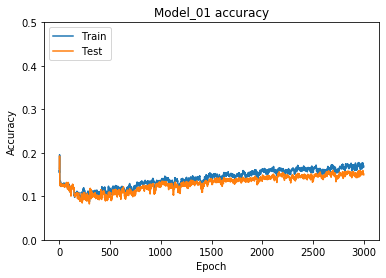

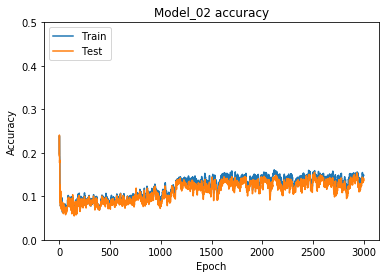

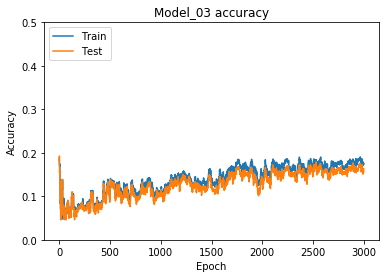

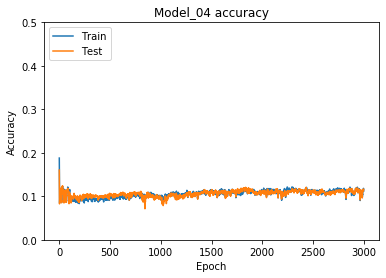

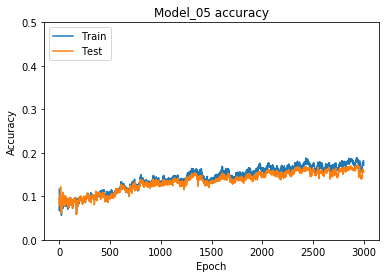

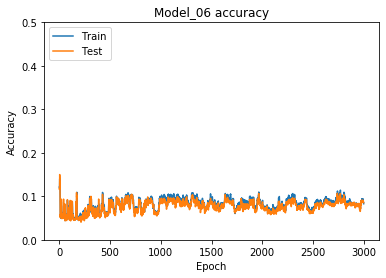

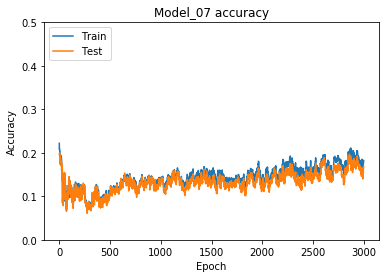

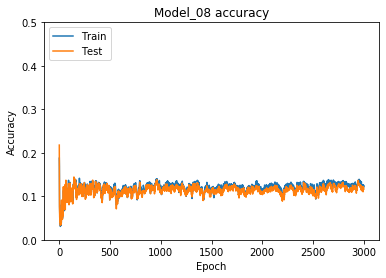

In [31]:
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_01,nparray_accuracy_Test_01,"01")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_02,nparray_accuracy_Test_02,"02")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_03,nparray_accuracy_Test_03,"03")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_04,nparray_accuracy_Test_04,"04")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_05,nparray_accuracy_Test_05,"05")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_06,nparray_accuracy_Test_06,"06")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_07,nparray_accuracy_Test_07,"07")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_08,nparray_accuracy_Test_08,"08")

In [32]:
# overlay loss train and test
def plot_loss_Train_vs_Test(nparray_loss_Train,nparray_loss_Test,modelName):
    plt.plot(nparray_loss_Train)
    plt.plot(nparray_loss_Test)
    plt.title('Model_'+modelName+' loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc="upper left")
    plt.show()
# done function

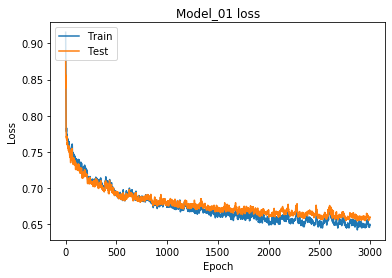

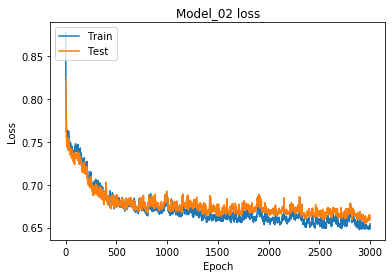

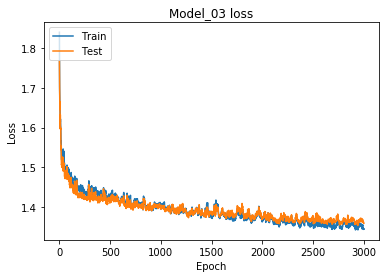

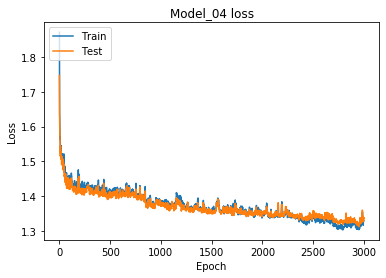

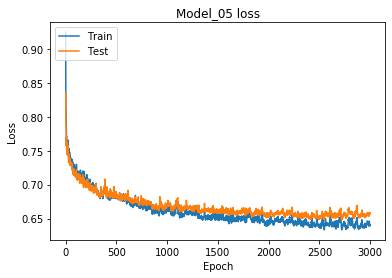

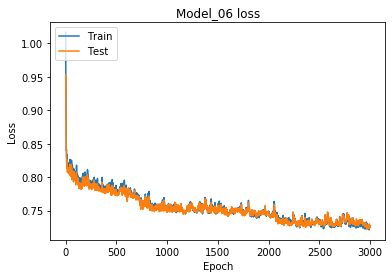

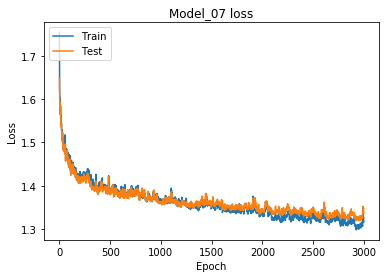

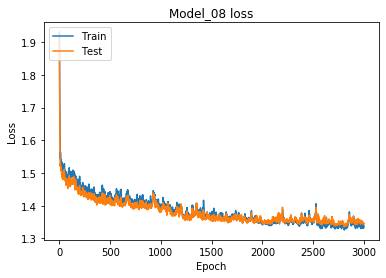

In [33]:
plot_loss_Train_vs_Test(nparray_loss_Train_01,nparray_loss_Test_01,"01")
plot_loss_Train_vs_Test(nparray_loss_Train_02,nparray_loss_Test_02,"02")
plot_loss_Train_vs_Test(nparray_loss_Train_03,nparray_loss_Test_03,"03")
plot_loss_Train_vs_Test(nparray_loss_Train_04,nparray_loss_Test_04,"04")
plot_loss_Train_vs_Test(nparray_loss_Train_05,nparray_loss_Test_05,"05")
plot_loss_Train_vs_Test(nparray_loss_Train_06,nparray_loss_Test_06,"06")
plot_loss_Train_vs_Test(nparray_loss_Train_07,nparray_loss_Test_07,"07")
plot_loss_Train_vs_Test(nparray_loss_Train_08,nparray_loss_Test_08,"08")

In [34]:
# overlay train and test we expect train to be better than test 
def plot_train_test(nparray_counterLineTrain,nparray_counterLineTest,modelName):
    plt.hist(nparray_counterLineTrain,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLineTest,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Model_'+modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    plt.show()
# done function

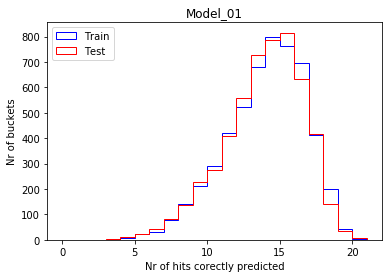

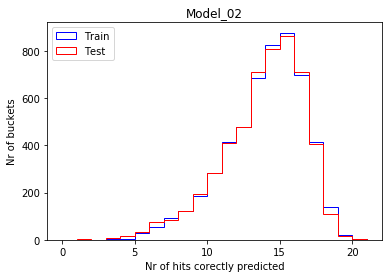

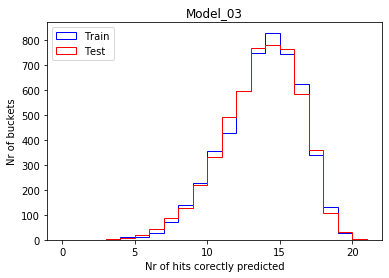

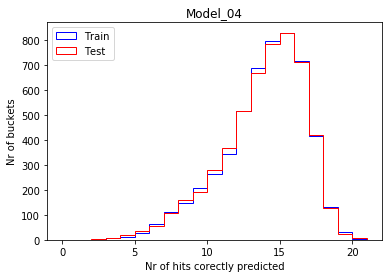

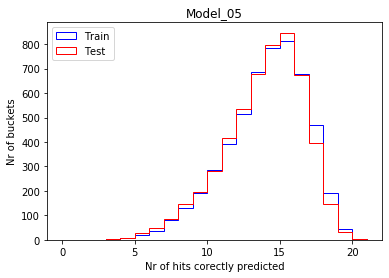

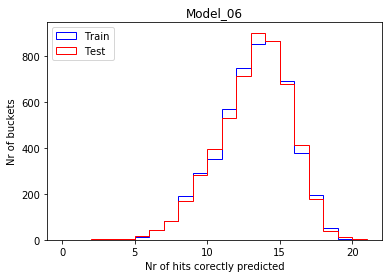

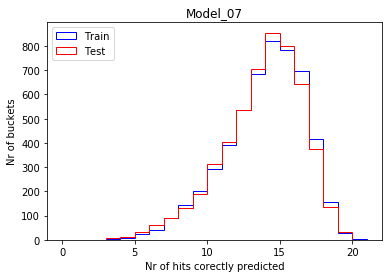

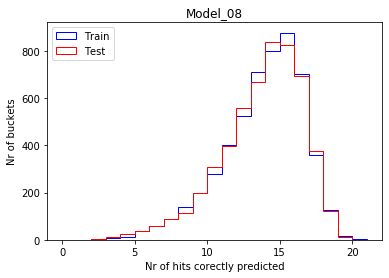

In [35]:
plot_train_test(nparray_counterLine_01_Train,nparray_counterLine_01_Test,"01")
plot_train_test(nparray_counterLine_02_Train,nparray_counterLine_02_Test,"02")
plot_train_test(nparray_counterLine_03_Train,nparray_counterLine_03_Test,"03")
plot_train_test(nparray_counterLine_04_Train,nparray_counterLine_04_Test,"04")
plot_train_test(nparray_counterLine_05_Train,nparray_counterLine_05_Test,"05")
plot_train_test(nparray_counterLine_06_Train,nparray_counterLine_06_Test,"06")
plot_train_test(nparray_counterLine_07_Train,nparray_counterLine_07_Test,"07")
plot_train_test(nparray_counterLine_08_Train,nparray_counterLine_08_Test,"08")


In [36]:
# Overlay several models for accuracy train
def plot_accuracy_train_several_models():
    plt.plot(nparray_accuracy_Train_01)
    plt.plot(nparray_accuracy_Train_02)
    plt.plot(nparray_accuracy_Train_03)
    plt.plot(nparray_accuracy_Train_04)
    plt.plot(nparray_accuracy_Train_05)
    plt.plot(nparray_accuracy_Train_06)
    plt.plot(nparray_accuracy_Train_07)
    plt.plot(nparray_accuracy_Train_08)
    plt.title('accuracy Train')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0)
    plt.show()
    
# done function

# Overlay several models for accuracy test
def plot_accuracy_test_several_models():
    plt.plot(nparray_accuracy_Test_01)
    plt.plot(nparray_accuracy_Test_02)
    plt.plot(nparray_accuracy_Test_03)
    plt.plot(nparray_accuracy_Test_04)
    plt.plot(nparray_accuracy_Test_05)
    plt.plot(nparray_accuracy_Test_06)
    plt.plot(nparray_accuracy_Test_07)
    plt.plot(nparray_accuracy_Test_08)
    plt.title('accuracy Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0)
    plt.show()

# done function 

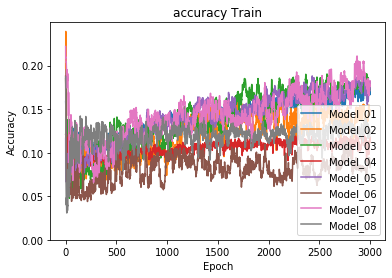

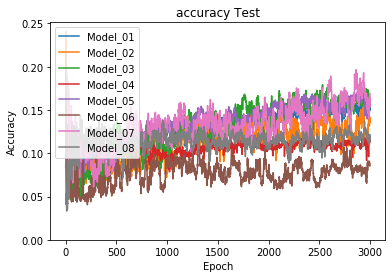

In [37]:
plot_accuracy_train_several_models()
plot_accuracy_test_several_models()

In [38]:
# Overlay several models for loss train
def plot_loss_train_several_models():
    plt.plot(nparray_loss_Train_01)
    plt.plot(nparray_loss_Train_02)
    plt.plot(nparray_loss_Train_03)
    plt.plot(nparray_loss_Train_04)
    plt.plot(nparray_loss_Train_05)
    plt.plot(nparray_loss_Train_06)
    plt.plot(nparray_loss_Train_07)
    plt.plot(nparray_loss_Train_08)
    plt.title('loss Train')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0)
    plt.show()
    
# done function

# Overlay several models for accuracy test
def plot_loss_test_several_models():
    plt.plot(nparray_loss_Test_01)
    plt.plot(nparray_loss_Test_02)
    plt.plot(nparray_loss_Test_03)
    plt.plot(nparray_loss_Test_04)
    plt.plot(nparray_loss_Test_05)
    plt.plot(nparray_loss_Test_06)
    plt.plot(nparray_loss_Test_07)
    plt.plot(nparray_loss_Test_08)
    plt.title('loss Test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"], loc='best')
    plt.ylim(bottom=0)
    plt.show()

# done function 

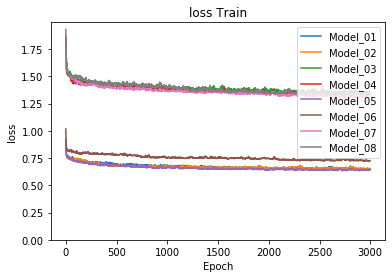

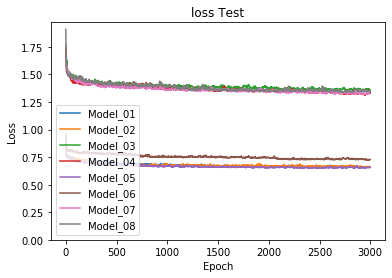

In [39]:
plot_loss_train_several_models()
plot_loss_test_several_models()

In [40]:
def plot_correctly_predicted_Train():
    plt.hist(nparray_counterLine_01_Train,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLine_02_Train,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.hist(nparray_counterLine_03_Train,bins=range(0,22),alpha=1,color="green",histtype='step')
    plt.hist(nparray_counterLine_04_Train,bins=range(0,22),alpha=1,color="magenta",histtype='step')
    plt.hist(nparray_counterLine_05_Train,bins=range(0,22),alpha=1,color="black",histtype='step')
    plt.hist(nparray_counterLine_06_Train,bins=range(0,22),alpha=1,color="aqua",histtype='step')
    plt.hist(nparray_counterLine_07_Train,bins=range(0,22),alpha=1,color="purple",histtype='step')
    plt.hist(nparray_counterLine_08_Train,bins=range(0,22),alpha=1,color="peru",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Train')
    plt.legend(["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"],loc='upper left')
    #plt.ylim(bottom=0,top=100)
    plt.show()
# done function

# overlay several models for correctly predicted 
def plot_correctly_predicted_Test():
    plt.hist(nparray_counterLine_01_Test,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLine_02_Test,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.hist(nparray_counterLine_03_Test,bins=range(0,22),alpha=1,color="green",histtype='step')
    plt.hist(nparray_counterLine_04_Test,bins=range(0,22),alpha=1,color="magenta",histtype='step')
    plt.hist(nparray_counterLine_05_Test,bins=range(0,22),alpha=1,color="black",histtype='step')
    plt.hist(nparray_counterLine_06_Test,bins=range(0,22),alpha=1,color="aqua",histtype='step')
    plt.hist(nparray_counterLine_07_Test,bins=range(0,22),alpha=1,color="purple",histtype='step')
    plt.hist(nparray_counterLine_08_Test,bins=range(0,22),alpha=1,color="peru",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Test')
    #plt.legend(["Model_01","Model_02","Model_03","Model_04"],loc='upper left')
    plt.legend(["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"],loc='upper left')
    #plt.ylim(bottom=0,top=100)
    plt.show()
# done function

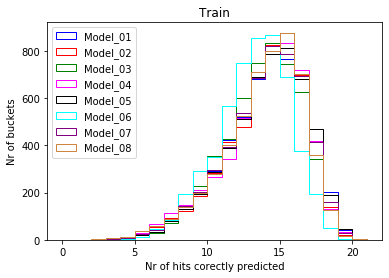

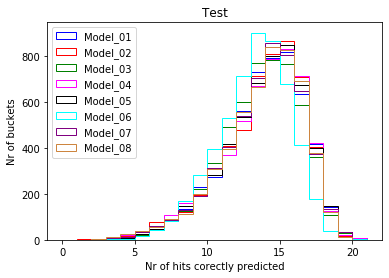

In [41]:
plot_correctly_predicted_Train()
plot_correctly_predicted_Test()

In [42]:
# overlay several models for correctly predicted 
def plot_overlay_hist(
        list_tupleArray,
        x_info=["My variable",(-1,-1)],
        y_info=["My count",(-1,-1)],
        title_info=["My title"],
        legend_info=["best"],
        debug=False
    ):
    nrEl=len(list_tupleArray)
    if debug:
        print("nrEl",nrEl)
    list_legend=[]
    for i in range(len(list_tupleArray)):
        tupleArray=list_tupleArray[i]
        if debug:
            print("i",i,"tupleArray",tupleArray,type(tupleArray),len(tupleArray))
        nparray=tupleArray[0]
        legend=tupleArray[1]
        color=tupleArray[2]
        if debug:
            print("nparray",nparray,"legend",legend,"color",color)
        plt.hist(nparray,bins=range(0,22),alpha=1,color=color,histtype='step')
        list_legend.append(legend)
    # done for loop for each numpy array to plot    
    # x-axis
    plt.xlabel(x_info[0])
    x_range=x_info[1]
    if x_range==(-1,-1):
        pass
    else:
        plt.xlim(left=x_range[0],right=x_range[1])
    # y-axis
    plt.ylabel(y_info[0])
    y_range=y_info[1]
    if y_range==(-1,-1):
        pass
    else:
        plt.ylim(bottom=y_range[0],top=y_range[1])
    # title
    plt.title(title_info[0])
    # legend
    if debug:
        print("list_legend",list_legend)
    legendLocation=legend_info[0]
    plt.legend(list_legend,loc=legendLocation)
    # show the actual plot
    plt.show()
    # all done, nothing to return
# done function

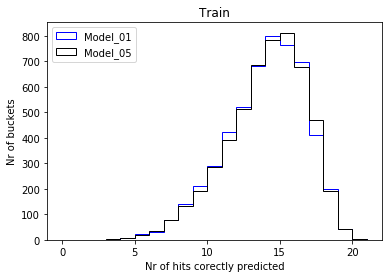

In [74]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_01_Train,"Model_01","blue"))
#list_tupleArray.append((nparray_counterLine_02_Train,"Model_02","red"))
#list_tupleArray.append((nparray_counterLine_03_Train,"Model_03","green"))
#list_tupleArray.append((nparray_counterLine_04_Train,"Model_04","magenta"))
list_tupleArray.append((nparray_counterLine_05_Train,"Model_05","black"))
#list_tupleArray.append((nparray_counterLine_06_Train,"Model_06","aqua"))
#list_tupleArray.append((nparray_counterLine_07_Train,"Model_07","purple"))
#list_tupleArray.append((nparray_counterLine_08_Train,"Model_08","peru"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Train"],
        legend_info=["upper left"],
        debug=False
    )

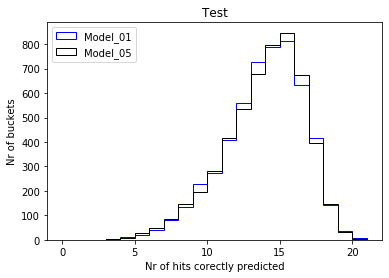

In [75]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_01_Test,"Model_01","blue"))
#list_tupleArray.append((nparray_counterLine_02_Test,"Model_02","red"))
#list_tupleArray.append((nparray_counterLine_03_Test,"Model_03","green"))
#list_tupleArray.append((nparray_counterLine_04_Test,"Model_04","magenta"))
list_tupleArray.append((nparray_counterLine_05_Test,"Model_05","black"))
#list_tupleArray.append((nparray_counterLine_06_Test,"Model_06","aqua"))
#list_tupleArray.append((nparray_counterLine_07_Test,"Model_07","purple"))
#list_tupleArray.append((nparray_counterLine_08_Test,"Model_08","peru"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Test"],
        legend_info=["upper left"],
        debug=False
    )

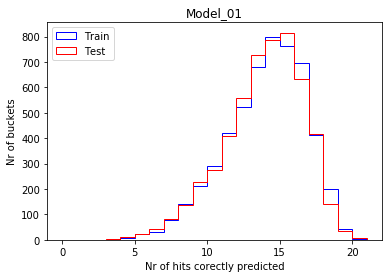

In [45]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_01_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_01_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_01"],
        legend_info=["upper left"],
        debug=False
    )

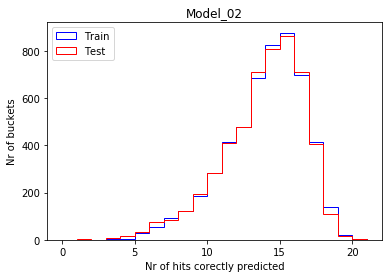

In [46]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_02_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_02_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_02"],
        legend_info=["upper left"],
        debug=False
    )

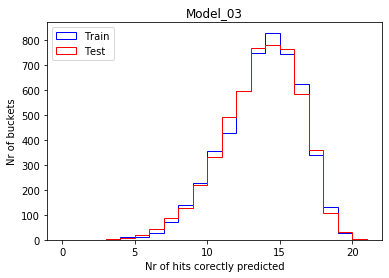

In [47]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_03_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_03_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_03"],
        legend_info=["upper left"],
        debug=False
    )

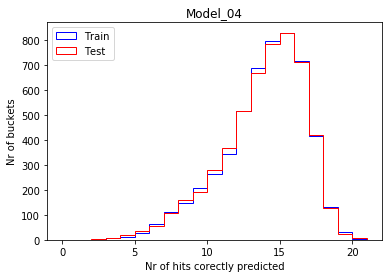

In [48]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_04_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_04_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_04"],
        legend_info=["upper left"],
        debug=False
    )

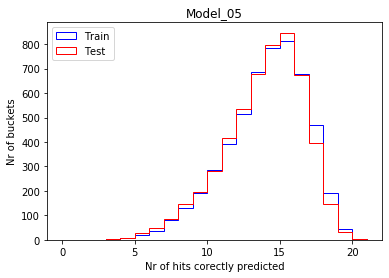

In [49]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_05_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_05_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_05"],
        legend_info=["upper left"],
        debug=False
    )

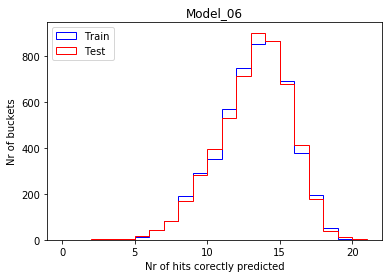

In [50]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_06_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_06_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_06"],
        legend_info=["upper left"],
        debug=False
    )

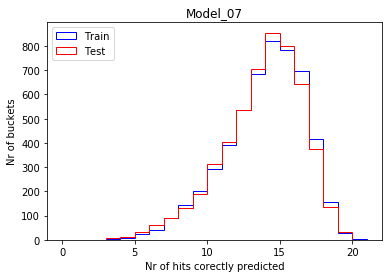

In [51]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_07_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_07_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_07"],
        legend_info=["upper left"],
        debug=False
    )

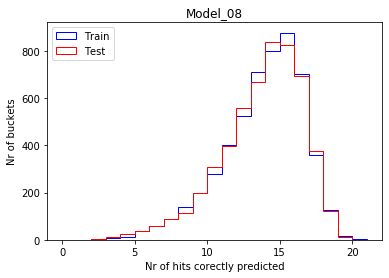

In [52]:
list_tupleArray=[]
list_tupleArray.append((nparray_counterLine_08_Train,"Train","blue"))
list_tupleArray.append((nparray_counterLine_08_Test,"Test","red"))
plot_overlay_hist(
        list_tupleArray,
        x_info=["Nr of hits corectly predicted",(-1,-1)],
        y_info=["Nr of buckets",(-1,-1)],
        title_info=["Model_08"],
        legend_info=["upper left"],
        debug=False
    )

list_modelName ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06', 'Model_07', 'Model_08']
modelName Model_01


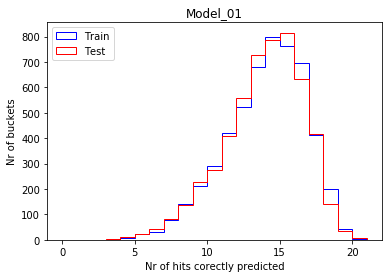

modelName Model_02


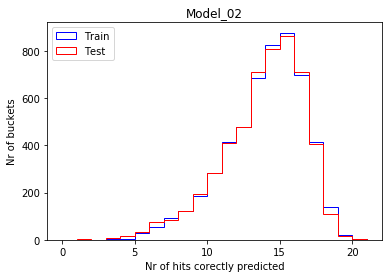

modelName Model_03


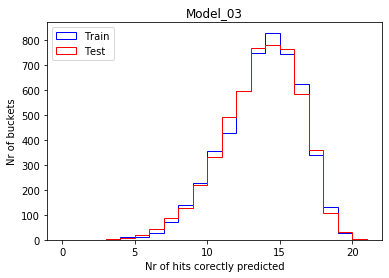

modelName Model_04


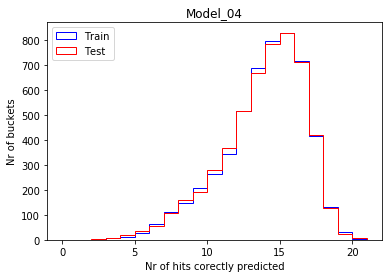

modelName Model_05


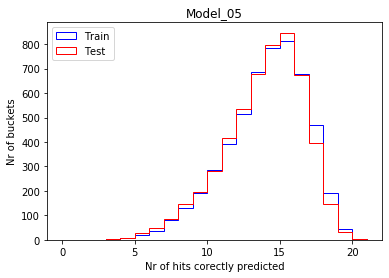

modelName Model_06


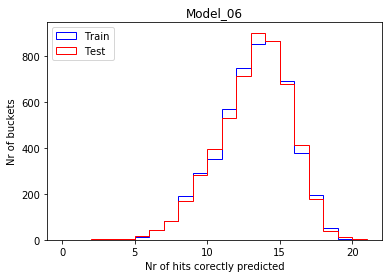

modelName Model_07


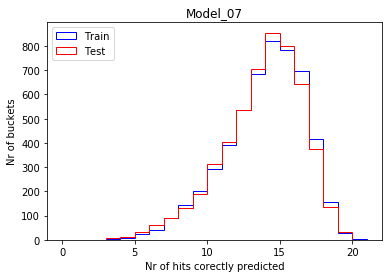

modelName Model_08


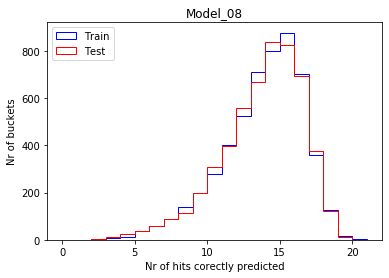

In [53]:
list_modelName=["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"]
print("list_modelName",list_modelName)
for modelName in list_modelName:
    print("modelName",modelName)
    list_tupleArray=[]
    if modelName=="Model_01":
        list_tupleArray.append((nparray_counterLine_01_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_01_Test,"Test","red"))
    elif modelName=="Model_02":
        list_tupleArray.append((nparray_counterLine_02_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_02_Test,"Test","red"))
    elif modelName=="Model_03":
        list_tupleArray.append((nparray_counterLine_03_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_03_Test,"Test","red"))
    elif modelName=="Model_04":
        list_tupleArray.append((nparray_counterLine_04_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_04_Test,"Test","red"))
    elif modelName=="Model_05":
        list_tupleArray.append((nparray_counterLine_05_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_05_Test,"Test","red"))
    elif modelName=="Model_06":
        list_tupleArray.append((nparray_counterLine_06_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_06_Test,"Test","red"))
    elif modelName=="Model_07":
        list_tupleArray.append((nparray_counterLine_07_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_07_Test,"Test","red"))
    elif modelName=="Model_08":
        list_tupleArray.append((nparray_counterLine_08_Train,"Train","blue"))
        list_tupleArray.append((nparray_counterLine_08_Test,"Test","red"))
    else:
        print("modelName",modelName,"not known. Choose Model_01 through Model_08. Will do nothing!")
    # done if
    plot_overlay_hist(
            list_tupleArray,
            x_info=["Nr of hits corectly predicted",(-1,-1)],
            y_info=["Nr of buckets",(-1,-1)],
            title_info=[modelName],
            legend_info=["upper left"],
            debug=False
        )
# done for loop over modelName

list_modelName ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06', 'Model_07', 'Model_08']
modelName Model_01


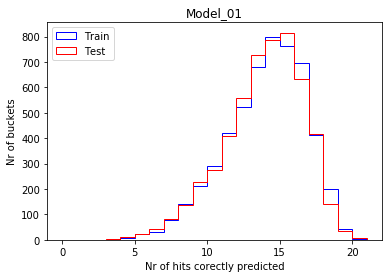

modelName Model_02


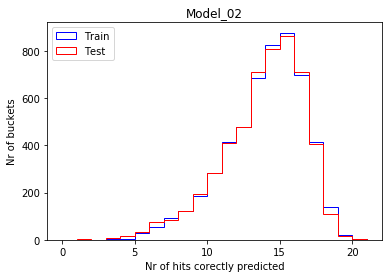

modelName Model_03


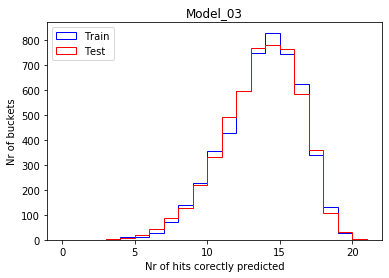

modelName Model_04


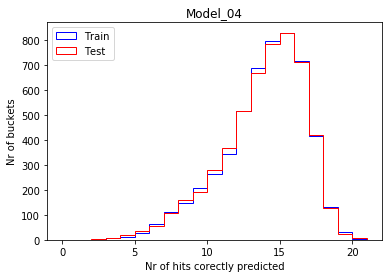

modelName Model_05


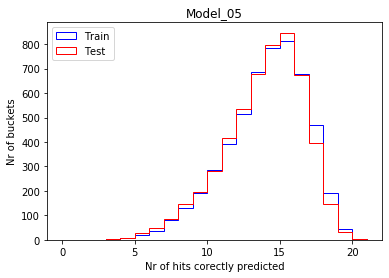

modelName Model_06


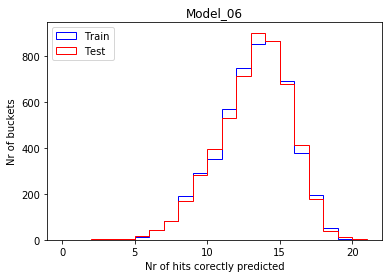

modelName Model_07


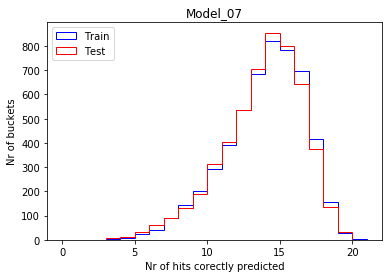

modelName Model_08


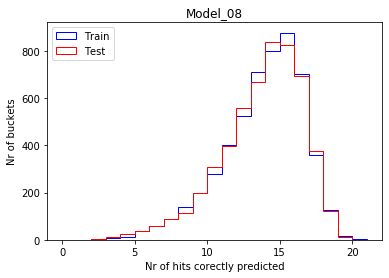

In [54]:
dict_name_nparray={}
dict_name_nparray["Model_01_Train"]=nparray_counterLine_01_Train
dict_name_nparray["Model_01_Test"]=nparray_counterLine_01_Test
dict_name_nparray["Model_02_Train"]=nparray_counterLine_02_Train
dict_name_nparray["Model_02_Test"]=nparray_counterLine_02_Test
dict_name_nparray["Model_03_Train"]=nparray_counterLine_03_Train
dict_name_nparray["Model_03_Test"]=nparray_counterLine_03_Test
dict_name_nparray["Model_04_Train"]=nparray_counterLine_04_Train
dict_name_nparray["Model_04_Test"]=nparray_counterLine_04_Test
dict_name_nparray["Model_05_Train"]=nparray_counterLine_05_Train
dict_name_nparray["Model_05_Test"]=nparray_counterLine_05_Test
dict_name_nparray["Model_06_Train"]=nparray_counterLine_06_Train
dict_name_nparray["Model_06_Test"]=nparray_counterLine_06_Test
dict_name_nparray["Model_07_Train"]=nparray_counterLine_07_Train
dict_name_nparray["Model_07_Test"]=nparray_counterLine_07_Test
dict_name_nparray["Model_08_Train"]=nparray_counterLine_08_Train
dict_name_nparray["Model_08_Test"]=nparray_counterLine_08_Test


list_modelName=["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"]
print("list_modelName",list_modelName)
for modelName in list_modelName:
    print("modelName",modelName)
    list_tupleArray=[]
    list_tupleArray.append((dict_name_nparray[modelName+"_"+"Train"],"Train","blue"))
    list_tupleArray.append((dict_name_nparray[modelName+"_"+"Test"],"Test","red"))
    plot_overlay_hist(
            list_tupleArray,
            x_info=["Nr of hits corectly predicted",(-1,-1)],
            y_info=["Nr of buckets",(-1,-1)],
            title_info=[modelName],
            legend_info=["upper left"],
            debug=False
        )
# done for loop over modelName

list_modelName ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06', 'Model_07', 'Model_08']
modelName Model_01


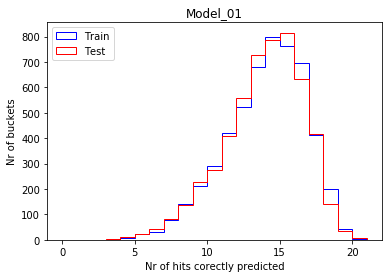

modelName Model_02


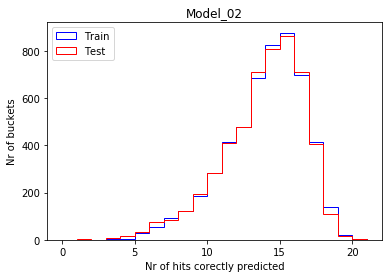

modelName Model_03


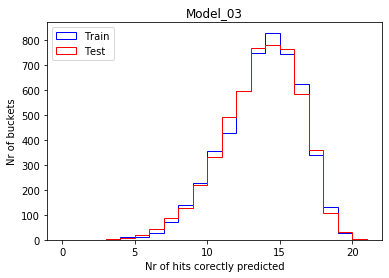

modelName Model_04


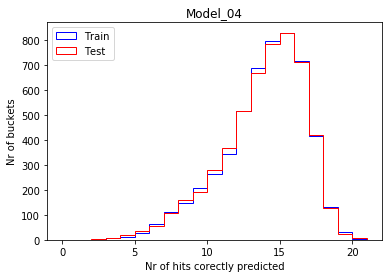

modelName Model_05


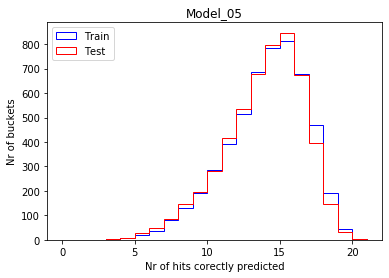

modelName Model_06


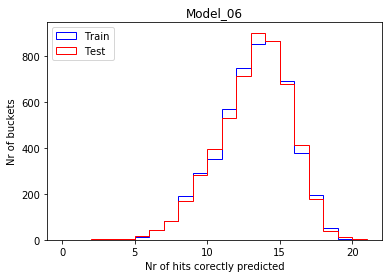

modelName Model_07


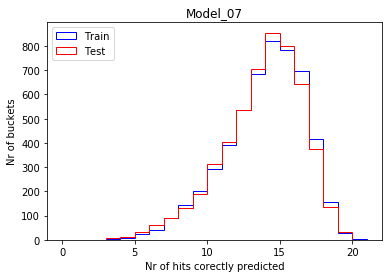

modelName Model_08


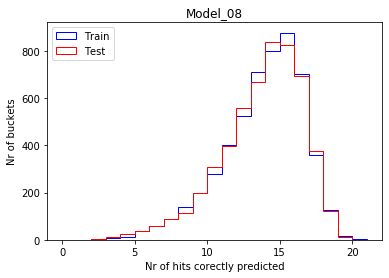

In [55]:
dict_name_nparray={}
dict_name_nparray["Model_01_Train"]=nparray_counterLine_01_Train
dict_name_nparray["Model_01_Test"]=nparray_counterLine_01_Test
dict_name_nparray["Model_02_Train"]=nparray_counterLine_02_Train
dict_name_nparray["Model_02_Test"]=nparray_counterLine_02_Test
dict_name_nparray["Model_03_Train"]=nparray_counterLine_03_Train
dict_name_nparray["Model_03_Test"]=nparray_counterLine_03_Test
dict_name_nparray["Model_04_Train"]=nparray_counterLine_04_Train
dict_name_nparray["Model_04_Test"]=nparray_counterLine_04_Test
dict_name_nparray["Model_05_Train"]=nparray_counterLine_05_Train
dict_name_nparray["Model_05_Test"]=nparray_counterLine_05_Test
dict_name_nparray["Model_06_Train"]=nparray_counterLine_06_Train
dict_name_nparray["Model_06_Test"]=nparray_counterLine_06_Test
dict_name_nparray["Model_07_Train"]=nparray_counterLine_07_Train
dict_name_nparray["Model_07_Test"]=nparray_counterLine_07_Test
dict_name_nparray["Model_08_Train"]=nparray_counterLine_08_Train
dict_name_nparray["Model_08_Test"]=nparray_counterLine_08_Test

list_TrainOrTest=["Train","Test"]
dict_TrainOrTest_color={
    "Train":"blue",
    "Test":"red",
}

list_modelName=["Model_01","Model_02","Model_03","Model_04","Model_05","Model_06","Model_07","Model_08"]
print("list_modelName",list_modelName)
for modelName in list_modelName:
    print("modelName",modelName)
    list_tupleArray=[]
    for TrainOrTest in list_TrainOrTest:
        list_tupleArray.append((dict_name_nparray[modelName+"_"+TrainOrTest],
                                TrainOrTest,
                                dict_TrainOrTest_color[TrainOrTest]))
    # done for loop over TrainOrTest
    plot_overlay_hist(
            list_tupleArray,
            x_info=["Nr of hits corectly predicted",(-1,-1)],
            y_info=["Nr of buckets",(-1,-1)],
            title_info=[modelName],
            legend_info=["upper left"],
            debug=False
        )
# done for loop over modelName